# Food Recognizer

## Description

Dans cette version nous allons appliquer l'algorithme LetNet5 au dataset Food 101 et essayer d'améliorer les performances.

## Ressources

# Notebook content

1. Downloading Data
2. Prepare data set
3. Build `stratified X, y train test`
4. Data preparation & normalization
5. Build LetNet-5 model architecture
6. Compute the accuracy
7. Regularization & ImageDataGenerator
8. Test on images test

## 0. Import

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle

## 1. Downloading Data

In order to use the dataset from kaggle on Colab we follow the steps below:
1. Make sure you have a Kaggle account (you can subscribe using your Google Account for example)
2. Go to `My Account` 
3. At Section API click on `Create New API Token`. A `json` file will be automatically downloaded
4. Open the `json` file and substitute the username and key in the cell below by the data provided on the file 
5. Run the cell below

In [2]:
os.environ['KAGGLE_USERNAME'] = "sully974"
os.environ['KAGGLE_KEY'] = "8edd60e104f12fa27b016014b35c70bb"

!pip install -q kaggle
!pip install -q kaggle-cli

!kaggle datasets download -d kmader/food41
!unzip food41.zip

  ERROR: Command errored out with exit status 1:
   command: /home/sully/bin/anaconda/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-wc6z1184/lxml/setup.py'"'"'; __file__='"'"'/tmp/pip-install-wc6z1184/lxml/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-_lm82dsn --python-tag cp37
       cwd: /tmp/pip-install-wc6z1184/lxml/
  Complete output (179 lines):
  Building lxml version 4.0.0.
  Building without Cython.
  Using build configuration of libxslt 1.1.33
  Building against libxml2/libxslt in the following directory: /home/sully/bin/anaconda/lib
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.7
  creating build/lib.linux-x86_64-3.7/lxml
  copying src/lxml/builder.py -> build/lib.linux-x86_64-3.7/lxml
  copying src/lxml/usedoctest

ERROR: scrapy 1.8.0 requires protego>=0.1.15, which is not installed.
    ERROR: Command errored out with exit status 1:
     command: /home/sully/bin/anaconda/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-wc6z1184/lxml/setup.py'"'"'; __file__='"'"'/tmp/pip-install-wc6z1184/lxml/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-0x50c_9x/install-record.txt --single-version-externally-managed --compile
         cwd: /tmp/pip-install-wc6z1184/lxml/
    Complete output (178 lines):
    Building lxml version 4.0.0.
    Building without Cython.
    Using build configuration of libxslt 1.1.33
    Building against libxml2/libxslt in the following directory: /home/sully/bin/anaconda/lib
    running install
    running build
    running build_py
    creating build
    creating build/lib.linux-x86_64

100%|█████████████████████████████████████▉| 5.30G/5.30G [21:02<00:00, 7.79MB/s]
100%|██████████████████████████████████████| 5.30G/5.30G [21:02<00:00, 4.51MB/s]
Archive:  food41.zip
  inflating: food_c101_n1000_r384x384x3.h5  
  inflating: food_c101_n10099_r32x32x1.h5  
  inflating: food_c101_n10099_r32x32x3.h5  
  inflating: food_c101_n10099_r64x64x1.h5  
  inflating: food_c101_n10099_r64x64x3.h5  
  inflating: food_test_c101_n1000_r128x128x1.h5  
  inflating: food_test_c101_n1000_r128x128x3.h5  
  inflating: food_test_c101_n1000_r32x32x1.h5  
  inflating: food_test_c101_n1000_r32x32x3.h5  
  inflating: food_test_c101_n1000_r64x64x1.h5  
  inflating: food_test_c101_n1000_r64x64x3.h5  
  inflating: images/apple_pie/1005649.jpg  
  inflating: images/apple_pie/1011328.jpg  
  inflating: images/apple_pie/101251.jpg  
  inflating: images/apple_pie/1014775.jpg  
  inflating: images/apple_pie/1026328.jpg  
  inflating: images/apple_pie/1028787.jpg  
  inflating: images/apple_pie/1034399.jpg

  inflating: images/apple_pie/1710288.jpg  
  inflating: images/apple_pie/1717754.jpg  
  inflating: images/apple_pie/1725573.jpg  
  inflating: images/apple_pie/1725747.jpg  
  inflating: images/apple_pie/1727085.jpg  
  inflating: images/apple_pie/1735072.jpg  
  inflating: images/apple_pie/1739519.jpg  
  inflating: images/apple_pie/1753164.jpg  
  inflating: images/apple_pie/1753171.jpg  
  inflating: images/apple_pie/1753935.jpg  
  inflating: images/apple_pie/1756344.jpg  
  inflating: images/apple_pie/175848.jpg  
  inflating: images/apple_pie/1764457.jpg  
  inflating: images/apple_pie/1766910.jpg  
  inflating: images/apple_pie/1767333.jpg  
  inflating: images/apple_pie/1771374.jpg  
  inflating: images/apple_pie/1771395.jpg  
  inflating: images/apple_pie/1773419.jpg  
  inflating: images/apple_pie/1774036.jpg  
  inflating: images/apple_pie/1786261.jpg  
  inflating: images/apple_pie/1789100.jpg  
  inflating: images/apple_pie/1790730.jpg  
  inflating: images/apple_pie/181

  inflating: images/apple_pie/2702725.jpg  
  inflating: images/apple_pie/2704442.jpg  
  inflating: images/apple_pie/2705419.jpg  
  inflating: images/apple_pie/2708417.jpg  
  inflating: images/apple_pie/2713482.jpg  
  inflating: images/apple_pie/2713820.jpg  
  inflating: images/apple_pie/2721937.jpg  
  inflating: images/apple_pie/2722097.jpg  
  inflating: images/apple_pie/2722635.jpg  
  inflating: images/apple_pie/2724897.jpg  
  inflating: images/apple_pie/2725375.jpg  
  inflating: images/apple_pie/2735083.jpg  
  inflating: images/apple_pie/2735451.jpg  
  inflating: images/apple_pie/2737512.jpg  
  inflating: images/apple_pie/2740775.jpg  
  inflating: images/apple_pie/2740848.jpg  
  inflating: images/apple_pie/274516.jpg  
  inflating: images/apple_pie/2745186.jpg  
  inflating: images/apple_pie/2745241.jpg  
  inflating: images/apple_pie/2751362.jpg  
  inflating: images/apple_pie/2751755.jpg  
  inflating: images/apple_pie/2754101.jpg  
  inflating: images/apple_pie/276

  inflating: images/apple_pie/3506848.jpg  
  inflating: images/apple_pie/3508043.jpg  
  inflating: images/apple_pie/3517723.jpg  
  inflating: images/apple_pie/3521500.jpg  
  inflating: images/apple_pie/3539782.jpg  
  inflating: images/apple_pie/3545924.jpg  
  inflating: images/apple_pie/3546563.jpg  
  inflating: images/apple_pie/3547012.jpg  
  inflating: images/apple_pie/3549466.jpg  
  inflating: images/apple_pie/3551588.jpg  
  inflating: images/apple_pie/3553736.jpg  
  inflating: images/apple_pie/3555118.jpg  
  inflating: images/apple_pie/3563222.jpg  
  inflating: images/apple_pie/3570483.jpg  
  inflating: images/apple_pie/3574591.jpg  
  inflating: images/apple_pie/3577845.jpg  
  inflating: images/apple_pie/3586158.jpg  
  inflating: images/apple_pie/3588721.jpg  
  inflating: images/apple_pie/3589097.jpg  
  inflating: images/apple_pie/3590485.jpg  
  inflating: images/apple_pie/3593810.jpg  
  inflating: images/apple_pie/359419.jpg  
  inflating: images/apple_pie/359

  inflating: images/apple_pie/886518.jpg  
  inflating: images/apple_pie/886793.jpg  
  inflating: images/apple_pie/89035.jpg  
  inflating: images/apple_pie/892425.jpg  
  inflating: images/apple_pie/902277.jpg  
  inflating: images/apple_pie/904832.jpg  
  inflating: images/apple_pie/908367.jpg  
  inflating: images/apple_pie/909196.jpg  
  inflating: images/apple_pie/910097.jpg  
  inflating: images/apple_pie/910333.jpg  
  inflating: images/apple_pie/913161.jpg  
  inflating: images/apple_pie/925525.jpg  
  inflating: images/apple_pie/934113.jpg  
  inflating: images/apple_pie/934503.jpg  
  inflating: images/apple_pie/936189.jpg  
  inflating: images/apple_pie/937118.jpg  
  inflating: images/apple_pie/939246.jpg  
  inflating: images/apple_pie/939768.jpg  
  inflating: images/apple_pie/939827.jpg  
  inflating: images/apple_pie/946403.jpg  
  inflating: images/apple_pie/947689.jpg  
  inflating: images/apple_pie/954830.jpg  
  inflating: images/apple_pie/957090.jpg  
  inflating:

  inflating: images/baby_back_ribs/1622817.jpg  
  inflating: images/baby_back_ribs/1622962.jpg  
  inflating: images/baby_back_ribs/1623333.jpg  
  inflating: images/baby_back_ribs/1623979.jpg  
  inflating: images/baby_back_ribs/1631249.jpg  
  inflating: images/baby_back_ribs/1632377.jpg  
  inflating: images/baby_back_ribs/1635329.jpg  
  inflating: images/baby_back_ribs/163622.jpg  
  inflating: images/baby_back_ribs/16366.jpg  
  inflating: images/baby_back_ribs/1636617.jpg  
  inflating: images/baby_back_ribs/1640728.jpg  
  inflating: images/baby_back_ribs/1641429.jpg  
  inflating: images/baby_back_ribs/1643275.jpg  
  inflating: images/baby_back_ribs/1644147.jpg  
  inflating: images/baby_back_ribs/1651771.jpg  
  inflating: images/baby_back_ribs/1656357.jpg  
  inflating: images/baby_back_ribs/1667679.jpg  
  inflating: images/baby_back_ribs/1675917.jpg  
  inflating: images/baby_back_ribs/1676135.jpg  
  inflating: images/baby_back_ribs/1676905.jpg  
  inflating: images/bab

  inflating: images/baby_back_ribs/2284261.jpg  
  inflating: images/baby_back_ribs/229569.jpg  
  inflating: images/baby_back_ribs/230559.jpg  
  inflating: images/baby_back_ribs/2306008.jpg  
  inflating: images/baby_back_ribs/2306066.jpg  
  inflating: images/baby_back_ribs/2306991.jpg  
  inflating: images/baby_back_ribs/2309590.jpg  
  inflating: images/baby_back_ribs/2310431.jpg  
  inflating: images/baby_back_ribs/2314472.jpg  
  inflating: images/baby_back_ribs/2320542.jpg  
  inflating: images/baby_back_ribs/2326074.jpg  
  inflating: images/baby_back_ribs/2331746.jpg  
  inflating: images/baby_back_ribs/2341885.jpg  
  inflating: images/baby_back_ribs/2344243.jpg  
  inflating: images/baby_back_ribs/2344248.jpg  
  inflating: images/baby_back_ribs/2345176.jpg  
  inflating: images/baby_back_ribs/2347150.jpg  
  inflating: images/baby_back_ribs/2348457.jpg  
  inflating: images/baby_back_ribs/2349873.jpg  
  inflating: images/baby_back_ribs/2349904.jpg  
  inflating: images/ba

  inflating: images/baby_back_ribs/3092612.jpg  
  inflating: images/baby_back_ribs/3102071.jpg  
  inflating: images/baby_back_ribs/3106842.jpg  
  inflating: images/baby_back_ribs/3111022.jpg  
  inflating: images/baby_back_ribs/3119545.jpg  
  inflating: images/baby_back_ribs/312370.jpg  
  inflating: images/baby_back_ribs/3124018.jpg  
  inflating: images/baby_back_ribs/3124341.jpg  
  inflating: images/baby_back_ribs/3124916.jpg  
  inflating: images/baby_back_ribs/3125728.jpg  
  inflating: images/baby_back_ribs/312747.jpg  
  inflating: images/baby_back_ribs/3129988.jpg  
  inflating: images/baby_back_ribs/3132647.jpg  
  inflating: images/baby_back_ribs/3142180.jpg  
  inflating: images/baby_back_ribs/3142395.jpg  
  inflating: images/baby_back_ribs/3142431.jpg  
  inflating: images/baby_back_ribs/314812.jpg  
  inflating: images/baby_back_ribs/3154398.jpg  
  inflating: images/baby_back_ribs/3171056.jpg  
  inflating: images/baby_back_ribs/3174626.jpg  
  inflating: images/bab

  inflating: images/baby_back_ribs/586642.jpg  
  inflating: images/baby_back_ribs/593493.jpg  
  inflating: images/baby_back_ribs/593718.jpg  
  inflating: images/baby_back_ribs/603308.jpg  
  inflating: images/baby_back_ribs/604793.jpg  
  inflating: images/baby_back_ribs/604796.jpg  
  inflating: images/baby_back_ribs/605068.jpg  
  inflating: images/baby_back_ribs/611849.jpg  
  inflating: images/baby_back_ribs/617825.jpg  
  inflating: images/baby_back_ribs/620209.jpg  
  inflating: images/baby_back_ribs/620996.jpg  
  inflating: images/baby_back_ribs/620997.jpg  
  inflating: images/baby_back_ribs/622552.jpg  
  inflating: images/baby_back_ribs/626217.jpg  
  inflating: images/baby_back_ribs/626228.jpg  
  inflating: images/baby_back_ribs/626550.jpg  
  inflating: images/baby_back_ribs/629195.jpg  
  inflating: images/baby_back_ribs/633918.jpg  
  inflating: images/baby_back_ribs/634146.jpg  
  inflating: images/baby_back_ribs/635300.jpg  
  inflating: images/baby_back_ribs/64281

  inflating: images/baklava/1190868.jpg  
  inflating: images/baklava/1193297.jpg  
  inflating: images/baklava/1196728.jpg  
  inflating: images/baklava/1201501.jpg  
  inflating: images/baklava/1201665.jpg  
  inflating: images/baklava/120691.jpg  
  inflating: images/baklava/120737.jpg  
  inflating: images/baklava/1208747.jpg  
  inflating: images/baklava/1213261.jpg  
  inflating: images/baklava/1217926.jpg  
  inflating: images/baklava/1220084.jpg  
  inflating: images/baklava/1228534.jpg  
  inflating: images/baklava/1228982.jpg  
  inflating: images/baklava/1234552.jpg  
  inflating: images/baklava/1234746.jpg  
  inflating: images/baklava/1237403.jpg  
  inflating: images/baklava/123842.jpg  
  inflating: images/baklava/1241477.jpg  
  inflating: images/baklava/1245651.jpg  
  inflating: images/baklava/1246040.jpg  
  inflating: images/baklava/1250625.jpg  
  inflating: images/baklava/1255759.jpg  
  inflating: images/baklava/125910.jpg  
  inflating: images/baklava/125912.jpg

  inflating: images/baklava/1824405.jpg  
  inflating: images/baklava/182908.jpg  
  inflating: images/baklava/1834720.jpg  
  inflating: images/baklava/1838368.jpg  
  inflating: images/baklava/1838688.jpg  
  inflating: images/baklava/1841134.jpg  
  inflating: images/baklava/1846365.jpg  
  inflating: images/baklava/1849718.jpg  
  inflating: images/baklava/1851423.jpg  
  inflating: images/baklava/1854438.jpg  
  inflating: images/baklava/1858825.jpg  
  inflating: images/baklava/1859309.jpg  
  inflating: images/baklava/1870839.jpg  
  inflating: images/baklava/1880125.jpg  
  inflating: images/baklava/1880196.jpg  
  inflating: images/baklava/1881388.jpg  
  inflating: images/baklava/1882322.jpg  
  inflating: images/baklava/1885421.jpg  
  inflating: images/baklava/189311.jpg  
  inflating: images/baklava/1896759.jpg  
  inflating: images/baklava/1897024.jpg  
  inflating: images/baklava/1906128.jpg  
  inflating: images/baklava/1915978.jpg  
  inflating: images/baklava/1918740.

  inflating: images/baklava/2556193.jpg  
  inflating: images/baklava/2564967.jpg  
  inflating: images/baklava/2566349.jpg  
  inflating: images/baklava/2567644.jpg  
  inflating: images/baklava/2569979.jpg  
  inflating: images/baklava/2572755.jpg  
  inflating: images/baklava/2573536.jpg  
  inflating: images/baklava/2575524.jpg  
  inflating: images/baklava/2581678.jpg  
  inflating: images/baklava/2581982.jpg  
  inflating: images/baklava/2582738.jpg  
  inflating: images/baklava/2583085.jpg  
  inflating: images/baklava/2585607.jpg  
  inflating: images/baklava/2588419.jpg  
  inflating: images/baklava/2592238.jpg  
  inflating: images/baklava/2593821.jpg  
  inflating: images/baklava/2613653.jpg  
  inflating: images/baklava/2622883.jpg  
  inflating: images/baklava/2623666.jpg  
  inflating: images/baklava/2626407.jpg  
  inflating: images/baklava/2630130.jpg  
  inflating: images/baklava/2630511.jpg  
  inflating: images/baklava/2635116.jpg  
  inflating: images/baklava/264408

  inflating: images/baklava/3363499.jpg  
  inflating: images/baklava/3367765.jpg  
  inflating: images/baklava/3368791.jpg  
  inflating: images/baklava/3369406.jpg  
  inflating: images/baklava/3373814.jpg  
  inflating: images/baklava/3376249.jpg  
  inflating: images/baklava/3380645.jpg  
  inflating: images/baklava/3382814.jpg  
  inflating: images/baklava/3385433.jpg  
  inflating: images/baklava/3386626.jpg  
  inflating: images/baklava/3391092.jpg  
  inflating: images/baklava/3391167.jpg  
  inflating: images/baklava/3396500.jpg  
  inflating: images/baklava/3400877.jpg  
  inflating: images/baklava/3403791.jpg  
  inflating: images/baklava/3411769.jpg  
  inflating: images/baklava/3420008.jpg  
  inflating: images/baklava/3424962.jpg  
  inflating: images/baklava/3429064.jpg  
  inflating: images/baklava/3429470.jpg  
  inflating: images/baklava/3430051.jpg  
  inflating: images/baklava/343124.jpg  
  inflating: images/baklava/3436596.jpg  
  inflating: images/baklava/3438444

  inflating: images/baklava/732507.jpg  
  inflating: images/baklava/734297.jpg  
  inflating: images/baklava/734909.jpg  
  inflating: images/baklava/740986.jpg  
  inflating: images/baklava/746593.jpg  
  inflating: images/baklava/752356.jpg  
  inflating: images/baklava/755421.jpg  
  inflating: images/baklava/758596.jpg  
  inflating: images/baklava/759884.jpg  
  inflating: images/baklava/761239.jpg  
  inflating: images/baklava/763258.jpg  
  inflating: images/baklava/766339.jpg  
  inflating: images/baklava/769214.jpg  
  inflating: images/baklava/773194.jpg  
  inflating: images/baklava/773456.jpg  
  inflating: images/baklava/773487.jpg  
  inflating: images/baklava/779878.jpg  
  inflating: images/baklava/780200.jpg  
  inflating: images/baklava/787981.jpg  
  inflating: images/baklava/788.jpg  
  inflating: images/baklava/789354.jpg  
  inflating: images/baklava/796010.jpg  
  inflating: images/baklava/800666.jpg  
  inflating: images/baklava/80943.jpg  
  inflating: images/

  inflating: images/beef_carpaccio/1521655.jpg  
  inflating: images/beef_carpaccio/1523305.jpg  
  inflating: images/beef_carpaccio/1525481.jpg  
  inflating: images/beef_carpaccio/1525582.jpg  
  inflating: images/beef_carpaccio/1527107.jpg  
  inflating: images/beef_carpaccio/1531807.jpg  
  inflating: images/beef_carpaccio/153517.jpg  
  inflating: images/beef_carpaccio/1546040.jpg  
  inflating: images/beef_carpaccio/1547238.jpg  
  inflating: images/beef_carpaccio/1558727.jpg  
  inflating: images/beef_carpaccio/1566003.jpg  
  inflating: images/beef_carpaccio/1568046.jpg  
  inflating: images/beef_carpaccio/1572827.jpg  
  inflating: images/beef_carpaccio/1573594.jpg  
  inflating: images/beef_carpaccio/1575775.jpg  
  inflating: images/beef_carpaccio/1576860.jpg  
  inflating: images/beef_carpaccio/1578151.jpg  
  inflating: images/beef_carpaccio/1584290.jpg  
  inflating: images/beef_carpaccio/1585692.jpg  
  inflating: images/beef_carpaccio/158620.jpg  
  inflating: images/be

  inflating: images/beef_carpaccio/2202234.jpg  
  inflating: images/beef_carpaccio/2211025.jpg  
  inflating: images/beef_carpaccio/2212215.jpg  
  inflating: images/beef_carpaccio/2213150.jpg  
  inflating: images/beef_carpaccio/2213514.jpg  
  inflating: images/beef_carpaccio/2214648.jpg  
  inflating: images/beef_carpaccio/2217913.jpg  
  inflating: images/beef_carpaccio/2221882.jpg  
  inflating: images/beef_carpaccio/2224419.jpg  
  inflating: images/beef_carpaccio/2224490.jpg  
  inflating: images/beef_carpaccio/2227816.jpg  
  inflating: images/beef_carpaccio/2232815.jpg  
  inflating: images/beef_carpaccio/223404.jpg  
  inflating: images/beef_carpaccio/2239288.jpg  
  inflating: images/beef_carpaccio/2244585.jpg  
  inflating: images/beef_carpaccio/2250170.jpg  
  inflating: images/beef_carpaccio/2257269.jpg  
  inflating: images/beef_carpaccio/2263597.jpg  
  inflating: images/beef_carpaccio/2263627.jpg  
  inflating: images/beef_carpaccio/2268210.jpg  
  inflating: images/b

  inflating: images/beef_carpaccio/3034703.jpg  
  inflating: images/beef_carpaccio/3034764.jpg  
  inflating: images/beef_carpaccio/303851.jpg  
  inflating: images/beef_carpaccio/3040322.jpg  
  inflating: images/beef_carpaccio/3042132.jpg  
  inflating: images/beef_carpaccio/3046098.jpg  
  inflating: images/beef_carpaccio/3047170.jpg  
  inflating: images/beef_carpaccio/3048461.jpg  
  inflating: images/beef_carpaccio/3048557.jpg  
  inflating: images/beef_carpaccio/3049045.jpg  
  inflating: images/beef_carpaccio/3049536.jpg  
  inflating: images/beef_carpaccio/3052318.jpg  
  inflating: images/beef_carpaccio/3057236.jpg  
  inflating: images/beef_carpaccio/3064973.jpg  
  inflating: images/beef_carpaccio/3066825.jpg  
  inflating: images/beef_carpaccio/3068895.jpg  
  inflating: images/beef_carpaccio/3069756.jpg  
  inflating: images/beef_carpaccio/3075812.jpg  
  inflating: images/beef_carpaccio/3082934.jpg  
  inflating: images/beef_carpaccio/3084884.jpg  
  inflating: images/b

  inflating: images/beef_carpaccio/3863952.jpg  
  inflating: images/beef_carpaccio/3865235.jpg  
  inflating: images/beef_carpaccio/3868777.jpg  
  inflating: images/beef_carpaccio/3868972.jpg  
  inflating: images/beef_carpaccio/3869294.jpg  
  inflating: images/beef_carpaccio/3871998.jpg  
  inflating: images/beef_carpaccio/3873796.jpg  
  inflating: images/beef_carpaccio/3876969.jpg  
  inflating: images/beef_carpaccio/3881424.jpg  
  inflating: images/beef_carpaccio/3887692.jpg  
  inflating: images/beef_carpaccio/3889985.jpg  
  inflating: images/beef_carpaccio/3890359.jpg  
  inflating: images/beef_carpaccio/3896605.jpg  
  inflating: images/beef_carpaccio/3898424.jpg  
  inflating: images/beef_carpaccio/391119.jpg  
  inflating: images/beef_carpaccio/3914142.jpg  
  inflating: images/beef_carpaccio/3914776.jpg  
  inflating: images/beef_carpaccio/393798.jpg  
  inflating: images/beef_carpaccio/398010.jpg  
  inflating: images/beef_carpaccio/398290.jpg  
  inflating: images/beef

  inflating: images/beef_tartare/1046416.jpg  
  inflating: images/beef_tartare/1054197.jpg  
  inflating: images/beef_tartare/1056987.jpg  
  inflating: images/beef_tartare/1065958.jpg  
  inflating: images/beef_tartare/1066933.jpg  
  inflating: images/beef_tartare/1076783.jpg  
  inflating: images/beef_tartare/1077699.jpg  
  inflating: images/beef_tartare/1081274.jpg  
  inflating: images/beef_tartare/108575.jpg  
  inflating: images/beef_tartare/1095314.jpg  
  inflating: images/beef_tartare/1098504.jpg  
  inflating: images/beef_tartare/1102857.jpg  
  inflating: images/beef_tartare/1107638.jpg  
  inflating: images/beef_tartare/1115549.jpg  
  inflating: images/beef_tartare/1116847.jpg  
  inflating: images/beef_tartare/1117636.jpg  
  inflating: images/beef_tartare/1122961.jpg  
  inflating: images/beef_tartare/1126304.jpg  
  inflating: images/beef_tartare/1127533.jpg  
  inflating: images/beef_tartare/1130018.jpg  
  inflating: images/beef_tartare/1133319.jpg  
  inflating: i

  inflating: images/beef_tartare/1914856.jpg  
  inflating: images/beef_tartare/192340.jpg  
  inflating: images/beef_tartare/1924517.jpg  
  inflating: images/beef_tartare/1931160.jpg  
  inflating: images/beef_tartare/1931893.jpg  
  inflating: images/beef_tartare/1933491.jpg  
  inflating: images/beef_tartare/1934307.jpg  
  inflating: images/beef_tartare/1934945.jpg  
  inflating: images/beef_tartare/1937232.jpg  
  inflating: images/beef_tartare/1937765.jpg  
  inflating: images/beef_tartare/1944176.jpg  
  inflating: images/beef_tartare/1944797.jpg  
  inflating: images/beef_tartare/1948628.jpg  
  inflating: images/beef_tartare/1950230.jpg  
  inflating: images/beef_tartare/1951318.jpg  
  inflating: images/beef_tartare/1953277.jpg  
  inflating: images/beef_tartare/1956029.jpg  
  inflating: images/beef_tartare/1956454.jpg  
  inflating: images/beef_tartare/1959584.jpg  
  inflating: images/beef_tartare/1969924.jpg  
  inflating: images/beef_tartare/1974191.jpg  
  inflating: i

  inflating: images/beef_tartare/2840247.jpg  
  inflating: images/beef_tartare/2843429.jpg  
  inflating: images/beef_tartare/2848060.jpg  
  inflating: images/beef_tartare/2851200.jpg  
  inflating: images/beef_tartare/2851803.jpg  
  inflating: images/beef_tartare/2852693.jpg  
  inflating: images/beef_tartare/2852945.jpg  
  inflating: images/beef_tartare/2853815.jpg  
  inflating: images/beef_tartare/2857073.jpg  
  inflating: images/beef_tartare/2857708.jpg  
  inflating: images/beef_tartare/2858086.jpg  
  inflating: images/beef_tartare/2859270.jpg  
  inflating: images/beef_tartare/2860374.jpg  
  inflating: images/beef_tartare/2865574.jpg  
  inflating: images/beef_tartare/2884746.jpg  
  inflating: images/beef_tartare/2884978.jpg  
  inflating: images/beef_tartare/2886127.jpg  
  inflating: images/beef_tartare/2887640.jpg  
  inflating: images/beef_tartare/2892564.jpg  
  inflating: images/beef_tartare/2892807.jpg  
  inflating: images/beef_tartare/2894008.jpg  
  inflating: 

  inflating: images/beef_tartare/3377856.jpg  
  inflating: images/beef_tartare/3381951.jpg  
  inflating: images/beef_tartare/3385164.jpg  
  inflating: images/beef_tartare/3387532.jpg  
  inflating: images/beef_tartare/3390999.jpg  
  inflating: images/beef_tartare/3391006.jpg  
  inflating: images/beef_tartare/3397831.jpg  
  inflating: images/beef_tartare/3407297.jpg  
  inflating: images/beef_tartare/3409183.jpg  
  inflating: images/beef_tartare/3410583.jpg  
  inflating: images/beef_tartare/3411075.jpg  
  inflating: images/beef_tartare/3417284.jpg  
  inflating: images/beef_tartare/3428899.jpg  
  inflating: images/beef_tartare/3432164.jpg  
  inflating: images/beef_tartare/3434596.jpg  
  inflating: images/beef_tartare/343696.jpg  
  inflating: images/beef_tartare/3437886.jpg  
  inflating: images/beef_tartare/343923.jpg  
  inflating: images/beef_tartare/3440287.jpg  
  inflating: images/beef_tartare/3445586.jpg  
  inflating: images/beef_tartare/3451921.jpg  
  inflating: im

  inflating: images/beef_tartare/3917941.jpg  
  inflating: images/beef_tartare/3922000.jpg  
  inflating: images/beef_tartare/393577.jpg  
  inflating: images/beef_tartare/396483.jpg  
  inflating: images/beef_tartare/397080.jpg  
  inflating: images/beef_tartare/39858.jpg  
  inflating: images/beef_tartare/399286.jpg  
  inflating: images/beef_tartare/405226.jpg  
  inflating: images/beef_tartare/405780.jpg  
  inflating: images/beef_tartare/411627.jpg  
  inflating: images/beef_tartare/420455.jpg  
  inflating: images/beef_tartare/420993.jpg  
  inflating: images/beef_tartare/422334.jpg  
  inflating: images/beef_tartare/422937.jpg  
  inflating: images/beef_tartare/443492.jpg  
  inflating: images/beef_tartare/445559.jpg  
  inflating: images/beef_tartare/456339.jpg  
  inflating: images/beef_tartare/456341.jpg  
  inflating: images/beef_tartare/459994.jpg  
  inflating: images/beef_tartare/461717.jpg  
  inflating: images/beef_tartare/468268.jpg  
  inflating: images/beef_tartare/

  inflating: images/beet_salad/1067687.jpg  
  inflating: images/beet_salad/1069907.jpg  
  inflating: images/beet_salad/1071243.jpg  
  inflating: images/beet_salad/1073502.jpg  
  inflating: images/beet_salad/1078947.jpg  
  inflating: images/beet_salad/1080241.jpg  
  inflating: images/beet_salad/1083652.jpg  
  inflating: images/beet_salad/1087254.jpg  
  inflating: images/beet_salad/1089986.jpg  
  inflating: images/beet_salad/1094628.jpg  
  inflating: images/beet_salad/1100936.jpg  
  inflating: images/beet_salad/1103191.jpg  
  inflating: images/beet_salad/1105727.jpg  
  inflating: images/beet_salad/1107181.jpg  
  inflating: images/beet_salad/1122265.jpg  
  inflating: images/beet_salad/1123489.jpg  
  inflating: images/beet_salad/112666.jpg  
  inflating: images/beet_salad/1130682.jpg  
  inflating: images/beet_salad/1133602.jpg  
  inflating: images/beet_salad/1134880.jpg  
  inflating: images/beet_salad/1135760.jpg  
  inflating: images/beet_salad/1144498.jpg  
  inflating

  inflating: images/beet_salad/1707679.jpg  
  inflating: images/beet_salad/1710534.jpg  
  inflating: images/beet_salad/1711729.jpg  
  inflating: images/beet_salad/171188.jpg  
  inflating: images/beet_salad/1715222.jpg  
  inflating: images/beet_salad/1720542.jpg  
  inflating: images/beet_salad/1724996.jpg  
  inflating: images/beet_salad/173220.jpg  
  inflating: images/beet_salad/17358.jpg  
  inflating: images/beet_salad/1738310.jpg  
  inflating: images/beet_salad/1742238.jpg  
  inflating: images/beet_salad/1742629.jpg  
  inflating: images/beet_salad/1743531.jpg  
  inflating: images/beet_salad/1746516.jpg  
  inflating: images/beet_salad/1754151.jpg  
  inflating: images/beet_salad/1757057.jpg  
  inflating: images/beet_salad/1757299.jpg  
  inflating: images/beet_salad/1758981.jpg  
  inflating: images/beet_salad/1764839.jpg  
  inflating: images/beet_salad/1767209.jpg  
  inflating: images/beet_salad/1778615.jpg  
  inflating: images/beet_salad/177929.jpg  
  inflating: im

  inflating: images/beet_salad/2551289.jpg  
  inflating: images/beet_salad/2551321.jpg  
  inflating: images/beet_salad/2559634.jpg  
  inflating: images/beet_salad/256623.jpg  
  inflating: images/beet_salad/2568396.jpg  
  inflating: images/beet_salad/2569098.jpg  
  inflating: images/beet_salad/2571296.jpg  
  inflating: images/beet_salad/2572431.jpg  
  inflating: images/beet_salad/2583587.jpg  
  inflating: images/beet_salad/2583766.jpg  
  inflating: images/beet_salad/2592656.jpg  
  inflating: images/beet_salad/2592698.jpg  
  inflating: images/beet_salad/2595905.jpg  
  inflating: images/beet_salad/2596593.jpg  
  inflating: images/beet_salad/2601956.jpg  
  inflating: images/beet_salad/2602208.jpg  
  inflating: images/beet_salad/2609869.jpg  
  inflating: images/beet_salad/2612209.jpg  
  inflating: images/beet_salad/2619761.jpg  
  inflating: images/beet_salad/2624215.jpg  
  inflating: images/beet_salad/2628099.jpg  
  inflating: images/beet_salad/263123.jpg  
  inflating:

  inflating: images/beet_salad/3199913.jpg  
  inflating: images/beet_salad/3202022.jpg  
  inflating: images/beet_salad/3206106.jpg  
  inflating: images/beet_salad/3215422.jpg  
  inflating: images/beet_salad/3217707.jpg  
  inflating: images/beet_salad/3219655.jpg  
  inflating: images/beet_salad/3222893.jpg  
  inflating: images/beet_salad/3232542.jpg  
  inflating: images/beet_salad/3236845.jpg  
  inflating: images/beet_salad/3237576.jpg  
  inflating: images/beet_salad/3238028.jpg  
  inflating: images/beet_salad/3241064.jpg  
  inflating: images/beet_salad/3243342.jpg  
  inflating: images/beet_salad/3243728.jpg  
  inflating: images/beet_salad/3246685.jpg  
  inflating: images/beet_salad/3247773.jpg  
  inflating: images/beet_salad/3249364.jpg  
  inflating: images/beet_salad/3251026.jpg  
  inflating: images/beet_salad/3253706.jpg  
  inflating: images/beet_salad/3260120.jpg  
  inflating: images/beet_salad/3261060.jpg  
  inflating: images/beet_salad/326472.jpg  
  inflating

  inflating: images/beet_salad/3823697.jpg  
  inflating: images/beet_salad/3826395.jpg  
  inflating: images/beet_salad/3839269.jpg  
  inflating: images/beet_salad/3840128.jpg  
  inflating: images/beet_salad/3842900.jpg  
  inflating: images/beet_salad/384450.jpg  
  inflating: images/beet_salad/3846309.jpg  
  inflating: images/beet_salad/3848398.jpg  
  inflating: images/beet_salad/3849048.jpg  
  inflating: images/beet_salad/385149.jpg  
  inflating: images/beet_salad/3851931.jpg  
  inflating: images/beet_salad/3853625.jpg  
  inflating: images/beet_salad/3856242.jpg  
  inflating: images/beet_salad/385817.jpg  
  inflating: images/beet_salad/3864622.jpg  
  inflating: images/beet_salad/3865954.jpg  
  inflating: images/beet_salad/3873013.jpg  
  inflating: images/beet_salad/3874017.jpg  
  inflating: images/beet_salad/3876991.jpg  
  inflating: images/beet_salad/3881259.jpg  
  inflating: images/beet_salad/388906.jpg  
  inflating: images/beet_salad/3890496.jpg  
  inflating: i

  inflating: images/beignets/1000911.jpg  
  inflating: images/beignets/1002569.jpg  
  inflating: images/beignets/1002850.jpg  
  inflating: images/beignets/1005233.jpg  
  inflating: images/beignets/1011780.jpg  
  inflating: images/beignets/1017820.jpg  
  inflating: images/beignets/1019643.jpg  
  inflating: images/beignets/102032.jpg  
  inflating: images/beignets/1021134.jpg  
  inflating: images/beignets/1022290.jpg  
  inflating: images/beignets/1026127.jpg  
  inflating: images/beignets/1026640.jpg  
  inflating: images/beignets/1034417.jpg  
  inflating: images/beignets/1034823.jpg  
  inflating: images/beignets/1036242.jpg  
  inflating: images/beignets/1037244.jpg  
  inflating: images/beignets/1040454.jpg  
  inflating: images/beignets/1041281.jpg  
  inflating: images/beignets/1048606.jpg  
  inflating: images/beignets/1049387.jpg  
  inflating: images/beignets/1050353.jpg  
  inflating: images/beignets/1051541.jpg  
  inflating: images/beignets/105219.jpg  
  inflating: 

  inflating: images/beignets/1654958.jpg  
  inflating: images/beignets/1655915.jpg  
  inflating: images/beignets/166007.jpg  
  inflating: images/beignets/1660739.jpg  
  inflating: images/beignets/166446.jpg  
  inflating: images/beignets/1676567.jpg  
  inflating: images/beignets/1683790.jpg  
  inflating: images/beignets/1687255.jpg  
  inflating: images/beignets/1688450.jpg  
  inflating: images/beignets/1692413.jpg  
  inflating: images/beignets/1699850.jpg  
  inflating: images/beignets/1700779.jpg  
  inflating: images/beignets/1703648.jpg  
  inflating: images/beignets/1713093.jpg  
  inflating: images/beignets/1715583.jpg  
  inflating: images/beignets/1716614.jpg  
  inflating: images/beignets/1717986.jpg  
  inflating: images/beignets/1728932.jpg  
  inflating: images/beignets/1739133.jpg  
  inflating: images/beignets/1742034.jpg  
  inflating: images/beignets/1742248.jpg  
  inflating: images/beignets/1751352.jpg  
  inflating: images/beignets/175603.jpg  
  inflating: i

  inflating: images/beignets/2605237.jpg  
  inflating: images/beignets/2609845.jpg  
  inflating: images/beignets/2612412.jpg  
  inflating: images/beignets/2614558.jpg  
  inflating: images/beignets/2615363.jpg  
  inflating: images/beignets/2622699.jpg  
  inflating: images/beignets/262286.jpg  
  inflating: images/beignets/2623397.jpg  
  inflating: images/beignets/2628639.jpg  
  inflating: images/beignets/26379.jpg  
  inflating: images/beignets/2639056.jpg  
  inflating: images/beignets/2639533.jpg  
  inflating: images/beignets/264256.jpg  
  inflating: images/beignets/264847.jpg  
  inflating: images/beignets/264931.jpg  
  inflating: images/beignets/2650512.jpg  
  inflating: images/beignets/265133.jpg  
  inflating: images/beignets/2655231.jpg  
  inflating: images/beignets/2657898.jpg  
  inflating: images/beignets/2659314.jpg  
  inflating: images/beignets/2664483.jpg  
  inflating: images/beignets/2672036.jpg  
  inflating: images/beignets/2678506.jpg  
  inflating: image

  inflating: images/beignets/3460134.jpg  
  inflating: images/beignets/3460827.jpg  
  inflating: images/beignets/3468005.jpg  
  inflating: images/beignets/3473571.jpg  
  inflating: images/beignets/3477434.jpg  
  inflating: images/beignets/3482362.jpg  
  inflating: images/beignets/3487223.jpg  
  inflating: images/beignets/3489242.jpg  
  inflating: images/beignets/3489306.jpg  
  inflating: images/beignets/3490966.jpg  
  inflating: images/beignets/3492509.jpg  
  inflating: images/beignets/349369.jpg  
  inflating: images/beignets/3495190.jpg  
  inflating: images/beignets/3495879.jpg  
  inflating: images/beignets/3497791.jpg  
  inflating: images/beignets/3498648.jpg  
  inflating: images/beignets/3506219.jpg  
  inflating: images/beignets/350629.jpg  
  inflating: images/beignets/3510847.jpg  
  inflating: images/beignets/35164.jpg  
  inflating: images/beignets/3517974.jpg  
  inflating: images/beignets/3520070.jpg  
  inflating: images/beignets/3520470.jpg  
  inflating: im

  inflating: images/beignets/714404.jpg  
  inflating: images/beignets/717342.jpg  
  inflating: images/beignets/717604.jpg  
  inflating: images/beignets/72030.jpg  
  inflating: images/beignets/72450.jpg  
  inflating: images/beignets/724810.jpg  
  inflating: images/beignets/72507.jpg  
  inflating: images/beignets/726875.jpg  
  inflating: images/beignets/727595.jpg  
  inflating: images/beignets/730726.jpg  
  inflating: images/beignets/733502.jpg  
  inflating: images/beignets/736858.jpg  
  inflating: images/beignets/738058.jpg  
  inflating: images/beignets/738468.jpg  
  inflating: images/beignets/751414.jpg  
  inflating: images/beignets/753053.jpg  
  inflating: images/beignets/758352.jpg  
  inflating: images/beignets/760694.jpg  
  inflating: images/beignets/76120.jpg  
  inflating: images/beignets/767287.jpg  
  inflating: images/beignets/775063.jpg  
  inflating: images/beignets/783227.jpg  
  inflating: images/beignets/78885.jpg  
  inflating: images/beignets/79149.jpg 

  inflating: images/bibimbap/1424241.jpg  
  inflating: images/bibimbap/1439261.jpg  
  inflating: images/bibimbap/1442729.jpg  
  inflating: images/bibimbap/1449320.jpg  
  inflating: images/bibimbap/1449885.jpg  
  inflating: images/bibimbap/1453463.jpg  
  inflating: images/bibimbap/1454012.jpg  
  inflating: images/bibimbap/146890.jpg  
  inflating: images/bibimbap/1474094.jpg  
  inflating: images/bibimbap/1477376.jpg  
  inflating: images/bibimbap/1478083.jpg  
  inflating: images/bibimbap/1478926.jpg  
  inflating: images/bibimbap/1480282.jpg  
  inflating: images/bibimbap/149817.jpg  
  inflating: images/bibimbap/1519281.jpg  
  inflating: images/bibimbap/152957.jpg  
  inflating: images/bibimbap/1532705.jpg  
  inflating: images/bibimbap/1545720.jpg  
  inflating: images/bibimbap/1561825.jpg  
  inflating: images/bibimbap/1564534.jpg  
  inflating: images/bibimbap/1565143.jpg  
  inflating: images/bibimbap/1565850.jpg  
  inflating: images/bibimbap/1571062.jpg  
  inflating: i

  inflating: images/bibimbap/2307692.jpg  
  inflating: images/bibimbap/2308861.jpg  
  inflating: images/bibimbap/23101.jpg  
  inflating: images/bibimbap/2311972.jpg  
  inflating: images/bibimbap/2314701.jpg  
  inflating: images/bibimbap/2316720.jpg  
  inflating: images/bibimbap/2325640.jpg  
  inflating: images/bibimbap/2334824.jpg  
  inflating: images/bibimbap/2343580.jpg  
  inflating: images/bibimbap/2346855.jpg  
  inflating: images/bibimbap/2350209.jpg  
  inflating: images/bibimbap/2355360.jpg  
  inflating: images/bibimbap/2357357.jpg  
  inflating: images/bibimbap/2366135.jpg  
  inflating: images/bibimbap/2373179.jpg  
  inflating: images/bibimbap/2373559.jpg  
  inflating: images/bibimbap/2383081.jpg  
  inflating: images/bibimbap/2389205.jpg  
  inflating: images/bibimbap/2389214.jpg  
  inflating: images/bibimbap/2390355.jpg  
  inflating: images/bibimbap/2393221.jpg  
  inflating: images/bibimbap/2398238.jpg  
  inflating: images/bibimbap/2399561.jpg  
  inflating: 

  inflating: images/bibimbap/2966548.jpg  
  inflating: images/bibimbap/2967930.jpg  
  inflating: images/bibimbap/2971373.jpg  
  inflating: images/bibimbap/2977125.jpg  
  inflating: images/bibimbap/2979468.jpg  
  inflating: images/bibimbap/29795.jpg  
  inflating: images/bibimbap/2988372.jpg  
  inflating: images/bibimbap/2990856.jpg  
  inflating: images/bibimbap/2990859.jpg  
  inflating: images/bibimbap/2994086.jpg  
  inflating: images/bibimbap/3003579.jpg  
  inflating: images/bibimbap/3005097.jpg  
  inflating: images/bibimbap/3006919.jpg  
  inflating: images/bibimbap/3009829.jpg  
  inflating: images/bibimbap/3020494.jpg  
  inflating: images/bibimbap/3021609.jpg  
  inflating: images/bibimbap/3032554.jpg  
  inflating: images/bibimbap/3039265.jpg  
  inflating: images/bibimbap/3042746.jpg  
  inflating: images/bibimbap/3048507.jpg  
  inflating: images/bibimbap/3051510.jpg  
  inflating: images/bibimbap/3052522.jpg  
  inflating: images/bibimbap/3057524.jpg  
  inflating: 

  inflating: images/bibimbap/3747.jpg  
  inflating: images/bibimbap/3747145.jpg  
  inflating: images/bibimbap/3748132.jpg  
  inflating: images/bibimbap/3749115.jpg  
  inflating: images/bibimbap/3749482.jpg  
  inflating: images/bibimbap/3752346.jpg  
  inflating: images/bibimbap/3752972.jpg  
  inflating: images/bibimbap/3753377.jpg  
  inflating: images/bibimbap/3756206.jpg  
  inflating: images/bibimbap/3759116.jpg  
  inflating: images/bibimbap/3761350.jpg  
  inflating: images/bibimbap/3767281.jpg  
  inflating: images/bibimbap/3773304.jpg  
  inflating: images/bibimbap/3774958.jpg  
  inflating: images/bibimbap/3783529.jpg  
  inflating: images/bibimbap/3784523.jpg  
  inflating: images/bibimbap/3791360.jpg  
  inflating: images/bibimbap/3792831.jpg  
  inflating: images/bibimbap/3795926.jpg  
  inflating: images/bibimbap/3796834.jpg  
  inflating: images/bibimbap/3797932.jpg  
  inflating: images/bibimbap/3799308.jpg  
  inflating: images/bibimbap/3808215.jpg  
  inflating: i

  inflating: images/bread_pudding/1075906.jpg  
  inflating: images/bread_pudding/1076278.jpg  
  inflating: images/bread_pudding/1080966.jpg  
  inflating: images/bread_pudding/1082836.jpg  
  inflating: images/bread_pudding/1084705.jpg  
  inflating: images/bread_pudding/1090139.jpg  
  inflating: images/bread_pudding/1091302.jpg  
  inflating: images/bread_pudding/1099564.jpg  
  inflating: images/bread_pudding/1100392.jpg  
  inflating: images/bread_pudding/1101908.jpg  
  inflating: images/bread_pudding/110307.jpg  
  inflating: images/bread_pudding/1104616.jpg  
  inflating: images/bread_pudding/1105435.jpg  
  inflating: images/bread_pudding/1105517.jpg  
  inflating: images/bread_pudding/1105525.jpg  
  inflating: images/bread_pudding/1105735.jpg  
  inflating: images/bread_pudding/1107791.jpg  
  inflating: images/bread_pudding/1112313.jpg  
  inflating: images/bread_pudding/1119079.jpg  
  inflating: images/bread_pudding/1121478.jpg  
  inflating: images/bread_pudding/1126952

  inflating: images/bread_pudding/1849738.jpg  
  inflating: images/bread_pudding/1850118.jpg  
  inflating: images/bread_pudding/1851971.jpg  
  inflating: images/bread_pudding/1854783.jpg  
  inflating: images/bread_pudding/1855435.jpg  
  inflating: images/bread_pudding/1856274.jpg  
  inflating: images/bread_pudding/1865762.jpg  
  inflating: images/bread_pudding/1880782.jpg  
  inflating: images/bread_pudding/1887936.jpg  
  inflating: images/bread_pudding/1897220.jpg  
  inflating: images/bread_pudding/1901842.jpg  
  inflating: images/bread_pudding/1901894.jpg  
  inflating: images/bread_pudding/1907181.jpg  
  inflating: images/bread_pudding/1910489.jpg  
  inflating: images/bread_pudding/1911840.jpg  
  inflating: images/bread_pudding/1915760.jpg  
  inflating: images/bread_pudding/1916541.jpg  
  inflating: images/bread_pudding/1917921.jpg  
  inflating: images/bread_pudding/1919914.jpg  
  inflating: images/bread_pudding/1922463.jpg  
  inflating: images/bread_pudding/19259.

  inflating: images/bread_pudding/296138.jpg  
  inflating: images/bread_pudding/2963118.jpg  
  inflating: images/bread_pudding/2967284.jpg  
  inflating: images/bread_pudding/2968171.jpg  
  inflating: images/bread_pudding/2969761.jpg  
  inflating: images/bread_pudding/2974912.jpg  
  inflating: images/bread_pudding/2975322.jpg  
  inflating: images/bread_pudding/2975471.jpg  
  inflating: images/bread_pudding/2975528.jpg  
  inflating: images/bread_pudding/2978061.jpg  
  inflating: images/bread_pudding/2978923.jpg  
  inflating: images/bread_pudding/2980795.jpg  
  inflating: images/bread_pudding/2982234.jpg  
  inflating: images/bread_pudding/298255.jpg  
  inflating: images/bread_pudding/2982686.jpg  
  inflating: images/bread_pudding/2982799.jpg  
  inflating: images/bread_pudding/2986173.jpg  
  inflating: images/bread_pudding/2993103.jpg  
  inflating: images/bread_pudding/2996113.jpg  
  inflating: images/bread_pudding/299645.jpg  
  inflating: images/bread_pudding/2997611.j

  inflating: images/bread_pudding/3841146.jpg  
  inflating: images/bread_pudding/3871497.jpg  
  inflating: images/bread_pudding/3878433.jpg  
  inflating: images/bread_pudding/388457.jpg  
  inflating: images/bread_pudding/3888855.jpg  
  inflating: images/bread_pudding/3893184.jpg  
  inflating: images/bread_pudding/389931.jpg  
  inflating: images/bread_pudding/3902250.jpg  
  inflating: images/bread_pudding/3905170.jpg  
  inflating: images/bread_pudding/3907294.jpg  
  inflating: images/bread_pudding/3920746.jpg  
  inflating: images/bread_pudding/3921692.jpg  
  inflating: images/bread_pudding/3923853.jpg  
  inflating: images/bread_pudding/39403.jpg  
  inflating: images/bread_pudding/394165.jpg  
  inflating: images/bread_pudding/395599.jpg  
  inflating: images/bread_pudding/396393.jpg  
  inflating: images/bread_pudding/401132.jpg  
  inflating: images/bread_pudding/406144.jpg  
  inflating: images/bread_pudding/40743.jpg  
  inflating: images/bread_pudding/41004.jpg  
  inf

  inflating: images/breakfast_burrito/1123094.jpg  
  inflating: images/breakfast_burrito/1126698.jpg  
  inflating: images/breakfast_burrito/1135194.jpg  
  inflating: images/breakfast_burrito/1140057.jpg  
  inflating: images/breakfast_burrito/1140935.jpg  
  inflating: images/breakfast_burrito/115225.jpg  
  inflating: images/breakfast_burrito/1154042.jpg  
  inflating: images/breakfast_burrito/1155714.jpg  
  inflating: images/breakfast_burrito/1156732.jpg  
  inflating: images/breakfast_burrito/1162285.jpg  
  inflating: images/breakfast_burrito/1164418.jpg  
  inflating: images/breakfast_burrito/1164542.jpg  
  inflating: images/breakfast_burrito/116496.jpg  
  inflating: images/breakfast_burrito/1170407.jpg  
  inflating: images/breakfast_burrito/1171560.jpg  
  inflating: images/breakfast_burrito/1174517.jpg  
  inflating: images/breakfast_burrito/1175399.jpg  
  inflating: images/breakfast_burrito/1178319.jpg  
  inflating: images/breakfast_burrito/1181002.jpg  
  inflating: i

  inflating: images/breakfast_burrito/1792482.jpg  
  inflating: images/breakfast_burrito/1793486.jpg  
  inflating: images/breakfast_burrito/1793525.jpg  
  inflating: images/breakfast_burrito/1797268.jpg  
  inflating: images/breakfast_burrito/1800396.jpg  
  inflating: images/breakfast_burrito/1811483.jpg  
  inflating: images/breakfast_burrito/1823752.jpg  
  inflating: images/breakfast_burrito/1825083.jpg  
  inflating: images/breakfast_burrito/1832155.jpg  
  inflating: images/breakfast_burrito/1832321.jpg  
  inflating: images/breakfast_burrito/1839614.jpg  
  inflating: images/breakfast_burrito/1840527.jpg  
  inflating: images/breakfast_burrito/1841646.jpg  
  inflating: images/breakfast_burrito/1844131.jpg  
  inflating: images/breakfast_burrito/1852378.jpg  
  inflating: images/breakfast_burrito/1860425.jpg  
  inflating: images/breakfast_burrito/1869123.jpg  
  inflating: images/breakfast_burrito/1869289.jpg  
  inflating: images/breakfast_burrito/1886280.jpg  
  inflating:

  inflating: images/breakfast_burrito/2898404.jpg  
  inflating: images/breakfast_burrito/2905502.jpg  
  inflating: images/breakfast_burrito/2909170.jpg  
  inflating: images/breakfast_burrito/2924774.jpg  
  inflating: images/breakfast_burrito/2930071.jpg  
  inflating: images/breakfast_burrito/2930343.jpg  
  inflating: images/breakfast_burrito/2930717.jpg  
  inflating: images/breakfast_burrito/2932491.jpg  
  inflating: images/breakfast_burrito/2936341.jpg  
  inflating: images/breakfast_burrito/2940608.jpg  
  inflating: images/breakfast_burrito/294591.jpg  
  inflating: images/breakfast_burrito/2952743.jpg  
  inflating: images/breakfast_burrito/2953215.jpg  
  inflating: images/breakfast_burrito/2953559.jpg  
  inflating: images/breakfast_burrito/2954238.jpg  
  inflating: images/breakfast_burrito/2977100.jpg  
  inflating: images/breakfast_burrito/2985900.jpg  
  inflating: images/breakfast_burrito/2990343.jpg  
  inflating: images/breakfast_burrito/2990962.jpg  
  inflating: 

  inflating: images/breakfast_burrito/3871634.jpg  
  inflating: images/breakfast_burrito/3874479.jpg  
  inflating: images/breakfast_burrito/3874955.jpg  
  inflating: images/breakfast_burrito/3878803.jpg  
  inflating: images/breakfast_burrito/3883395.jpg  
  inflating: images/breakfast_burrito/3883861.jpg  
  inflating: images/breakfast_burrito/3885145.jpg  
  inflating: images/breakfast_burrito/3899943.jpg  
  inflating: images/breakfast_burrito/3904543.jpg  
  inflating: images/breakfast_burrito/3917387.jpg  
  inflating: images/breakfast_burrito/3919748.jpg  
  inflating: images/breakfast_burrito/3920082.jpg  
  inflating: images/breakfast_burrito/3920606.jpg  
  inflating: images/breakfast_burrito/3924041.jpg  
  inflating: images/breakfast_burrito/397884.jpg  
  inflating: images/breakfast_burrito/398005.jpg  
  inflating: images/breakfast_burrito/398222.jpg  
  inflating: images/breakfast_burrito/403685.jpg  
  inflating: images/breakfast_burrito/403742.jpg  
  inflating: imag

  inflating: images/breakfast_burrito/997926.jpg  
  inflating: images/breakfast_burrito/998295.jpg  
  inflating: images/breakfast_burrito/99891.jpg  
  inflating: images/breakfast_burrito/999816.jpg  
  inflating: images/bruschetta/1003796.jpg  
  inflating: images/bruschetta/1013211.jpg  
  inflating: images/bruschetta/1018048.jpg  
  inflating: images/bruschetta/1029070.jpg  
  inflating: images/bruschetta/1030241.jpg  
  inflating: images/bruschetta/1031947.jpg  
  inflating: images/bruschetta/1033851.jpg  
  inflating: images/bruschetta/1034274.jpg  
  inflating: images/bruschetta/1034665.jpg  
  inflating: images/bruschetta/1035461.jpg  
  inflating: images/bruschetta/1039733.jpg  
  inflating: images/bruschetta/1042140.jpg  
  inflating: images/bruschetta/1043336.jpg  
  inflating: images/bruschetta/1043875.jpg  
  inflating: images/bruschetta/1044293.jpg  
  inflating: images/bruschetta/1047840.jpg  
  inflating: images/bruschetta/105165.jpg  
  inflating: images/bruschetta/10

  inflating: images/bruschetta/1974546.jpg  
  inflating: images/bruschetta/1976479.jpg  
  inflating: images/bruschetta/197742.jpg  
  inflating: images/bruschetta/1977770.jpg  
  inflating: images/bruschetta/1982171.jpg  
  inflating: images/bruschetta/1985717.jpg  
  inflating: images/bruschetta/1986313.jpg  
  inflating: images/bruschetta/1993832.jpg  
  inflating: images/bruschetta/1997697.jpg  
  inflating: images/bruschetta/2006543.jpg  
  inflating: images/bruschetta/2007151.jpg  
  inflating: images/bruschetta/2007425.jpg  
  inflating: images/bruschetta/201044.jpg  
  inflating: images/bruschetta/2014469.jpg  
  inflating: images/bruschetta/2017264.jpg  
  inflating: images/bruschetta/2017541.jpg  
  inflating: images/bruschetta/2018456.jpg  
  inflating: images/bruschetta/2018603.jpg  
  inflating: images/bruschetta/2027305.jpg  
  inflating: images/bruschetta/2031594.jpg  
  inflating: images/bruschetta/2044850.jpg  
  inflating: images/bruschetta/2045006.jpg  
  inflating:

  inflating: images/bruschetta/2747474.jpg  
  inflating: images/bruschetta/2749434.jpg  
  inflating: images/bruschetta/2749579.jpg  
  inflating: images/bruschetta/2754888.jpg  
  inflating: images/bruschetta/2759748.jpg  
  inflating: images/bruschetta/276068.jpg  
  inflating: images/bruschetta/2771452.jpg  
  inflating: images/bruschetta/2772698.jpg  
  inflating: images/bruschetta/2786921.jpg  
  inflating: images/bruschetta/278795.jpg  
  inflating: images/bruschetta/2795103.jpg  
  inflating: images/bruschetta/2799400.jpg  
  inflating: images/bruschetta/2804634.jpg  
  inflating: images/bruschetta/2807366.jpg  
  inflating: images/bruschetta/2810312.jpg  
  inflating: images/bruschetta/2816458.jpg  
  inflating: images/bruschetta/2818786.jpg  
  inflating: images/bruschetta/2824092.jpg  
  inflating: images/bruschetta/2838855.jpg  
  inflating: images/bruschetta/2845857.jpg  
  inflating: images/bruschetta/2851413.jpg  
  inflating: images/bruschetta/2860436.jpg  
  inflating:

  inflating: images/bruschetta/3672537.jpg  
  inflating: images/bruschetta/3673985.jpg  
  inflating: images/bruschetta/3674146.jpg  
  inflating: images/bruschetta/3674267.jpg  
  inflating: images/bruschetta/3678160.jpg  
  inflating: images/bruschetta/3680885.jpg  
  inflating: images/bruschetta/3684842.jpg  
  inflating: images/bruschetta/3686514.jpg  
  inflating: images/bruschetta/3687843.jpg  
  inflating: images/bruschetta/3692447.jpg  
  inflating: images/bruschetta/369264.jpg  
  inflating: images/bruschetta/3696447.jpg  
  inflating: images/bruschetta/3696492.jpg  
  inflating: images/bruschetta/3696624.jpg  
  inflating: images/bruschetta/3698659.jpg  
  inflating: images/bruschetta/370034.jpg  
  inflating: images/bruschetta/3711344.jpg  
  inflating: images/bruschetta/3718167.jpg  
  inflating: images/bruschetta/3721651.jpg  
  inflating: images/bruschetta/3725479.jpg  
  inflating: images/bruschetta/3725557.jpg  
  inflating: images/bruschetta/3725753.jpg  
  inflating:

  inflating: images/bruschetta/829232.jpg  
  inflating: images/bruschetta/832561.jpg  
  inflating: images/bruschetta/832695.jpg  
  inflating: images/bruschetta/833324.jpg  
  inflating: images/bruschetta/834980.jpg  
  inflating: images/bruschetta/835102.jpg  
  inflating: images/bruschetta/837612.jpg  
  inflating: images/bruschetta/839902.jpg  
  inflating: images/bruschetta/840066.jpg  
  inflating: images/bruschetta/848012.jpg  
  inflating: images/bruschetta/851116.jpg  
  inflating: images/bruschetta/852569.jpg  
  inflating: images/bruschetta/856391.jpg  
  inflating: images/bruschetta/858370.jpg  
  inflating: images/bruschetta/868834.jpg  
  inflating: images/bruschetta/88180.jpg  
  inflating: images/bruschetta/88490.jpg  
  inflating: images/bruschetta/888764.jpg  
  inflating: images/bruschetta/889257.jpg  
  inflating: images/bruschetta/891236.jpg  
  inflating: images/bruschetta/891844.jpg  
  inflating: images/bruschetta/896618.jpg  
  inflating: images/bruschetta/898

  inflating: images/caesar_salad/1657177.jpg  
  inflating: images/caesar_salad/1658037.jpg  
  inflating: images/caesar_salad/1665706.jpg  
  inflating: images/caesar_salad/1668134.jpg  
  inflating: images/caesar_salad/1671162.jpg  
  inflating: images/caesar_salad/1671170.jpg  
  inflating: images/caesar_salad/1674298.jpg  
  inflating: images/caesar_salad/1674391.jpg  
  inflating: images/caesar_salad/1681647.jpg  
  inflating: images/caesar_salad/1682451.jpg  
  inflating: images/caesar_salad/1684239.jpg  
  inflating: images/caesar_salad/1687999.jpg  
  inflating: images/caesar_salad/1692961.jpg  
  inflating: images/caesar_salad/1694332.jpg  
  inflating: images/caesar_salad/1694973.jpg  
  inflating: images/caesar_salad/1700074.jpg  
  inflating: images/caesar_salad/1701616.jpg  
  inflating: images/caesar_salad/1705655.jpg  
  inflating: images/caesar_salad/1707324.jpg  
  inflating: images/caesar_salad/1718970.jpg  
  inflating: images/caesar_salad/1719960.jpg  
  inflating: 

  inflating: images/caesar_salad/2340232.jpg  
  inflating: images/caesar_salad/2344707.jpg  
  inflating: images/caesar_salad/2349539.jpg  
  inflating: images/caesar_salad/2351960.jpg  
  inflating: images/caesar_salad/2354912.jpg  
  inflating: images/caesar_salad/2357604.jpg  
  inflating: images/caesar_salad/2360228.jpg  
  inflating: images/caesar_salad/2379798.jpg  
  inflating: images/caesar_salad/2385405.jpg  
  inflating: images/caesar_salad/2390211.jpg  
  inflating: images/caesar_salad/239163.jpg  
  inflating: images/caesar_salad/2393916.jpg  
  inflating: images/caesar_salad/2397238.jpg  
  inflating: images/caesar_salad/2401101.jpg  
  inflating: images/caesar_salad/240649.jpg  
  inflating: images/caesar_salad/2409479.jpg  
  inflating: images/caesar_salad/2412264.jpg  
  inflating: images/caesar_salad/2412854.jpg  
  inflating: images/caesar_salad/241376.jpg  
  inflating: images/caesar_salad/2415458.jpg  
  inflating: images/caesar_salad/2415567.jpg  
  inflating: ima

  inflating: images/caesar_salad/3146623.jpg  
  inflating: images/caesar_salad/315023.jpg  
  inflating: images/caesar_salad/3151404.jpg  
  inflating: images/caesar_salad/3156472.jpg  
  inflating: images/caesar_salad/3157648.jpg  
  inflating: images/caesar_salad/3158516.jpg  
  inflating: images/caesar_salad/3163991.jpg  
  inflating: images/caesar_salad/3165700.jpg  
  inflating: images/caesar_salad/3173060.jpg  
  inflating: images/caesar_salad/3174757.jpg  
  inflating: images/caesar_salad/3176445.jpg  
  inflating: images/caesar_salad/3188150.jpg  
  inflating: images/caesar_salad/3190573.jpg  
  inflating: images/caesar_salad/3190754.jpg  
  inflating: images/caesar_salad/3191114.jpg  
  inflating: images/caesar_salad/3191181.jpg  
  inflating: images/caesar_salad/3199863.jpg  
  inflating: images/caesar_salad/3201250.jpg  
  inflating: images/caesar_salad/3203187.jpg  
  inflating: images/caesar_salad/3206983.jpg  
  inflating: images/caesar_salad/3209040.jpg  
  inflating: i

  inflating: images/caesar_salad/3828001.jpg  
  inflating: images/caesar_salad/3834659.jpg  
  inflating: images/caesar_salad/3837950.jpg  
  inflating: images/caesar_salad/3840162.jpg  
  inflating: images/caesar_salad/3841080.jpg  
  inflating: images/caesar_salad/3842789.jpg  
  inflating: images/caesar_salad/3845880.jpg  
  inflating: images/caesar_salad/3848043.jpg  
  inflating: images/caesar_salad/3857920.jpg  
  inflating: images/caesar_salad/3859202.jpg  
  inflating: images/caesar_salad/3865100.jpg  
  inflating: images/caesar_salad/3872022.jpg  
  inflating: images/caesar_salad/3876674.jpg  
  inflating: images/caesar_salad/387912.jpg  
  inflating: images/caesar_salad/3879199.jpg  
  inflating: images/caesar_salad/3882063.jpg  
  inflating: images/caesar_salad/3883709.jpg  
  inflating: images/caesar_salad/388850.jpg  
  inflating: images/caesar_salad/3897011.jpg  
  inflating: images/caesar_salad/3897712.jpg  
  inflating: images/caesar_salad/3909511.jpg  
  inflating: im

  inflating: images/cannoli/1199971.jpg  
  inflating: images/cannoli/1201456.jpg  
  inflating: images/cannoli/1203696.jpg  
  inflating: images/cannoli/1208578.jpg  
  inflating: images/cannoli/1209704.jpg  
  inflating: images/cannoli/1213672.jpg  
  inflating: images/cannoli/1217318.jpg  
  inflating: images/cannoli/1220585.jpg  
  inflating: images/cannoli/1220925.jpg  
  inflating: images/cannoli/1224286.jpg  
  inflating: images/cannoli/1227927.jpg  
  inflating: images/cannoli/1231548.jpg  
  inflating: images/cannoli/1233017.jpg  
  inflating: images/cannoli/1234932.jpg  
  inflating: images/cannoli/1237436.jpg  
  inflating: images/cannoli/1240403.jpg  
  inflating: images/cannoli/1244039.jpg  
  inflating: images/cannoli/1248152.jpg  
  inflating: images/cannoli/1248285.jpg  
  inflating: images/cannoli/125648.jpg  
  inflating: images/cannoli/1262807.jpg  
  inflating: images/cannoli/1266692.jpg  
  inflating: images/cannoli/1272476.jpg  
  inflating: images/cannoli/1272995

  inflating: images/cannoli/2002031.jpg  
  inflating: images/cannoli/2007307.jpg  
  inflating: images/cannoli/20077.jpg  
  inflating: images/cannoli/200848.jpg  
  inflating: images/cannoli/2011610.jpg  
  inflating: images/cannoli/2015232.jpg  
  inflating: images/cannoli/2034686.jpg  
  inflating: images/cannoli/2035709.jpg  
  inflating: images/cannoli/2048832.jpg  
  inflating: images/cannoli/2055148.jpg  
  inflating: images/cannoli/2055861.jpg  
  inflating: images/cannoli/2057528.jpg  
  inflating: images/cannoli/2057635.jpg  
  inflating: images/cannoli/2057800.jpg  
  inflating: images/cannoli/2060152.jpg  
  inflating: images/cannoli/2067774.jpg  
  inflating: images/cannoli/2078413.jpg  
  inflating: images/cannoli/2094338.jpg  
  inflating: images/cannoli/2094661.jpg  
  inflating: images/cannoli/2094993.jpg  
  inflating: images/cannoli/2095196.jpg  
  inflating: images/cannoli/2095564.jpg  
  inflating: images/cannoli/209573.jpg  
  inflating: images/cannoli/209575.jpg

  inflating: images/cannoli/2826248.jpg  
  inflating: images/cannoli/2828201.jpg  
  inflating: images/cannoli/2833622.jpg  
  inflating: images/cannoli/2836182.jpg  
  inflating: images/cannoli/2848101.jpg  
  inflating: images/cannoli/2848394.jpg  
  inflating: images/cannoli/2849734.jpg  
  inflating: images/cannoli/2856350.jpg  
  inflating: images/cannoli/2857216.jpg  
  inflating: images/cannoli/2859528.jpg  
  inflating: images/cannoli/2866470.jpg  
  inflating: images/cannoli/2869264.jpg  
  inflating: images/cannoli/2877555.jpg  
  inflating: images/cannoli/2878644.jpg  
  inflating: images/cannoli/2880435.jpg  
  inflating: images/cannoli/2884000.jpg  
  inflating: images/cannoli/2890623.jpg  
  inflating: images/cannoli/2894445.jpg  
  inflating: images/cannoli/2904485.jpg  
  inflating: images/cannoli/2907041.jpg  
  inflating: images/cannoli/2907043.jpg  
  inflating: images/cannoli/2907184.jpg  
  inflating: images/cannoli/2914036.jpg  
  inflating: images/cannoli/292191

  inflating: images/cannoli/3851584.jpg  
  inflating: images/cannoli/3855318.jpg  
  inflating: images/cannoli/3866152.jpg  
  inflating: images/cannoli/3873658.jpg  
  inflating: images/cannoli/3880510.jpg  
  inflating: images/cannoli/389038.jpg  
  inflating: images/cannoli/389189.jpg  
  inflating: images/cannoli/3897254.jpg  
  inflating: images/cannoli/3898017.jpg  
  inflating: images/cannoli/3898442.jpg  
  inflating: images/cannoli/3899501.jpg  
  inflating: images/cannoli/391064.jpg  
  inflating: images/cannoli/3913164.jpg  
  inflating: images/cannoli/3914541.jpg  
  inflating: images/cannoli/3919034.jpg  
  inflating: images/cannoli/3920019.jpg  
  inflating: images/cannoli/3921790.jpg  
  inflating: images/cannoli/3922326.jpg  
  inflating: images/cannoli/3923934.jpg  
  inflating: images/cannoli/393172.jpg  
  inflating: images/cannoli/402108.jpg  
  inflating: images/cannoli/402638.jpg  
  inflating: images/cannoli/410343.jpg  
  inflating: images/cannoli/410548.jpg  


  inflating: images/caprese_salad/1141595.jpg  
  inflating: images/caprese_salad/1147427.jpg  
  inflating: images/caprese_salad/1149550.jpg  
  inflating: images/caprese_salad/1149655.jpg  
  inflating: images/caprese_salad/1151024.jpg  
  inflating: images/caprese_salad/1155205.jpg  
  inflating: images/caprese_salad/1165903.jpg  
  inflating: images/caprese_salad/1167694.jpg  
  inflating: images/caprese_salad/1184460.jpg  
  inflating: images/caprese_salad/1192740.jpg  
  inflating: images/caprese_salad/1193312.jpg  
  inflating: images/caprese_salad/1193574.jpg  
  inflating: images/caprese_salad/1198486.jpg  
  inflating: images/caprese_salad/1200056.jpg  
  inflating: images/caprese_salad/1206989.jpg  
  inflating: images/caprese_salad/1207641.jpg  
  inflating: images/caprese_salad/1210063.jpg  
  inflating: images/caprese_salad/121925.jpg  
  inflating: images/caprese_salad/122625.jpg  
  inflating: images/caprese_salad/1240487.jpg  
  inflating: images/caprese_salad/1240658.

  inflating: images/caprese_salad/2073105.jpg  
  inflating: images/caprese_salad/2075615.jpg  
  inflating: images/caprese_salad/2078011.jpg  
  inflating: images/caprese_salad/2079798.jpg  
  inflating: images/caprese_salad/2081989.jpg  
  inflating: images/caprese_salad/2082783.jpg  
  inflating: images/caprese_salad/2085104.jpg  
  inflating: images/caprese_salad/2085887.jpg  
  inflating: images/caprese_salad/2086221.jpg  
  inflating: images/caprese_salad/2089982.jpg  
  inflating: images/caprese_salad/2094928.jpg  
  inflating: images/caprese_salad/2101132.jpg  
  inflating: images/caprese_salad/2104186.jpg  
  inflating: images/caprese_salad/2112505.jpg  
  inflating: images/caprese_salad/2116070.jpg  
  inflating: images/caprese_salad/2118947.jpg  
  inflating: images/caprese_salad/2121220.jpg  
  inflating: images/caprese_salad/2126332.jpg  
  inflating: images/caprese_salad/2126718.jpg  
  inflating: images/caprese_salad/2126956.jpg  
  inflating: images/caprese_salad/212741

  inflating: images/caprese_salad/2832131.jpg  
  inflating: images/caprese_salad/2832149.jpg  
  inflating: images/caprese_salad/283576.jpg  
  inflating: images/caprese_salad/2845740.jpg  
  inflating: images/caprese_salad/2848138.jpg  
  inflating: images/caprese_salad/2849026.jpg  
  inflating: images/caprese_salad/2854794.jpg  
  inflating: images/caprese_salad/2856090.jpg  
  inflating: images/caprese_salad/2856175.jpg  
  inflating: images/caprese_salad/2857132.jpg  
  inflating: images/caprese_salad/286055.jpg  
  inflating: images/caprese_salad/2862826.jpg  
  inflating: images/caprese_salad/2875137.jpg  
  inflating: images/caprese_salad/288219.jpg  
  inflating: images/caprese_salad/2884221.jpg  
  inflating: images/caprese_salad/2884291.jpg  
  inflating: images/caprese_salad/2884648.jpg  
  inflating: images/caprese_salad/2886287.jpg  
  inflating: images/caprese_salad/2892299.jpg  
  inflating: images/caprese_salad/2893232.jpg  
  inflating: images/caprese_salad/2893373.j

  inflating: images/caprese_salad/3738695.jpg  
  inflating: images/caprese_salad/3741983.jpg  
  inflating: images/caprese_salad/3743061.jpg  
  inflating: images/caprese_salad/3747244.jpg  
  inflating: images/caprese_salad/3747969.jpg  
  inflating: images/caprese_salad/3748801.jpg  
  inflating: images/caprese_salad/3749202.jpg  
  inflating: images/caprese_salad/3752689.jpg  
  inflating: images/caprese_salad/3753434.jpg  
  inflating: images/caprese_salad/3755447.jpg  
  inflating: images/caprese_salad/3763781.jpg  
  inflating: images/caprese_salad/3765604.jpg  
  inflating: images/caprese_salad/3766069.jpg  
  inflating: images/caprese_salad/3767186.jpg  
  inflating: images/caprese_salad/3769290.jpg  
  inflating: images/caprese_salad/3770433.jpg  
  inflating: images/caprese_salad/3773018.jpg  
  inflating: images/caprese_salad/3775049.jpg  
  inflating: images/caprese_salad/3775987.jpg  
  inflating: images/caprese_salad/3780467.jpg  
  inflating: images/caprese_salad/378097

  inflating: images/carrot_cake/1003032.jpg  
  inflating: images/carrot_cake/1006961.jpg  
  inflating: images/carrot_cake/1007814.jpg  
  inflating: images/carrot_cake/1011021.jpg  
  inflating: images/carrot_cake/1020148.jpg  
  inflating: images/carrot_cake/1024932.jpg  
  inflating: images/carrot_cake/1038934.jpg  
  inflating: images/carrot_cake/1039348.jpg  
  inflating: images/carrot_cake/1046933.jpg  
  inflating: images/carrot_cake/1057282.jpg  
  inflating: images/carrot_cake/1065930.jpg  
  inflating: images/carrot_cake/1066147.jpg  
  inflating: images/carrot_cake/1068831.jpg  
  inflating: images/carrot_cake/1069797.jpg  
  inflating: images/carrot_cake/1070152.jpg  
  inflating: images/carrot_cake/1070211.jpg  
  inflating: images/carrot_cake/1071668.jpg  
  inflating: images/carrot_cake/1075565.jpg  
  inflating: images/carrot_cake/107734.jpg  
  inflating: images/carrot_cake/107865.jpg  
  inflating: images/carrot_cake/1079587.jpg  
  inflating: images/carrot_cake/1083

  inflating: images/carrot_cake/2060547.jpg  
  inflating: images/carrot_cake/2062380.jpg  
  inflating: images/carrot_cake/2063444.jpg  
  inflating: images/carrot_cake/2064872.jpg  
  inflating: images/carrot_cake/2069059.jpg  
  inflating: images/carrot_cake/2071895.jpg  
  inflating: images/carrot_cake/207843.jpg  
  inflating: images/carrot_cake/2083604.jpg  
  inflating: images/carrot_cake/20839.jpg  
  inflating: images/carrot_cake/2084442.jpg  
  inflating: images/carrot_cake/2084962.jpg  
  inflating: images/carrot_cake/2091368.jpg  
  inflating: images/carrot_cake/2098141.jpg  
  inflating: images/carrot_cake/2103388.jpg  
  inflating: images/carrot_cake/2106706.jpg  
  inflating: images/carrot_cake/2108872.jpg  
  inflating: images/carrot_cake/2109715.jpg  
  inflating: images/carrot_cake/2114138.jpg  
  inflating: images/carrot_cake/2115502.jpg  
  inflating: images/carrot_cake/2117668.jpg  
  inflating: images/carrot_cake/212139.jpg  
  inflating: images/carrot_cake/212334

  inflating: images/carrot_cake/2899721.jpg  
  inflating: images/carrot_cake/2899912.jpg  
  inflating: images/carrot_cake/2902801.jpg  
  inflating: images/carrot_cake/2904005.jpg  
  inflating: images/carrot_cake/2921122.jpg  
  inflating: images/carrot_cake/2925284.jpg  
  inflating: images/carrot_cake/2927224.jpg  
  inflating: images/carrot_cake/2931412.jpg  
  inflating: images/carrot_cake/2933349.jpg  
  inflating: images/carrot_cake/2934226.jpg  
  inflating: images/carrot_cake/2939724.jpg  
  inflating: images/carrot_cake/2942624.jpg  
  inflating: images/carrot_cake/2951472.jpg  
  inflating: images/carrot_cake/2953809.jpg  
  inflating: images/carrot_cake/2954201.jpg  
  inflating: images/carrot_cake/2955751.jpg  
  inflating: images/carrot_cake/2964478.jpg  
  inflating: images/carrot_cake/2968177.jpg  
  inflating: images/carrot_cake/2972227.jpg  
  inflating: images/carrot_cake/2974893.jpg  
  inflating: images/carrot_cake/2989197.jpg  
  inflating: images/carrot_cake/29

  inflating: images/carrot_cake/3806803.jpg  
  inflating: images/carrot_cake/3813121.jpg  
  inflating: images/carrot_cake/3817335.jpg  
  inflating: images/carrot_cake/3818593.jpg  
  inflating: images/carrot_cake/3823471.jpg  
  inflating: images/carrot_cake/3824453.jpg  
  inflating: images/carrot_cake/3832563.jpg  
  inflating: images/carrot_cake/3837100.jpg  
  inflating: images/carrot_cake/3841685.jpg  
  inflating: images/carrot_cake/384444.jpg  
  inflating: images/carrot_cake/3844718.jpg  
  inflating: images/carrot_cake/3849188.jpg  
  inflating: images/carrot_cake/3855103.jpg  
  inflating: images/carrot_cake/3870365.jpg  
  inflating: images/carrot_cake/3885225.jpg  
  inflating: images/carrot_cake/3886381.jpg  
  inflating: images/carrot_cake/3889387.jpg  
  inflating: images/carrot_cake/3890054.jpg  
  inflating: images/carrot_cake/3891541.jpg  
  inflating: images/carrot_cake/3904959.jpg  
  inflating: images/carrot_cake/3905684.jpg  
  inflating: images/carrot_cake/390

  inflating: images/ceviche/1174264.jpg  
  inflating: images/ceviche/1178403.jpg  
  inflating: images/ceviche/118743.jpg  
  inflating: images/ceviche/1192809.jpg  
  inflating: images/ceviche/1198852.jpg  
  inflating: images/ceviche/1199883.jpg  
  inflating: images/ceviche/1203618.jpg  
  inflating: images/ceviche/1205283.jpg  
  inflating: images/ceviche/1205480.jpg  
  inflating: images/ceviche/1206719.jpg  
  inflating: images/ceviche/120769.jpg  
  inflating: images/ceviche/1216933.jpg  
  inflating: images/ceviche/1218307.jpg  
  inflating: images/ceviche/1221380.jpg  
  inflating: images/ceviche/1223590.jpg  
  inflating: images/ceviche/1224269.jpg  
  inflating: images/ceviche/1228387.jpg  
  inflating: images/ceviche/1228912.jpg  
  inflating: images/ceviche/1229522.jpg  
  inflating: images/ceviche/1229532.jpg  
  inflating: images/ceviche/1231759.jpg  
  inflating: images/ceviche/1235441.jpg  
  inflating: images/ceviche/1241806.jpg  
  inflating: images/ceviche/1248987.

  inflating: images/ceviche/2092369.jpg  
  inflating: images/ceviche/2097147.jpg  
  inflating: images/ceviche/2101096.jpg  
  inflating: images/ceviche/2101279.jpg  
  inflating: images/ceviche/2101322.jpg  
  inflating: images/ceviche/2108320.jpg  
  inflating: images/ceviche/2112453.jpg  
  inflating: images/ceviche/2113584.jpg  
  inflating: images/ceviche/2117487.jpg  
  inflating: images/ceviche/2124836.jpg  
  inflating: images/ceviche/2131335.jpg  
  inflating: images/ceviche/2132252.jpg  
  inflating: images/ceviche/2138785.jpg  
  inflating: images/ceviche/2143355.jpg  
  inflating: images/ceviche/2144134.jpg  
  inflating: images/ceviche/2147176.jpg  
  inflating: images/ceviche/2150129.jpg  
  inflating: images/ceviche/2157661.jpg  
  inflating: images/ceviche/2159009.jpg  
  inflating: images/ceviche/2159858.jpg  
  inflating: images/ceviche/2165198.jpg  
  inflating: images/ceviche/2173304.jpg  
  inflating: images/ceviche/21762.jpg  
  inflating: images/ceviche/217909.j

  inflating: images/ceviche/3178003.jpg  
  inflating: images/ceviche/3179812.jpg  
  inflating: images/ceviche/3192438.jpg  
  inflating: images/ceviche/3197760.jpg  
  inflating: images/ceviche/320947.jpg  
  inflating: images/ceviche/3218771.jpg  
  inflating: images/ceviche/322326.jpg  
  inflating: images/ceviche/322563.jpg  
  inflating: images/ceviche/3226009.jpg  
  inflating: images/ceviche/3232916.jpg  
  inflating: images/ceviche/3233674.jpg  
  inflating: images/ceviche/3235089.jpg  
  inflating: images/ceviche/3237366.jpg  
  inflating: images/ceviche/3240689.jpg  
  inflating: images/ceviche/3241643.jpg  
  inflating: images/ceviche/3244846.jpg  
  inflating: images/ceviche/3245088.jpg  
  inflating: images/ceviche/3249383.jpg  
  inflating: images/ceviche/325013.jpg  
  inflating: images/ceviche/3253474.jpg  
  inflating: images/ceviche/3253727.jpg  
  inflating: images/ceviche/3254570.jpg  
  inflating: images/ceviche/3261721.jpg  
  inflating: images/ceviche/3261936.jp

  inflating: images/ceviche/404999.jpg  
  inflating: images/ceviche/422885.jpg  
  inflating: images/ceviche/423066.jpg  
  inflating: images/ceviche/424563.jpg  
  inflating: images/ceviche/42489.jpg  
  inflating: images/ceviche/43210.jpg  
  inflating: images/ceviche/442941.jpg  
  inflating: images/ceviche/44444.jpg  
  inflating: images/ceviche/444870.jpg  
  inflating: images/ceviche/446134.jpg  
  inflating: images/ceviche/450882.jpg  
  inflating: images/ceviche/452918.jpg  
  inflating: images/ceviche/460178.jpg  
  inflating: images/ceviche/466253.jpg  
  inflating: images/ceviche/467415.jpg  
  inflating: images/ceviche/469974.jpg  
  inflating: images/ceviche/470120.jpg  
  inflating: images/ceviche/471480.jpg  
  inflating: images/ceviche/4733.jpg  
  inflating: images/ceviche/473683.jpg  
  inflating: images/ceviche/47549.jpg  
  inflating: images/ceviche/476694.jpg  
  inflating: images/ceviche/48585.jpg  
  inflating: images/ceviche/488448.jpg  
  inflating: images/cev

  inflating: images/cheese_plate/126834.jpg  
  inflating: images/cheese_plate/1280006.jpg  
  inflating: images/cheese_plate/1285113.jpg  
  inflating: images/cheese_plate/1287249.jpg  
  inflating: images/cheese_plate/1288069.jpg  
  inflating: images/cheese_plate/1289201.jpg  
  inflating: images/cheese_plate/128927.jpg  
  inflating: images/cheese_plate/1299455.jpg  
  inflating: images/cheese_plate/130783.jpg  
  inflating: images/cheese_plate/1310542.jpg  
  inflating: images/cheese_plate/1310827.jpg  
  inflating: images/cheese_plate/1312347.jpg  
  inflating: images/cheese_plate/1316667.jpg  
  inflating: images/cheese_plate/131710.jpg  
  inflating: images/cheese_plate/1323702.jpg  
  inflating: images/cheese_plate/1328720.jpg  
  inflating: images/cheese_plate/1330305.jpg  
  inflating: images/cheese_plate/1330725.jpg  
  inflating: images/cheese_plate/1332128.jpg  
  inflating: images/cheese_plate/133377.jpg  
  inflating: images/cheese_plate/133611.jpg  
  inflating: images

  inflating: images/cheese_plate/2034392.jpg  
  inflating: images/cheese_plate/2035643.jpg  
  inflating: images/cheese_plate/2036248.jpg  
  inflating: images/cheese_plate/2041402.jpg  
  inflating: images/cheese_plate/2042134.jpg  
  inflating: images/cheese_plate/205441.jpg  
  inflating: images/cheese_plate/2062275.jpg  
  inflating: images/cheese_plate/2069965.jpg  
  inflating: images/cheese_plate/2073196.jpg  
  inflating: images/cheese_plate/2078533.jpg  
  inflating: images/cheese_plate/2088622.jpg  
  inflating: images/cheese_plate/2094531.jpg  
  inflating: images/cheese_plate/2095279.jpg  
  inflating: images/cheese_plate/2096642.jpg  
  inflating: images/cheese_plate/2101345.jpg  
  inflating: images/cheese_plate/2114064.jpg  
  inflating: images/cheese_plate/2118396.jpg  
  inflating: images/cheese_plate/2126110.jpg  
  inflating: images/cheese_plate/2132275.jpg  
  inflating: images/cheese_plate/2139798.jpg  
  inflating: images/cheese_plate/2155505.jpg  
  inflating: i

  inflating: images/cheese_plate/2952145.jpg  
  inflating: images/cheese_plate/2953971.jpg  
  inflating: images/cheese_plate/2967561.jpg  
  inflating: images/cheese_plate/2974470.jpg  
  inflating: images/cheese_plate/2975677.jpg  
  inflating: images/cheese_plate/2976448.jpg  
  inflating: images/cheese_plate/2981154.jpg  
  inflating: images/cheese_plate/2982427.jpg  
  inflating: images/cheese_plate/2987024.jpg  
  inflating: images/cheese_plate/2988532.jpg  
  inflating: images/cheese_plate/2993488.jpg  
  inflating: images/cheese_plate/3002497.jpg  
  inflating: images/cheese_plate/3008694.jpg  
  inflating: images/cheese_plate/301353.jpg  
  inflating: images/cheese_plate/3025891.jpg  
  inflating: images/cheese_plate/3025926.jpg  
  inflating: images/cheese_plate/3026694.jpg  
  inflating: images/cheese_plate/3026695.jpg  
  inflating: images/cheese_plate/3029952.jpg  
  inflating: images/cheese_plate/303261.jpg  
  inflating: images/cheese_plate/3033968.jpg  
  inflating: im

  inflating: images/cheese_plate/3852245.jpg  
  inflating: images/cheese_plate/3859873.jpg  
  inflating: images/cheese_plate/3882227.jpg  
  inflating: images/cheese_plate/388572.jpg  
  inflating: images/cheese_plate/3886279.jpg  
  inflating: images/cheese_plate/3893362.jpg  
  inflating: images/cheese_plate/3896775.jpg  
  inflating: images/cheese_plate/3908443.jpg  
  inflating: images/cheese_plate/3909330.jpg  
  inflating: images/cheese_plate/3910057.jpg  
  inflating: images/cheese_plate/3912932.jpg  
  inflating: images/cheese_plate/3913636.jpg  
  inflating: images/cheese_plate/3920351.jpg  
  inflating: images/cheese_plate/3921698.jpg  
  inflating: images/cheese_plate/393447.jpg  
  inflating: images/cheese_plate/405743.jpg  
  inflating: images/cheese_plate/418833.jpg  
  inflating: images/cheese_plate/419097.jpg  
  inflating: images/cheese_plate/42901.jpg  
  inflating: images/cheese_plate/42903.jpg  
  inflating: images/cheese_plate/43009.jpg  
  inflating: images/chee

  inflating: images/cheesecake/1418849.jpg  
  inflating: images/cheesecake/1422000.jpg  
  inflating: images/cheesecake/1422870.jpg  
  inflating: images/cheesecake/1424299.jpg  
  inflating: images/cheesecake/1425342.jpg  
  inflating: images/cheesecake/1425392.jpg  
  inflating: images/cheesecake/1425667.jpg  
  inflating: images/cheesecake/1428139.jpg  
  inflating: images/cheesecake/1431315.jpg  
  inflating: images/cheesecake/1435236.jpg  
  inflating: images/cheesecake/1435986.jpg  
  inflating: images/cheesecake/1448697.jpg  
  inflating: images/cheesecake/1451380.jpg  
  inflating: images/cheesecake/1462232.jpg  
  inflating: images/cheesecake/146384.jpg  
  inflating: images/cheesecake/1464549.jpg  
  inflating: images/cheesecake/1469076.jpg  
  inflating: images/cheesecake/1471018.jpg  
  inflating: images/cheesecake/1472489.jpg  
  inflating: images/cheesecake/1477628.jpg  
  inflating: images/cheesecake/1480212.jpg  
  inflating: images/cheesecake/148078.jpg  
  inflating:

  inflating: images/cheesecake/2080519.jpg  
  inflating: images/cheesecake/2092470.jpg  
  inflating: images/cheesecake/2094088.jpg  
  inflating: images/cheesecake/2103069.jpg  
  inflating: images/cheesecake/2103699.jpg  
  inflating: images/cheesecake/2103793.jpg  
  inflating: images/cheesecake/2106674.jpg  
  inflating: images/cheesecake/210991.jpg  
  inflating: images/cheesecake/2114929.jpg  
  inflating: images/cheesecake/2115170.jpg  
  inflating: images/cheesecake/212691.jpg  
  inflating: images/cheesecake/2129889.jpg  
  inflating: images/cheesecake/2144621.jpg  
  inflating: images/cheesecake/2146427.jpg  
  inflating: images/cheesecake/2148420.jpg  
  inflating: images/cheesecake/2160930.jpg  
  inflating: images/cheesecake/2167083.jpg  
  inflating: images/cheesecake/2168296.jpg  
  inflating: images/cheesecake/2168343.jpg  
  inflating: images/cheesecake/2172535.jpg  
  inflating: images/cheesecake/2174447.jpg  
  inflating: images/cheesecake/2175873.jpg  
  inflating:

  inflating: images/cheesecake/3033039.jpg  
  inflating: images/cheesecake/3033674.jpg  
  inflating: images/cheesecake/3033983.jpg  
  inflating: images/cheesecake/3040775.jpg  
  inflating: images/cheesecake/3041449.jpg  
  inflating: images/cheesecake/3042719.jpg  
  inflating: images/cheesecake/3047613.jpg  
  inflating: images/cheesecake/3049427.jpg  
  inflating: images/cheesecake/305424.jpg  
  inflating: images/cheesecake/3055648.jpg  
  inflating: images/cheesecake/3058925.jpg  
  inflating: images/cheesecake/305926.jpg  
  inflating: images/cheesecake/3082642.jpg  
  inflating: images/cheesecake/3084020.jpg  
  inflating: images/cheesecake/3088201.jpg  
  inflating: images/cheesecake/3094146.jpg  
  inflating: images/cheesecake/3096572.jpg  
  inflating: images/cheesecake/3096890.jpg  
  inflating: images/cheesecake/3096899.jpg  
  inflating: images/cheesecake/3097159.jpg  
  inflating: images/cheesecake/3097796.jpg  
  inflating: images/cheesecake/309792.jpg  
  inflating: 

  inflating: images/cheesecake/461582.jpg  
  inflating: images/cheesecake/461587.jpg  
  inflating: images/cheesecake/461886.jpg  
  inflating: images/cheesecake/462400.jpg  
  inflating: images/cheesecake/468747.jpg  
  inflating: images/cheesecake/469639.jpg  
  inflating: images/cheesecake/471776.jpg  
  inflating: images/cheesecake/476570.jpg  
  inflating: images/cheesecake/478180.jpg  
  inflating: images/cheesecake/483821.jpg  
  inflating: images/cheesecake/485150.jpg  
  inflating: images/cheesecake/492848.jpg  
  inflating: images/cheesecake/495805.jpg  
  inflating: images/cheesecake/496038.jpg  
  inflating: images/cheesecake/497262.jpg  
  inflating: images/cheesecake/503905.jpg  
  inflating: images/cheesecake/509947.jpg  
  inflating: images/cheesecake/510488.jpg  
  inflating: images/cheesecake/510747.jpg  
  inflating: images/cheesecake/511136.jpg  
  inflating: images/cheesecake/511496.jpg  
  inflating: images/cheesecake/519369.jpg  
  inflating: images/cheesecake/5

  inflating: images/chicken_curry/1166612.jpg  
  inflating: images/chicken_curry/1170533.jpg  
  inflating: images/chicken_curry/1173563.jpg  
  inflating: images/chicken_curry/1176086.jpg  
  inflating: images/chicken_curry/1179201.jpg  
  inflating: images/chicken_curry/118163.jpg  
  inflating: images/chicken_curry/118944.jpg  
  inflating: images/chicken_curry/1190829.jpg  
  inflating: images/chicken_curry/1199426.jpg  
  inflating: images/chicken_curry/1199781.jpg  
  inflating: images/chicken_curry/1202337.jpg  
  inflating: images/chicken_curry/1206473.jpg  
  inflating: images/chicken_curry/1208906.jpg  
  inflating: images/chicken_curry/1211378.jpg  
  inflating: images/chicken_curry/1213873.jpg  
  inflating: images/chicken_curry/1215399.jpg  
  inflating: images/chicken_curry/1218811.jpg  
  inflating: images/chicken_curry/1225331.jpg  
  inflating: images/chicken_curry/1234505.jpg  
  inflating: images/chicken_curry/1236329.jpg  
  inflating: images/chicken_curry/1237705.

  inflating: images/chicken_curry/2093029.jpg  
  inflating: images/chicken_curry/2094760.jpg  
  inflating: images/chicken_curry/2094778.jpg  
  inflating: images/chicken_curry/2096438.jpg  
  inflating: images/chicken_curry/2098073.jpg  
  inflating: images/chicken_curry/2100.jpg  
  inflating: images/chicken_curry/210587.jpg  
  inflating: images/chicken_curry/2108934.jpg  
  inflating: images/chicken_curry/2110170.jpg  
  inflating: images/chicken_curry/2121262.jpg  
  inflating: images/chicken_curry/2123860.jpg  
  inflating: images/chicken_curry/2124335.jpg  
  inflating: images/chicken_curry/2127509.jpg  
  inflating: images/chicken_curry/2129466.jpg  
  inflating: images/chicken_curry/2132006.jpg  
  inflating: images/chicken_curry/213673.jpg  
  inflating: images/chicken_curry/2137828.jpg  
  inflating: images/chicken_curry/214335.jpg  
  inflating: images/chicken_curry/2144449.jpg  
  inflating: images/chicken_curry/2149336.jpg  
  inflating: images/chicken_curry/214993.jpg  

  inflating: images/chicken_curry/2929044.jpg  
  inflating: images/chicken_curry/2930252.jpg  
  inflating: images/chicken_curry/2930745.jpg  
  inflating: images/chicken_curry/2936384.jpg  
  inflating: images/chicken_curry/2947167.jpg  
  inflating: images/chicken_curry/2949599.jpg  
  inflating: images/chicken_curry/2954372.jpg  
  inflating: images/chicken_curry/2956788.jpg  
  inflating: images/chicken_curry/2960843.jpg  
  inflating: images/chicken_curry/2961459.jpg  
  inflating: images/chicken_curry/296213.jpg  
  inflating: images/chicken_curry/2969848.jpg  
  inflating: images/chicken_curry/2973786.jpg  
  inflating: images/chicken_curry/2986794.jpg  
  inflating: images/chicken_curry/299238.jpg  
  inflating: images/chicken_curry/3009988.jpg  
  inflating: images/chicken_curry/3014233.jpg  
  inflating: images/chicken_curry/302095.jpg  
  inflating: images/chicken_curry/302482.jpg  
  inflating: images/chicken_curry/3027084.jpg  
  inflating: images/chicken_curry/3030248.jp

  inflating: images/chicken_curry/3830277.jpg  
  inflating: images/chicken_curry/3831847.jpg  
  inflating: images/chicken_curry/3845130.jpg  
  inflating: images/chicken_curry/3880355.jpg  
  inflating: images/chicken_curry/3882696.jpg  
  inflating: images/chicken_curry/3890089.jpg  
  inflating: images/chicken_curry/389273.jpg  
  inflating: images/chicken_curry/3895340.jpg  
  inflating: images/chicken_curry/390080.jpg  
  inflating: images/chicken_curry/3901671.jpg  
  inflating: images/chicken_curry/3904395.jpg  
  inflating: images/chicken_curry/3909329.jpg  
  inflating: images/chicken_curry/3909335.jpg  
  inflating: images/chicken_curry/391437.jpg  
  inflating: images/chicken_curry/3918855.jpg  
  inflating: images/chicken_curry/3919521.jpg  
  inflating: images/chicken_curry/392185.jpg  
  inflating: images/chicken_curry/39376.jpg  
  inflating: images/chicken_curry/401602.jpg  
  inflating: images/chicken_curry/403121.jpg  
  inflating: images/chicken_curry/404095.jpg  
 

  inflating: images/chicken_quesadilla/1149582.jpg  
  inflating: images/chicken_quesadilla/1149853.jpg  
  inflating: images/chicken_quesadilla/1154560.jpg  
  inflating: images/chicken_quesadilla/1155798.jpg  
  inflating: images/chicken_quesadilla/117035.jpg  
  inflating: images/chicken_quesadilla/1182860.jpg  
  inflating: images/chicken_quesadilla/1184630.jpg  
  inflating: images/chicken_quesadilla/1185761.jpg  
  inflating: images/chicken_quesadilla/1187584.jpg  
  inflating: images/chicken_quesadilla/1200304.jpg  
  inflating: images/chicken_quesadilla/1206591.jpg  
  inflating: images/chicken_quesadilla/1213789.jpg  
  inflating: images/chicken_quesadilla/121599.jpg  
  inflating: images/chicken_quesadilla/1222178.jpg  
  inflating: images/chicken_quesadilla/1227515.jpg  
  inflating: images/chicken_quesadilla/1227538.jpg  
  inflating: images/chicken_quesadilla/1227801.jpg  
  inflating: images/chicken_quesadilla/1228631.jpg  
  inflating: images/chicken_quesadilla/1229195.j

  inflating: images/chicken_quesadilla/2038277.jpg  
  inflating: images/chicken_quesadilla/2039026.jpg  
  inflating: images/chicken_quesadilla/204232.jpg  
  inflating: images/chicken_quesadilla/2044620.jpg  
  inflating: images/chicken_quesadilla/2045745.jpg  
  inflating: images/chicken_quesadilla/2049342.jpg  
  inflating: images/chicken_quesadilla/2053353.jpg  
  inflating: images/chicken_quesadilla/2055973.jpg  
  inflating: images/chicken_quesadilla/2057797.jpg  
  inflating: images/chicken_quesadilla/2058985.jpg  
  inflating: images/chicken_quesadilla/2062566.jpg  
  inflating: images/chicken_quesadilla/2062824.jpg  
  inflating: images/chicken_quesadilla/2064133.jpg  
  inflating: images/chicken_quesadilla/2067076.jpg  
  inflating: images/chicken_quesadilla/2067095.jpg  
  inflating: images/chicken_quesadilla/2069779.jpg  
  inflating: images/chicken_quesadilla/2073610.jpg  
  inflating: images/chicken_quesadilla/2074024.jpg  
  inflating: images/chicken_quesadilla/2079055.

  inflating: images/chicken_quesadilla/2938135.jpg  
  inflating: images/chicken_quesadilla/2939581.jpg  
  inflating: images/chicken_quesadilla/2941246.jpg  
  inflating: images/chicken_quesadilla/2942490.jpg  
  inflating: images/chicken_quesadilla/2951271.jpg  
  inflating: images/chicken_quesadilla/295581.jpg  
  inflating: images/chicken_quesadilla/2957858.jpg  
  inflating: images/chicken_quesadilla/2958022.jpg  
  inflating: images/chicken_quesadilla/2961453.jpg  
  inflating: images/chicken_quesadilla/2962962.jpg  
  inflating: images/chicken_quesadilla/2968427.jpg  
  inflating: images/chicken_quesadilla/297306.jpg  
  inflating: images/chicken_quesadilla/2973703.jpg  
  inflating: images/chicken_quesadilla/2979601.jpg  
  inflating: images/chicken_quesadilla/2981847.jpg  
  inflating: images/chicken_quesadilla/2990987.jpg  
  inflating: images/chicken_quesadilla/2991536.jpg  
  inflating: images/chicken_quesadilla/2992166.jpg  
  inflating: images/chicken_quesadilla/2993309.j

  inflating: images/chicken_quesadilla/3466414.jpg  
  inflating: images/chicken_quesadilla/3468778.jpg  
  inflating: images/chicken_quesadilla/3472931.jpg  
  inflating: images/chicken_quesadilla/3474453.jpg  
  inflating: images/chicken_quesadilla/3477991.jpg  
  inflating: images/chicken_quesadilla/3483161.jpg  
  inflating: images/chicken_quesadilla/3486779.jpg  
  inflating: images/chicken_quesadilla/3488561.jpg  
  inflating: images/chicken_quesadilla/3488585.jpg  
  inflating: images/chicken_quesadilla/3490034.jpg  
  inflating: images/chicken_quesadilla/3492234.jpg  
  inflating: images/chicken_quesadilla/3492468.jpg  
  inflating: images/chicken_quesadilla/3496998.jpg  
  inflating: images/chicken_quesadilla/349749.jpg  
  inflating: images/chicken_quesadilla/3501632.jpg  
  inflating: images/chicken_quesadilla/3502663.jpg  
  inflating: images/chicken_quesadilla/3507113.jpg  
  inflating: images/chicken_quesadilla/3512949.jpg  
  inflating: images/chicken_quesadilla/3516800.

  inflating: images/chicken_wings/1102767.jpg  
  inflating: images/chicken_wings/1104527.jpg  
  inflating: images/chicken_wings/1106004.jpg  
  inflating: images/chicken_wings/1115123.jpg  
  inflating: images/chicken_wings/1115214.jpg  
  inflating: images/chicken_wings/111683.jpg  
  inflating: images/chicken_wings/1120555.jpg  
  inflating: images/chicken_wings/1122993.jpg  
  inflating: images/chicken_wings/1122994.jpg  
  inflating: images/chicken_wings/1123438.jpg  
  inflating: images/chicken_wings/112858.jpg  
  inflating: images/chicken_wings/1130100.jpg  
  inflating: images/chicken_wings/1131238.jpg  
  inflating: images/chicken_wings/1131499.jpg  
  inflating: images/chicken_wings/1134990.jpg  
  inflating: images/chicken_wings/1135413.jpg  
  inflating: images/chicken_wings/1136330.jpg  
  inflating: images/chicken_wings/113815.jpg  
  inflating: images/chicken_wings/1141814.jpg  
  inflating: images/chicken_wings/1153195.jpg  
  inflating: images/chicken_wings/1154098.j

  inflating: images/chicken_wings/1732957.jpg  
  inflating: images/chicken_wings/1737754.jpg  
  inflating: images/chicken_wings/1744078.jpg  
  inflating: images/chicken_wings/174692.jpg  
  inflating: images/chicken_wings/1747188.jpg  
  inflating: images/chicken_wings/1750077.jpg  
  inflating: images/chicken_wings/1750263.jpg  
  inflating: images/chicken_wings/1750750.jpg  
  inflating: images/chicken_wings/175568.jpg  
  inflating: images/chicken_wings/1758979.jpg  
  inflating: images/chicken_wings/1759368.jpg  
  inflating: images/chicken_wings/1760838.jpg  
  inflating: images/chicken_wings/1768732.jpg  
  inflating: images/chicken_wings/1769866.jpg  
  inflating: images/chicken_wings/1770127.jpg  
  inflating: images/chicken_wings/1770809.jpg  
  inflating: images/chicken_wings/1775853.jpg  
  inflating: images/chicken_wings/1780271.jpg  
  inflating: images/chicken_wings/178183.jpg  
  inflating: images/chicken_wings/1783614.jpg  
  inflating: images/chicken_wings/1786755.j

  inflating: images/chicken_wings/2504276.jpg  
  inflating: images/chicken_wings/250886.jpg  
  inflating: images/chicken_wings/2509984.jpg  
  inflating: images/chicken_wings/2511484.jpg  
  inflating: images/chicken_wings/2513252.jpg  
  inflating: images/chicken_wings/2517790.jpg  
  inflating: images/chicken_wings/2522049.jpg  
  inflating: images/chicken_wings/252671.jpg  
  inflating: images/chicken_wings/2530411.jpg  
  inflating: images/chicken_wings/2532328.jpg  
  inflating: images/chicken_wings/2534537.jpg  
  inflating: images/chicken_wings/2541262.jpg  
  inflating: images/chicken_wings/2551546.jpg  
  inflating: images/chicken_wings/2553133.jpg  
  inflating: images/chicken_wings/2556466.jpg  
  inflating: images/chicken_wings/2560416.jpg  
  inflating: images/chicken_wings/2563550.jpg  
  inflating: images/chicken_wings/2565794.jpg  
  inflating: images/chicken_wings/2568740.jpg  
  inflating: images/chicken_wings/2573245.jpg  
  inflating: images/chicken_wings/25735.jp

  inflating: images/chicken_wings/3143062.jpg  
  inflating: images/chicken_wings/3144795.jpg  
  inflating: images/chicken_wings/3148129.jpg  
  inflating: images/chicken_wings/3148488.jpg  
  inflating: images/chicken_wings/3157585.jpg  
  inflating: images/chicken_wings/3159659.jpg  
  inflating: images/chicken_wings/3159739.jpg  
  inflating: images/chicken_wings/316019.jpg  
  inflating: images/chicken_wings/3166785.jpg  
  inflating: images/chicken_wings/3170697.jpg  
  inflating: images/chicken_wings/3180536.jpg  
  inflating: images/chicken_wings/3184537.jpg  
  inflating: images/chicken_wings/3207253.jpg  
  inflating: images/chicken_wings/3211671.jpg  
  inflating: images/chicken_wings/3220565.jpg  
  inflating: images/chicken_wings/3226606.jpg  
  inflating: images/chicken_wings/324036.jpg  
  inflating: images/chicken_wings/3240535.jpg  
  inflating: images/chicken_wings/3241767.jpg  
  inflating: images/chicken_wings/3244285.jpg  
  inflating: images/chicken_wings/3250522.

  inflating: images/chicken_wings/479789.jpg  
  inflating: images/chicken_wings/479826.jpg  
  inflating: images/chicken_wings/485195.jpg  
  inflating: images/chicken_wings/485465.jpg  
  inflating: images/chicken_wings/486182.jpg  
  inflating: images/chicken_wings/486232.jpg  
  inflating: images/chicken_wings/488252.jpg  
  inflating: images/chicken_wings/490.jpg  
  inflating: images/chicken_wings/492056.jpg  
  inflating: images/chicken_wings/500028.jpg  
  inflating: images/chicken_wings/500402.jpg  
  inflating: images/chicken_wings/501776.jpg  
  inflating: images/chicken_wings/502229.jpg  
  inflating: images/chicken_wings/50409.jpg  
  inflating: images/chicken_wings/507190.jpg  
  inflating: images/chicken_wings/507904.jpg  
  inflating: images/chicken_wings/509719.jpg  
  inflating: images/chicken_wings/510878.jpg  
  inflating: images/chicken_wings/513251.jpg  
  inflating: images/chicken_wings/513501.jpg  
  inflating: images/chicken_wings/517019.jpg  
  inflating: imag

  inflating: images/chocolate_cake/1035884.jpg  
  inflating: images/chocolate_cake/104030.jpg  
  inflating: images/chocolate_cake/1043216.jpg  
  inflating: images/chocolate_cake/105067.jpg  
  inflating: images/chocolate_cake/1052917.jpg  
  inflating: images/chocolate_cake/1057220.jpg  
  inflating: images/chocolate_cake/1057503.jpg  
  inflating: images/chocolate_cake/1060965.jpg  
  inflating: images/chocolate_cake/1061106.jpg  
  inflating: images/chocolate_cake/106203.jpg  
  inflating: images/chocolate_cake/1076899.jpg  
  inflating: images/chocolate_cake/1077493.jpg  
  inflating: images/chocolate_cake/1077967.jpg  
  inflating: images/chocolate_cake/108268.jpg  
  inflating: images/chocolate_cake/108477.jpg  
  inflating: images/chocolate_cake/1086272.jpg  
  inflating: images/chocolate_cake/1089784.jpg  
  inflating: images/chocolate_cake/1091072.jpg  
  inflating: images/chocolate_cake/1104843.jpg  
  inflating: images/chocolate_cake/1105666.jpg  
  inflating: images/choco

  inflating: images/chocolate_cake/1637339.jpg  
  inflating: images/chocolate_cake/1638477.jpg  
  inflating: images/chocolate_cake/1642022.jpg  
  inflating: images/chocolate_cake/164531.jpg  
  inflating: images/chocolate_cake/1646662.jpg  
  inflating: images/chocolate_cake/1651632.jpg  
  inflating: images/chocolate_cake/1653836.jpg  
  inflating: images/chocolate_cake/1656529.jpg  
  inflating: images/chocolate_cake/1659210.jpg  
  inflating: images/chocolate_cake/1661303.jpg  
  inflating: images/chocolate_cake/1664916.jpg  
  inflating: images/chocolate_cake/1668556.jpg  
  inflating: images/chocolate_cake/1669389.jpg  
  inflating: images/chocolate_cake/1672668.jpg  
  inflating: images/chocolate_cake/1676909.jpg  
  inflating: images/chocolate_cake/1695723.jpg  
  inflating: images/chocolate_cake/1697280.jpg  
  inflating: images/chocolate_cake/1701172.jpg  
  inflating: images/chocolate_cake/17054.jpg  
  inflating: images/chocolate_cake/1713369.jpg  
  inflating: images/cho

  inflating: images/chocolate_cake/2374693.jpg  
  inflating: images/chocolate_cake/2380230.jpg  
  inflating: images/chocolate_cake/2383373.jpg  
  inflating: images/chocolate_cake/2390235.jpg  
  inflating: images/chocolate_cake/2395739.jpg  
  inflating: images/chocolate_cake/2398993.jpg  
  inflating: images/chocolate_cake/2402234.jpg  
  inflating: images/chocolate_cake/2408310.jpg  
  inflating: images/chocolate_cake/2410886.jpg  
  inflating: images/chocolate_cake/241123.jpg  
  inflating: images/chocolate_cake/2412189.jpg  
  inflating: images/chocolate_cake/242137.jpg  
  inflating: images/chocolate_cake/2422798.jpg  
  inflating: images/chocolate_cake/2425586.jpg  
  inflating: images/chocolate_cake/2426180.jpg  
  inflating: images/chocolate_cake/2432478.jpg  
  inflating: images/chocolate_cake/2433547.jpg  
  inflating: images/chocolate_cake/2437841.jpg  
  inflating: images/chocolate_cake/2442288.jpg  
  inflating: images/chocolate_cake/2444289.jpg  
  inflating: images/ch

  inflating: images/chocolate_cake/3038291.jpg  
  inflating: images/chocolate_cake/3044354.jpg  
  inflating: images/chocolate_cake/3047338.jpg  
  inflating: images/chocolate_cake/3048783.jpg  
  inflating: images/chocolate_cake/3048957.jpg  
  inflating: images/chocolate_cake/3050711.jpg  
  inflating: images/chocolate_cake/3052287.jpg  
  inflating: images/chocolate_cake/3058055.jpg  
  inflating: images/chocolate_cake/3060270.jpg  
  inflating: images/chocolate_cake/3063900.jpg  
  inflating: images/chocolate_cake/3063945.jpg  
  inflating: images/chocolate_cake/3064293.jpg  
  inflating: images/chocolate_cake/3074593.jpg  
  inflating: images/chocolate_cake/3075740.jpg  
  inflating: images/chocolate_cake/3075845.jpg  
  inflating: images/chocolate_cake/3087452.jpg  
  inflating: images/chocolate_cake/3087752.jpg  
  inflating: images/chocolate_cake/3088595.jpg  
  inflating: images/chocolate_cake/3091262.jpg  
  inflating: images/chocolate_cake/3095858.jpg  
  inflating: images/

  inflating: images/chocolate_cake/3895991.jpg  
  inflating: images/chocolate_cake/3899563.jpg  
  inflating: images/chocolate_cake/3903548.jpg  
  inflating: images/chocolate_cake/3911387.jpg  
  inflating: images/chocolate_cake/391530.jpg  
  inflating: images/chocolate_cake/3917741.jpg  
  inflating: images/chocolate_cake/391963.jpg  
  inflating: images/chocolate_cake/39586.jpg  
  inflating: images/chocolate_cake/397896.jpg  
  inflating: images/chocolate_cake/402090.jpg  
  inflating: images/chocolate_cake/414643.jpg  
  inflating: images/chocolate_cake/420700.jpg  
  inflating: images/chocolate_cake/433873.jpg  
  inflating: images/chocolate_cake/440195.jpg  
  inflating: images/chocolate_cake/440860.jpg  
  inflating: images/chocolate_cake/445014.jpg  
  inflating: images/chocolate_cake/449197.jpg  
  inflating: images/chocolate_cake/454331.jpg  
  inflating: images/chocolate_cake/454725.jpg  
  inflating: images/chocolate_cake/454806.jpg  
  inflating: images/chocolate_cake/4

  inflating: images/chocolate_mousse/1377749.jpg  
  inflating: images/chocolate_mousse/1379570.jpg  
  inflating: images/chocolate_mousse/1381813.jpg  
  inflating: images/chocolate_mousse/1381970.jpg  
  inflating: images/chocolate_mousse/1382601.jpg  
  inflating: images/chocolate_mousse/1387494.jpg  
  inflating: images/chocolate_mousse/1391868.jpg  
  inflating: images/chocolate_mousse/1396543.jpg  
  inflating: images/chocolate_mousse/1397148.jpg  
  inflating: images/chocolate_mousse/1397175.jpg  
  inflating: images/chocolate_mousse/1399962.jpg  
  inflating: images/chocolate_mousse/1400638.jpg  
  inflating: images/chocolate_mousse/1402394.jpg  
  inflating: images/chocolate_mousse/1403991.jpg  
  inflating: images/chocolate_mousse/1405192.jpg  
  inflating: images/chocolate_mousse/1407108.jpg  
  inflating: images/chocolate_mousse/1409185.jpg  
  inflating: images/chocolate_mousse/1409529.jpg  
  inflating: images/chocolate_mousse/1421991.jpg  
  inflating: images/chocolate_m

  inflating: images/chocolate_mousse/2307605.jpg  
  inflating: images/chocolate_mousse/2310232.jpg  
  inflating: images/chocolate_mousse/2310694.jpg  
  inflating: images/chocolate_mousse/2312557.jpg  
  inflating: images/chocolate_mousse/2313830.jpg  
  inflating: images/chocolate_mousse/2317486.jpg  
  inflating: images/chocolate_mousse/2324758.jpg  
  inflating: images/chocolate_mousse/2326679.jpg  
  inflating: images/chocolate_mousse/2331438.jpg  
  inflating: images/chocolate_mousse/2334314.jpg  
  inflating: images/chocolate_mousse/2334692.jpg  
  inflating: images/chocolate_mousse/2334929.jpg  
  inflating: images/chocolate_mousse/2338103.jpg  
  inflating: images/chocolate_mousse/2351687.jpg  
  inflating: images/chocolate_mousse/2355043.jpg  
  inflating: images/chocolate_mousse/2356191.jpg  
  inflating: images/chocolate_mousse/2356628.jpg  
  inflating: images/chocolate_mousse/2358723.jpg  
  inflating: images/chocolate_mousse/2360455.jpg  
  inflating: images/chocolate_m

  inflating: images/chocolate_mousse/3310692.jpg  
  inflating: images/chocolate_mousse/3311725.jpg  
  inflating: images/chocolate_mousse/3311797.jpg  
  inflating: images/chocolate_mousse/3312047.jpg  
  inflating: images/chocolate_mousse/3313120.jpg  
  inflating: images/chocolate_mousse/3316218.jpg  
  inflating: images/chocolate_mousse/3316414.jpg  
  inflating: images/chocolate_mousse/3319481.jpg  
  inflating: images/chocolate_mousse/3321965.jpg  
  inflating: images/chocolate_mousse/3322435.jpg  
  inflating: images/chocolate_mousse/3323988.jpg  
  inflating: images/chocolate_mousse/3326786.jpg  
  inflating: images/chocolate_mousse/3339535.jpg  
  inflating: images/chocolate_mousse/3346125.jpg  
  inflating: images/chocolate_mousse/3346226.jpg  
  inflating: images/chocolate_mousse/3350696.jpg  
  inflating: images/chocolate_mousse/3353645.jpg  
  inflating: images/chocolate_mousse/335679.jpg  
  inflating: images/chocolate_mousse/3377863.jpg  
  inflating: images/chocolate_mo

  inflating: images/chocolate_mousse/403408.jpg  
  inflating: images/chocolate_mousse/407076.jpg  
  inflating: images/chocolate_mousse/407268.jpg  
  inflating: images/chocolate_mousse/407920.jpg  
  inflating: images/chocolate_mousse/408546.jpg  
  inflating: images/chocolate_mousse/408981.jpg  
  inflating: images/chocolate_mousse/409143.jpg  
  inflating: images/chocolate_mousse/40938.jpg  
  inflating: images/chocolate_mousse/416688.jpg  
  inflating: images/chocolate_mousse/41803.jpg  
  inflating: images/chocolate_mousse/423693.jpg  
  inflating: images/chocolate_mousse/439964.jpg  
  inflating: images/chocolate_mousse/440243.jpg  
  inflating: images/chocolate_mousse/441642.jpg  
  inflating: images/chocolate_mousse/442781.jpg  
  inflating: images/chocolate_mousse/44307.jpg  
  inflating: images/chocolate_mousse/445483.jpg  
  inflating: images/chocolate_mousse/449085.jpg  
  inflating: images/chocolate_mousse/452179.jpg  
  inflating: images/chocolate_mousse/452188.jpg  
  i

  inflating: images/churros/1248804.jpg  
  inflating: images/churros/1251291.jpg  
  inflating: images/churros/1252129.jpg  
  inflating: images/churros/1253379.jpg  
  inflating: images/churros/125886.jpg  
  inflating: images/churros/1260105.jpg  
  inflating: images/churros/1266437.jpg  
  inflating: images/churros/1272135.jpg  
  inflating: images/churros/1275020.jpg  
  inflating: images/churros/127590.jpg  
  inflating: images/churros/1278883.jpg  
  inflating: images/churros/1279108.jpg  
  inflating: images/churros/1285748.jpg  
  inflating: images/churros/1286743.jpg  
  inflating: images/churros/1294048.jpg  
  inflating: images/churros/1297155.jpg  
  inflating: images/churros/1306883.jpg  
  inflating: images/churros/1313392.jpg  
  inflating: images/churros/1314081.jpg  
  inflating: images/churros/1315318.jpg  
  inflating: images/churros/1316477.jpg  
  inflating: images/churros/1333587.jpg  
  inflating: images/churros/1339502.jpg  
  inflating: images/churros/1342645.

  inflating: images/churros/2168345.jpg  
  inflating: images/churros/2173060.jpg  
  inflating: images/churros/2175700.jpg  
  inflating: images/churros/2186665.jpg  
  inflating: images/churros/2187672.jpg  
  inflating: images/churros/2188772.jpg  
  inflating: images/churros/2189937.jpg  
  inflating: images/churros/219636.jpg  
  inflating: images/churros/2200443.jpg  
  inflating: images/churros/2205349.jpg  
  inflating: images/churros/2210426.jpg  
  inflating: images/churros/2217408.jpg  
  inflating: images/churros/2223400.jpg  
  inflating: images/churros/2227644.jpg  
  inflating: images/churros/2228910.jpg  
  inflating: images/churros/2234797.jpg  
  inflating: images/churros/2236356.jpg  
  inflating: images/churros/2241421.jpg  
  inflating: images/churros/2242787.jpg  
  inflating: images/churros/2243730.jpg  
  inflating: images/churros/2244814.jpg  
  inflating: images/churros/2247388.jpg  
  inflating: images/churros/2249944.jpg  
  inflating: images/churros/2251145

  inflating: images/churros/3072744.jpg  
  inflating: images/churros/3077911.jpg  
  inflating: images/churros/307984.jpg  
  inflating: images/churros/3097216.jpg  
  inflating: images/churros/3097712.jpg  
  inflating: images/churros/3103265.jpg  
  inflating: images/churros/3103526.jpg  
  inflating: images/churros/3104514.jpg  
  inflating: images/churros/3108101.jpg  
  inflating: images/churros/3108547.jpg  
  inflating: images/churros/3111770.jpg  
  inflating: images/churros/3119769.jpg  
  inflating: images/churros/3126875.jpg  
  inflating: images/churros/3139698.jpg  
  inflating: images/churros/3140413.jpg  
  inflating: images/churros/3150964.jpg  
  inflating: images/churros/3155203.jpg  
  inflating: images/churros/3162034.jpg  
  inflating: images/churros/3167920.jpg  
  inflating: images/churros/3168638.jpg  
  inflating: images/churros/3168659.jpg  
  inflating: images/churros/3168675.jpg  
  inflating: images/churros/3169804.jpg  
  inflating: images/churros/3169818

  inflating: images/churros/535346.jpg  
  inflating: images/churros/538282.jpg  
  inflating: images/churros/541601.jpg  
  inflating: images/churros/548008.jpg  
  inflating: images/churros/549805.jpg  
  inflating: images/churros/552541.jpg  
  inflating: images/churros/553466.jpg  
  inflating: images/churros/555011.jpg  
  inflating: images/churros/555461.jpg  
  inflating: images/churros/562393.jpg  
  inflating: images/churros/575541.jpg  
  inflating: images/churros/578101.jpg  
  inflating: images/churros/589371.jpg  
  inflating: images/churros/591848.jpg  
  inflating: images/churros/592753.jpg  
  inflating: images/churros/593477.jpg  
  inflating: images/churros/599957.jpg  
  inflating: images/churros/599963.jpg  
  inflating: images/churros/604373.jpg  
  inflating: images/churros/609015.jpg  
  inflating: images/churros/612273.jpg  
  inflating: images/churros/613046.jpg  
  inflating: images/churros/614370.jpg  
  inflating: images/churros/620340.jpg  
  inflating: ima

  inflating: images/clam_chowder/1455612.jpg  
  inflating: images/clam_chowder/1457483.jpg  
  inflating: images/clam_chowder/1466430.jpg  
  inflating: images/clam_chowder/1468239.jpg  
  inflating: images/clam_chowder/1468647.jpg  
  inflating: images/clam_chowder/1472234.jpg  
  inflating: images/clam_chowder/1472641.jpg  
  inflating: images/clam_chowder/1489287.jpg  
  inflating: images/clam_chowder/1494488.jpg  
  inflating: images/clam_chowder/149643.jpg  
  inflating: images/clam_chowder/1499646.jpg  
  inflating: images/clam_chowder/1501360.jpg  
  inflating: images/clam_chowder/15029.jpg  
  inflating: images/clam_chowder/1504756.jpg  
  inflating: images/clam_chowder/1511884.jpg  
  inflating: images/clam_chowder/1515033.jpg  
  inflating: images/clam_chowder/1521314.jpg  
  inflating: images/clam_chowder/152255.jpg  
  inflating: images/clam_chowder/1526152.jpg  
  inflating: images/clam_chowder/1526808.jpg  
  inflating: images/clam_chowder/1539599.jpg  
  inflating: imag

  inflating: images/clam_chowder/2542800.jpg  
  inflating: images/clam_chowder/2544794.jpg  
  inflating: images/clam_chowder/2549343.jpg  
  inflating: images/clam_chowder/255061.jpg  
  inflating: images/clam_chowder/2551765.jpg  
  inflating: images/clam_chowder/2553830.jpg  
  inflating: images/clam_chowder/2559186.jpg  
  inflating: images/clam_chowder/2561639.jpg  
  inflating: images/clam_chowder/2565845.jpg  
  inflating: images/clam_chowder/2567032.jpg  
  inflating: images/clam_chowder/2583570.jpg  
  inflating: images/clam_chowder/2594723.jpg  
  inflating: images/clam_chowder/2595850.jpg  
  inflating: images/clam_chowder/2599110.jpg  
  inflating: images/clam_chowder/2602712.jpg  
  inflating: images/clam_chowder/2603953.jpg  
  inflating: images/clam_chowder/2610170.jpg  
  inflating: images/clam_chowder/2614331.jpg  
  inflating: images/clam_chowder/2621212.jpg  
  inflating: images/clam_chowder/2634149.jpg  
  inflating: images/clam_chowder/2637555.jpg  
  inflating: i

  inflating: images/clam_chowder/3661617.jpg  
  inflating: images/clam_chowder/3662508.jpg  
  inflating: images/clam_chowder/3665992.jpg  
  inflating: images/clam_chowder/3670528.jpg  
  inflating: images/clam_chowder/3672853.jpg  
  inflating: images/clam_chowder/3676871.jpg  
  inflating: images/clam_chowder/3689947.jpg  
  inflating: images/clam_chowder/3691311.jpg  
  inflating: images/clam_chowder/3692428.jpg  
  inflating: images/clam_chowder/3692430.jpg  
  inflating: images/clam_chowder/3696954.jpg  
  inflating: images/clam_chowder/3704572.jpg  
  inflating: images/clam_chowder/370548.jpg  
  inflating: images/clam_chowder/3708984.jpg  
  inflating: images/clam_chowder/3709557.jpg  
  inflating: images/clam_chowder/3709782.jpg  
  inflating: images/clam_chowder/3715865.jpg  
  inflating: images/clam_chowder/3719593.jpg  
  inflating: images/clam_chowder/372517.jpg  
  inflating: images/clam_chowder/3732038.jpg  
  inflating: images/clam_chowder/3738431.jpg  
  inflating: im

  inflating: images/club_sandwich/1104022.jpg  
  inflating: images/club_sandwich/1105766.jpg  
  inflating: images/club_sandwich/1106242.jpg  
  inflating: images/club_sandwich/1107139.jpg  
  inflating: images/club_sandwich/1107404.jpg  
  inflating: images/club_sandwich/1111772.jpg  
  inflating: images/club_sandwich/1114354.jpg  
  inflating: images/club_sandwich/1125120.jpg  
  inflating: images/club_sandwich/1127619.jpg  
  inflating: images/club_sandwich/1127992.jpg  
  inflating: images/club_sandwich/1130057.jpg  
  inflating: images/club_sandwich/1137307.jpg  
  inflating: images/club_sandwich/1137786.jpg  
  inflating: images/club_sandwich/1145598.jpg  
  inflating: images/club_sandwich/1152751.jpg  
  inflating: images/club_sandwich/1154781.jpg  
  inflating: images/club_sandwich/1158443.jpg  
  inflating: images/club_sandwich/1158836.jpg  
  inflating: images/club_sandwich/1159594.jpg  
  inflating: images/club_sandwich/1161979.jpg  
  inflating: images/club_sandwich/117425

  inflating: images/club_sandwich/1842997.jpg  
  inflating: images/club_sandwich/1844943.jpg  
  inflating: images/club_sandwich/1847730.jpg  
  inflating: images/club_sandwich/1856155.jpg  
  inflating: images/club_sandwich/1856721.jpg  
  inflating: images/club_sandwich/1860758.jpg  
  inflating: images/club_sandwich/1862986.jpg  
  inflating: images/club_sandwich/1866393.jpg  
  inflating: images/club_sandwich/1866409.jpg  
  inflating: images/club_sandwich/1875167.jpg  
  inflating: images/club_sandwich/1882423.jpg  
  inflating: images/club_sandwich/1886101.jpg  
  inflating: images/club_sandwich/1893686.jpg  
  inflating: images/club_sandwich/1894471.jpg  
  inflating: images/club_sandwich/1895401.jpg  
  inflating: images/club_sandwich/1904537.jpg  
  inflating: images/club_sandwich/1910999.jpg  
  inflating: images/club_sandwich/1911119.jpg  
  inflating: images/club_sandwich/1911266.jpg  
  inflating: images/club_sandwich/191288.jpg  
  inflating: images/club_sandwich/1919217

  inflating: images/club_sandwich/281867.jpg  
  inflating: images/club_sandwich/2825808.jpg  
  inflating: images/club_sandwich/2844536.jpg  
  inflating: images/club_sandwich/2844684.jpg  
  inflating: images/club_sandwich/284784.jpg  
  inflating: images/club_sandwich/2849661.jpg  
  inflating: images/club_sandwich/2850633.jpg  
  inflating: images/club_sandwich/2852142.jpg  
  inflating: images/club_sandwich/2856558.jpg  
  inflating: images/club_sandwich/2856571.jpg  
  inflating: images/club_sandwich/2859409.jpg  
  inflating: images/club_sandwich/2859448.jpg  
  inflating: images/club_sandwich/2859452.jpg  
  inflating: images/club_sandwich/2862412.jpg  
  inflating: images/club_sandwich/2866978.jpg  
  inflating: images/club_sandwich/2867182.jpg  
  inflating: images/club_sandwich/2872705.jpg  
  inflating: images/club_sandwich/2874045.jpg  
  inflating: images/club_sandwich/2877701.jpg  
  inflating: images/club_sandwich/2887906.jpg  
  inflating: images/club_sandwich/2888757.

  inflating: images/club_sandwich/3640937.jpg  
  inflating: images/club_sandwich/3642673.jpg  
  inflating: images/club_sandwich/3646665.jpg  
  inflating: images/club_sandwich/36477.jpg  
  inflating: images/club_sandwich/3652887.jpg  
  inflating: images/club_sandwich/3653757.jpg  
  inflating: images/club_sandwich/3654285.jpg  
  inflating: images/club_sandwich/3657929.jpg  
  inflating: images/club_sandwich/3659549.jpg  
  inflating: images/club_sandwich/3664710.jpg  
  inflating: images/club_sandwich/366787.jpg  
  inflating: images/club_sandwich/3669106.jpg  
  inflating: images/club_sandwich/3673332.jpg  
  inflating: images/club_sandwich/3674640.jpg  
  inflating: images/club_sandwich/3676732.jpg  
  inflating: images/club_sandwich/3680556.jpg  
  inflating: images/club_sandwich/3681907.jpg  
  inflating: images/club_sandwich/3697337.jpg  
  inflating: images/club_sandwich/3703415.jpg  
  inflating: images/club_sandwich/3705552.jpg  
  inflating: images/club_sandwich/3710508.j

  inflating: images/club_sandwich/977604.jpg  
  inflating: images/club_sandwich/977733.jpg  
  inflating: images/club_sandwich/977933.jpg  
  inflating: images/club_sandwich/97915.jpg  
  inflating: images/club_sandwich/982029.jpg  
  inflating: images/club_sandwich/993987.jpg  
  inflating: images/crab_cakes/100038.jpg  
  inflating: images/crab_cakes/1003337.jpg  
  inflating: images/crab_cakes/1003375.jpg  
  inflating: images/crab_cakes/1005068.jpg  
  inflating: images/crab_cakes/1006485.jpg  
  inflating: images/crab_cakes/1009091.jpg  
  inflating: images/crab_cakes/1013559.jpg  
  inflating: images/crab_cakes/1015887.jpg  
  inflating: images/crab_cakes/1026455.jpg  
  inflating: images/crab_cakes/1027428.jpg  
  inflating: images/crab_cakes/1029964.jpg  
  inflating: images/crab_cakes/1030659.jpg  
  inflating: images/crab_cakes/1032801.jpg  
  inflating: images/crab_cakes/1037651.jpg  
  inflating: images/crab_cakes/1045624.jpg  
  inflating: images/crab_cakes/1046879.jpg  


  inflating: images/crab_cakes/1776813.jpg  
  inflating: images/crab_cakes/1789347.jpg  
  inflating: images/crab_cakes/179373.jpg  
  inflating: images/crab_cakes/1795725.jpg  
  inflating: images/crab_cakes/1797642.jpg  
  inflating: images/crab_cakes/1799672.jpg  
  inflating: images/crab_cakes/1799900.jpg  
  inflating: images/crab_cakes/1800722.jpg  
  inflating: images/crab_cakes/1802117.jpg  
  inflating: images/crab_cakes/1804699.jpg  
  inflating: images/crab_cakes/1805680.jpg  
  inflating: images/crab_cakes/1816594.jpg  
  inflating: images/crab_cakes/1819097.jpg  
  inflating: images/crab_cakes/1826615.jpg  
  inflating: images/crab_cakes/1827967.jpg  
  inflating: images/crab_cakes/1831869.jpg  
  inflating: images/crab_cakes/1834151.jpg  
  inflating: images/crab_cakes/1835827.jpg  
  inflating: images/crab_cakes/1836298.jpg  
  inflating: images/crab_cakes/1839562.jpg  
  inflating: images/crab_cakes/1844235.jpg  
  inflating: images/crab_cakes/1846416.jpg  
  inflating

  inflating: images/crab_cakes/2698357.jpg  
  inflating: images/crab_cakes/2699745.jpg  
  inflating: images/crab_cakes/2701713.jpg  
  inflating: images/crab_cakes/2704452.jpg  
  inflating: images/crab_cakes/2707536.jpg  
  inflating: images/crab_cakes/2719151.jpg  
  inflating: images/crab_cakes/2719340.jpg  
  inflating: images/crab_cakes/2724489.jpg  
  inflating: images/crab_cakes/2724496.jpg  
  inflating: images/crab_cakes/2725133.jpg  
  inflating: images/crab_cakes/2726732.jpg  
  inflating: images/crab_cakes/2728864.jpg  
  inflating: images/crab_cakes/2729068.jpg  
  inflating: images/crab_cakes/2729292.jpg  
  inflating: images/crab_cakes/2732583.jpg  
  inflating: images/crab_cakes/2738317.jpg  
  inflating: images/crab_cakes/2738587.jpg  
  inflating: images/crab_cakes/2741150.jpg  
  inflating: images/crab_cakes/2749493.jpg  
  inflating: images/crab_cakes/2749881.jpg  
  inflating: images/crab_cakes/2750265.jpg  
  inflating: images/crab_cakes/275163.jpg  
  inflating

  inflating: images/crab_cakes/3729026.jpg  
  inflating: images/crab_cakes/3735863.jpg  
  inflating: images/crab_cakes/3736768.jpg  
  inflating: images/crab_cakes/3742187.jpg  
  inflating: images/crab_cakes/3746432.jpg  
  inflating: images/crab_cakes/3755114.jpg  
  inflating: images/crab_cakes/3756101.jpg  
  inflating: images/crab_cakes/3763049.jpg  
  inflating: images/crab_cakes/3786016.jpg  
  inflating: images/crab_cakes/3794049.jpg  
  inflating: images/crab_cakes/3797757.jpg  
  inflating: images/crab_cakes/3806284.jpg  
  inflating: images/crab_cakes/3812105.jpg  
  inflating: images/crab_cakes/3822388.jpg  
  inflating: images/crab_cakes/3825001.jpg  
  inflating: images/crab_cakes/382576.jpg  
  inflating: images/crab_cakes/382817.jpg  
  inflating: images/crab_cakes/3828293.jpg  
  inflating: images/crab_cakes/3830299.jpg  
  inflating: images/crab_cakes/3839182.jpg  
  inflating: images/crab_cakes/3839264.jpg  
  inflating: images/crab_cakes/3855055.jpg  
  inflating:

  inflating: images/creme_brulee/1039577.jpg  
  inflating: images/creme_brulee/1040392.jpg  
  inflating: images/creme_brulee/104919.jpg  
  inflating: images/creme_brulee/105087.jpg  
  inflating: images/creme_brulee/1054485.jpg  
  inflating: images/creme_brulee/1054619.jpg  
  inflating: images/creme_brulee/105597.jpg  
  inflating: images/creme_brulee/105870.jpg  
  inflating: images/creme_brulee/1058934.jpg  
  inflating: images/creme_brulee/1059558.jpg  
  inflating: images/creme_brulee/1060681.jpg  
  inflating: images/creme_brulee/106197.jpg  
  inflating: images/creme_brulee/1065054.jpg  
  inflating: images/creme_brulee/1066151.jpg  
  inflating: images/creme_brulee/1068149.jpg  
  inflating: images/creme_brulee/107007.jpg  
  inflating: images/creme_brulee/1072368.jpg  
  inflating: images/creme_brulee/1075899.jpg  
  inflating: images/creme_brulee/10792.jpg  
  inflating: images/creme_brulee/1079454.jpg  
  inflating: images/creme_brulee/1081059.jpg  
  inflating: images/c

  inflating: images/creme_brulee/1923396.jpg  
  inflating: images/creme_brulee/1929142.jpg  
  inflating: images/creme_brulee/1929798.jpg  
  inflating: images/creme_brulee/1935793.jpg  
  inflating: images/creme_brulee/1937537.jpg  
  inflating: images/creme_brulee/1940227.jpg  
  inflating: images/creme_brulee/1944874.jpg  
  inflating: images/creme_brulee/1945784.jpg  
  inflating: images/creme_brulee/1949447.jpg  
  inflating: images/creme_brulee/1949466.jpg  
  inflating: images/creme_brulee/195198.jpg  
  inflating: images/creme_brulee/1958256.jpg  
  inflating: images/creme_brulee/1967704.jpg  
  inflating: images/creme_brulee/1971124.jpg  
  inflating: images/creme_brulee/1975677.jpg  
  inflating: images/creme_brulee/1976258.jpg  
  inflating: images/creme_brulee/1977450.jpg  
  inflating: images/creme_brulee/198150.jpg  
  inflating: images/creme_brulee/1981729.jpg  
  inflating: images/creme_brulee/198180.jpg  
  inflating: images/creme_brulee/1992951.jpg  
  inflating: ima

  inflating: images/creme_brulee/273611.jpg  
  inflating: images/creme_brulee/2739812.jpg  
  inflating: images/creme_brulee/2743385.jpg  
  inflating: images/creme_brulee/2744840.jpg  
  inflating: images/creme_brulee/2751082.jpg  
  inflating: images/creme_brulee/2758181.jpg  
  inflating: images/creme_brulee/2758711.jpg  
  inflating: images/creme_brulee/2761824.jpg  
  inflating: images/creme_brulee/2763977.jpg  
  inflating: images/creme_brulee/2766155.jpg  
  inflating: images/creme_brulee/2770535.jpg  
  inflating: images/creme_brulee/27773.jpg  
  inflating: images/creme_brulee/2777695.jpg  
  inflating: images/creme_brulee/2781021.jpg  
  inflating: images/creme_brulee/2785308.jpg  
  inflating: images/creme_brulee/2786327.jpg  
  inflating: images/creme_brulee/2800545.jpg  
  inflating: images/creme_brulee/2800705.jpg  
  inflating: images/creme_brulee/2802506.jpg  
  inflating: images/creme_brulee/280271.jpg  
  inflating: images/creme_brulee/2803791.jpg  
  inflating: imag

  inflating: images/creme_brulee/425062.jpg  
  inflating: images/creme_brulee/43028.jpg  
  inflating: images/creme_brulee/434640.jpg  
  inflating: images/creme_brulee/439066.jpg  
  inflating: images/creme_brulee/442363.jpg  
  inflating: images/creme_brulee/442492.jpg  
  inflating: images/creme_brulee/444715.jpg  
  inflating: images/creme_brulee/452383.jpg  
  inflating: images/creme_brulee/45406.jpg  
  inflating: images/creme_brulee/456372.jpg  
  inflating: images/creme_brulee/456944.jpg  
  inflating: images/creme_brulee/458365.jpg  
  inflating: images/creme_brulee/465218.jpg  
  inflating: images/creme_brulee/469546.jpg  
  inflating: images/creme_brulee/47184.jpg  
  inflating: images/creme_brulee/472801.jpg  
  inflating: images/creme_brulee/474509.jpg  
  inflating: images/creme_brulee/479717.jpg  
  inflating: images/creme_brulee/480234.jpg  
  inflating: images/creme_brulee/482191.jpg  
  inflating: images/creme_brulee/492954.jpg  
  inflating: images/creme_brulee/4944

  inflating: images/croque_madame/1112591.jpg  
  inflating: images/croque_madame/1114580.jpg  
  inflating: images/croque_madame/1118786.jpg  
  inflating: images/croque_madame/1120495.jpg  
  inflating: images/croque_madame/112104.jpg  
  inflating: images/croque_madame/1121140.jpg  
  inflating: images/croque_madame/1121399.jpg  
  inflating: images/croque_madame/112800.jpg  
  inflating: images/croque_madame/1134852.jpg  
  inflating: images/croque_madame/1138610.jpg  
  inflating: images/croque_madame/114733.jpg  
  inflating: images/croque_madame/1147528.jpg  
  inflating: images/croque_madame/1151011.jpg  
  inflating: images/croque_madame/1151882.jpg  
  inflating: images/croque_madame/1152453.jpg  
  inflating: images/croque_madame/1152811.jpg  
  inflating: images/croque_madame/1162539.jpg  
  inflating: images/croque_madame/1165060.jpg  
  inflating: images/croque_madame/1165123.jpg  
  inflating: images/croque_madame/116668.jpg  
  inflating: images/croque_madame/1168511.jp

  inflating: images/croque_madame/20543.jpg  
  inflating: images/croque_madame/2055430.jpg  
  inflating: images/croque_madame/2062386.jpg  
  inflating: images/croque_madame/2065.jpg  
  inflating: images/croque_madame/207223.jpg  
  inflating: images/croque_madame/2072674.jpg  
  inflating: images/croque_madame/2076203.jpg  
  inflating: images/croque_madame/2103027.jpg  
  inflating: images/croque_madame/210441.jpg  
  inflating: images/croque_madame/2112503.jpg  
  inflating: images/croque_madame/2118366.jpg  
  inflating: images/croque_madame/2120314.jpg  
  inflating: images/croque_madame/2124376.jpg  
  inflating: images/croque_madame/2125318.jpg  
  inflating: images/croque_madame/2127360.jpg  
  inflating: images/croque_madame/2130206.jpg  
  inflating: images/croque_madame/2132012.jpg  
  inflating: images/croque_madame/213217.jpg  
  inflating: images/croque_madame/2135828.jpg  
  inflating: images/croque_madame/2136795.jpg  
  inflating: images/croque_madame/2143418.jpg  


  inflating: images/croque_madame/3021823.jpg  
  inflating: images/croque_madame/3023214.jpg  
  inflating: images/croque_madame/3027991.jpg  
  inflating: images/croque_madame/3028851.jpg  
  inflating: images/croque_madame/3032635.jpg  
  inflating: images/croque_madame/3033139.jpg  
  inflating: images/croque_madame/3034871.jpg  
  inflating: images/croque_madame/3036159.jpg  
  inflating: images/croque_madame/3042107.jpg  
  inflating: images/croque_madame/3049769.jpg  
  inflating: images/croque_madame/3050858.jpg  
  inflating: images/croque_madame/3054712.jpg  
  inflating: images/croque_madame/3055566.jpg  
  inflating: images/croque_madame/3056555.jpg  
  inflating: images/croque_madame/3058616.jpg  
  inflating: images/croque_madame/3069277.jpg  
  inflating: images/croque_madame/3079934.jpg  
  inflating: images/croque_madame/3089554.jpg  
  inflating: images/croque_madame/3095416.jpg  
  inflating: images/croque_madame/309585.jpg  
  inflating: images/croque_madame/3096525

  inflating: images/croque_madame/433866.jpg  
  inflating: images/croque_madame/435142.jpg  
  inflating: images/croque_madame/437938.jpg  
  inflating: images/croque_madame/438369.jpg  
  inflating: images/croque_madame/441162.jpg  
  inflating: images/croque_madame/443851.jpg  
  inflating: images/croque_madame/447908.jpg  
  inflating: images/croque_madame/452256.jpg  
  inflating: images/croque_madame/452977.jpg  
  inflating: images/croque_madame/456573.jpg  
  inflating: images/croque_madame/465905.jpg  
  inflating: images/croque_madame/479483.jpg  
  inflating: images/croque_madame/483109.jpg  
  inflating: images/croque_madame/485454.jpg  
  inflating: images/croque_madame/487081.jpg  
  inflating: images/croque_madame/488316.jpg  
  inflating: images/croque_madame/490406.jpg  
  inflating: images/croque_madame/490897.jpg  
  inflating: images/croque_madame/496045.jpg  
  inflating: images/croque_madame/497428.jpg  
  inflating: images/croque_madame/499558.jpg  
  inflating: 

  inflating: images/cup_cakes/1274033.jpg  
  inflating: images/cup_cakes/1280350.jpg  
  inflating: images/cup_cakes/1280547.jpg  
  inflating: images/cup_cakes/1280762.jpg  
  inflating: images/cup_cakes/1284612.jpg  
  inflating: images/cup_cakes/1288664.jpg  
  inflating: images/cup_cakes/1290350.jpg  
  inflating: images/cup_cakes/12912.jpg  
  inflating: images/cup_cakes/1291595.jpg  
  inflating: images/cup_cakes/1298306.jpg  
  inflating: images/cup_cakes/1300498.jpg  
  inflating: images/cup_cakes/1301171.jpg  
  inflating: images/cup_cakes/1305456.jpg  
  inflating: images/cup_cakes/1306818.jpg  
  inflating: images/cup_cakes/1309558.jpg  
  inflating: images/cup_cakes/1311262.jpg  
  inflating: images/cup_cakes/1314027.jpg  
  inflating: images/cup_cakes/1314065.jpg  
  inflating: images/cup_cakes/1317600.jpg  
  inflating: images/cup_cakes/1321330.jpg  
  inflating: images/cup_cakes/132594.jpg  
  inflating: images/cup_cakes/1326556.jpg  
  inflating: images/cup_cakes/13266

  inflating: images/cup_cakes/212798.jpg  
  inflating: images/cup_cakes/2130122.jpg  
  inflating: images/cup_cakes/2140174.jpg  
  inflating: images/cup_cakes/2148929.jpg  
  inflating: images/cup_cakes/2149289.jpg  
  inflating: images/cup_cakes/2153123.jpg  
  inflating: images/cup_cakes/2162578.jpg  
  inflating: images/cup_cakes/2165384.jpg  
  inflating: images/cup_cakes/2167604.jpg  
  inflating: images/cup_cakes/2169965.jpg  
  inflating: images/cup_cakes/217534.jpg  
  inflating: images/cup_cakes/217639.jpg  
  inflating: images/cup_cakes/2177827.jpg  
  inflating: images/cup_cakes/2180649.jpg  
  inflating: images/cup_cakes/2180808.jpg  
  inflating: images/cup_cakes/2184911.jpg  
  inflating: images/cup_cakes/2185101.jpg  
  inflating: images/cup_cakes/2187203.jpg  
  inflating: images/cup_cakes/2188169.jpg  
  inflating: images/cup_cakes/2190647.jpg  
  inflating: images/cup_cakes/2201124.jpg  
  inflating: images/cup_cakes/2203197.jpg  
  inflating: images/cup_cakes/22149

  inflating: images/cup_cakes/3196898.jpg  
  inflating: images/cup_cakes/3197508.jpg  
  inflating: images/cup_cakes/3200118.jpg  
  inflating: images/cup_cakes/3200879.jpg  
  inflating: images/cup_cakes/3204314.jpg  
  inflating: images/cup_cakes/3209445.jpg  
  inflating: images/cup_cakes/321305.jpg  
  inflating: images/cup_cakes/3213560.jpg  
  inflating: images/cup_cakes/3220635.jpg  
  inflating: images/cup_cakes/3223435.jpg  
  inflating: images/cup_cakes/3225137.jpg  
  inflating: images/cup_cakes/322870.jpg  
  inflating: images/cup_cakes/322984.jpg  
  inflating: images/cup_cakes/3233658.jpg  
  inflating: images/cup_cakes/323974.jpg  
  inflating: images/cup_cakes/3253529.jpg  
  inflating: images/cup_cakes/3259582.jpg  
  inflating: images/cup_cakes/327591.jpg  
  inflating: images/cup_cakes/327760.jpg  
  inflating: images/cup_cakes/328069.jpg  
  inflating: images/cup_cakes/328852.jpg  
  inflating: images/cup_cakes/3294909.jpg  
  inflating: images/cup_cakes/3297860.jp

  inflating: images/cup_cakes/67766.jpg  
  inflating: images/cup_cakes/678135.jpg  
  inflating: images/cup_cakes/680880.jpg  
  inflating: images/cup_cakes/681753.jpg  
  inflating: images/cup_cakes/684008.jpg  
  inflating: images/cup_cakes/689050.jpg  
  inflating: images/cup_cakes/690022.jpg  
  inflating: images/cup_cakes/692133.jpg  
  inflating: images/cup_cakes/695612.jpg  
  inflating: images/cup_cakes/69570.jpg  
  inflating: images/cup_cakes/70180.jpg  
  inflating: images/cup_cakes/70625.jpg  
  inflating: images/cup_cakes/708505.jpg  
  inflating: images/cup_cakes/71410.jpg  
  inflating: images/cup_cakes/715425.jpg  
  inflating: images/cup_cakes/718241.jpg  
  inflating: images/cup_cakes/720386.jpg  
  inflating: images/cup_cakes/721756.jpg  
  inflating: images/cup_cakes/722859.jpg  
  inflating: images/cup_cakes/72335.jpg  
  inflating: images/cup_cakes/723847.jpg  
  inflating: images/cup_cakes/745628.jpg  
  inflating: images/cup_cakes/74736.jpg  
  inflating: image

  inflating: images/deviled_eggs/1501227.jpg  
  inflating: images/deviled_eggs/1504388.jpg  
  inflating: images/deviled_eggs/1508629.jpg  
  inflating: images/deviled_eggs/1511607.jpg  
  inflating: images/deviled_eggs/1518164.jpg  
  inflating: images/deviled_eggs/1519187.jpg  
  inflating: images/deviled_eggs/1520109.jpg  
  inflating: images/deviled_eggs/1524937.jpg  
  inflating: images/deviled_eggs/1527126.jpg  
  inflating: images/deviled_eggs/1531056.jpg  
  inflating: images/deviled_eggs/1533694.jpg  
  inflating: images/deviled_eggs/1535000.jpg  
  inflating: images/deviled_eggs/1545206.jpg  
  inflating: images/deviled_eggs/1549475.jpg  
  inflating: images/deviled_eggs/1550629.jpg  
  inflating: images/deviled_eggs/1551349.jpg  
  inflating: images/deviled_eggs/1555646.jpg  
  inflating: images/deviled_eggs/1561986.jpg  
  inflating: images/deviled_eggs/1562221.jpg  
  inflating: images/deviled_eggs/1562296.jpg  
  inflating: images/deviled_eggs/1562496.jpg  
  inflating: 

  inflating: images/deviled_eggs/2458017.jpg  
  inflating: images/deviled_eggs/2458546.jpg  
  inflating: images/deviled_eggs/2475229.jpg  
  inflating: images/deviled_eggs/2477800.jpg  
  inflating: images/deviled_eggs/2498953.jpg  
  inflating: images/deviled_eggs/2503903.jpg  
  inflating: images/deviled_eggs/2506640.jpg  
  inflating: images/deviled_eggs/2507500.jpg  
  inflating: images/deviled_eggs/2512435.jpg  
  inflating: images/deviled_eggs/2515080.jpg  
  inflating: images/deviled_eggs/2530294.jpg  
  inflating: images/deviled_eggs/2534882.jpg  
  inflating: images/deviled_eggs/2539487.jpg  
  inflating: images/deviled_eggs/2541340.jpg  
  inflating: images/deviled_eggs/2545808.jpg  
  inflating: images/deviled_eggs/2550113.jpg  
  inflating: images/deviled_eggs/2550949.jpg  
  inflating: images/deviled_eggs/2559972.jpg  
  inflating: images/deviled_eggs/2561576.jpg  
  inflating: images/deviled_eggs/2578770.jpg  
  inflating: images/deviled_eggs/2587431.jpg  
  inflating: 

  inflating: images/deviled_eggs/3518723.jpg  
  inflating: images/deviled_eggs/3519837.jpg  
  inflating: images/deviled_eggs/35205.jpg  
  inflating: images/deviled_eggs/3525617.jpg  
  inflating: images/deviled_eggs/3530439.jpg  
  inflating: images/deviled_eggs/3530963.jpg  
  inflating: images/deviled_eggs/3531160.jpg  
  inflating: images/deviled_eggs/3539787.jpg  
  inflating: images/deviled_eggs/3541959.jpg  
  inflating: images/deviled_eggs/3545446.jpg  
  inflating: images/deviled_eggs/3550170.jpg  
  inflating: images/deviled_eggs/3551131.jpg  
  inflating: images/deviled_eggs/3557580.jpg  
  inflating: images/deviled_eggs/3559821.jpg  
  inflating: images/deviled_eggs/3565229.jpg  
  inflating: images/deviled_eggs/3567221.jpg  
  inflating: images/deviled_eggs/3574492.jpg  
  inflating: images/deviled_eggs/3576164.jpg  
  inflating: images/deviled_eggs/358644.jpg  
  inflating: images/deviled_eggs/3593096.jpg  
  inflating: images/deviled_eggs/3597714.jpg  
  inflating: ima

  inflating: images/deviled_eggs/881136.jpg  
  inflating: images/deviled_eggs/881874.jpg  
  inflating: images/deviled_eggs/882405.jpg  
  inflating: images/deviled_eggs/885350.jpg  
  inflating: images/deviled_eggs/891166.jpg  
  inflating: images/deviled_eggs/89206.jpg  
  inflating: images/deviled_eggs/893970.jpg  
  inflating: images/deviled_eggs/895010.jpg  
  inflating: images/deviled_eggs/900555.jpg  
  inflating: images/deviled_eggs/912253.jpg  
  inflating: images/deviled_eggs/91913.jpg  
  inflating: images/deviled_eggs/922396.jpg  
  inflating: images/deviled_eggs/92324.jpg  
  inflating: images/deviled_eggs/923875.jpg  
  inflating: images/deviled_eggs/926305.jpg  
  inflating: images/deviled_eggs/934456.jpg  
  inflating: images/deviled_eggs/940364.jpg  
  inflating: images/deviled_eggs/940366.jpg  
  inflating: images/deviled_eggs/941330.jpg  
  inflating: images/deviled_eggs/947679.jpg  
  inflating: images/deviled_eggs/951806.jpg  
  inflating: images/deviled_eggs/9518

  inflating: images/donuts/1772920.jpg  
  inflating: images/donuts/1774515.jpg  
  inflating: images/donuts/1774835.jpg  
  inflating: images/donuts/1781975.jpg  
  inflating: images/donuts/1796637.jpg  
  inflating: images/donuts/1800461.jpg  
  inflating: images/donuts/1800883.jpg  
  inflating: images/donuts/1817136.jpg  
  inflating: images/donuts/1819214.jpg  
  inflating: images/donuts/1820146.jpg  
  inflating: images/donuts/1820233.jpg  
  inflating: images/donuts/1825727.jpg  
  inflating: images/donuts/1826469.jpg  
  inflating: images/donuts/1827641.jpg  
  inflating: images/donuts/1828646.jpg  
  inflating: images/donuts/1829368.jpg  
  inflating: images/donuts/1829382.jpg  
  inflating: images/donuts/1834376.jpg  
  inflating: images/donuts/1836327.jpg  
  inflating: images/donuts/1837017.jpg  
  inflating: images/donuts/1840238.jpg  
  inflating: images/donuts/1841618.jpg  
  inflating: images/donuts/1843156.jpg  
  inflating: images/donuts/1844533.jpg  
  inflating: ima

  inflating: images/donuts/2556686.jpg  
  inflating: images/donuts/2563686.jpg  
  inflating: images/donuts/2564295.jpg  
  inflating: images/donuts/2564394.jpg  
  inflating: images/donuts/2571796.jpg  
  inflating: images/donuts/2572840.jpg  
  inflating: images/donuts/257317.jpg  
  inflating: images/donuts/2574267.jpg  
  inflating: images/donuts/2579943.jpg  
  inflating: images/donuts/2584309.jpg  
  inflating: images/donuts/2585707.jpg  
  inflating: images/donuts/2588046.jpg  
  inflating: images/donuts/2594319.jpg  
  inflating: images/donuts/2594777.jpg  
  inflating: images/donuts/2600217.jpg  
  inflating: images/donuts/2600371.jpg  
  inflating: images/donuts/2602953.jpg  
  inflating: images/donuts/2603183.jpg  
  inflating: images/donuts/260657.jpg  
  inflating: images/donuts/2610039.jpg  
  inflating: images/donuts/2610600.jpg  
  inflating: images/donuts/2612410.jpg  
  inflating: images/donuts/2613819.jpg  
  inflating: images/donuts/2617163.jpg  
  inflating: image

  inflating: images/donuts/348429.jpg  
  inflating: images/donuts/3486756.jpg  
  inflating: images/donuts/3502569.jpg  
  inflating: images/donuts/3507649.jpg  
  inflating: images/donuts/3518454.jpg  
  inflating: images/donuts/3518591.jpg  
  inflating: images/donuts/3532556.jpg  
  inflating: images/donuts/3534974.jpg  
  inflating: images/donuts/3539167.jpg  
  inflating: images/donuts/3539171.jpg  
  inflating: images/donuts/3555965.jpg  
  inflating: images/donuts/3559195.jpg  
  inflating: images/donuts/3562699.jpg  
  inflating: images/donuts/3564446.jpg  
  inflating: images/donuts/3567055.jpg  
  inflating: images/donuts/3567501.jpg  
  inflating: images/donuts/3570357.jpg  
  inflating: images/donuts/3578777.jpg  
  inflating: images/donuts/358440.jpg  
  inflating: images/donuts/3589422.jpg  
  inflating: images/donuts/3594914.jpg  
  inflating: images/donuts/3598581.jpg  
  inflating: images/donuts/3605668.jpg  
  inflating: images/donuts/3611291.jpg  
  inflating: image

  inflating: images/donuts/820760.jpg  
  inflating: images/donuts/824524.jpg  
  inflating: images/donuts/824527.jpg  
  inflating: images/donuts/827360.jpg  
  inflating: images/donuts/828010.jpg  
  inflating: images/donuts/830307.jpg  
  inflating: images/donuts/831913.jpg  
  inflating: images/donuts/834923.jpg  
  inflating: images/donuts/837724.jpg  
  inflating: images/donuts/839118.jpg  
  inflating: images/donuts/839126.jpg  
  inflating: images/donuts/842575.jpg  
  inflating: images/donuts/842583.jpg  
  inflating: images/donuts/842931.jpg  
  inflating: images/donuts/851374.jpg  
  inflating: images/donuts/855837.jpg  
  inflating: images/donuts/856065.jpg  
  inflating: images/donuts/857351.jpg  
  inflating: images/donuts/859772.jpg  
  inflating: images/donuts/861022.jpg  
  inflating: images/donuts/866036.jpg  
  inflating: images/donuts/871349.jpg  
  inflating: images/donuts/87216.jpg  
  inflating: images/donuts/872191.jpg  
  inflating: images/donuts/875318.jpg  
 

  inflating: images/dumplings/1671972.jpg  
  inflating: images/dumplings/1675435.jpg  
  inflating: images/dumplings/1677137.jpg  
  inflating: images/dumplings/1688316.jpg  
  inflating: images/dumplings/1690805.jpg  
  inflating: images/dumplings/169172.jpg  
  inflating: images/dumplings/1692935.jpg  
  inflating: images/dumplings/1693562.jpg  
  inflating: images/dumplings/1693794.jpg  
  inflating: images/dumplings/1695231.jpg  
  inflating: images/dumplings/170882.jpg  
  inflating: images/dumplings/170999.jpg  
  inflating: images/dumplings/1711792.jpg  
  inflating: images/dumplings/1722447.jpg  
  inflating: images/dumplings/1727493.jpg  
  inflating: images/dumplings/1729842.jpg  
  inflating: images/dumplings/1733048.jpg  
  inflating: images/dumplings/1734533.jpg  
  inflating: images/dumplings/1751488.jpg  
  inflating: images/dumplings/1752109.jpg  
  inflating: images/dumplings/1757155.jpg  
  inflating: images/dumplings/1764767.jpg  
  inflating: images/dumplings/17700

  inflating: images/dumplings/2702410.jpg  
  inflating: images/dumplings/2706504.jpg  
  inflating: images/dumplings/2707946.jpg  
  inflating: images/dumplings/2711321.jpg  
  inflating: images/dumplings/2717175.jpg  
  inflating: images/dumplings/2717319.jpg  
  inflating: images/dumplings/2717463.jpg  
  inflating: images/dumplings/2717922.jpg  
  inflating: images/dumplings/2720360.jpg  
  inflating: images/dumplings/2725340.jpg  
  inflating: images/dumplings/2727816.jpg  
  inflating: images/dumplings/2736144.jpg  
  inflating: images/dumplings/2737016.jpg  
  inflating: images/dumplings/2738140.jpg  
  inflating: images/dumplings/2750447.jpg  
  inflating: images/dumplings/2754848.jpg  
  inflating: images/dumplings/2754936.jpg  
  inflating: images/dumplings/2755028.jpg  
  inflating: images/dumplings/2755034.jpg  
  inflating: images/dumplings/275690.jpg  
  inflating: images/dumplings/2759411.jpg  
  inflating: images/dumplings/2770853.jpg  
  inflating: images/dumplings/277

  inflating: images/dumplings/3657198.jpg  
  inflating: images/dumplings/365851.jpg  
  inflating: images/dumplings/3658594.jpg  
  inflating: images/dumplings/366148.jpg  
  inflating: images/dumplings/3661488.jpg  
  inflating: images/dumplings/3662948.jpg  
  inflating: images/dumplings/3668180.jpg  
  inflating: images/dumplings/3668232.jpg  
  inflating: images/dumplings/367275.jpg  
  inflating: images/dumplings/3682215.jpg  
  inflating: images/dumplings/3683752.jpg  
  inflating: images/dumplings/3686831.jpg  
  inflating: images/dumplings/3687248.jpg  
  inflating: images/dumplings/3687382.jpg  
  inflating: images/dumplings/3687465.jpg  
  inflating: images/dumplings/3687595.jpg  
  inflating: images/dumplings/368958.jpg  
  inflating: images/dumplings/3696219.jpg  
  inflating: images/dumplings/369632.jpg  
  inflating: images/dumplings/3703331.jpg  
  inflating: images/dumplings/3711213.jpg  
  inflating: images/dumplings/371280.jpg  
  inflating: images/dumplings/371281.j

  inflating: images/dumplings/937031.jpg  
  inflating: images/dumplings/937912.jpg  
  inflating: images/dumplings/941945.jpg  
  inflating: images/dumplings/944855.jpg  
  inflating: images/dumplings/951533.jpg  
  inflating: images/dumplings/953831.jpg  
  inflating: images/dumplings/955413.jpg  
  inflating: images/dumplings/95761.jpg  
  inflating: images/dumplings/966095.jpg  
  inflating: images/dumplings/970712.jpg  
  inflating: images/dumplings/975011.jpg  
  inflating: images/dumplings/977381.jpg  
  inflating: images/dumplings/9847.jpg  
  inflating: images/dumplings/985230.jpg  
  inflating: images/dumplings/985332.jpg  
  inflating: images/dumplings/987669.jpg  
  inflating: images/dumplings/990443.jpg  
  inflating: images/dumplings/991981.jpg  
  inflating: images/dumplings/99207.jpg  
  inflating: images/dumplings/992650.jpg  
  inflating: images/dumplings/993485.jpg  
  inflating: images/dumplings/995611.jpg  
  inflating: images/dumplings/997642.jpg  
  inflating: im

  inflating: images/edamame/2031495.jpg  
  inflating: images/edamame/2035309.jpg  
  inflating: images/edamame/2036542.jpg  
  inflating: images/edamame/2040753.jpg  
  inflating: images/edamame/2041697.jpg  
  inflating: images/edamame/2042050.jpg  
  inflating: images/edamame/204617.jpg  
  inflating: images/edamame/2046937.jpg  
  inflating: images/edamame/2051244.jpg  
  inflating: images/edamame/2056224.jpg  
  inflating: images/edamame/2056307.jpg  
  inflating: images/edamame/2057674.jpg  
  inflating: images/edamame/2058283.jpg  
  inflating: images/edamame/2060139.jpg  
  inflating: images/edamame/2062250.jpg  
  inflating: images/edamame/2063722.jpg  
  inflating: images/edamame/2064556.jpg  
  inflating: images/edamame/2068620.jpg  
  inflating: images/edamame/2069147.jpg  
  inflating: images/edamame/2069471.jpg  
  inflating: images/edamame/207600.jpg  
  inflating: images/edamame/2081068.jpg  
  inflating: images/edamame/2087720.jpg  
  inflating: images/edamame/20934.jp

  inflating: images/edamame/2931108.jpg  
  inflating: images/edamame/2936569.jpg  
  inflating: images/edamame/2937161.jpg  
  inflating: images/edamame/2946074.jpg  
  inflating: images/edamame/2949915.jpg  
  inflating: images/edamame/2949969.jpg  
  inflating: images/edamame/2953798.jpg  
  inflating: images/edamame/2961195.jpg  
  inflating: images/edamame/2961280.jpg  
  inflating: images/edamame/2969785.jpg  
  inflating: images/edamame/2971983.jpg  
  inflating: images/edamame/2974107.jpg  
  inflating: images/edamame/2974998.jpg  
  inflating: images/edamame/2975349.jpg  
  inflating: images/edamame/2977323.jpg  
  inflating: images/edamame/2977649.jpg  
  inflating: images/edamame/2979095.jpg  
  inflating: images/edamame/298258.jpg  
  inflating: images/edamame/298372.jpg  
  inflating: images/edamame/298551.jpg  
  inflating: images/edamame/2992212.jpg  
  inflating: images/edamame/2994496.jpg  
  inflating: images/edamame/2998199.jpg  
  inflating: images/edamame/300518.jp

  inflating: images/edamame/3830802.jpg  
  inflating: images/edamame/3831507.jpg  
  inflating: images/edamame/383824.jpg  
  inflating: images/edamame/3840144.jpg  
  inflating: images/edamame/3840513.jpg  
  inflating: images/edamame/3845558.jpg  
  inflating: images/edamame/3847662.jpg  
  inflating: images/edamame/3851519.jpg  
  inflating: images/edamame/3855210.jpg  
  inflating: images/edamame/3855216.jpg  
  inflating: images/edamame/3855226.jpg  
  inflating: images/edamame/3859239.jpg  
  inflating: images/edamame/3862229.jpg  
  inflating: images/edamame/3868219.jpg  
  inflating: images/edamame/3868660.jpg  
  inflating: images/edamame/3869100.jpg  
  inflating: images/edamame/3869589.jpg  
  inflating: images/edamame/3877076.jpg  
  inflating: images/edamame/3898316.jpg  
  inflating: images/edamame/3900830.jpg  
  inflating: images/edamame/3901294.jpg  
  inflating: images/edamame/3901327.jpg  
  inflating: images/edamame/3907459.jpg  
  inflating: images/edamame/3908633

  inflating: images/eggs_benedict/1137731.jpg  
  inflating: images/eggs_benedict/115024.jpg  
  inflating: images/eggs_benedict/1151291.jpg  
  inflating: images/eggs_benedict/115776.jpg  
  inflating: images/eggs_benedict/1158326.jpg  
  inflating: images/eggs_benedict/1161319.jpg  
  inflating: images/eggs_benedict/116205.jpg  
  inflating: images/eggs_benedict/116694.jpg  
  inflating: images/eggs_benedict/1167736.jpg  
  inflating: images/eggs_benedict/1175233.jpg  
  inflating: images/eggs_benedict/1175534.jpg  
  inflating: images/eggs_benedict/1178557.jpg  
  inflating: images/eggs_benedict/1179622.jpg  
  inflating: images/eggs_benedict/1181276.jpg  
  inflating: images/eggs_benedict/1181508.jpg  
  inflating: images/eggs_benedict/1183051.jpg  
  inflating: images/eggs_benedict/1184050.jpg  
  inflating: images/eggs_benedict/1200120.jpg  
  inflating: images/eggs_benedict/1201832.jpg  
  inflating: images/eggs_benedict/120250.jpg  
  inflating: images/eggs_benedict/12041.jpg  

  inflating: images/eggs_benedict/1878854.jpg  
  inflating: images/eggs_benedict/1880800.jpg  
  inflating: images/eggs_benedict/1892674.jpg  
  inflating: images/eggs_benedict/1894966.jpg  
  inflating: images/eggs_benedict/1897008.jpg  
  inflating: images/eggs_benedict/190099.jpg  
  inflating: images/eggs_benedict/1904619.jpg  
  inflating: images/eggs_benedict/1905244.jpg  
  inflating: images/eggs_benedict/1912376.jpg  
  inflating: images/eggs_benedict/1912473.jpg  
  inflating: images/eggs_benedict/1922607.jpg  
  inflating: images/eggs_benedict/1922744.jpg  
  inflating: images/eggs_benedict/1923087.jpg  
  inflating: images/eggs_benedict/1935131.jpg  
  inflating: images/eggs_benedict/193600.jpg  
  inflating: images/eggs_benedict/1938471.jpg  
  inflating: images/eggs_benedict/1944985.jpg  
  inflating: images/eggs_benedict/1949459.jpg  
  inflating: images/eggs_benedict/1953539.jpg  
  inflating: images/eggs_benedict/1954934.jpg  
  inflating: images/eggs_benedict/1955207.

  inflating: images/eggs_benedict/2607711.jpg  
  inflating: images/eggs_benedict/2607961.jpg  
  inflating: images/eggs_benedict/2608280.jpg  
  inflating: images/eggs_benedict/2608673.jpg  
  inflating: images/eggs_benedict/2610609.jpg  
  inflating: images/eggs_benedict/2616250.jpg  
  inflating: images/eggs_benedict/2617930.jpg  
  inflating: images/eggs_benedict/262421.jpg  
  inflating: images/eggs_benedict/2626811.jpg  
  inflating: images/eggs_benedict/2635499.jpg  
  inflating: images/eggs_benedict/2641836.jpg  
  inflating: images/eggs_benedict/2644524.jpg  
  inflating: images/eggs_benedict/2644640.jpg  
  inflating: images/eggs_benedict/2644765.jpg  
  inflating: images/eggs_benedict/2645246.jpg  
  inflating: images/eggs_benedict/2646312.jpg  
  inflating: images/eggs_benedict/2647567.jpg  
  inflating: images/eggs_benedict/2655841.jpg  
  inflating: images/eggs_benedict/2660188.jpg  
  inflating: images/eggs_benedict/2664593.jpg  
  inflating: images/eggs_benedict/2670913

  inflating: images/eggs_benedict/3339595.jpg  
  inflating: images/eggs_benedict/3343202.jpg  
  inflating: images/eggs_benedict/3344068.jpg  
  inflating: images/eggs_benedict/3355667.jpg  
  inflating: images/eggs_benedict/3357314.jpg  
  inflating: images/eggs_benedict/3357710.jpg  
  inflating: images/eggs_benedict/3360719.jpg  
  inflating: images/eggs_benedict/3361992.jpg  
  inflating: images/eggs_benedict/337091.jpg  
  inflating: images/eggs_benedict/3372553.jpg  
  inflating: images/eggs_benedict/3379127.jpg  
  inflating: images/eggs_benedict/338210.jpg  
  inflating: images/eggs_benedict/3388350.jpg  
  inflating: images/eggs_benedict/3388732.jpg  
  inflating: images/eggs_benedict/338891.jpg  
  inflating: images/eggs_benedict/3389222.jpg  
  inflating: images/eggs_benedict/339230.jpg  
  inflating: images/eggs_benedict/3393493.jpg  
  inflating: images/eggs_benedict/340852.jpg  
  inflating: images/eggs_benedict/3412589.jpg  
  inflating: images/eggs_benedict/3414309.jpg

  inflating: images/eggs_benedict/751728.jpg  
  inflating: images/eggs_benedict/751835.jpg  
  inflating: images/eggs_benedict/754362.jpg  
  inflating: images/eggs_benedict/7571.jpg  
  inflating: images/eggs_benedict/7582.jpg  
  inflating: images/eggs_benedict/762164.jpg  
  inflating: images/eggs_benedict/768436.jpg  
  inflating: images/eggs_benedict/768879.jpg  
  inflating: images/eggs_benedict/771285.jpg  
  inflating: images/eggs_benedict/7718.jpg  
  inflating: images/eggs_benedict/772216.jpg  
  inflating: images/eggs_benedict/773373.jpg  
  inflating: images/eggs_benedict/774077.jpg  
  inflating: images/eggs_benedict/782736.jpg  
  inflating: images/eggs_benedict/790951.jpg  
  inflating: images/eggs_benedict/791570.jpg  
  inflating: images/eggs_benedict/794243.jpg  
  inflating: images/eggs_benedict/794793.jpg  
  inflating: images/eggs_benedict/795698.jpg  
  inflating: images/eggs_benedict/799062.jpg  
  inflating: images/eggs_benedict/80930.jpg  
  inflating: images/

  inflating: images/escargots/1550488.jpg  
  inflating: images/escargots/1550514.jpg  
  inflating: images/escargots/15537.jpg  
  inflating: images/escargots/1565919.jpg  
  inflating: images/escargots/1569453.jpg  
  inflating: images/escargots/1572045.jpg  
  inflating: images/escargots/1581137.jpg  
  inflating: images/escargots/1592991.jpg  
  inflating: images/escargots/1594904.jpg  
  inflating: images/escargots/1595077.jpg  
  inflating: images/escargots/1596031.jpg  
  inflating: images/escargots/1606303.jpg  
  inflating: images/escargots/1606308.jpg  
  inflating: images/escargots/1608570.jpg  
  inflating: images/escargots/1610339.jpg  
  inflating: images/escargots/1620610.jpg  
  inflating: images/escargots/1623414.jpg  
  inflating: images/escargots/1623641.jpg  
  inflating: images/escargots/162813.jpg  
  inflating: images/escargots/1632728.jpg  
  inflating: images/escargots/1637284.jpg  
  inflating: images/escargots/1639466.jpg  
  inflating: images/escargots/16425

  inflating: images/escargots/2339302.jpg  
  inflating: images/escargots/2341247.jpg  
  inflating: images/escargots/2342293.jpg  
  inflating: images/escargots/2343213.jpg  
  inflating: images/escargots/235302.jpg  
  inflating: images/escargots/2354802.jpg  
  inflating: images/escargots/2358703.jpg  
  inflating: images/escargots/2358855.jpg  
  inflating: images/escargots/2360176.jpg  
  inflating: images/escargots/2361337.jpg  
  inflating: images/escargots/2362758.jpg  
  inflating: images/escargots/2364186.jpg  
  inflating: images/escargots/2364381.jpg  
  inflating: images/escargots/2367255.jpg  
  inflating: images/escargots/2372804.jpg  
  inflating: images/escargots/2378023.jpg  
  inflating: images/escargots/2386946.jpg  
  inflating: images/escargots/2394471.jpg  
  inflating: images/escargots/2394916.jpg  
  inflating: images/escargots/2395942.jpg  
  inflating: images/escargots/2396135.jpg  
  inflating: images/escargots/2400709.jpg  
  inflating: images/escargots/240

  inflating: images/escargots/3252097.jpg  
  inflating: images/escargots/3252602.jpg  
  inflating: images/escargots/3254313.jpg  
  inflating: images/escargots/327202.jpg  
  inflating: images/escargots/327227.jpg  
  inflating: images/escargots/3272384.jpg  
  inflating: images/escargots/3282981.jpg  
  inflating: images/escargots/3286650.jpg  
  inflating: images/escargots/3287353.jpg  
  inflating: images/escargots/3287642.jpg  
  inflating: images/escargots/329198.jpg  
  inflating: images/escargots/3292141.jpg  
  inflating: images/escargots/3292612.jpg  
  inflating: images/escargots/3295599.jpg  
  inflating: images/escargots/3295707.jpg  
  inflating: images/escargots/3298970.jpg  
  inflating: images/escargots/3299869.jpg  
  inflating: images/escargots/3300891.jpg  
  inflating: images/escargots/3316378.jpg  
  inflating: images/escargots/3316674.jpg  
  inflating: images/escargots/3317999.jpg  
  inflating: images/escargots/3318105.jpg  
  inflating: images/escargots/33184

  inflating: images/escargots/522965.jpg  
  inflating: images/escargots/525348.jpg  
  inflating: images/escargots/527098.jpg  
  inflating: images/escargots/532577.jpg  
  inflating: images/escargots/538738.jpg  
  inflating: images/escargots/541787.jpg  
  inflating: images/escargots/543977.jpg  
  inflating: images/escargots/551043.jpg  
  inflating: images/escargots/554207.jpg  
  inflating: images/escargots/555190.jpg  
  inflating: images/escargots/557656.jpg  
  inflating: images/escargots/559246.jpg  
  inflating: images/escargots/560358.jpg  
  inflating: images/escargots/561984.jpg  
  inflating: images/escargots/563386.jpg  
  inflating: images/escargots/565591.jpg  
  inflating: images/escargots/570403.jpg  
  inflating: images/escargots/574829.jpg  
  inflating: images/escargots/576230.jpg  
  inflating: images/escargots/580962.jpg  
  inflating: images/escargots/581336.jpg  
  inflating: images/escargots/584016.jpg  
  inflating: images/escargots/584311.jpg  
  inflating

  inflating: images/falafel/1275270.jpg  
  inflating: images/falafel/1276083.jpg  
  inflating: images/falafel/1286955.jpg  
  inflating: images/falafel/1290690.jpg  
  inflating: images/falafel/1294620.jpg  
  inflating: images/falafel/1297399.jpg  
  inflating: images/falafel/1298533.jpg  
  inflating: images/falafel/129948.jpg  
  inflating: images/falafel/1302191.jpg  
  inflating: images/falafel/1303207.jpg  
  inflating: images/falafel/1306416.jpg  
  inflating: images/falafel/1306451.jpg  
  inflating: images/falafel/1309907.jpg  
  inflating: images/falafel/1317593.jpg  
  inflating: images/falafel/1318261.jpg  
  inflating: images/falafel/1320355.jpg  
  inflating: images/falafel/1327326.jpg  
  inflating: images/falafel/1330860.jpg  
  inflating: images/falafel/1336658.jpg  
  inflating: images/falafel/1336800.jpg  
  inflating: images/falafel/1343482.jpg  
  inflating: images/falafel/1344296.jpg  
  inflating: images/falafel/134928.jpg  
  inflating: images/falafel/1360332.

  inflating: images/falafel/2003493.jpg  
  inflating: images/falafel/20116.jpg  
  inflating: images/falafel/2018817.jpg  
  inflating: images/falafel/2024377.jpg  
  inflating: images/falafel/2029189.jpg  
  inflating: images/falafel/2032021.jpg  
  inflating: images/falafel/2035687.jpg  
  inflating: images/falafel/2035800.jpg  
  inflating: images/falafel/2039382.jpg  
  inflating: images/falafel/2039800.jpg  
  inflating: images/falafel/2040478.jpg  
  inflating: images/falafel/2050205.jpg  
  inflating: images/falafel/2054738.jpg  
  inflating: images/falafel/2056166.jpg  
  inflating: images/falafel/2056563.jpg  
  inflating: images/falafel/2060184.jpg  
  inflating: images/falafel/2062750.jpg  
  inflating: images/falafel/2064569.jpg  
  inflating: images/falafel/2065021.jpg  
  inflating: images/falafel/2067918.jpg  
  inflating: images/falafel/2068282.jpg  
  inflating: images/falafel/2073253.jpg  
  inflating: images/falafel/2077451.jpg  
  inflating: images/falafel/2079932.

  inflating: images/falafel/2765967.jpg  
  inflating: images/falafel/2771341.jpg  
  inflating: images/falafel/2771348.jpg  
  inflating: images/falafel/2777569.jpg  
  inflating: images/falafel/2777619.jpg  
  inflating: images/falafel/2784372.jpg  
  inflating: images/falafel/2790719.jpg  
  inflating: images/falafel/279158.jpg  
  inflating: images/falafel/2791955.jpg  
  inflating: images/falafel/2798657.jpg  
  inflating: images/falafel/2803201.jpg  
  inflating: images/falafel/2812887.jpg  
  inflating: images/falafel/2813646.jpg  
  inflating: images/falafel/2813699.jpg  
  inflating: images/falafel/2815685.jpg  
  inflating: images/falafel/2822419.jpg  
  inflating: images/falafel/2841738.jpg  
  inflating: images/falafel/284362.jpg  
  inflating: images/falafel/2845541.jpg  
  inflating: images/falafel/2848502.jpg  
  inflating: images/falafel/2851789.jpg  
  inflating: images/falafel/2852306.jpg  
  inflating: images/falafel/2853851.jpg  
  inflating: images/falafel/2858030.

  inflating: images/falafel/3469454.jpg  
  inflating: images/falafel/3485500.jpg  
  inflating: images/falafel/3486490.jpg  
  inflating: images/falafel/3487328.jpg  
  inflating: images/falafel/3491984.jpg  
  inflating: images/falafel/3494818.jpg  
  inflating: images/falafel/3501631.jpg  
  inflating: images/falafel/3508825.jpg  
  inflating: images/falafel/3509878.jpg  
  inflating: images/falafel/3512542.jpg  
  inflating: images/falafel/35173.jpg  
  inflating: images/falafel/3518502.jpg  
  inflating: images/falafel/3518713.jpg  
  inflating: images/falafel/3522742.jpg  
  inflating: images/falafel/352377.jpg  
  inflating: images/falafel/3528321.jpg  
  inflating: images/falafel/3530947.jpg  
  inflating: images/falafel/3532957.jpg  
  inflating: images/falafel/3533366.jpg  
  inflating: images/falafel/3544390.jpg  
  inflating: images/falafel/3551850.jpg  
  inflating: images/falafel/3552485.jpg  
  inflating: images/falafel/3553946.jpg  
  inflating: images/falafel/3554901.j

  inflating: images/falafel/725921.jpg  
  inflating: images/falafel/731206.jpg  
  inflating: images/falafel/737403.jpg  
  inflating: images/falafel/73910.jpg  
  inflating: images/falafel/7396.jpg  
  inflating: images/falafel/745026.jpg  
  inflating: images/falafel/745065.jpg  
  inflating: images/falafel/749117.jpg  
  inflating: images/falafel/752354.jpg  
  inflating: images/falafel/771122.jpg  
  inflating: images/falafel/774393.jpg  
  inflating: images/falafel/774453.jpg  
  inflating: images/falafel/77488.jpg  
  inflating: images/falafel/775856.jpg  
  inflating: images/falafel/778259.jpg  
  inflating: images/falafel/779921.jpg  
  inflating: images/falafel/781945.jpg  
  inflating: images/falafel/792003.jpg  
  inflating: images/falafel/799422.jpg  
  inflating: images/falafel/803782.jpg  
  inflating: images/falafel/806067.jpg  
  inflating: images/falafel/811997.jpg  
  inflating: images/falafel/814308.jpg  
  inflating: images/falafel/815639.jpg  
  inflating: images/

  inflating: images/filet_mignon/2056675.jpg  
  inflating: images/filet_mignon/2068915.jpg  
  inflating: images/filet_mignon/2073137.jpg  
  inflating: images/filet_mignon/2073140.jpg  
  inflating: images/filet_mignon/2077962.jpg  
  inflating: images/filet_mignon/2078008.jpg  
  inflating: images/filet_mignon/2087871.jpg  
  inflating: images/filet_mignon/2091291.jpg  
  inflating: images/filet_mignon/2094193.jpg  
  inflating: images/filet_mignon/2095499.jpg  
  inflating: images/filet_mignon/2097214.jpg  
  inflating: images/filet_mignon/2100813.jpg  
  inflating: images/filet_mignon/210962.jpg  
  inflating: images/filet_mignon/2116943.jpg  
  inflating: images/filet_mignon/2119880.jpg  
  inflating: images/filet_mignon/2127031.jpg  
  inflating: images/filet_mignon/2128044.jpg  
  inflating: images/filet_mignon/2128698.jpg  
  inflating: images/filet_mignon/2133413.jpg  
  inflating: images/filet_mignon/2135277.jpg  
  inflating: images/filet_mignon/2140533.jpg  
  inflating: i

  inflating: images/filet_mignon/2688812.jpg  
  inflating: images/filet_mignon/2697154.jpg  
  inflating: images/filet_mignon/2697752.jpg  
  inflating: images/filet_mignon/2700685.jpg  
  inflating: images/filet_mignon/2703493.jpg  
  inflating: images/filet_mignon/2707551.jpg  
  inflating: images/filet_mignon/2709701.jpg  
  inflating: images/filet_mignon/2711070.jpg  
  inflating: images/filet_mignon/2714260.jpg  
  inflating: images/filet_mignon/2716226.jpg  
  inflating: images/filet_mignon/272304.jpg  
  inflating: images/filet_mignon/2728565.jpg  
  inflating: images/filet_mignon/2733116.jpg  
  inflating: images/filet_mignon/2737008.jpg  
  inflating: images/filet_mignon/2738631.jpg  
  inflating: images/filet_mignon/2740158.jpg  
  inflating: images/filet_mignon/274129.jpg  
  inflating: images/filet_mignon/2741558.jpg  
  inflating: images/filet_mignon/2744071.jpg  
  inflating: images/filet_mignon/2744120.jpg  
  inflating: images/filet_mignon/2744505.jpg  
  inflating: im

  inflating: images/filet_mignon/3351234.jpg  
  inflating: images/filet_mignon/3352014.jpg  
  inflating: images/filet_mignon/3358911.jpg  
  inflating: images/filet_mignon/3359312.jpg  
  inflating: images/filet_mignon/3360702.jpg  
  inflating: images/filet_mignon/3374862.jpg  
  inflating: images/filet_mignon/3385272.jpg  
  inflating: images/filet_mignon/3403684.jpg  
  inflating: images/filet_mignon/3406215.jpg  
  inflating: images/filet_mignon/3407183.jpg  
  inflating: images/filet_mignon/3407386.jpg  
  inflating: images/filet_mignon/3408979.jpg  
  inflating: images/filet_mignon/3414596.jpg  
  inflating: images/filet_mignon/3416896.jpg  
  inflating: images/filet_mignon/3421299.jpg  
  inflating: images/filet_mignon/3428992.jpg  
  inflating: images/filet_mignon/3437419.jpg  
  inflating: images/filet_mignon/3440198.jpg  
  inflating: images/filet_mignon/3446247.jpg  
  inflating: images/filet_mignon/3447648.jpg  
  inflating: images/filet_mignon/3450078.jpg  
  inflating: 

  inflating: images/filet_mignon/730080.jpg  
  inflating: images/filet_mignon/733959.jpg  
  inflating: images/filet_mignon/734006.jpg  
  inflating: images/filet_mignon/742711.jpg  
  inflating: images/filet_mignon/743874.jpg  
  inflating: images/filet_mignon/749096.jpg  
  inflating: images/filet_mignon/752285.jpg  
  inflating: images/filet_mignon/755413.jpg  
  inflating: images/filet_mignon/755896.jpg  
  inflating: images/filet_mignon/763022.jpg  
  inflating: images/filet_mignon/768583.jpg  
  inflating: images/filet_mignon/769183.jpg  
  inflating: images/filet_mignon/769526.jpg  
  inflating: images/filet_mignon/773363.jpg  
  inflating: images/filet_mignon/781905.jpg  
  inflating: images/filet_mignon/784289.jpg  
  inflating: images/filet_mignon/785638.jpg  
  inflating: images/filet_mignon/786392.jpg  
  inflating: images/filet_mignon/787115.jpg  
  inflating: images/filet_mignon/788488.jpg  
  inflating: images/filet_mignon/788835.jpg  
  inflating: images/filet_mignon/8

  inflating: images/fish_and_chips/1659195.jpg  
  inflating: images/fish_and_chips/1662738.jpg  
  inflating: images/fish_and_chips/1668039.jpg  
  inflating: images/fish_and_chips/1677201.jpg  
  inflating: images/fish_and_chips/1679927.jpg  
  inflating: images/fish_and_chips/1680852.jpg  
  inflating: images/fish_and_chips/1684392.jpg  
  inflating: images/fish_and_chips/1686385.jpg  
  inflating: images/fish_and_chips/1687939.jpg  
  inflating: images/fish_and_chips/1688780.jpg  
  inflating: images/fish_and_chips/16967.jpg  
  inflating: images/fish_and_chips/1701079.jpg  
  inflating: images/fish_and_chips/1705939.jpg  
  inflating: images/fish_and_chips/1706336.jpg  
  inflating: images/fish_and_chips/1706840.jpg  
  inflating: images/fish_and_chips/1709357.jpg  
  inflating: images/fish_and_chips/1714306.jpg  
  inflating: images/fish_and_chips/1715514.jpg  
  inflating: images/fish_and_chips/1720941.jpg  
  inflating: images/fish_and_chips/1727465.jpg  
  inflating: images/fi

  inflating: images/fish_and_chips/248457.jpg  
  inflating: images/fish_and_chips/2484873.jpg  
  inflating: images/fish_and_chips/2486391.jpg  
  inflating: images/fish_and_chips/2496986.jpg  
  inflating: images/fish_and_chips/2497717.jpg  
  inflating: images/fish_and_chips/2499479.jpg  
  inflating: images/fish_and_chips/2499857.jpg  
  inflating: images/fish_and_chips/2500832.jpg  
  inflating: images/fish_and_chips/2501164.jpg  
  inflating: images/fish_and_chips/2501991.jpg  
  inflating: images/fish_and_chips/2503977.jpg  
  inflating: images/fish_and_chips/250633.jpg  
  inflating: images/fish_and_chips/2508219.jpg  
  inflating: images/fish_and_chips/250985.jpg  
  inflating: images/fish_and_chips/251026.jpg  
  inflating: images/fish_and_chips/2515480.jpg  
  inflating: images/fish_and_chips/2516120.jpg  
  inflating: images/fish_and_chips/2519024.jpg  
  inflating: images/fish_and_chips/2525181.jpg  
  inflating: images/fish_and_chips/2525269.jpg  
  inflating: images/fish

  inflating: images/fish_and_chips/3471132.jpg  
  inflating: images/fish_and_chips/3473603.jpg  
  inflating: images/fish_and_chips/3475039.jpg  
  inflating: images/fish_and_chips/3476152.jpg  
  inflating: images/fish_and_chips/3502049.jpg  
  inflating: images/fish_and_chips/3504296.jpg  
  inflating: images/fish_and_chips/3511879.jpg  
  inflating: images/fish_and_chips/3512193.jpg  
  inflating: images/fish_and_chips/3513087.jpg  
  inflating: images/fish_and_chips/352004.jpg  
  inflating: images/fish_and_chips/3521924.jpg  
  inflating: images/fish_and_chips/3525033.jpg  
  inflating: images/fish_and_chips/3528990.jpg  
  inflating: images/fish_and_chips/3532744.jpg  
  inflating: images/fish_and_chips/3534777.jpg  
  inflating: images/fish_and_chips/3537615.jpg  
  inflating: images/fish_and_chips/3541353.jpg  
  inflating: images/fish_and_chips/3541954.jpg  
  inflating: images/fish_and_chips/3550088.jpg  
  inflating: images/fish_and_chips/3550882.jpg  
  inflating: images/f

  inflating: images/fish_and_chips/724722.jpg  
  inflating: images/fish_and_chips/727087.jpg  
  inflating: images/fish_and_chips/731797.jpg  
  inflating: images/fish_and_chips/734780.jpg  
  inflating: images/fish_and_chips/736927.jpg  
  inflating: images/fish_and_chips/742698.jpg  
  inflating: images/fish_and_chips/748205.jpg  
  inflating: images/fish_and_chips/750574.jpg  
  inflating: images/fish_and_chips/751024.jpg  
  inflating: images/fish_and_chips/751324.jpg  
  inflating: images/fish_and_chips/753322.jpg  
  inflating: images/fish_and_chips/756410.jpg  
  inflating: images/fish_and_chips/762453.jpg  
  inflating: images/fish_and_chips/762973.jpg  
  inflating: images/fish_and_chips/764727.jpg  
  inflating: images/fish_and_chips/770751.jpg  
  inflating: images/fish_and_chips/772149.jpg  
  inflating: images/fish_and_chips/773072.jpg  
  inflating: images/fish_and_chips/773476.jpg  
  inflating: images/fish_and_chips/778525.jpg  
  inflating: images/fish_and_chips/78167

  inflating: images/foie_gras/139942.jpg  
  inflating: images/foie_gras/1402073.jpg  
  inflating: images/foie_gras/1402956.jpg  
  inflating: images/foie_gras/1403839.jpg  
  inflating: images/foie_gras/1406367.jpg  
  inflating: images/foie_gras/1408862.jpg  
  inflating: images/foie_gras/141235.jpg  
  inflating: images/foie_gras/1412670.jpg  
  inflating: images/foie_gras/1414600.jpg  
  inflating: images/foie_gras/141979.jpg  
  inflating: images/foie_gras/1419910.jpg  
  inflating: images/foie_gras/1420888.jpg  
  inflating: images/foie_gras/1421924.jpg  
  inflating: images/foie_gras/1422158.jpg  
  inflating: images/foie_gras/1424416.jpg  
  inflating: images/foie_gras/14344.jpg  
  inflating: images/foie_gras/144285.jpg  
  inflating: images/foie_gras/1453811.jpg  
  inflating: images/foie_gras/1459380.jpg  
  inflating: images/foie_gras/1469983.jpg  
  inflating: images/foie_gras/1470423.jpg  
  inflating: images/foie_gras/1471309.jpg  
  inflating: images/foie_gras/1476544.

  inflating: images/foie_gras/2186201.jpg  
  inflating: images/foie_gras/2188736.jpg  
  inflating: images/foie_gras/2189842.jpg  
  inflating: images/foie_gras/2190619.jpg  
  inflating: images/foie_gras/2193674.jpg  
  inflating: images/foie_gras/2196747.jpg  
  inflating: images/foie_gras/2200596.jpg  
  inflating: images/foie_gras/2202231.jpg  
  inflating: images/foie_gras/2203130.jpg  
  inflating: images/foie_gras/2204763.jpg  
  inflating: images/foie_gras/2204768.jpg  
  inflating: images/foie_gras/2205684.jpg  
  inflating: images/foie_gras/2212838.jpg  
  inflating: images/foie_gras/2213307.jpg  
  inflating: images/foie_gras/2214028.jpg  
  inflating: images/foie_gras/2214219.jpg  
  inflating: images/foie_gras/2218601.jpg  
  inflating: images/foie_gras/2221354.jpg  
  inflating: images/foie_gras/2228915.jpg  
  inflating: images/foie_gras/2235919.jpg  
  inflating: images/foie_gras/225376.jpg  
  inflating: images/foie_gras/2253854.jpg  
  inflating: images/foie_gras/225

  inflating: images/foie_gras/3206643.jpg  
  inflating: images/foie_gras/3217941.jpg  
  inflating: images/foie_gras/3218515.jpg  
  inflating: images/foie_gras/3220386.jpg  
  inflating: images/foie_gras/3220689.jpg  
  inflating: images/foie_gras/3221179.jpg  
  inflating: images/foie_gras/3223147.jpg  
  inflating: images/foie_gras/3226751.jpg  
  inflating: images/foie_gras/3226907.jpg  
  inflating: images/foie_gras/3227962.jpg  
  inflating: images/foie_gras/322912.jpg  
  inflating: images/foie_gras/3229590.jpg  
  inflating: images/foie_gras/3234786.jpg  
  inflating: images/foie_gras/3237094.jpg  
  inflating: images/foie_gras/3237430.jpg  
  inflating: images/foie_gras/323788.jpg  
  inflating: images/foie_gras/3240534.jpg  
  inflating: images/foie_gras/3240698.jpg  
  inflating: images/foie_gras/3248840.jpg  
  inflating: images/foie_gras/325152.jpg  
  inflating: images/foie_gras/3251854.jpg  
  inflating: images/foie_gras/3256597.jpg  
  inflating: images/foie_gras/32572

  inflating: images/foie_gras/865452.jpg  
  inflating: images/foie_gras/868325.jpg  
  inflating: images/foie_gras/870728.jpg  
  inflating: images/foie_gras/873014.jpg  
  inflating: images/foie_gras/873597.jpg  
  inflating: images/foie_gras/880535.jpg  
  inflating: images/foie_gras/890536.jpg  
  inflating: images/foie_gras/897496.jpg  
  inflating: images/foie_gras/899974.jpg  
  inflating: images/foie_gras/906146.jpg  
  inflating: images/foie_gras/906266.jpg  
  inflating: images/foie_gras/907242.jpg  
  inflating: images/foie_gras/912000.jpg  
  inflating: images/foie_gras/914200.jpg  
  inflating: images/foie_gras/9160.jpg  
  inflating: images/foie_gras/935145.jpg  
  inflating: images/foie_gras/935184.jpg  
  inflating: images/foie_gras/940036.jpg  
  inflating: images/foie_gras/940386.jpg  
  inflating: images/foie_gras/943498.jpg  
  inflating: images/foie_gras/948279.jpg  
  inflating: images/foie_gras/948979.jpg  
  inflating: images/foie_gras/949393.jpg  
  inflating: 

  inflating: images/french_fries/1958884.jpg  
  inflating: images/french_fries/1959790.jpg  
  inflating: images/french_fries/1969264.jpg  
  inflating: images/french_fries/1970888.jpg  
  inflating: images/french_fries/1973780.jpg  
  inflating: images/french_fries/1974930.jpg  
  inflating: images/french_fries/1987038.jpg  
  inflating: images/french_fries/1987068.jpg  
  inflating: images/french_fries/1987093.jpg  
  inflating: images/french_fries/1998271.jpg  
  inflating: images/french_fries/2001007.jpg  
  inflating: images/french_fries/200168.jpg  
  inflating: images/french_fries/2001882.jpg  
  inflating: images/french_fries/2001959.jpg  
  inflating: images/french_fries/2004116.jpg  
  inflating: images/french_fries/200553.jpg  
  inflating: images/french_fries/2008616.jpg  
  inflating: images/french_fries/2011974.jpg  
  inflating: images/french_fries/201362.jpg  
  inflating: images/french_fries/2015613.jpg  
  inflating: images/french_fries/20215.jpg  
  inflating: image

  inflating: images/french_fries/2833974.jpg  
  inflating: images/french_fries/2836915.jpg  
  inflating: images/french_fries/2838364.jpg  
  inflating: images/french_fries/2846402.jpg  
  inflating: images/french_fries/2846809.jpg  
  inflating: images/french_fries/2849981.jpg  
  inflating: images/french_fries/2853342.jpg  
  inflating: images/french_fries/2856271.jpg  
  inflating: images/french_fries/2858185.jpg  
  inflating: images/french_fries/2860811.jpg  
  inflating: images/french_fries/2873652.jpg  
  inflating: images/french_fries/2875570.jpg  
  inflating: images/french_fries/2878424.jpg  
  inflating: images/french_fries/2879174.jpg  
  inflating: images/french_fries/2881817.jpg  
  inflating: images/french_fries/2885926.jpg  
  inflating: images/french_fries/2886781.jpg  
  inflating: images/french_fries/2892637.jpg  
  inflating: images/french_fries/2893262.jpg  
  inflating: images/french_fries/2895439.jpg  
  inflating: images/french_fries/2897469.jpg  
  inflating: 

  inflating: images/french_fries/3621856.jpg  
  inflating: images/french_fries/3622622.jpg  
  inflating: images/french_fries/3623578.jpg  
  inflating: images/french_fries/3625607.jpg  
  inflating: images/french_fries/3626100.jpg  
  inflating: images/french_fries/3626463.jpg  
  inflating: images/french_fries/3626833.jpg  
  inflating: images/french_fries/3627636.jpg  
  inflating: images/french_fries/3635674.jpg  
  inflating: images/french_fries/3639861.jpg  
  inflating: images/french_fries/3647571.jpg  
  inflating: images/french_fries/3654244.jpg  
  inflating: images/french_fries/3656250.jpg  
  inflating: images/french_fries/3659782.jpg  
  inflating: images/french_fries/3660458.jpg  
  inflating: images/french_fries/3661409.jpg  
  inflating: images/french_fries/3663095.jpg  
  inflating: images/french_fries/366349.jpg  
  inflating: images/french_fries/3669402.jpg  
  inflating: images/french_fries/3673168.jpg  
  inflating: images/french_fries/3673822.jpg  
  inflating: i

  inflating: images/french_fries/913020.jpg  
  inflating: images/french_fries/914564.jpg  
  inflating: images/french_fries/914709.jpg  
  inflating: images/french_fries/923140.jpg  
  inflating: images/french_fries/925636.jpg  
  inflating: images/french_fries/93653.jpg  
  inflating: images/french_fries/946518.jpg  
  inflating: images/french_fries/950224.jpg  
  inflating: images/french_fries/963995.jpg  
  inflating: images/french_fries/966854.jpg  
  inflating: images/french_fries/973682.jpg  
  inflating: images/french_fries/992636.jpg  
  inflating: images/french_fries/999328.jpg  
  inflating: images/french_fries/999957.jpg  
  inflating: images/french_onion_soup/1006274.jpg  
  inflating: images/french_onion_soup/1008414.jpg  
  inflating: images/french_onion_soup/1012354.jpg  
  inflating: images/french_onion_soup/1020156.jpg  
  inflating: images/french_onion_soup/1020179.jpg  
  inflating: images/french_onion_soup/1020735.jpg  
  inflating: images/french_onion_soup/1028125

  inflating: images/french_onion_soup/1737649.jpg  
  inflating: images/french_onion_soup/1741871.jpg  
  inflating: images/french_onion_soup/1741875.jpg  
  inflating: images/french_onion_soup/1746257.jpg  
  inflating: images/french_onion_soup/174646.jpg  
  inflating: images/french_onion_soup/1751319.jpg  
  inflating: images/french_onion_soup/1763553.jpg  
  inflating: images/french_onion_soup/1765502.jpg  
  inflating: images/french_onion_soup/1769249.jpg  
  inflating: images/french_onion_soup/1772331.jpg  
  inflating: images/french_onion_soup/177643.jpg  
  inflating: images/french_onion_soup/1778297.jpg  
  inflating: images/french_onion_soup/1778546.jpg  
  inflating: images/french_onion_soup/1778980.jpg  
  inflating: images/french_onion_soup/1780787.jpg  
  inflating: images/french_onion_soup/17835.jpg  
  inflating: images/french_onion_soup/1786141.jpg  
  inflating: images/french_onion_soup/178618.jpg  
  inflating: images/french_onion_soup/1789361.jpg  
  inflating: imag

  inflating: images/french_onion_soup/2731143.jpg  
  inflating: images/french_onion_soup/2731329.jpg  
  inflating: images/french_onion_soup/2732303.jpg  
  inflating: images/french_onion_soup/273740.jpg  
  inflating: images/french_onion_soup/2740521.jpg  
  inflating: images/french_onion_soup/274156.jpg  
  inflating: images/french_onion_soup/2743034.jpg  
  inflating: images/french_onion_soup/2744424.jpg  
  inflating: images/french_onion_soup/2747247.jpg  
  inflating: images/french_onion_soup/2753468.jpg  
  inflating: images/french_onion_soup/2753671.jpg  
  inflating: images/french_onion_soup/2753980.jpg  
  inflating: images/french_onion_soup/2759108.jpg  
  inflating: images/french_onion_soup/2760869.jpg  
  inflating: images/french_onion_soup/2776831.jpg  
  inflating: images/french_onion_soup/2777868.jpg  
  inflating: images/french_onion_soup/278057.jpg  
  inflating: images/french_onion_soup/2783558.jpg  
  inflating: images/french_onion_soup/2796610.jpg  
  inflating: im

  inflating: images/french_onion_soup/341610.jpg  
  inflating: images/french_onion_soup/3416234.jpg  
  inflating: images/french_onion_soup/3418136.jpg  
  inflating: images/french_onion_soup/3424516.jpg  
  inflating: images/french_onion_soup/3426166.jpg  
  inflating: images/french_onion_soup/3433213.jpg  
  inflating: images/french_onion_soup/3433490.jpg  
  inflating: images/french_onion_soup/3440428.jpg  
  inflating: images/french_onion_soup/3440929.jpg  
  inflating: images/french_onion_soup/3446888.jpg  
  inflating: images/french_onion_soup/3449170.jpg  
  inflating: images/french_onion_soup/3450899.jpg  
  inflating: images/french_onion_soup/3457418.jpg  
  inflating: images/french_onion_soup/3460170.jpg  
  inflating: images/french_onion_soup/3465028.jpg  
  inflating: images/french_onion_soup/3469527.jpg  
  inflating: images/french_onion_soup/347013.jpg  
  inflating: images/french_onion_soup/3475000.jpg  
  inflating: images/french_onion_soup/3479388.jpg  
  inflating: i

  inflating: images/french_onion_soup/686419.jpg  
  inflating: images/french_onion_soup/688304.jpg  
  inflating: images/french_onion_soup/692024.jpg  
  inflating: images/french_onion_soup/695034.jpg  
  inflating: images/french_onion_soup/699260.jpg  
  inflating: images/french_onion_soup/706359.jpg  
  inflating: images/french_onion_soup/716417.jpg  
  inflating: images/french_onion_soup/718633.jpg  
  inflating: images/french_onion_soup/720844.jpg  
  inflating: images/french_onion_soup/723360.jpg  
  inflating: images/french_onion_soup/727080.jpg  
  inflating: images/french_onion_soup/730494.jpg  
  inflating: images/french_onion_soup/735325.jpg  
  inflating: images/french_onion_soup/737247.jpg  
  inflating: images/french_onion_soup/741785.jpg  
  inflating: images/french_onion_soup/755592.jpg  
  inflating: images/french_onion_soup/758097.jpg  
  inflating: images/french_onion_soup/759629.jpg  
  inflating: images/french_onion_soup/760358.jpg  
  inflating: images/french_onio

  inflating: images/french_toast/1493047.jpg  
  inflating: images/french_toast/1493762.jpg  
  inflating: images/french_toast/149565.jpg  
  inflating: images/french_toast/1497156.jpg  
  inflating: images/french_toast/1497270.jpg  
  inflating: images/french_toast/149824.jpg  
  inflating: images/french_toast/1501288.jpg  
  inflating: images/french_toast/1514728.jpg  
  inflating: images/french_toast/1518268.jpg  
  inflating: images/french_toast/1523999.jpg  
  inflating: images/french_toast/1524489.jpg  
  inflating: images/french_toast/1524887.jpg  
  inflating: images/french_toast/1525895.jpg  
  inflating: images/french_toast/1537303.jpg  
  inflating: images/french_toast/1539181.jpg  
  inflating: images/french_toast/1553684.jpg  
  inflating: images/french_toast/1557395.jpg  
  inflating: images/french_toast/1559160.jpg  
  inflating: images/french_toast/1560353.jpg  
  inflating: images/french_toast/1575471.jpg  
  inflating: images/french_toast/1579540.jpg  
  inflating: im

  inflating: images/french_toast/2298383.jpg  
  inflating: images/french_toast/2298536.jpg  
  inflating: images/french_toast/230335.jpg  
  inflating: images/french_toast/2303812.jpg  
  inflating: images/french_toast/2304677.jpg  
  inflating: images/french_toast/2304788.jpg  
  inflating: images/french_toast/2312228.jpg  
  inflating: images/french_toast/2314123.jpg  
  inflating: images/french_toast/231919.jpg  
  inflating: images/french_toast/2329849.jpg  
  inflating: images/french_toast/233018.jpg  
  inflating: images/french_toast/2330243.jpg  
  inflating: images/french_toast/2336210.jpg  
  inflating: images/french_toast/2337337.jpg  
  inflating: images/french_toast/2338076.jpg  
  inflating: images/french_toast/234243.jpg  
  inflating: images/french_toast/2349257.jpg  
  inflating: images/french_toast/2350487.jpg  
  inflating: images/french_toast/2351794.jpg  
  inflating: images/french_toast/2355408.jpg  
  inflating: images/french_toast/2368293.jpg  
  inflating: imag

  inflating: images/french_toast/317297.jpg  
  inflating: images/french_toast/3175489.jpg  
  inflating: images/french_toast/3187007.jpg  
  inflating: images/french_toast/3188511.jpg  
  inflating: images/french_toast/3189030.jpg  
  inflating: images/french_toast/3192228.jpg  
  inflating: images/french_toast/3192682.jpg  
  inflating: images/french_toast/3193861.jpg  
  inflating: images/french_toast/3219195.jpg  
  inflating: images/french_toast/3219959.jpg  
  inflating: images/french_toast/3220005.jpg  
  inflating: images/french_toast/322530.jpg  
  inflating: images/french_toast/3226483.jpg  
  inflating: images/french_toast/3230135.jpg  
  inflating: images/french_toast/3230730.jpg  
  inflating: images/french_toast/3240373.jpg  
  inflating: images/french_toast/324390.jpg  
  inflating: images/french_toast/3252909.jpg  
  inflating: images/french_toast/325876.jpg  
  inflating: images/french_toast/3260261.jpg  
  inflating: images/french_toast/326612.jpg  
  inflating: image

  inflating: images/french_toast/526804.jpg  
  inflating: images/french_toast/528504.jpg  
  inflating: images/french_toast/53291.jpg  
  inflating: images/french_toast/535351.jpg  
  inflating: images/french_toast/537294.jpg  
  inflating: images/french_toast/54524.jpg  
  inflating: images/french_toast/545834.jpg  
  inflating: images/french_toast/547655.jpg  
  inflating: images/french_toast/550592.jpg  
  inflating: images/french_toast/551226.jpg  
  inflating: images/french_toast/551267.jpg  
  inflating: images/french_toast/551956.jpg  
  inflating: images/french_toast/552012.jpg  
  inflating: images/french_toast/552195.jpg  
  inflating: images/french_toast/552278.jpg  
  inflating: images/french_toast/552476.jpg  
  inflating: images/french_toast/55587.jpg  
  inflating: images/french_toast/558944.jpg  
  inflating: images/french_toast/563015.jpg  
  inflating: images/french_toast/566942.jpg  
  inflating: images/french_toast/575421.jpg  
  inflating: images/french_toast/5788

  inflating: images/fried_calamari/1225265.jpg  
  inflating: images/fried_calamari/1226078.jpg  
  inflating: images/fried_calamari/1227049.jpg  
  inflating: images/fried_calamari/1231896.jpg  
  inflating: images/fried_calamari/1233350.jpg  
  inflating: images/fried_calamari/1234461.jpg  
  inflating: images/fried_calamari/1235338.jpg  
  inflating: images/fried_calamari/123748.jpg  
  inflating: images/fried_calamari/1244271.jpg  
  inflating: images/fried_calamari/1244483.jpg  
  inflating: images/fried_calamari/1256880.jpg  
  inflating: images/fried_calamari/1261403.jpg  
  inflating: images/fried_calamari/1261879.jpg  
  inflating: images/fried_calamari/1263687.jpg  
  inflating: images/fried_calamari/1265262.jpg  
  inflating: images/fried_calamari/127564.jpg  
  inflating: images/fried_calamari/1276608.jpg  
  inflating: images/fried_calamari/1277488.jpg  
  inflating: images/fried_calamari/1277748.jpg  
  inflating: images/fried_calamari/1283474.jpg  
  inflating: images/fr

  inflating: images/fried_calamari/1980369.jpg  
  inflating: images/fried_calamari/1980876.jpg  
  inflating: images/fried_calamari/1986541.jpg  
  inflating: images/fried_calamari/1988778.jpg  
  inflating: images/fried_calamari/1990860.jpg  
  inflating: images/fried_calamari/1992093.jpg  
  inflating: images/fried_calamari/1992544.jpg  
  inflating: images/fried_calamari/1995530.jpg  
  inflating: images/fried_calamari/2000051.jpg  
  inflating: images/fried_calamari/2004397.jpg  
  inflating: images/fried_calamari/2005964.jpg  
  inflating: images/fried_calamari/2007282.jpg  
  inflating: images/fried_calamari/2007862.jpg  
  inflating: images/fried_calamari/200909.jpg  
  inflating: images/fried_calamari/2009121.jpg  
  inflating: images/fried_calamari/2009595.jpg  
  inflating: images/fried_calamari/2017592.jpg  
  inflating: images/fried_calamari/2017992.jpg  
  inflating: images/fried_calamari/2019198.jpg  
  inflating: images/fried_calamari/2026130.jpg  
  inflating: images/f

  inflating: images/fried_calamari/3541981.jpg  
  inflating: images/fried_calamari/3545949.jpg  
  inflating: images/fried_calamari/3550738.jpg  
  inflating: images/fried_calamari/3553073.jpg  
  inflating: images/fried_calamari/3567898.jpg  
  inflating: images/fried_calamari/3574796.jpg  
  inflating: images/fried_calamari/3587519.jpg  
  inflating: images/fried_calamari/3602139.jpg  
  inflating: images/fried_calamari/3611360.jpg  
  inflating: images/fried_calamari/3611912.jpg  
  inflating: images/fried_calamari/3618735.jpg  
  inflating: images/fried_calamari/362593.jpg  
  inflating: images/fried_calamari/3629645.jpg  
  inflating: images/fried_calamari/3632490.jpg  
  inflating: images/fried_calamari/3636619.jpg  
  inflating: images/fried_calamari/3647458.jpg  
  inflating: images/fried_calamari/365461.jpg  
  inflating: images/fried_calamari/3659021.jpg  
  inflating: images/fried_calamari/3663704.jpg  
  inflating: images/fried_calamari/3664068.jpg  
  inflating: images/fr

  inflating: images/fried_calamari/851715.jpg  
  inflating: images/fried_calamari/853764.jpg  
  inflating: images/fried_calamari/854958.jpg  
  inflating: images/fried_calamari/85884.jpg  
  inflating: images/fried_calamari/862687.jpg  
  inflating: images/fried_calamari/865711.jpg  
  inflating: images/fried_calamari/875794.jpg  
  inflating: images/fried_calamari/875936.jpg  
  inflating: images/fried_calamari/877971.jpg  
  inflating: images/fried_calamari/879870.jpg  
  inflating: images/fried_calamari/881518.jpg  
  inflating: images/fried_calamari/88528.jpg  
  inflating: images/fried_calamari/888527.jpg  
  inflating: images/fried_calamari/8886.jpg  
  inflating: images/fried_calamari/89075.jpg  
  inflating: images/fried_calamari/896902.jpg  
  inflating: images/fried_calamari/901925.jpg  
  inflating: images/fried_calamari/902060.jpg  
  inflating: images/fried_calamari/902083.jpg  
  inflating: images/fried_calamari/904524.jpg  
  inflating: images/fried_calamari/917513.jpg

  inflating: images/fried_rice/1650776.jpg  
  inflating: images/fried_rice/1652779.jpg  
  inflating: images/fried_rice/1656326.jpg  
  inflating: images/fried_rice/1657193.jpg  
  inflating: images/fried_rice/1658056.jpg  
  inflating: images/fried_rice/165848.jpg  
  inflating: images/fried_rice/1658586.jpg  
  inflating: images/fried_rice/1660334.jpg  
  inflating: images/fried_rice/1663986.jpg  
  inflating: images/fried_rice/1668806.jpg  
  inflating: images/fried_rice/167102.jpg  
  inflating: images/fried_rice/1674243.jpg  
  inflating: images/fried_rice/167528.jpg  
  inflating: images/fried_rice/1677058.jpg  
  inflating: images/fried_rice/167726.jpg  
  inflating: images/fried_rice/1680339.jpg  
  inflating: images/fried_rice/1684110.jpg  
  inflating: images/fried_rice/1689673.jpg  
  inflating: images/fried_rice/1690547.jpg  
  inflating: images/fried_rice/1691031.jpg  
  inflating: images/fried_rice/1702091.jpg  
  inflating: images/fried_rice/1704202.jpg  
  inflating: i

  inflating: images/fried_rice/2499116.jpg  
  inflating: images/fried_rice/2499465.jpg  
  inflating: images/fried_rice/2507071.jpg  
  inflating: images/fried_rice/2513549.jpg  
  inflating: images/fried_rice/2514871.jpg  
  inflating: images/fried_rice/2517599.jpg  
  inflating: images/fried_rice/2518527.jpg  
  inflating: images/fried_rice/2518775.jpg  
  inflating: images/fried_rice/2518927.jpg  
  inflating: images/fried_rice/2521567.jpg  
  inflating: images/fried_rice/2521777.jpg  
  inflating: images/fried_rice/2523524.jpg  
  inflating: images/fried_rice/2530531.jpg  
  inflating: images/fried_rice/254025.jpg  
  inflating: images/fried_rice/254319.jpg  
  inflating: images/fried_rice/2543786.jpg  
  inflating: images/fried_rice/2543815.jpg  
  inflating: images/fried_rice/2548475.jpg  
  inflating: images/fried_rice/2552407.jpg  
  inflating: images/fried_rice/2553117.jpg  
  inflating: images/fried_rice/2560518.jpg  
  inflating: images/fried_rice/2562549.jpg  
  inflating:

  inflating: images/fried_rice/3277448.jpg  
  inflating: images/fried_rice/3281629.jpg  
  inflating: images/fried_rice/3286513.jpg  
  inflating: images/fried_rice/3287274.jpg  
  inflating: images/fried_rice/3295993.jpg  
  inflating: images/fried_rice/329692.jpg  
  inflating: images/fried_rice/3297783.jpg  
  inflating: images/fried_rice/3298068.jpg  
  inflating: images/fried_rice/331282.jpg  
  inflating: images/fried_rice/332068.jpg  
  inflating: images/fried_rice/3321202.jpg  
  inflating: images/fried_rice/332814.jpg  
  inflating: images/fried_rice/3331049.jpg  
  inflating: images/fried_rice/3331345.jpg  
  inflating: images/fried_rice/3333149.jpg  
  inflating: images/fried_rice/333315.jpg  
  inflating: images/fried_rice/3334889.jpg  
  inflating: images/fried_rice/3335625.jpg  
  inflating: images/fried_rice/3337662.jpg  
  inflating: images/fried_rice/335773.jpg  
  inflating: images/fried_rice/3359397.jpg  
  inflating: images/fried_rice/3366633.jpg  
  inflating: ima

  inflating: images/fried_rice/588118.jpg  
  inflating: images/fried_rice/59189.jpg  
  inflating: images/fried_rice/594251.jpg  
  inflating: images/fried_rice/596794.jpg  
  inflating: images/fried_rice/59958.jpg  
  inflating: images/fried_rice/606630.jpg  
  inflating: images/fried_rice/61049.jpg  
  inflating: images/fried_rice/610542.jpg  
  inflating: images/fried_rice/611805.jpg  
  inflating: images/fried_rice/61401.jpg  
  inflating: images/fried_rice/61692.jpg  
  inflating: images/fried_rice/618816.jpg  
  inflating: images/fried_rice/62436.jpg  
  inflating: images/fried_rice/628364.jpg  
  inflating: images/fried_rice/629027.jpg  
  inflating: images/fried_rice/63081.jpg  
  inflating: images/fried_rice/635830.jpg  
  inflating: images/fried_rice/638391.jpg  
  inflating: images/fried_rice/64014.jpg  
  inflating: images/fried_rice/647756.jpg  
  inflating: images/fried_rice/64950.jpg  
  inflating: images/fried_rice/650063.jpg  
  inflating: images/fried_rice/650486.jpg

  inflating: images/frozen_yogurt/1560125.jpg  
  inflating: images/frozen_yogurt/1564083.jpg  
  inflating: images/frozen_yogurt/1570231.jpg  
  inflating: images/frozen_yogurt/157283.jpg  
  inflating: images/frozen_yogurt/157620.jpg  
  inflating: images/frozen_yogurt/157715.jpg  
  inflating: images/frozen_yogurt/1577259.jpg  
  inflating: images/frozen_yogurt/1581496.jpg  
  inflating: images/frozen_yogurt/1581498.jpg  
  inflating: images/frozen_yogurt/1581710.jpg  
  inflating: images/frozen_yogurt/158926.jpg  
  inflating: images/frozen_yogurt/1589582.jpg  
  inflating: images/frozen_yogurt/1591111.jpg  
  inflating: images/frozen_yogurt/159124.jpg  
  inflating: images/frozen_yogurt/1593363.jpg  
  inflating: images/frozen_yogurt/1595436.jpg  
  inflating: images/frozen_yogurt/159620.jpg  
  inflating: images/frozen_yogurt/1596313.jpg  
  inflating: images/frozen_yogurt/1596916.jpg  
  inflating: images/frozen_yogurt/160171.jpg  
  inflating: images/frozen_yogurt/160638.jpg  


  inflating: images/frozen_yogurt/2031674.jpg  
  inflating: images/frozen_yogurt/2032156.jpg  
  inflating: images/frozen_yogurt/2032662.jpg  
  inflating: images/frozen_yogurt/2035004.jpg  
  inflating: images/frozen_yogurt/2035519.jpg  
  inflating: images/frozen_yogurt/2037573.jpg  
  inflating: images/frozen_yogurt/2040405.jpg  
  inflating: images/frozen_yogurt/2049733.jpg  
  inflating: images/frozen_yogurt/2054014.jpg  
  inflating: images/frozen_yogurt/2055830.jpg  
  inflating: images/frozen_yogurt/206284.jpg  
  inflating: images/frozen_yogurt/2069522.jpg  
  inflating: images/frozen_yogurt/2070357.jpg  
  inflating: images/frozen_yogurt/2073050.jpg  
  inflating: images/frozen_yogurt/2077833.jpg  
  inflating: images/frozen_yogurt/2078538.jpg  
  inflating: images/frozen_yogurt/2082605.jpg  
  inflating: images/frozen_yogurt/2089536.jpg  
  inflating: images/frozen_yogurt/2089799.jpg  
  inflating: images/frozen_yogurt/209395.jpg  
  inflating: images/frozen_yogurt/2094764.

  inflating: images/frozen_yogurt/3012985.jpg  
  inflating: images/frozen_yogurt/3016080.jpg  
  inflating: images/frozen_yogurt/305981.jpg  
  inflating: images/frozen_yogurt/3067959.jpg  
  inflating: images/frozen_yogurt/3084674.jpg  
  inflating: images/frozen_yogurt/3091670.jpg  
  inflating: images/frozen_yogurt/3103743.jpg  
  inflating: images/frozen_yogurt/3104000.jpg  
  inflating: images/frozen_yogurt/3104070.jpg  
  inflating: images/frozen_yogurt/310423.jpg  
  inflating: images/frozen_yogurt/3105064.jpg  
  inflating: images/frozen_yogurt/3107605.jpg  
  inflating: images/frozen_yogurt/3109675.jpg  
  inflating: images/frozen_yogurt/3110404.jpg  
  inflating: images/frozen_yogurt/314252.jpg  
  inflating: images/frozen_yogurt/3164336.jpg  
  inflating: images/frozen_yogurt/3173458.jpg  
  inflating: images/frozen_yogurt/3173900.jpg  
  inflating: images/frozen_yogurt/3188908.jpg  
  inflating: images/frozen_yogurt/3191679.jpg  
  inflating: images/frozen_yogurt/319460.jp

  inflating: images/frozen_yogurt/413981.jpg  
  inflating: images/frozen_yogurt/416193.jpg  
  inflating: images/frozen_yogurt/416871.jpg  
  inflating: images/frozen_yogurt/421717.jpg  
  inflating: images/frozen_yogurt/424663.jpg  
  inflating: images/frozen_yogurt/425743.jpg  
  inflating: images/frozen_yogurt/436766.jpg  
  inflating: images/frozen_yogurt/441484.jpg  
  inflating: images/frozen_yogurt/444389.jpg  
  inflating: images/frozen_yogurt/446096.jpg  
  inflating: images/frozen_yogurt/448337.jpg  
  inflating: images/frozen_yogurt/44987.jpg  
  inflating: images/frozen_yogurt/45009.jpg  
  inflating: images/frozen_yogurt/451723.jpg  
  inflating: images/frozen_yogurt/453269.jpg  
  inflating: images/frozen_yogurt/453276.jpg  
  inflating: images/frozen_yogurt/453321.jpg  
  inflating: images/frozen_yogurt/453435.jpg  
  inflating: images/frozen_yogurt/46010.jpg  
  inflating: images/frozen_yogurt/46077.jpg  
  inflating: images/frozen_yogurt/461425.jpg  
  inflating: imag

  inflating: images/garlic_bread/1169134.jpg  
  inflating: images/garlic_bread/1173964.jpg  
  inflating: images/garlic_bread/1175048.jpg  
  inflating: images/garlic_bread/1176519.jpg  
  inflating: images/garlic_bread/1177045.jpg  
  inflating: images/garlic_bread/1191360.jpg  
  inflating: images/garlic_bread/1199779.jpg  
  inflating: images/garlic_bread/1201091.jpg  
  inflating: images/garlic_bread/1201221.jpg  
  inflating: images/garlic_bread/1202198.jpg  
  inflating: images/garlic_bread/1203610.jpg  
  inflating: images/garlic_bread/1209975.jpg  
  inflating: images/garlic_bread/1210951.jpg  
  inflating: images/garlic_bread/1213373.jpg  
  inflating: images/garlic_bread/1218833.jpg  
  inflating: images/garlic_bread/1219294.jpg  
  inflating: images/garlic_bread/1221417.jpg  
  inflating: images/garlic_bread/122260.jpg  
  inflating: images/garlic_bread/1230312.jpg  
  inflating: images/garlic_bread/1233217.jpg  
  inflating: images/garlic_bread/124105.jpg  
  inflating: im

  inflating: images/garlic_bread/2081779.jpg  
  inflating: images/garlic_bread/2085196.jpg  
  inflating: images/garlic_bread/2090521.jpg  
  inflating: images/garlic_bread/209608.jpg  
  inflating: images/garlic_bread/2098437.jpg  
  inflating: images/garlic_bread/2099862.jpg  
  inflating: images/garlic_bread/2102175.jpg  
  inflating: images/garlic_bread/2102544.jpg  
  inflating: images/garlic_bread/2104902.jpg  
  inflating: images/garlic_bread/2107744.jpg  
  inflating: images/garlic_bread/210828.jpg  
  inflating: images/garlic_bread/2117840.jpg  
  inflating: images/garlic_bread/2118296.jpg  
  inflating: images/garlic_bread/2119277.jpg  
  inflating: images/garlic_bread/2122392.jpg  
  inflating: images/garlic_bread/2123683.jpg  
  inflating: images/garlic_bread/212371.jpg  
  inflating: images/garlic_bread/2129342.jpg  
  inflating: images/garlic_bread/2131877.jpg  
  inflating: images/garlic_bread/2137557.jpg  
  inflating: images/garlic_bread/2155154.jpg  
  inflating: ima

  inflating: images/garlic_bread/2650277.jpg  
  inflating: images/garlic_bread/2654617.jpg  
  inflating: images/garlic_bread/2655128.jpg  
  inflating: images/garlic_bread/2664100.jpg  
  inflating: images/garlic_bread/2664297.jpg  
  inflating: images/garlic_bread/2668319.jpg  
  inflating: images/garlic_bread/2673306.jpg  
  inflating: images/garlic_bread/267905.jpg  
  inflating: images/garlic_bread/2683384.jpg  
  inflating: images/garlic_bread/2683704.jpg  
  inflating: images/garlic_bread/2689796.jpg  
  inflating: images/garlic_bread/269620.jpg  
  inflating: images/garlic_bread/269664.jpg  
  inflating: images/garlic_bread/2703358.jpg  
  inflating: images/garlic_bread/2706670.jpg  
  inflating: images/garlic_bread/2706718.jpg  
  inflating: images/garlic_bread/2707310.jpg  
  inflating: images/garlic_bread/2709726.jpg  
  inflating: images/garlic_bread/2721100.jpg  
  inflating: images/garlic_bread/2733138.jpg  
  inflating: images/garlic_bread/2734763.jpg  
  inflating: ima

  inflating: images/garlic_bread/3511978.jpg  
  inflating: images/garlic_bread/351565.jpg  
  inflating: images/garlic_bread/3516354.jpg  
  inflating: images/garlic_bread/3522258.jpg  
  inflating: images/garlic_bread/3524266.jpg  
  inflating: images/garlic_bread/3525232.jpg  
  inflating: images/garlic_bread/3525634.jpg  
  inflating: images/garlic_bread/3533927.jpg  
  inflating: images/garlic_bread/3534415.jpg  
  inflating: images/garlic_bread/3539413.jpg  
  inflating: images/garlic_bread/3547592.jpg  
  inflating: images/garlic_bread/3547946.jpg  
  inflating: images/garlic_bread/3547959.jpg  
  inflating: images/garlic_bread/3552618.jpg  
  inflating: images/garlic_bread/3555214.jpg  
  inflating: images/garlic_bread/3557365.jpg  
  inflating: images/garlic_bread/3563824.jpg  
  inflating: images/garlic_bread/3566440.jpg  
  inflating: images/garlic_bread/3573160.jpg  
  inflating: images/garlic_bread/3573892.jpg  
  inflating: images/garlic_bread/3576869.jpg  
  inflating: i

  inflating: images/garlic_bread/882180.jpg  
  inflating: images/garlic_bread/882438.jpg  
  inflating: images/garlic_bread/883999.jpg  
  inflating: images/garlic_bread/885234.jpg  
  inflating: images/garlic_bread/885718.jpg  
  inflating: images/garlic_bread/88681.jpg  
  inflating: images/garlic_bread/888496.jpg  
  inflating: images/garlic_bread/901345.jpg  
  inflating: images/garlic_bread/910616.jpg  
  inflating: images/garlic_bread/911265.jpg  
  inflating: images/garlic_bread/913309.jpg  
  inflating: images/garlic_bread/913335.jpg  
  inflating: images/garlic_bread/919229.jpg  
  inflating: images/garlic_bread/926043.jpg  
  inflating: images/garlic_bread/92932.jpg  
  inflating: images/garlic_bread/936819.jpg  
  inflating: images/garlic_bread/938262.jpg  
  inflating: images/garlic_bread/939037.jpg  
  inflating: images/garlic_bread/945162.jpg  
  inflating: images/garlic_bread/951345.jpg  
  inflating: images/garlic_bread/952960.jpg  
  inflating: images/garlic_bread/953

  inflating: images/gnocchi/1802127.jpg  
  inflating: images/gnocchi/1802215.jpg  
  inflating: images/gnocchi/1804881.jpg  
  inflating: images/gnocchi/1805291.jpg  
  inflating: images/gnocchi/1806565.jpg  
  inflating: images/gnocchi/1807013.jpg  
  inflating: images/gnocchi/1807026.jpg  
  inflating: images/gnocchi/1811384.jpg  
  inflating: images/gnocchi/1828113.jpg  
  inflating: images/gnocchi/1834013.jpg  
  inflating: images/gnocchi/1838441.jpg  
  inflating: images/gnocchi/1840771.jpg  
  inflating: images/gnocchi/1841609.jpg  
  inflating: images/gnocchi/1841937.jpg  
  inflating: images/gnocchi/1850653.jpg  
  inflating: images/gnocchi/1851284.jpg  
  inflating: images/gnocchi/1860533.jpg  
  inflating: images/gnocchi/1869016.jpg  
  inflating: images/gnocchi/1878753.jpg  
  inflating: images/gnocchi/1880761.jpg  
  inflating: images/gnocchi/188420.jpg  
  inflating: images/gnocchi/1887759.jpg  
  inflating: images/gnocchi/1887932.jpg  
  inflating: images/gnocchi/1892598

  inflating: images/gnocchi/2843469.jpg  
  inflating: images/gnocchi/2858.jpg  
  inflating: images/gnocchi/286060.jpg  
  inflating: images/gnocchi/2864222.jpg  
  inflating: images/gnocchi/2869712.jpg  
  inflating: images/gnocchi/287242.jpg  
  inflating: images/gnocchi/2884365.jpg  
  inflating: images/gnocchi/2884436.jpg  
  inflating: images/gnocchi/289029.jpg  
  inflating: images/gnocchi/2898662.jpg  
  inflating: images/gnocchi/2899160.jpg  
  inflating: images/gnocchi/2906602.jpg  
  inflating: images/gnocchi/2915482.jpg  
  inflating: images/gnocchi/291639.jpg  
  inflating: images/gnocchi/2919868.jpg  
  inflating: images/gnocchi/2923283.jpg  
  inflating: images/gnocchi/2928160.jpg  
  inflating: images/gnocchi/293829.jpg  
  inflating: images/gnocchi/2944708.jpg  
  inflating: images/gnocchi/2961719.jpg  
  inflating: images/gnocchi/2963104.jpg  
  inflating: images/gnocchi/2963548.jpg  
  inflating: images/gnocchi/2974049.jpg  
  inflating: images/gnocchi/2982921.jpg  


  inflating: images/gnocchi/3509992.jpg  
  inflating: images/gnocchi/3513257.jpg  
  inflating: images/gnocchi/3523747.jpg  
  inflating: images/gnocchi/3524788.jpg  
  inflating: images/gnocchi/3526814.jpg  
  inflating: images/gnocchi/3530065.jpg  
  inflating: images/gnocchi/353628.jpg  
  inflating: images/gnocchi/3536910.jpg  
  inflating: images/gnocchi/3540675.jpg  
  inflating: images/gnocchi/3541046.jpg  
  inflating: images/gnocchi/3542796.jpg  
  inflating: images/gnocchi/3546791.jpg  
  inflating: images/gnocchi/354922.jpg  
  inflating: images/gnocchi/355015.jpg  
  inflating: images/gnocchi/3550637.jpg  
  inflating: images/gnocchi/355085.jpg  
  inflating: images/gnocchi/3551930.jpg  
  inflating: images/gnocchi/3555439.jpg  
  inflating: images/gnocchi/3557415.jpg  
  inflating: images/gnocchi/356379.jpg  
  inflating: images/gnocchi/3569700.jpg  
  inflating: images/gnocchi/3577439.jpg  
  inflating: images/gnocchi/3581617.jpg  
  inflating: images/gnocchi/35861.jpg  

  inflating: images/gnocchi/733325.jpg  
  inflating: images/gnocchi/739290.jpg  
  inflating: images/gnocchi/744070.jpg  
  inflating: images/gnocchi/7508.jpg  
  inflating: images/gnocchi/75205.jpg  
  inflating: images/gnocchi/75490.jpg  
  inflating: images/gnocchi/755767.jpg  
  inflating: images/gnocchi/756033.jpg  
  inflating: images/gnocchi/759897.jpg  
  inflating: images/gnocchi/760083.jpg  
  inflating: images/gnocchi/762272.jpg  
  inflating: images/gnocchi/780369.jpg  
  inflating: images/gnocchi/781572.jpg  
  inflating: images/gnocchi/782613.jpg  
  inflating: images/gnocchi/783026.jpg  
  inflating: images/gnocchi/784964.jpg  
  inflating: images/gnocchi/788047.jpg  
  inflating: images/gnocchi/791449.jpg  
  inflating: images/gnocchi/792768.jpg  
  inflating: images/gnocchi/79483.jpg  
  inflating: images/gnocchi/79585.jpg  
  inflating: images/gnocchi/798948.jpg  
  inflating: images/gnocchi/799222.jpg  
  inflating: images/gnocchi/800956.jpg  
  inflating: images/gn

  inflating: images/greek_salad/1672109.jpg  
  inflating: images/greek_salad/1673568.jpg  
  inflating: images/greek_salad/1675297.jpg  
  inflating: images/greek_salad/1683970.jpg  
  inflating: images/greek_salad/1687092.jpg  
  inflating: images/greek_salad/1693708.jpg  
  inflating: images/greek_salad/1694440.jpg  
  inflating: images/greek_salad/1698182.jpg  
  inflating: images/greek_salad/1698757.jpg  
  inflating: images/greek_salad/169984.jpg  
  inflating: images/greek_salad/1703980.jpg  
  inflating: images/greek_salad/1703991.jpg  
  inflating: images/greek_salad/1708202.jpg  
  inflating: images/greek_salad/1713418.jpg  
  inflating: images/greek_salad/1716058.jpg  
  inflating: images/greek_salad/1716849.jpg  
  inflating: images/greek_salad/1718831.jpg  
  inflating: images/greek_salad/1721092.jpg  
  inflating: images/greek_salad/1723075.jpg  
  inflating: images/greek_salad/1723542.jpg  
  inflating: images/greek_salad/1725847.jpg  
  inflating: images/greek_salad/173

  inflating: images/greek_salad/2356776.jpg  
  inflating: images/greek_salad/2357943.jpg  
  inflating: images/greek_salad/2360433.jpg  
  inflating: images/greek_salad/2366439.jpg  
  inflating: images/greek_salad/2367542.jpg  
  inflating: images/greek_salad/2367932.jpg  
  inflating: images/greek_salad/2381019.jpg  
  inflating: images/greek_salad/2382078.jpg  
  inflating: images/greek_salad/2382507.jpg  
  inflating: images/greek_salad/2386304.jpg  
  inflating: images/greek_salad/2391515.jpg  
  inflating: images/greek_salad/2404404.jpg  
  inflating: images/greek_salad/2412491.jpg  
  inflating: images/greek_salad/2413405.jpg  
  inflating: images/greek_salad/2413621.jpg  
  inflating: images/greek_salad/2413947.jpg  
  inflating: images/greek_salad/2420207.jpg  
  inflating: images/greek_salad/242231.jpg  
  inflating: images/greek_salad/242503.jpg  
  inflating: images/greek_salad/2425323.jpg  
  inflating: images/greek_salad/2430351.jpg  
  inflating: images/greek_salad/2430

  inflating: images/greek_salad/33009.jpg  
  inflating: images/greek_salad/3301718.jpg  
  inflating: images/greek_salad/3304680.jpg  
  inflating: images/greek_salad/33077.jpg  
  inflating: images/greek_salad/3308602.jpg  
  inflating: images/greek_salad/3311271.jpg  
  inflating: images/greek_salad/33170.jpg  
  inflating: images/greek_salad/3317290.jpg  
  inflating: images/greek_salad/3326094.jpg  
  inflating: images/greek_salad/3327353.jpg  
  inflating: images/greek_salad/3328614.jpg  
  inflating: images/greek_salad/333466.jpg  
  inflating: images/greek_salad/3336009.jpg  
  inflating: images/greek_salad/3346427.jpg  
  inflating: images/greek_salad/3349441.jpg  
  inflating: images/greek_salad/33547.jpg  
  inflating: images/greek_salad/3354804.jpg  
  inflating: images/greek_salad/3363365.jpg  
  inflating: images/greek_salad/3366977.jpg  
  inflating: images/greek_salad/3369913.jpg  
  inflating: images/greek_salad/3375207.jpg  
  inflating: images/greek_salad/337582.jpg 

  inflating: images/greek_salad/516507.jpg  
  inflating: images/greek_salad/526077.jpg  
  inflating: images/greek_salad/529075.jpg  
  inflating: images/greek_salad/533122.jpg  
  inflating: images/greek_salad/537085.jpg  
  inflating: images/greek_salad/537880.jpg  
  inflating: images/greek_salad/538068.jpg  
  inflating: images/greek_salad/54054.jpg  
  inflating: images/greek_salad/540886.jpg  
  inflating: images/greek_salad/541447.jpg  
  inflating: images/greek_salad/54189.jpg  
  inflating: images/greek_salad/542814.jpg  
  inflating: images/greek_salad/544489.jpg  
  inflating: images/greek_salad/54573.jpg  
  inflating: images/greek_salad/551290.jpg  
  inflating: images/greek_salad/551855.jpg  
  inflating: images/greek_salad/560437.jpg  
  inflating: images/greek_salad/56270.jpg  
  inflating: images/greek_salad/564715.jpg  
  inflating: images/greek_salad/566141.jpg  
  inflating: images/greek_salad/568303.jpg  
  inflating: images/greek_salad/572255.jpg  
  inflating: i

  inflating: images/grilled_cheese_sandwich/1202564.jpg  
  inflating: images/grilled_cheese_sandwich/1205044.jpg  
  inflating: images/grilled_cheese_sandwich/1205377.jpg  
  inflating: images/grilled_cheese_sandwich/120745.jpg  
  inflating: images/grilled_cheese_sandwich/1208505.jpg  
  inflating: images/grilled_cheese_sandwich/1213427.jpg  
  inflating: images/grilled_cheese_sandwich/1214900.jpg  
  inflating: images/grilled_cheese_sandwich/1226705.jpg  
  inflating: images/grilled_cheese_sandwich/1230825.jpg  
  inflating: images/grilled_cheese_sandwich/123338.jpg  
  inflating: images/grilled_cheese_sandwich/1234386.jpg  
  inflating: images/grilled_cheese_sandwich/1234727.jpg  
  inflating: images/grilled_cheese_sandwich/1238723.jpg  
  inflating: images/grilled_cheese_sandwich/1249484.jpg  
  inflating: images/grilled_cheese_sandwich/1250586.jpg  
  inflating: images/grilled_cheese_sandwich/1251677.jpg  
  inflating: images/grilled_cheese_sandwich/1253388.jpg  
  inflating: ima

  inflating: images/grilled_cheese_sandwich/1925144.jpg  
  inflating: images/grilled_cheese_sandwich/1925197.jpg  
  inflating: images/grilled_cheese_sandwich/1925241.jpg  
  inflating: images/grilled_cheese_sandwich/1925276.jpg  
  inflating: images/grilled_cheese_sandwich/1925311.jpg  
  inflating: images/grilled_cheese_sandwich/1925329.jpg  
  inflating: images/grilled_cheese_sandwich/1927808.jpg  
  inflating: images/grilled_cheese_sandwich/1928219.jpg  
  inflating: images/grilled_cheese_sandwich/19302.jpg  
  inflating: images/grilled_cheese_sandwich/193282.jpg  
  inflating: images/grilled_cheese_sandwich/1936637.jpg  
  inflating: images/grilled_cheese_sandwich/1939101.jpg  
  inflating: images/grilled_cheese_sandwich/193956.jpg  
  inflating: images/grilled_cheese_sandwich/1940064.jpg  
  inflating: images/grilled_cheese_sandwich/1944085.jpg  
  inflating: images/grilled_cheese_sandwich/1952966.jpg  
  inflating: images/grilled_cheese_sandwich/1960743.jpg  
  inflating: image

  inflating: images/grilled_cheese_sandwich/246706.jpg  
  inflating: images/grilled_cheese_sandwich/2468682.jpg  
  inflating: images/grilled_cheese_sandwich/247.jpg  
  inflating: images/grilled_cheese_sandwich/2483695.jpg  
  inflating: images/grilled_cheese_sandwich/2491692.jpg  
  inflating: images/grilled_cheese_sandwich/2495347.jpg  
  inflating: images/grilled_cheese_sandwich/2500618.jpg  
  inflating: images/grilled_cheese_sandwich/2520949.jpg  
  inflating: images/grilled_cheese_sandwich/2527001.jpg  
  inflating: images/grilled_cheese_sandwich/2527561.jpg  
  inflating: images/grilled_cheese_sandwich/2528469.jpg  
  inflating: images/grilled_cheese_sandwich/2535980.jpg  
  inflating: images/grilled_cheese_sandwich/2540819.jpg  
  inflating: images/grilled_cheese_sandwich/2544884.jpg  
  inflating: images/grilled_cheese_sandwich/2545464.jpg  
  inflating: images/grilled_cheese_sandwich/254642.jpg  
  inflating: images/grilled_cheese_sandwich/2559833.jpg  
  inflating: images/

  inflating: images/grilled_cheese_sandwich/3050207.jpg  
  inflating: images/grilled_cheese_sandwich/3055681.jpg  
  inflating: images/grilled_cheese_sandwich/3055963.jpg  
  inflating: images/grilled_cheese_sandwich/3057565.jpg  
  inflating: images/grilled_cheese_sandwich/3058199.jpg  
  inflating: images/grilled_cheese_sandwich/3062172.jpg  
  inflating: images/grilled_cheese_sandwich/3062678.jpg  
  inflating: images/grilled_cheese_sandwich/306429.jpg  
  inflating: images/grilled_cheese_sandwich/3070263.jpg  
  inflating: images/grilled_cheese_sandwich/3080098.jpg  
  inflating: images/grilled_cheese_sandwich/3092570.jpg  
  inflating: images/grilled_cheese_sandwich/309509.jpg  
  inflating: images/grilled_cheese_sandwich/3131465.jpg  
  inflating: images/grilled_cheese_sandwich/3141489.jpg  
  inflating: images/grilled_cheese_sandwich/314341.jpg  
  inflating: images/grilled_cheese_sandwich/3144808.jpg  
  inflating: images/grilled_cheese_sandwich/3145376.jpg  
  inflating: imag

  inflating: images/grilled_cheese_sandwich/785954.jpg  
  inflating: images/grilled_cheese_sandwich/791080.jpg  
  inflating: images/grilled_cheese_sandwich/795142.jpg  
  inflating: images/grilled_cheese_sandwich/796733.jpg  
  inflating: images/grilled_cheese_sandwich/798720.jpg  
  inflating: images/grilled_cheese_sandwich/801730.jpg  
  inflating: images/grilled_cheese_sandwich/803392.jpg  
  inflating: images/grilled_cheese_sandwich/805195.jpg  
  inflating: images/grilled_cheese_sandwich/806496.jpg  
  inflating: images/grilled_cheese_sandwich/81012.jpg  
  inflating: images/grilled_cheese_sandwich/810303.jpg  
  inflating: images/grilled_cheese_sandwich/811267.jpg  
  inflating: images/grilled_cheese_sandwich/811280.jpg  
  inflating: images/grilled_cheese_sandwich/812772.jpg  
  inflating: images/grilled_cheese_sandwich/814223.jpg  
  inflating: images/grilled_cheese_sandwich/818273.jpg  
  inflating: images/grilled_cheese_sandwich/822915.jpg  
  inflating: images/grilled_chee

  inflating: images/grilled_salmon/1479166.jpg  
  inflating: images/grilled_salmon/1483138.jpg  
  inflating: images/grilled_salmon/1485458.jpg  
  inflating: images/grilled_salmon/1487473.jpg  
  inflating: images/grilled_salmon/1490566.jpg  
  inflating: images/grilled_salmon/1499686.jpg  
  inflating: images/grilled_salmon/1500889.jpg  
  inflating: images/grilled_salmon/1502694.jpg  
  inflating: images/grilled_salmon/1507571.jpg  
  inflating: images/grilled_salmon/1512695.jpg  
  inflating: images/grilled_salmon/1513374.jpg  
  inflating: images/grilled_salmon/1515303.jpg  
  inflating: images/grilled_salmon/1522348.jpg  
  inflating: images/grilled_salmon/1523685.jpg  
  inflating: images/grilled_salmon/1530367.jpg  
  inflating: images/grilled_salmon/153354.jpg  
  inflating: images/grilled_salmon/1535910.jpg  
  inflating: images/grilled_salmon/1538991.jpg  
  inflating: images/grilled_salmon/1545680.jpg  
  inflating: images/grilled_salmon/1553390.jpg  
  inflating: images/g

  inflating: images/grilled_salmon/2214152.jpg  
  inflating: images/grilled_salmon/221468.jpg  
  inflating: images/grilled_salmon/2225690.jpg  
  inflating: images/grilled_salmon/2231357.jpg  
  inflating: images/grilled_salmon/2231692.jpg  
  inflating: images/grilled_salmon/223616.jpg  
  inflating: images/grilled_salmon/223688.jpg  
  inflating: images/grilled_salmon/2246059.jpg  
  inflating: images/grilled_salmon/2248353.jpg  
  inflating: images/grilled_salmon/2253671.jpg  
  inflating: images/grilled_salmon/2257225.jpg  
  inflating: images/grilled_salmon/2257281.jpg  
  inflating: images/grilled_salmon/2261019.jpg  
  inflating: images/grilled_salmon/2262009.jpg  
  inflating: images/grilled_salmon/2276377.jpg  
  inflating: images/grilled_salmon/2278585.jpg  
  inflating: images/grilled_salmon/2283218.jpg  
  inflating: images/grilled_salmon/2283642.jpg  
  inflating: images/grilled_salmon/2292095.jpg  
  inflating: images/grilled_salmon/2296895.jpg  
  inflating: images/gri

  inflating: images/grilled_salmon/3201992.jpg  
  inflating: images/grilled_salmon/3204873.jpg  
  inflating: images/grilled_salmon/3208727.jpg  
  inflating: images/grilled_salmon/3211628.jpg  
  inflating: images/grilled_salmon/3213131.jpg  
  inflating: images/grilled_salmon/3217561.jpg  
  inflating: images/grilled_salmon/3222544.jpg  
  inflating: images/grilled_salmon/3225466.jpg  
  inflating: images/grilled_salmon/3225716.jpg  
  inflating: images/grilled_salmon/3229788.jpg  
  inflating: images/grilled_salmon/3231850.jpg  
  inflating: images/grilled_salmon/3237380.jpg  
  inflating: images/grilled_salmon/3237769.jpg  
  inflating: images/grilled_salmon/3251046.jpg  
  inflating: images/grilled_salmon/3251425.jpg  
  inflating: images/grilled_salmon/3251506.jpg  
  inflating: images/grilled_salmon/3257268.jpg  
  inflating: images/grilled_salmon/3257422.jpg  
  inflating: images/grilled_salmon/3258531.jpg  
  inflating: images/grilled_salmon/3265350.jpg  
  inflating: images/

  inflating: images/grilled_salmon/3882079.jpg  
  inflating: images/grilled_salmon/3890075.jpg  
  inflating: images/grilled_salmon/3899101.jpg  
  inflating: images/grilled_salmon/3900695.jpg  
  inflating: images/grilled_salmon/3902581.jpg  
  inflating: images/grilled_salmon/3914896.jpg  
  inflating: images/grilled_salmon/3915069.jpg  
  inflating: images/grilled_salmon/3919619.jpg  
  inflating: images/grilled_salmon/3920576.jpg  
  inflating: images/grilled_salmon/3922365.jpg  
  inflating: images/grilled_salmon/393259.jpg  
  inflating: images/grilled_salmon/396319.jpg  
  inflating: images/grilled_salmon/397512.jpg  
  inflating: images/grilled_salmon/397687.jpg  
  inflating: images/grilled_salmon/399770.jpg  
  inflating: images/grilled_salmon/402791.jpg  
  inflating: images/grilled_salmon/404505.jpg  
  inflating: images/grilled_salmon/417130.jpg  
  inflating: images/grilled_salmon/419294.jpg  
  inflating: images/grilled_salmon/421324.jpg  
  inflating: images/grilled_sa

  inflating: images/grilled_salmon/990126.jpg  
  inflating: images/guacamole/1002195.jpg  
  inflating: images/guacamole/1005906.jpg  
  inflating: images/guacamole/1010733.jpg  
  inflating: images/guacamole/1014777.jpg  
  inflating: images/guacamole/1016594.jpg  
  inflating: images/guacamole/1017481.jpg  
  inflating: images/guacamole/1019363.jpg  
  inflating: images/guacamole/1023237.jpg  
  inflating: images/guacamole/1038433.jpg  
  inflating: images/guacamole/1039675.jpg  
  inflating: images/guacamole/1047963.jpg  
  inflating: images/guacamole/1061335.jpg  
  inflating: images/guacamole/1067803.jpg  
  inflating: images/guacamole/1069973.jpg  
  inflating: images/guacamole/1070611.jpg  
  inflating: images/guacamole/107816.jpg  
  inflating: images/guacamole/1080259.jpg  
  inflating: images/guacamole/1083052.jpg  
  inflating: images/guacamole/1085955.jpg  
  inflating: images/guacamole/1092281.jpg  
  inflating: images/guacamole/1095714.jpg  
  inflating: images/guacamole

  inflating: images/guacamole/172593.jpg  
  inflating: images/guacamole/17304.jpg  
  inflating: images/guacamole/1732273.jpg  
  inflating: images/guacamole/1738323.jpg  
  inflating: images/guacamole/1738888.jpg  
  inflating: images/guacamole/1739562.jpg  
  inflating: images/guacamole/1747554.jpg  
  inflating: images/guacamole/1750672.jpg  
  inflating: images/guacamole/1752600.jpg  
  inflating: images/guacamole/1761804.jpg  
  inflating: images/guacamole/176667.jpg  
  inflating: images/guacamole/1768800.jpg  
  inflating: images/guacamole/1769052.jpg  
  inflating: images/guacamole/1778722.jpg  
  inflating: images/guacamole/1782072.jpg  
  inflating: images/guacamole/178804.jpg  
  inflating: images/guacamole/1788455.jpg  
  inflating: images/guacamole/179038.jpg  
  inflating: images/guacamole/1790904.jpg  
  inflating: images/guacamole/1795450.jpg  
  inflating: images/guacamole/1801144.jpg  
  inflating: images/guacamole/180453.jpg  
  inflating: images/guacamole/1807459.j

  inflating: images/guacamole/3301448.jpg  
  inflating: images/guacamole/3303340.jpg  
  inflating: images/guacamole/3307016.jpg  
  inflating: images/guacamole/3307081.jpg  
  inflating: images/guacamole/3307488.jpg  
  inflating: images/guacamole/3322694.jpg  
  inflating: images/guacamole/3322825.jpg  
  inflating: images/guacamole/3323996.jpg  
  inflating: images/guacamole/332450.jpg  
  inflating: images/guacamole/3328972.jpg  
  inflating: images/guacamole/333875.jpg  
  inflating: images/guacamole/3342403.jpg  
  inflating: images/guacamole/3342405.jpg  
  inflating: images/guacamole/3349682.jpg  
  inflating: images/guacamole/3351462.jpg  
  inflating: images/guacamole/3351899.jpg  
  inflating: images/guacamole/3351936.jpg  
  inflating: images/guacamole/3359711.jpg  
  inflating: images/guacamole/3361617.jpg  
  inflating: images/guacamole/3364156.jpg  
  inflating: images/guacamole/3367387.jpg  
  inflating: images/guacamole/337478.jpg  
  inflating: images/guacamole/33776

  inflating: images/guacamole/420477.jpg  
  inflating: images/guacamole/424571.jpg  
  inflating: images/guacamole/42487.jpg  
  inflating: images/guacamole/429048.jpg  
  inflating: images/guacamole/43886.jpg  
  inflating: images/guacamole/450246.jpg  
  inflating: images/guacamole/450603.jpg  
  inflating: images/guacamole/4541.jpg  
  inflating: images/guacamole/455456.jpg  
  inflating: images/guacamole/46325.jpg  
  inflating: images/guacamole/46401.jpg  
  inflating: images/guacamole/466939.jpg  
  inflating: images/guacamole/468298.jpg  
  inflating: images/guacamole/469602.jpg  
  inflating: images/guacamole/470922.jpg  
  inflating: images/guacamole/47388.jpg  
  inflating: images/guacamole/479222.jpg  
  inflating: images/guacamole/479369.jpg  
  inflating: images/guacamole/485214.jpg  
  inflating: images/guacamole/485942.jpg  
  inflating: images/guacamole/487774.jpg  
  inflating: images/guacamole/488882.jpg  
  inflating: images/guacamole/494617.jpg  
  inflating: image

  inflating: images/gyoza/1038311.jpg  
  inflating: images/gyoza/1043205.jpg  
  inflating: images/gyoza/1047687.jpg  
  inflating: images/gyoza/1055087.jpg  
  inflating: images/gyoza/1055276.jpg  
  inflating: images/gyoza/1056855.jpg  
  inflating: images/gyoza/105877.jpg  
  inflating: images/gyoza/1060006.jpg  
  inflating: images/gyoza/1060188.jpg  
  inflating: images/gyoza/1060389.jpg  
  inflating: images/gyoza/1063351.jpg  
  inflating: images/gyoza/1063763.jpg  
  inflating: images/gyoza/1073379.jpg  
  inflating: images/gyoza/1076788.jpg  
  inflating: images/gyoza/1091447.jpg  
  inflating: images/gyoza/1092036.jpg  
  inflating: images/gyoza/1094623.jpg  
  inflating: images/gyoza/1094889.jpg  
  inflating: images/gyoza/1098578.jpg  
  inflating: images/gyoza/110107.jpg  
  inflating: images/gyoza/1101243.jpg  
  inflating: images/gyoza/1105406.jpg  
  inflating: images/gyoza/1109973.jpg  
  inflating: images/gyoza/1111018.jpg  
  inflating: images/gyoza/1114490.jpg  
  

  inflating: images/gyoza/2367718.jpg  
  inflating: images/gyoza/2370239.jpg  
  inflating: images/gyoza/2371839.jpg  
  inflating: images/gyoza/2374853.jpg  
  inflating: images/gyoza/2376479.jpg  
  inflating: images/gyoza/2377952.jpg  
  inflating: images/gyoza/2381041.jpg  
  inflating: images/gyoza/2384460.jpg  
  inflating: images/gyoza/2386934.jpg  
  inflating: images/gyoza/2388184.jpg  
  inflating: images/gyoza/2393158.jpg  
  inflating: images/gyoza/2401084.jpg  
  inflating: images/gyoza/2407913.jpg  
  inflating: images/gyoza/2412015.jpg  
  inflating: images/gyoza/241258.jpg  
  inflating: images/gyoza/2415625.jpg  
  inflating: images/gyoza/2416576.jpg  
  inflating: images/gyoza/2416723.jpg  
  inflating: images/gyoza/2421857.jpg  
  inflating: images/gyoza/2423720.jpg  
  inflating: images/gyoza/2430845.jpg  
  inflating: images/gyoza/243288.jpg  
  inflating: images/gyoza/2434492.jpg  
  inflating: images/gyoza/2437473.jpg  
  inflating: images/gyoza/2437803.jpg  
  

  inflating: images/gyoza/3505044.jpg  
  inflating: images/gyoza/3505384.jpg  
  inflating: images/gyoza/3509065.jpg  
  inflating: images/gyoza/3517164.jpg  
  inflating: images/gyoza/3518079.jpg  
  inflating: images/gyoza/3519534.jpg  
  inflating: images/gyoza/3522345.jpg  
  inflating: images/gyoza/3522445.jpg  
  inflating: images/gyoza/3528244.jpg  
  inflating: images/gyoza/3536941.jpg  
  inflating: images/gyoza/354021.jpg  
  inflating: images/gyoza/3540228.jpg  
  inflating: images/gyoza/3542203.jpg  
  inflating: images/gyoza/3543739.jpg  
  inflating: images/gyoza/3545376.jpg  
  inflating: images/gyoza/3547798.jpg  
  inflating: images/gyoza/3558220.jpg  
  inflating: images/gyoza/3559526.jpg  
  inflating: images/gyoza/3563814.jpg  
  inflating: images/gyoza/3566718.jpg  
  inflating: images/gyoza/3566830.jpg  
  inflating: images/gyoza/3568781.jpg  
  inflating: images/gyoza/3569152.jpg  
  inflating: images/gyoza/3571914.jpg  
  inflating: images/gyoza/3572741.jpg  
 

  inflating: images/hamburger/1133388.jpg  
  inflating: images/hamburger/1144233.jpg  
  inflating: images/hamburger/1151417.jpg  
  inflating: images/hamburger/116741.jpg  
  inflating: images/hamburger/1170104.jpg  
  inflating: images/hamburger/117020.jpg  
  inflating: images/hamburger/1175157.jpg  
  inflating: images/hamburger/1175221.jpg  
  inflating: images/hamburger/1175284.jpg  
  inflating: images/hamburger/1175364.jpg  
  inflating: images/hamburger/1175395.jpg  
  inflating: images/hamburger/1177971.jpg  
  inflating: images/hamburger/1181766.jpg  
  inflating: images/hamburger/118484.jpg  
  inflating: images/hamburger/1192222.jpg  
  inflating: images/hamburger/1202261.jpg  
  inflating: images/hamburger/120612.jpg  
  inflating: images/hamburger/1208447.jpg  
  inflating: images/hamburger/1210060.jpg  
  inflating: images/hamburger/1213037.jpg  
  inflating: images/hamburger/1225832.jpg  
  inflating: images/hamburger/1228951.jpg  
  inflating: images/hamburger/123024

  inflating: images/hamburger/2480925.jpg  
  inflating: images/hamburger/248136.jpg  
  inflating: images/hamburger/2482999.jpg  
  inflating: images/hamburger/2495221.jpg  
  inflating: images/hamburger/2498283.jpg  
  inflating: images/hamburger/2503712.jpg  
  inflating: images/hamburger/250782.jpg  
  inflating: images/hamburger/2508539.jpg  
  inflating: images/hamburger/2514512.jpg  
  inflating: images/hamburger/2521595.jpg  
  inflating: images/hamburger/2522403.jpg  
  inflating: images/hamburger/25250.jpg  
  inflating: images/hamburger/2534877.jpg  
  inflating: images/hamburger/2537883.jpg  
  inflating: images/hamburger/2537940.jpg  
  inflating: images/hamburger/2551984.jpg  
  inflating: images/hamburger/2560683.jpg  
  inflating: images/hamburger/2562323.jpg  
  inflating: images/hamburger/256294.jpg  
  inflating: images/hamburger/256317.jpg  
  inflating: images/hamburger/2564531.jpg  
  inflating: images/hamburger/2565475.jpg  
  inflating: images/hamburger/2566738.

  inflating: images/hamburger/3821078.jpg  
  inflating: images/hamburger/3822189.jpg  
  inflating: images/hamburger/382691.jpg  
  inflating: images/hamburger/3830375.jpg  
  inflating: images/hamburger/385296.jpg  
  inflating: images/hamburger/3866252.jpg  
  inflating: images/hamburger/3866906.jpg  
  inflating: images/hamburger/3867148.jpg  
  inflating: images/hamburger/3871341.jpg  
  inflating: images/hamburger/3873144.jpg  
  inflating: images/hamburger/3876996.jpg  
  inflating: images/hamburger/3878886.jpg  
  inflating: images/hamburger/3880113.jpg  
  inflating: images/hamburger/3891490.jpg  
  inflating: images/hamburger/3894442.jpg  
  inflating: images/hamburger/3900340.jpg  
  inflating: images/hamburger/3901132.jpg  
  inflating: images/hamburger/3905260.jpg  
  inflating: images/hamburger/3912017.jpg  
  inflating: images/hamburger/3916139.jpg  
  inflating: images/hamburger/3919964.jpg  
  inflating: images/hamburger/392846.jpg  
  inflating: images/hamburger/39608

  inflating: images/hot_and_sour_soup/1266480.jpg  
  inflating: images/hot_and_sour_soup/1268619.jpg  
  inflating: images/hot_and_sour_soup/1273437.jpg  
  inflating: images/hot_and_sour_soup/127457.jpg  
  inflating: images/hot_and_sour_soup/1277295.jpg  
  inflating: images/hot_and_sour_soup/1281123.jpg  
  inflating: images/hot_and_sour_soup/1281127.jpg  
  inflating: images/hot_and_sour_soup/1285071.jpg  
  inflating: images/hot_and_sour_soup/1288010.jpg  
  inflating: images/hot_and_sour_soup/128809.jpg  
  inflating: images/hot_and_sour_soup/1294890.jpg  
  inflating: images/hot_and_sour_soup/1301607.jpg  
  inflating: images/hot_and_sour_soup/1307171.jpg  
  inflating: images/hot_and_sour_soup/130764.jpg  
  inflating: images/hot_and_sour_soup/1312635.jpg  
  inflating: images/hot_and_sour_soup/1313048.jpg  
  inflating: images/hot_and_sour_soup/1316758.jpg  
  inflating: images/hot_and_sour_soup/1321594.jpg  
  inflating: images/hot_and_sour_soup/1322761.jpg  
  inflating: im

  inflating: images/hot_and_sour_soup/1885783.jpg  
  inflating: images/hot_and_sour_soup/1890230.jpg  
  inflating: images/hot_and_sour_soup/1892757.jpg  
  inflating: images/hot_and_sour_soup/1893145.jpg  
  inflating: images/hot_and_sour_soup/18966.jpg  
  inflating: images/hot_and_sour_soup/1936292.jpg  
  inflating: images/hot_and_sour_soup/1938773.jpg  
  inflating: images/hot_and_sour_soup/1938894.jpg  
  inflating: images/hot_and_sour_soup/1942754.jpg  
  inflating: images/hot_and_sour_soup/1949059.jpg  
  inflating: images/hot_and_sour_soup/1954099.jpg  
  inflating: images/hot_and_sour_soup/1954758.jpg  
  inflating: images/hot_and_sour_soup/1955928.jpg  
  inflating: images/hot_and_sour_soup/1959025.jpg  
  inflating: images/hot_and_sour_soup/1960553.jpg  
  inflating: images/hot_and_sour_soup/1964563.jpg  
  inflating: images/hot_and_sour_soup/1966211.jpg  
  inflating: images/hot_and_sour_soup/1969624.jpg  
  inflating: images/hot_and_sour_soup/197192.jpg  
  inflating: im

  inflating: images/hot_and_sour_soup/2586074.jpg  
  inflating: images/hot_and_sour_soup/258760.jpg  
  inflating: images/hot_and_sour_soup/258853.jpg  
  inflating: images/hot_and_sour_soup/258860.jpg  
  inflating: images/hot_and_sour_soup/2597181.jpg  
  inflating: images/hot_and_sour_soup/2603478.jpg  
  inflating: images/hot_and_sour_soup/2606898.jpg  
  inflating: images/hot_and_sour_soup/2606957.jpg  
  inflating: images/hot_and_sour_soup/2613065.jpg  
  inflating: images/hot_and_sour_soup/2615353.jpg  
  inflating: images/hot_and_sour_soup/262030.jpg  
  inflating: images/hot_and_sour_soup/2637681.jpg  
  inflating: images/hot_and_sour_soup/2637933.jpg  
  inflating: images/hot_and_sour_soup/2640329.jpg  
  inflating: images/hot_and_sour_soup/2643076.jpg  
  inflating: images/hot_and_sour_soup/2645587.jpg  
  inflating: images/hot_and_sour_soup/2650017.jpg  
  inflating: images/hot_and_sour_soup/2651314.jpg  
  inflating: images/hot_and_sour_soup/2657713.jpg  
  inflating: ima

  inflating: images/hot_and_sour_soup/3179848.jpg  
  inflating: images/hot_and_sour_soup/3190579.jpg  
  inflating: images/hot_and_sour_soup/3191313.jpg  
  inflating: images/hot_and_sour_soup/3191677.jpg  
  inflating: images/hot_and_sour_soup/3197297.jpg  
  inflating: images/hot_and_sour_soup/3197890.jpg  
  inflating: images/hot_and_sour_soup/32025.jpg  
  inflating: images/hot_and_sour_soup/3204149.jpg  
  inflating: images/hot_and_sour_soup/3204811.jpg  
  inflating: images/hot_and_sour_soup/3216709.jpg  
  inflating: images/hot_and_sour_soup/3220986.jpg  
  inflating: images/hot_and_sour_soup/322779.jpg  
  inflating: images/hot_and_sour_soup/3235380.jpg  
  inflating: images/hot_and_sour_soup/3236876.jpg  
  inflating: images/hot_and_sour_soup/3243980.jpg  
  inflating: images/hot_and_sour_soup/3244591.jpg  
  inflating: images/hot_and_sour_soup/3244913.jpg  
  inflating: images/hot_and_sour_soup/3257336.jpg  
  inflating: images/hot_and_sour_soup/325791.jpg  
  inflating: ima

  inflating: images/hot_and_sour_soup/457763.jpg  
  inflating: images/hot_and_sour_soup/462800.jpg  
  inflating: images/hot_and_sour_soup/463001.jpg  
  inflating: images/hot_and_sour_soup/467239.jpg  
  inflating: images/hot_and_sour_soup/476323.jpg  
  inflating: images/hot_and_sour_soup/478316.jpg  
  inflating: images/hot_and_sour_soup/48324.jpg  
  inflating: images/hot_and_sour_soup/488691.jpg  
  inflating: images/hot_and_sour_soup/48896.jpg  
  inflating: images/hot_and_sour_soup/492894.jpg  
  inflating: images/hot_and_sour_soup/495470.jpg  
  inflating: images/hot_and_sour_soup/495719.jpg  
  inflating: images/hot_and_sour_soup/497575.jpg  
  inflating: images/hot_and_sour_soup/506086.jpg  
  inflating: images/hot_and_sour_soup/513174.jpg  
  inflating: images/hot_and_sour_soup/514300.jpg  
  inflating: images/hot_and_sour_soup/5189.jpg  
  inflating: images/hot_and_sour_soup/519083.jpg  
  inflating: images/hot_and_sour_soup/520049.jpg  
  inflating: images/hot_and_sour_so

  inflating: images/hot_dog/103364.jpg  
  inflating: images/hot_dog/1040579.jpg  
  inflating: images/hot_dog/10464.jpg  
  inflating: images/hot_dog/1046526.jpg  
  inflating: images/hot_dog/1051628.jpg  
  inflating: images/hot_dog/1051643.jpg  
  inflating: images/hot_dog/1051711.jpg  
  inflating: images/hot_dog/1053879.jpg  
  inflating: images/hot_dog/1055689.jpg  
  inflating: images/hot_dog/1057517.jpg  
  inflating: images/hot_dog/1057882.jpg  
  inflating: images/hot_dog/1059903.jpg  
  inflating: images/hot_dog/106222.jpg  
  inflating: images/hot_dog/106882.jpg  
  inflating: images/hot_dog/1068951.jpg  
  inflating: images/hot_dog/107518.jpg  
  inflating: images/hot_dog/108287.jpg  
  inflating: images/hot_dog/1086377.jpg  
  inflating: images/hot_dog/1086675.jpg  
  inflating: images/hot_dog/1086677.jpg  
  inflating: images/hot_dog/109379.jpg  
  inflating: images/hot_dog/1098632.jpg  
  inflating: images/hot_dog/1098635.jpg  
  inflating: images/hot_dog/1104394.jpg  


  inflating: images/hot_dog/2299469.jpg  
  inflating: images/hot_dog/2309356.jpg  
  inflating: images/hot_dog/2310992.jpg  
  inflating: images/hot_dog/2321167.jpg  
  inflating: images/hot_dog/2328647.jpg  
  inflating: images/hot_dog/233179.jpg  
  inflating: images/hot_dog/2332845.jpg  
  inflating: images/hot_dog/2337278.jpg  
  inflating: images/hot_dog/2339412.jpg  
  inflating: images/hot_dog/2339833.jpg  
  inflating: images/hot_dog/2341810.jpg  
  inflating: images/hot_dog/2344780.jpg  
  inflating: images/hot_dog/2354483.jpg  
  inflating: images/hot_dog/2356054.jpg  
  inflating: images/hot_dog/2356073.jpg  
  inflating: images/hot_dog/2356764.jpg  
  inflating: images/hot_dog/2358405.jpg  
  inflating: images/hot_dog/2363470.jpg  
  inflating: images/hot_dog/2377577.jpg  
  inflating: images/hot_dog/2377971.jpg  
  inflating: images/hot_dog/2385132.jpg  
  inflating: images/hot_dog/238581.jpg  
  inflating: images/hot_dog/2391185.jpg  
  inflating: images/hot_dog/2392395.

  inflating: images/hot_dog/3861791.jpg  
  inflating: images/hot_dog/3864679.jpg  
  inflating: images/hot_dog/3867396.jpg  
  inflating: images/hot_dog/3870911.jpg  
  inflating: images/hot_dog/3872613.jpg  
  inflating: images/hot_dog/3872738.jpg  
  inflating: images/hot_dog/3878668.jpg  
  inflating: images/hot_dog/3884328.jpg  
  inflating: images/hot_dog/388733.jpg  
  inflating: images/hot_dog/388827.jpg  
  inflating: images/hot_dog/3901819.jpg  
  inflating: images/hot_dog/3902792.jpg  
  inflating: images/hot_dog/3904556.jpg  
  inflating: images/hot_dog/3905030.jpg  
  inflating: images/hot_dog/3905238.jpg  
  inflating: images/hot_dog/3911675.jpg  
  inflating: images/hot_dog/3912870.jpg  
  inflating: images/hot_dog/3915296.jpg  
  inflating: images/hot_dog/3918223.jpg  
  inflating: images/hot_dog/391898.jpg  
  inflating: images/hot_dog/393123.jpg  
  inflating: images/hot_dog/39534.jpg  
  inflating: images/hot_dog/397071.jpg  
  inflating: images/hot_dog/397466.jpg  


  inflating: images/huevos_rancheros/1254396.jpg  
  inflating: images/huevos_rancheros/12551.jpg  
  inflating: images/huevos_rancheros/1259536.jpg  
  inflating: images/huevos_rancheros/1266399.jpg  
  inflating: images/huevos_rancheros/1266705.jpg  
  inflating: images/huevos_rancheros/1267994.jpg  
  inflating: images/huevos_rancheros/1271581.jpg  
  inflating: images/huevos_rancheros/1274373.jpg  
  inflating: images/huevos_rancheros/1277304.jpg  
  inflating: images/huevos_rancheros/1283606.jpg  
  inflating: images/huevos_rancheros/1287764.jpg  
  inflating: images/huevos_rancheros/1287885.jpg  
  inflating: images/huevos_rancheros/129355.jpg  
  inflating: images/huevos_rancheros/1294370.jpg  
  inflating: images/huevos_rancheros/129642.jpg  
  inflating: images/huevos_rancheros/1301183.jpg  
  inflating: images/huevos_rancheros/130306.jpg  
  inflating: images/huevos_rancheros/131238.jpg  
  inflating: images/huevos_rancheros/1317875.jpg  
  inflating: images/huevos_rancheros/

  inflating: images/huevos_rancheros/190540.jpg  
  inflating: images/huevos_rancheros/190654.jpg  
  inflating: images/huevos_rancheros/1906550.jpg  
  inflating: images/huevos_rancheros/1915763.jpg  
  inflating: images/huevos_rancheros/191821.jpg  
  inflating: images/huevos_rancheros/1920171.jpg  
  inflating: images/huevos_rancheros/1920552.jpg  
  inflating: images/huevos_rancheros/1922162.jpg  
  inflating: images/huevos_rancheros/1922978.jpg  
  inflating: images/huevos_rancheros/1932851.jpg  
  inflating: images/huevos_rancheros/1945247.jpg  
  inflating: images/huevos_rancheros/1950199.jpg  
  inflating: images/huevos_rancheros/1952708.jpg  
  inflating: images/huevos_rancheros/1953583.jpg  
  inflating: images/huevos_rancheros/1959709.jpg  
  inflating: images/huevos_rancheros/1961574.jpg  
  inflating: images/huevos_rancheros/1979878.jpg  
  inflating: images/huevos_rancheros/1980035.jpg  
  inflating: images/huevos_rancheros/198385.jpg  
  inflating: images/huevos_ranchero

  inflating: images/huevos_rancheros/2574777.jpg  
  inflating: images/huevos_rancheros/2574900.jpg  
  inflating: images/huevos_rancheros/2578368.jpg  
  inflating: images/huevos_rancheros/2581281.jpg  
  inflating: images/huevos_rancheros/2581300.jpg  
  inflating: images/huevos_rancheros/2588237.jpg  
  inflating: images/huevos_rancheros/2597645.jpg  
  inflating: images/huevos_rancheros/2600135.jpg  
  inflating: images/huevos_rancheros/2600462.jpg  
  inflating: images/huevos_rancheros/2600980.jpg  
  inflating: images/huevos_rancheros/2601846.jpg  
  inflating: images/huevos_rancheros/2602131.jpg  
  inflating: images/huevos_rancheros/2609320.jpg  
  inflating: images/huevos_rancheros/2609389.jpg  
  inflating: images/huevos_rancheros/2609467.jpg  
  inflating: images/huevos_rancheros/2612012.jpg  
  inflating: images/huevos_rancheros/2614779.jpg  
  inflating: images/huevos_rancheros/2620141.jpg  
  inflating: images/huevos_rancheros/2626927.jpg  
  inflating: images/huevos_ranc

  inflating: images/huevos_rancheros/3212863.jpg  
  inflating: images/huevos_rancheros/3226890.jpg  
  inflating: images/huevos_rancheros/3226915.jpg  
  inflating: images/huevos_rancheros/322725.jpg  
  inflating: images/huevos_rancheros/3228449.jpg  
  inflating: images/huevos_rancheros/3236982.jpg  
  inflating: images/huevos_rancheros/324484.jpg  
  inflating: images/huevos_rancheros/3246298.jpg  
  inflating: images/huevos_rancheros/3257441.jpg  
  inflating: images/huevos_rancheros/3258812.jpg  
  inflating: images/huevos_rancheros/3258954.jpg  
  inflating: images/huevos_rancheros/3259111.jpg  
  inflating: images/huevos_rancheros/3259928.jpg  
  inflating: images/huevos_rancheros/3260054.jpg  
  inflating: images/huevos_rancheros/3262357.jpg  
  inflating: images/huevos_rancheros/326516.jpg  
  inflating: images/huevos_rancheros/326626.jpg  
  inflating: images/huevos_rancheros/326825.jpg  
  inflating: images/huevos_rancheros/3271947.jpg  
  inflating: images/huevos_rancheros

  inflating: images/huevos_rancheros/3885164.jpg  
  inflating: images/huevos_rancheros/3886077.jpg  
  inflating: images/huevos_rancheros/3888621.jpg  
  inflating: images/huevos_rancheros/3889273.jpg  
  inflating: images/huevos_rancheros/3896415.jpg  
  inflating: images/huevos_rancheros/3899914.jpg  
  inflating: images/huevos_rancheros/3900589.jpg  
  inflating: images/huevos_rancheros/391121.jpg  
  inflating: images/huevos_rancheros/3912399.jpg  
  inflating: images/huevos_rancheros/392294.jpg  
  inflating: images/huevos_rancheros/3924052.jpg  
  inflating: images/huevos_rancheros/392763.jpg  
  inflating: images/huevos_rancheros/395831.jpg  
  inflating: images/huevos_rancheros/395871.jpg  
  inflating: images/huevos_rancheros/397374.jpg  
  inflating: images/huevos_rancheros/400826.jpg  
  inflating: images/huevos_rancheros/409129.jpg  
  inflating: images/huevos_rancheros/409972.jpg  
  inflating: images/huevos_rancheros/420357.jpg  
  inflating: images/huevos_rancheros/4205

  inflating: images/huevos_rancheros/901276.jpg  
  inflating: images/huevos_rancheros/902239.jpg  
  inflating: images/huevos_rancheros/903136.jpg  
  inflating: images/huevos_rancheros/917566.jpg  
  inflating: images/huevos_rancheros/918605.jpg  
  inflating: images/huevos_rancheros/92013.jpg  
  inflating: images/huevos_rancheros/920489.jpg  
  inflating: images/huevos_rancheros/923385.jpg  
  inflating: images/huevos_rancheros/93302.jpg  
  inflating: images/huevos_rancheros/933347.jpg  
  inflating: images/huevos_rancheros/935838.jpg  
  inflating: images/huevos_rancheros/936755.jpg  
  inflating: images/huevos_rancheros/939504.jpg  
  inflating: images/huevos_rancheros/939505.jpg  
  inflating: images/huevos_rancheros/939545.jpg  
  inflating: images/huevos_rancheros/944587.jpg  
  inflating: images/huevos_rancheros/946981.jpg  
  inflating: images/huevos_rancheros/94833.jpg  
  inflating: images/huevos_rancheros/950558.jpg  
  inflating: images/huevos_rancheros/95203.jpg  
  in

  inflating: images/hummus/2238526.jpg  
  inflating: images/hummus/2239282.jpg  
  inflating: images/hummus/2251530.jpg  
  inflating: images/hummus/2257392.jpg  
  inflating: images/hummus/2257592.jpg  
  inflating: images/hummus/2260966.jpg  
  inflating: images/hummus/2271660.jpg  
  inflating: images/hummus/2274610.jpg  
  inflating: images/hummus/2284785.jpg  
  inflating: images/hummus/2286565.jpg  
  inflating: images/hummus/2287351.jpg  
  inflating: images/hummus/2290466.jpg  
  inflating: images/hummus/2291658.jpg  
  inflating: images/hummus/2292480.jpg  
  inflating: images/hummus/229775.jpg  
  inflating: images/hummus/2301140.jpg  
  inflating: images/hummus/2308169.jpg  
  inflating: images/hummus/2309348.jpg  
  inflating: images/hummus/2309479.jpg  
  inflating: images/hummus/2313763.jpg  
  inflating: images/hummus/2319430.jpg  
  inflating: images/hummus/2321936.jpg  
  inflating: images/hummus/2322504.jpg  
  inflating: images/hummus/2324164.jpg  
  inflating: imag

  inflating: images/hummus/3522888.jpg  
  inflating: images/hummus/3523578.jpg  
  inflating: images/hummus/3524699.jpg  
  inflating: images/hummus/3530680.jpg  
  inflating: images/hummus/3533807.jpg  
  inflating: images/hummus/3536609.jpg  
  inflating: images/hummus/3543386.jpg  
  inflating: images/hummus/354540.jpg  
  inflating: images/hummus/3549321.jpg  
  inflating: images/hummus/3550683.jpg  
  inflating: images/hummus/3556624.jpg  
  inflating: images/hummus/3561295.jpg  
  inflating: images/hummus/3563408.jpg  
  inflating: images/hummus/3567640.jpg  
  inflating: images/hummus/3567843.jpg  
  inflating: images/hummus/3567906.jpg  
  inflating: images/hummus/3576604.jpg  
  inflating: images/hummus/3577754.jpg  
  inflating: images/hummus/3578197.jpg  
  inflating: images/hummus/3580707.jpg  
  inflating: images/hummus/3582576.jpg  
  inflating: images/hummus/3582761.jpg  
  inflating: images/hummus/3590863.jpg  
  inflating: images/hummus/3591842.jpg  
  inflating: imag

  inflating: images/ice_cream/1355296.jpg  
  inflating: images/ice_cream/1359697.jpg  
  inflating: images/ice_cream/1364926.jpg  
  inflating: images/ice_cream/1371104.jpg  
  inflating: images/ice_cream/137146.jpg  
  inflating: images/ice_cream/1375475.jpg  
  inflating: images/ice_cream/1376101.jpg  
  inflating: images/ice_cream/137699.jpg  
  inflating: images/ice_cream/1378182.jpg  
  inflating: images/ice_cream/1382660.jpg  
  inflating: images/ice_cream/1382734.jpg  
  inflating: images/ice_cream/138570.jpg  
  inflating: images/ice_cream/1393047.jpg  
  inflating: images/ice_cream/1397107.jpg  
  inflating: images/ice_cream/1399802.jpg  
  inflating: images/ice_cream/1404936.jpg  
  inflating: images/ice_cream/1427476.jpg  
  inflating: images/ice_cream/142995.jpg  
  inflating: images/ice_cream/1431592.jpg  
  inflating: images/ice_cream/1436130.jpg  
  inflating: images/ice_cream/1436400.jpg  
  inflating: images/ice_cream/143864.jpg  
  inflating: images/ice_cream/1442308

  inflating: images/ice_cream/1959332.jpg  
  inflating: images/ice_cream/1961230.jpg  
  inflating: images/ice_cream/1962995.jpg  
  inflating: images/ice_cream/1966566.jpg  
  inflating: images/ice_cream/1967445.jpg  
  inflating: images/ice_cream/1971651.jpg  
  inflating: images/ice_cream/1975702.jpg  
  inflating: images/ice_cream/1976362.jpg  
  inflating: images/ice_cream/198102.jpg  
  inflating: images/ice_cream/1981410.jpg  
  inflating: images/ice_cream/1987126.jpg  
  inflating: images/ice_cream/1988687.jpg  
  inflating: images/ice_cream/1995311.jpg  
  inflating: images/ice_cream/1996318.jpg  
  inflating: images/ice_cream/1996975.jpg  
  inflating: images/ice_cream/1997049.jpg  
  inflating: images/ice_cream/1997821.jpg  
  inflating: images/ice_cream/2000307.jpg  
  inflating: images/ice_cream/2000322.jpg  
  inflating: images/ice_cream/2001070.jpg  
  inflating: images/ice_cream/2001109.jpg  
  inflating: images/ice_cream/2005627.jpg  
  inflating: images/ice_cream/200

  inflating: images/ice_cream/2439136.jpg  
  inflating: images/ice_cream/2444956.jpg  
  inflating: images/ice_cream/2454167.jpg  
  inflating: images/ice_cream/2454411.jpg  
  inflating: images/ice_cream/2454779.jpg  
  inflating: images/ice_cream/245724.jpg  
  inflating: images/ice_cream/2458169.jpg  
  inflating: images/ice_cream/2458209.jpg  
  inflating: images/ice_cream/2463570.jpg  
  inflating: images/ice_cream/2464652.jpg  
  inflating: images/ice_cream/2465316.jpg  
  inflating: images/ice_cream/2473149.jpg  
  inflating: images/ice_cream/2473809.jpg  
  inflating: images/ice_cream/2477769.jpg  
  inflating: images/ice_cream/2478600.jpg  
  inflating: images/ice_cream/2480174.jpg  
  inflating: images/ice_cream/2481123.jpg  
  inflating: images/ice_cream/249354.jpg  
  inflating: images/ice_cream/2494775.jpg  
  inflating: images/ice_cream/2501248.jpg  
  inflating: images/ice_cream/25026.jpg  
  inflating: images/ice_cream/2508060.jpg  
  inflating: images/ice_cream/251451

  inflating: images/ice_cream/404056.jpg  
  inflating: images/ice_cream/404313.jpg  
  inflating: images/ice_cream/404645.jpg  
  inflating: images/ice_cream/405182.jpg  
  inflating: images/ice_cream/406969.jpg  
  inflating: images/ice_cream/406986.jpg  
  inflating: images/ice_cream/409022.jpg  
  inflating: images/ice_cream/412694.jpg  
  inflating: images/ice_cream/416421.jpg  
  inflating: images/ice_cream/418321.jpg  
  inflating: images/ice_cream/42252.jpg  
  inflating: images/ice_cream/423168.jpg  
  inflating: images/ice_cream/424908.jpg  
  inflating: images/ice_cream/444839.jpg  
  inflating: images/ice_cream/44859.jpg  
  inflating: images/ice_cream/45059.jpg  
  inflating: images/ice_cream/45200.jpg  
  inflating: images/ice_cream/453961.jpg  
  inflating: images/ice_cream/466390.jpg  
  inflating: images/ice_cream/466584.jpg  
  inflating: images/ice_cream/473375.jpg  
  inflating: images/ice_cream/475092.jpg  
  inflating: images/ice_cream/476199.jpg  
  inflating: im

  inflating: images/lasagna/1538138.jpg  
  inflating: images/lasagna/1552237.jpg  
  inflating: images/lasagna/1552394.jpg  
  inflating: images/lasagna/1555213.jpg  
  inflating: images/lasagna/1562876.jpg  
  inflating: images/lasagna/1563858.jpg  
  inflating: images/lasagna/1575124.jpg  
  inflating: images/lasagna/157608.jpg  
  inflating: images/lasagna/1576443.jpg  
  inflating: images/lasagna/1581308.jpg  
  inflating: images/lasagna/1586395.jpg  
  inflating: images/lasagna/158809.jpg  
  inflating: images/lasagna/1590795.jpg  
  inflating: images/lasagna/1592411.jpg  
  inflating: images/lasagna/1595219.jpg  
  inflating: images/lasagna/159612.jpg  
  inflating: images/lasagna/1599468.jpg  
  inflating: images/lasagna/1618296.jpg  
  inflating: images/lasagna/1621015.jpg  
  inflating: images/lasagna/1621340.jpg  
  inflating: images/lasagna/1630048.jpg  
  inflating: images/lasagna/1637993.jpg  
  inflating: images/lasagna/1639232.jpg  
  inflating: images/lasagna/1641829.j

  inflating: images/lasagna/2872273.jpg  
  inflating: images/lasagna/2875871.jpg  
  inflating: images/lasagna/2876355.jpg  
  inflating: images/lasagna/2878260.jpg  
  inflating: images/lasagna/2878288.jpg  
  inflating: images/lasagna/2878294.jpg  
  inflating: images/lasagna/2878922.jpg  
  inflating: images/lasagna/288699.jpg  
  inflating: images/lasagna/2887206.jpg  
  inflating: images/lasagna/2891199.jpg  
  inflating: images/lasagna/2892102.jpg  
  inflating: images/lasagna/2908947.jpg  
  inflating: images/lasagna/2909658.jpg  
  inflating: images/lasagna/2913205.jpg  
  inflating: images/lasagna/2917808.jpg  
  inflating: images/lasagna/291823.jpg  
  inflating: images/lasagna/2920545.jpg  
  inflating: images/lasagna/2923855.jpg  
  inflating: images/lasagna/2924301.jpg  
  inflating: images/lasagna/2930738.jpg  
  inflating: images/lasagna/2931816.jpg  
  inflating: images/lasagna/2932021.jpg  
  inflating: images/lasagna/2936736.jpg  
  inflating: images/lasagna/2938229.

  inflating: images/lasagna/3845825.jpg  
  inflating: images/lasagna/3848032.jpg  
  inflating: images/lasagna/3849281.jpg  
  inflating: images/lasagna/385113.jpg  
  inflating: images/lasagna/385222.jpg  
  inflating: images/lasagna/3853715.jpg  
  inflating: images/lasagna/3857815.jpg  
  inflating: images/lasagna/3867310.jpg  
  inflating: images/lasagna/3867361.jpg  
  inflating: images/lasagna/3869889.jpg  
  inflating: images/lasagna/3871584.jpg  
  inflating: images/lasagna/3872850.jpg  
  inflating: images/lasagna/3873583.jpg  
  inflating: images/lasagna/3874062.jpg  
  inflating: images/lasagna/3874120.jpg  
  inflating: images/lasagna/3876636.jpg  
  inflating: images/lasagna/3885980.jpg  
  inflating: images/lasagna/3886880.jpg  
  inflating: images/lasagna/3891082.jpg  
  inflating: images/lasagna/3895396.jpg  
  inflating: images/lasagna/3902158.jpg  
  inflating: images/lasagna/3909260.jpg  
  inflating: images/lasagna/3921812.jpg  
  inflating: images/lasagna/39352.jp

  inflating: images/lobster_bisque/1789658.jpg  
  inflating: images/lobster_bisque/179202.jpg  
  inflating: images/lobster_bisque/1793914.jpg  
  inflating: images/lobster_bisque/1795925.jpg  
  inflating: images/lobster_bisque/1796306.jpg  
  inflating: images/lobster_bisque/180334.jpg  
  inflating: images/lobster_bisque/1813280.jpg  
  inflating: images/lobster_bisque/1826587.jpg  
  inflating: images/lobster_bisque/182931.jpg  
  inflating: images/lobster_bisque/1832593.jpg  
  inflating: images/lobster_bisque/1841296.jpg  
  inflating: images/lobster_bisque/184830.jpg  
  inflating: images/lobster_bisque/1851694.jpg  
  inflating: images/lobster_bisque/1851715.jpg  
  inflating: images/lobster_bisque/1854982.jpg  
  inflating: images/lobster_bisque/1864112.jpg  
  inflating: images/lobster_bisque/186779.jpg  
  inflating: images/lobster_bisque/1869168.jpg  
  inflating: images/lobster_bisque/1869487.jpg  
  inflating: images/lobster_bisque/1873122.jpg  
  inflating: images/lobst

  inflating: images/lobster_bisque/2483743.jpg  
  inflating: images/lobster_bisque/2486409.jpg  
  inflating: images/lobster_bisque/2493149.jpg  
  inflating: images/lobster_bisque/2494122.jpg  
  inflating: images/lobster_bisque/2502475.jpg  
  inflating: images/lobster_bisque/2510790.jpg  
  inflating: images/lobster_bisque/251767.jpg  
  inflating: images/lobster_bisque/2519337.jpg  
  inflating: images/lobster_bisque/252147.jpg  
  inflating: images/lobster_bisque/2521561.jpg  
  inflating: images/lobster_bisque/252510.jpg  
  inflating: images/lobster_bisque/2527849.jpg  
  inflating: images/lobster_bisque/2529055.jpg  
  inflating: images/lobster_bisque/2536152.jpg  
  inflating: images/lobster_bisque/2544717.jpg  
  inflating: images/lobster_bisque/2545346.jpg  
  inflating: images/lobster_bisque/2545446.jpg  
  inflating: images/lobster_bisque/2549859.jpg  
  inflating: images/lobster_bisque/2552983.jpg  
  inflating: images/lobster_bisque/2555360.jpg  
  inflating: images/lob

  inflating: images/lobster_bisque/3097581.jpg  
  inflating: images/lobster_bisque/3109961.jpg  
  inflating: images/lobster_bisque/3123178.jpg  
  inflating: images/lobster_bisque/3123894.jpg  
  inflating: images/lobster_bisque/3124612.jpg  
  inflating: images/lobster_bisque/3126796.jpg  
  inflating: images/lobster_bisque/3132420.jpg  
  inflating: images/lobster_bisque/313833.jpg  
  inflating: images/lobster_bisque/3140029.jpg  
  inflating: images/lobster_bisque/3144702.jpg  
  inflating: images/lobster_bisque/3146041.jpg  
  inflating: images/lobster_bisque/3146398.jpg  
  inflating: images/lobster_bisque/3146750.jpg  
  inflating: images/lobster_bisque/3147095.jpg  
  inflating: images/lobster_bisque/3154879.jpg  
  inflating: images/lobster_bisque/3165128.jpg  
  inflating: images/lobster_bisque/3168237.jpg  
  inflating: images/lobster_bisque/3175548.jpg  
  inflating: images/lobster_bisque/3179216.jpg  
  inflating: images/lobster_bisque/3184271.jpg  
  inflating: images/l

  inflating: images/lobster_bisque/3794755.jpg  
  inflating: images/lobster_bisque/3795346.jpg  
  inflating: images/lobster_bisque/3801201.jpg  
  inflating: images/lobster_bisque/380615.jpg  
  inflating: images/lobster_bisque/3808144.jpg  
  inflating: images/lobster_bisque/380900.jpg  
  inflating: images/lobster_bisque/3810574.jpg  
  inflating: images/lobster_bisque/3811012.jpg  
  inflating: images/lobster_bisque/3818512.jpg  
  inflating: images/lobster_bisque/3826517.jpg  
  inflating: images/lobster_bisque/3827132.jpg  
  inflating: images/lobster_bisque/382846.jpg  
  inflating: images/lobster_bisque/3829398.jpg  
  inflating: images/lobster_bisque/3843601.jpg  
  inflating: images/lobster_bisque/3846826.jpg  
  inflating: images/lobster_bisque/3853214.jpg  
  inflating: images/lobster_bisque/3855665.jpg  
  inflating: images/lobster_bisque/3861407.jpg  
  inflating: images/lobster_bisque/3862792.jpg  
  inflating: images/lobster_bisque/3867311.jpg  
  inflating: images/lob

  inflating: images/lobster_roll_sandwich/100646.jpg  
  inflating: images/lobster_roll_sandwich/100655.jpg  
  inflating: images/lobster_roll_sandwich/100702.jpg  
  inflating: images/lobster_roll_sandwich/100739.jpg  
  inflating: images/lobster_roll_sandwich/1009279.jpg  
  inflating: images/lobster_roll_sandwich/1023231.jpg  
  inflating: images/lobster_roll_sandwich/1029665.jpg  
  inflating: images/lobster_roll_sandwich/103891.jpg  
  inflating: images/lobster_roll_sandwich/104300.jpg  
  inflating: images/lobster_roll_sandwich/1046809.jpg  
  inflating: images/lobster_roll_sandwich/1051436.jpg  
  inflating: images/lobster_roll_sandwich/1051669.jpg  
  inflating: images/lobster_roll_sandwich/1054335.jpg  
  inflating: images/lobster_roll_sandwich/1055042.jpg  
  inflating: images/lobster_roll_sandwich/105700.jpg  
  inflating: images/lobster_roll_sandwich/1057826.jpg  
  inflating: images/lobster_roll_sandwich/106301.jpg  
  inflating: images/lobster_roll_sandwich/1069886.jpg  


  inflating: images/lobster_roll_sandwich/1691196.jpg  
  inflating: images/lobster_roll_sandwich/1691849.jpg  
  inflating: images/lobster_roll_sandwich/1696696.jpg  
  inflating: images/lobster_roll_sandwich/1696705.jpg  
  inflating: images/lobster_roll_sandwich/1696735.jpg  
  inflating: images/lobster_roll_sandwich/169847.jpg  
  inflating: images/lobster_roll_sandwich/1702756.jpg  
  inflating: images/lobster_roll_sandwich/1705829.jpg  
  inflating: images/lobster_roll_sandwich/1706329.jpg  
  inflating: images/lobster_roll_sandwich/1707555.jpg  
  inflating: images/lobster_roll_sandwich/1710672.jpg  
  inflating: images/lobster_roll_sandwich/1711576.jpg  
  inflating: images/lobster_roll_sandwich/1713915.jpg  
  inflating: images/lobster_roll_sandwich/1714403.jpg  
  inflating: images/lobster_roll_sandwich/1720219.jpg  
  inflating: images/lobster_roll_sandwich/1724365.jpg  
  inflating: images/lobster_roll_sandwich/1729847.jpg  
  inflating: images/lobster_roll_sandwich/173109.

  inflating: images/lobster_roll_sandwich/2179250.jpg  
  inflating: images/lobster_roll_sandwich/2183270.jpg  
  inflating: images/lobster_roll_sandwich/2183273.jpg  
  inflating: images/lobster_roll_sandwich/2184561.jpg  
  inflating: images/lobster_roll_sandwich/2188260.jpg  
  inflating: images/lobster_roll_sandwich/2188586.jpg  
  inflating: images/lobster_roll_sandwich/219166.jpg  
  inflating: images/lobster_roll_sandwich/2192375.jpg  
  inflating: images/lobster_roll_sandwich/2192456.jpg  
  inflating: images/lobster_roll_sandwich/219352.jpg  
  inflating: images/lobster_roll_sandwich/2193997.jpg  
  inflating: images/lobster_roll_sandwich/2196600.jpg  
  inflating: images/lobster_roll_sandwich/2198129.jpg  
  inflating: images/lobster_roll_sandwich/2201981.jpg  
  inflating: images/lobster_roll_sandwich/2204508.jpg  
  inflating: images/lobster_roll_sandwich/2204658.jpg  
  inflating: images/lobster_roll_sandwich/2206859.jpg  
  inflating: images/lobster_roll_sandwich/2207529.

  inflating: images/lobster_roll_sandwich/2827793.jpg  
  inflating: images/lobster_roll_sandwich/2832114.jpg  
  inflating: images/lobster_roll_sandwich/2832353.jpg  
  inflating: images/lobster_roll_sandwich/2835000.jpg  
  inflating: images/lobster_roll_sandwich/2835515.jpg  
  inflating: images/lobster_roll_sandwich/283653.jpg  
  inflating: images/lobster_roll_sandwich/2846652.jpg  
  inflating: images/lobster_roll_sandwich/2852179.jpg  
  inflating: images/lobster_roll_sandwich/2858490.jpg  
  inflating: images/lobster_roll_sandwich/2859733.jpg  
  inflating: images/lobster_roll_sandwich/2861749.jpg  
  inflating: images/lobster_roll_sandwich/28623.jpg  
  inflating: images/lobster_roll_sandwich/2869121.jpg  
  inflating: images/lobster_roll_sandwich/2876902.jpg  
  inflating: images/lobster_roll_sandwich/2879441.jpg  
  inflating: images/lobster_roll_sandwich/2881479.jpg  
  inflating: images/lobster_roll_sandwich/2895107.jpg  
  inflating: images/lobster_roll_sandwich/2897810.j

  inflating: images/lobster_roll_sandwich/440017.jpg  
  inflating: images/lobster_roll_sandwich/44062.jpg  
  inflating: images/lobster_roll_sandwich/444750.jpg  
  inflating: images/lobster_roll_sandwich/4517.jpg  
  inflating: images/lobster_roll_sandwich/452493.jpg  
  inflating: images/lobster_roll_sandwich/452637.jpg  
  inflating: images/lobster_roll_sandwich/45768.jpg  
  inflating: images/lobster_roll_sandwich/460712.jpg  
  inflating: images/lobster_roll_sandwich/461081.jpg  
  inflating: images/lobster_roll_sandwich/462666.jpg  
  inflating: images/lobster_roll_sandwich/464564.jpg  
  inflating: images/lobster_roll_sandwich/473376.jpg  
  inflating: images/lobster_roll_sandwich/474528.jpg  
  inflating: images/lobster_roll_sandwich/474538.jpg  
  inflating: images/lobster_roll_sandwich/474798.jpg  
  inflating: images/lobster_roll_sandwich/474839.jpg  
  inflating: images/lobster_roll_sandwich/474842.jpg  
  inflating: images/lobster_roll_sandwich/476752.jpg  
  inflating: i

  inflating: images/lobster_roll_sandwich/719029.jpg  
  inflating: images/lobster_roll_sandwich/719146.jpg  
  inflating: images/lobster_roll_sandwich/720456.jpg  
  inflating: images/lobster_roll_sandwich/721285.jpg  
  inflating: images/lobster_roll_sandwich/72371.jpg  
  inflating: images/lobster_roll_sandwich/726320.jpg  
  inflating: images/lobster_roll_sandwich/726929.jpg  
  inflating: images/lobster_roll_sandwich/727609.jpg  
  inflating: images/lobster_roll_sandwich/728789.jpg  
  inflating: images/lobster_roll_sandwich/729925.jpg  
  inflating: images/lobster_roll_sandwich/729940.jpg  
  inflating: images/lobster_roll_sandwich/730358.jpg  
  inflating: images/lobster_roll_sandwich/730854.jpg  
  inflating: images/lobster_roll_sandwich/73141.jpg  
  inflating: images/lobster_roll_sandwich/734672.jpg  
  inflating: images/lobster_roll_sandwich/738481.jpg  
  inflating: images/lobster_roll_sandwich/740329.jpg  
  inflating: images/lobster_roll_sandwich/742404.jpg  
  inflating:

  inflating: images/macaroni_and_cheese/1026643.jpg  
  inflating: images/macaroni_and_cheese/1027098.jpg  
  inflating: images/macaroni_and_cheese/1027470.jpg  
  inflating: images/macaroni_and_cheese/1028607.jpg  
  inflating: images/macaroni_and_cheese/1029227.jpg  
  inflating: images/macaroni_and_cheese/1030355.jpg  
  inflating: images/macaroni_and_cheese/1035823.jpg  
  inflating: images/macaroni_and_cheese/1037782.jpg  
  inflating: images/macaroni_and_cheese/1041383.jpg  
  inflating: images/macaroni_and_cheese/1045365.jpg  
  inflating: images/macaroni_and_cheese/104560.jpg  
  inflating: images/macaroni_and_cheese/1052022.jpg  
  inflating: images/macaroni_and_cheese/1055788.jpg  
  inflating: images/macaroni_and_cheese/1056556.jpg  
  inflating: images/macaroni_and_cheese/1059612.jpg  
  inflating: images/macaroni_and_cheese/106506.jpg  
  inflating: images/macaroni_and_cheese/106863.jpg  
  inflating: images/macaroni_and_cheese/1071218.jpg  
  inflating: images/macaroni_an

  inflating: images/macaroni_and_cheese/1698691.jpg  
  inflating: images/macaroni_and_cheese/1700555.jpg  
  inflating: images/macaroni_and_cheese/1704205.jpg  
  inflating: images/macaroni_and_cheese/1705674.jpg  
  inflating: images/macaroni_and_cheese/170574.jpg  
  inflating: images/macaroni_and_cheese/1707765.jpg  
  inflating: images/macaroni_and_cheese/1714449.jpg  
  inflating: images/macaroni_and_cheese/1715734.jpg  
  inflating: images/macaroni_and_cheese/17191.jpg  
  inflating: images/macaroni_and_cheese/1724351.jpg  
  inflating: images/macaroni_and_cheese/1726124.jpg  
  inflating: images/macaroni_and_cheese/172982.jpg  
  inflating: images/macaroni_and_cheese/1730764.jpg  
  inflating: images/macaroni_and_cheese/1735100.jpg  
  inflating: images/macaroni_and_cheese/1742067.jpg  
  inflating: images/macaroni_and_cheese/175054.jpg  
  inflating: images/macaroni_and_cheese/1752101.jpg  
  inflating: images/macaroni_and_cheese/1752123.jpg  
  inflating: images/macaroni_and_

  inflating: images/macaroni_and_cheese/2314275.jpg  
  inflating: images/macaroni_and_cheese/2325377.jpg  
  inflating: images/macaroni_and_cheese/2327524.jpg  
  inflating: images/macaroni_and_cheese/2329021.jpg  
  inflating: images/macaroni_and_cheese/233382.jpg  
  inflating: images/macaroni_and_cheese/2335480.jpg  
  inflating: images/macaroni_and_cheese/2341603.jpg  
  inflating: images/macaroni_and_cheese/2342558.jpg  
  inflating: images/macaroni_and_cheese/2343238.jpg  
  inflating: images/macaroni_and_cheese/234796.jpg  
  inflating: images/macaroni_and_cheese/2348208.jpg  
  inflating: images/macaroni_and_cheese/2362793.jpg  
  inflating: images/macaroni_and_cheese/236586.jpg  
  inflating: images/macaroni_and_cheese/237323.jpg  
  inflating: images/macaroni_and_cheese/2374428.jpg  
  inflating: images/macaroni_and_cheese/2377595.jpg  
  inflating: images/macaroni_and_cheese/2378561.jpg  
  inflating: images/macaroni_and_cheese/2384515.jpg  
  inflating: images/macaroni_and

  inflating: images/macaroni_and_cheese/3001115.jpg  
  inflating: images/macaroni_and_cheese/3005288.jpg  
  inflating: images/macaroni_and_cheese/3008281.jpg  
  inflating: images/macaroni_and_cheese/3008448.jpg  
  inflating: images/macaroni_and_cheese/3017836.jpg  
  inflating: images/macaroni_and_cheese/3029356.jpg  
  inflating: images/macaroni_and_cheese/303485.jpg  
  inflating: images/macaroni_and_cheese/30435.jpg  
  inflating: images/macaroni_and_cheese/304675.jpg  
  inflating: images/macaroni_and_cheese/3049776.jpg  
  inflating: images/macaroni_and_cheese/3049955.jpg  
  inflating: images/macaroni_and_cheese/3058313.jpg  
  inflating: images/macaroni_and_cheese/3062167.jpg  
  inflating: images/macaroni_and_cheese/3062769.jpg  
  inflating: images/macaroni_and_cheese/3076104.jpg  
  inflating: images/macaroni_and_cheese/3078366.jpg  
  inflating: images/macaroni_and_cheese/3078511.jpg  
  inflating: images/macaroni_and_cheese/3080383.jpg  
  inflating: images/macaroni_and

  inflating: images/macaroni_and_cheese/3761936.jpg  
  inflating: images/macaroni_and_cheese/376201.jpg  
  inflating: images/macaroni_and_cheese/3762037.jpg  
  inflating: images/macaroni_and_cheese/3762282.jpg  
  inflating: images/macaroni_and_cheese/3762381.jpg  
  inflating: images/macaroni_and_cheese/3779531.jpg  
  inflating: images/macaroni_and_cheese/3786594.jpg  
  inflating: images/macaroni_and_cheese/3787351.jpg  
  inflating: images/macaroni_and_cheese/379982.jpg  
  inflating: images/macaroni_and_cheese/3803409.jpg  
  inflating: images/macaroni_and_cheese/3803420.jpg  
  inflating: images/macaroni_and_cheese/3808140.jpg  
  inflating: images/macaroni_and_cheese/3812599.jpg  
  inflating: images/macaroni_and_cheese/3819739.jpg  
  inflating: images/macaroni_and_cheese/3827025.jpg  
  inflating: images/macaroni_and_cheese/3827123.jpg  
  inflating: images/macaroni_and_cheese/3827278.jpg  
  inflating: images/macaroni_and_cheese/3828240.jpg  
  inflating: images/macaroni_a

  inflating: images/macaroni_and_cheese/84484.jpg  
  inflating: images/macaroni_and_cheese/84721.jpg  
  inflating: images/macaroni_and_cheese/857971.jpg  
  inflating: images/macaroni_and_cheese/861645.jpg  
  inflating: images/macaroni_and_cheese/861667.jpg  
  inflating: images/macaroni_and_cheese/862648.jpg  
  inflating: images/macaroni_and_cheese/865314.jpg  
  inflating: images/macaroni_and_cheese/866956.jpg  
  inflating: images/macaroni_and_cheese/868003.jpg  
  inflating: images/macaroni_and_cheese/871868.jpg  
  inflating: images/macaroni_and_cheese/872551.jpg  
  inflating: images/macaroni_and_cheese/875494.jpg  
  inflating: images/macaroni_and_cheese/884000.jpg  
  inflating: images/macaroni_and_cheese/888174.jpg  
  inflating: images/macaroni_and_cheese/889040.jpg  
  inflating: images/macaroni_and_cheese/890270.jpg  
  inflating: images/macaroni_and_cheese/894544.jpg  
  inflating: images/macaroni_and_cheese/894816.jpg  
  inflating: images/macaroni_and_cheese/895080.j

  inflating: images/macarons/1986558.jpg  
  inflating: images/macarons/1989219.jpg  
  inflating: images/macarons/1991780.jpg  
  inflating: images/macarons/199251.jpg  
  inflating: images/macarons/1997706.jpg  
  inflating: images/macarons/2001438.jpg  
  inflating: images/macarons/2008008.jpg  
  inflating: images/macarons/2008201.jpg  
  inflating: images/macarons/2011723.jpg  
  inflating: images/macarons/2019881.jpg  
  inflating: images/macarons/2026798.jpg  
  inflating: images/macarons/2027383.jpg  
  inflating: images/macarons/203141.jpg  
  inflating: images/macarons/2043750.jpg  
  inflating: images/macarons/2051931.jpg  
  inflating: images/macarons/2052869.jpg  
  inflating: images/macarons/2055475.jpg  
  inflating: images/macarons/2059468.jpg  
  inflating: images/macarons/2059628.jpg  
  inflating: images/macarons/2059656.jpg  
  inflating: images/macarons/2073173.jpg  
  inflating: images/macarons/207579.jpg  
  inflating: images/macarons/2078081.jpg  
  inflating: i

  inflating: images/macarons/3308723.jpg  
  inflating: images/macarons/3308775.jpg  
  inflating: images/macarons/3309110.jpg  
  inflating: images/macarons/3309337.jpg  
  inflating: images/macarons/3311312.jpg  
  inflating: images/macarons/3313766.jpg  
  inflating: images/macarons/3317311.jpg  
  inflating: images/macarons/3323983.jpg  
  inflating: images/macarons/3324932.jpg  
  inflating: images/macarons/3330565.jpg  
  inflating: images/macarons/3332216.jpg  
  inflating: images/macarons/3333286.jpg  
  inflating: images/macarons/3334352.jpg  
  inflating: images/macarons/3337750.jpg  
  inflating: images/macarons/334795.jpg  
  inflating: images/macarons/335390.jpg  
  inflating: images/macarons/3354445.jpg  
  inflating: images/macarons/336707.jpg  
  inflating: images/macarons/3373797.jpg  
  inflating: images/macarons/3380415.jpg  
  inflating: images/macarons/3382153.jpg  
  inflating: images/macarons/3384641.jpg  
  inflating: images/macarons/338791.jpg  
  inflating: im

  inflating: images/miso_soup/1043862.jpg  
  inflating: images/miso_soup/1046478.jpg  
  inflating: images/miso_soup/1049083.jpg  
  inflating: images/miso_soup/1050730.jpg  
  inflating: images/miso_soup/1056044.jpg  
  inflating: images/miso_soup/1057817.jpg  
  inflating: images/miso_soup/1064269.jpg  
  inflating: images/miso_soup/1064929.jpg  
  inflating: images/miso_soup/1065864.jpg  
  inflating: images/miso_soup/107031.jpg  
  inflating: images/miso_soup/1070614.jpg  
  inflating: images/miso_soup/107398.jpg  
  inflating: images/miso_soup/1074122.jpg  
  inflating: images/miso_soup/1079103.jpg  
  inflating: images/miso_soup/1079121.jpg  
  inflating: images/miso_soup/1080183.jpg  
  inflating: images/miso_soup/1087046.jpg  
  inflating: images/miso_soup/1095040.jpg  
  inflating: images/miso_soup/1096698.jpg  
  inflating: images/miso_soup/1098548.jpg  
  inflating: images/miso_soup/1099522.jpg  
  inflating: images/miso_soup/1100218.jpg  
  inflating: images/miso_soup/1104

  inflating: images/miso_soup/1693423.jpg  
  inflating: images/miso_soup/1701253.jpg  
  inflating: images/miso_soup/1703803.jpg  
  inflating: images/miso_soup/1704847.jpg  
  inflating: images/miso_soup/1708571.jpg  
  inflating: images/miso_soup/1711187.jpg  
  inflating: images/miso_soup/1725521.jpg  
  inflating: images/miso_soup/172579.jpg  
  inflating: images/miso_soup/172889.jpg  
  inflating: images/miso_soup/1728897.jpg  
  inflating: images/miso_soup/1730095.jpg  
  inflating: images/miso_soup/1730873.jpg  
  inflating: images/miso_soup/1731176.jpg  
  inflating: images/miso_soup/1735286.jpg  
  inflating: images/miso_soup/1737634.jpg  
  inflating: images/miso_soup/1738742.jpg  
  inflating: images/miso_soup/1739803.jpg  
  inflating: images/miso_soup/1745142.jpg  
  inflating: images/miso_soup/1747120.jpg  
  inflating: images/miso_soup/1748433.jpg  
  inflating: images/miso_soup/175431.jpg  
  inflating: images/miso_soup/175599.jpg  
  inflating: images/miso_soup/175731

  inflating: images/miso_soup/2347301.jpg  
  inflating: images/miso_soup/2358221.jpg  
  inflating: images/miso_soup/2359769.jpg  
  inflating: images/miso_soup/2365303.jpg  
  inflating: images/miso_soup/2371945.jpg  
  inflating: images/miso_soup/2374307.jpg  
  inflating: images/miso_soup/2376740.jpg  
  inflating: images/miso_soup/2380349.jpg  
  inflating: images/miso_soup/2385272.jpg  
  inflating: images/miso_soup/2393087.jpg  
  inflating: images/miso_soup/2398902.jpg  
  inflating: images/miso_soup/2404081.jpg  
  inflating: images/miso_soup/2409373.jpg  
  inflating: images/miso_soup/241039.jpg  
  inflating: images/miso_soup/2412822.jpg  
  inflating: images/miso_soup/2425558.jpg  
  inflating: images/miso_soup/242809.jpg  
  inflating: images/miso_soup/2432334.jpg  
  inflating: images/miso_soup/243999.jpg  
  inflating: images/miso_soup/244109.jpg  
  inflating: images/miso_soup/24445.jpg  
  inflating: images/miso_soup/2456800.jpg  
  inflating: images/miso_soup/2458614.

  inflating: images/miso_soup/3047475.jpg  
  inflating: images/miso_soup/3048889.jpg  
  inflating: images/miso_soup/3056279.jpg  
  inflating: images/miso_soup/3057003.jpg  
  inflating: images/miso_soup/3057057.jpg  
  inflating: images/miso_soup/305870.jpg  
  inflating: images/miso_soup/3059749.jpg  
  inflating: images/miso_soup/3064855.jpg  
  inflating: images/miso_soup/3065956.jpg  
  inflating: images/miso_soup/3067348.jpg  
  inflating: images/miso_soup/3071740.jpg  
  inflating: images/miso_soup/3075605.jpg  
  inflating: images/miso_soup/3077297.jpg  
  inflating: images/miso_soup/3079870.jpg  
  inflating: images/miso_soup/3086509.jpg  
  inflating: images/miso_soup/3092409.jpg  
  inflating: images/miso_soup/3096726.jpg  
  inflating: images/miso_soup/3097679.jpg  
  inflating: images/miso_soup/3098102.jpg  
  inflating: images/miso_soup/3098468.jpg  
  inflating: images/miso_soup/3100781.jpg  
  inflating: images/miso_soup/3100789.jpg  
  inflating: images/miso_soup/310

  inflating: images/miso_soup/3757611.jpg  
  inflating: images/miso_soup/3758064.jpg  
  inflating: images/miso_soup/3766366.jpg  
  inflating: images/miso_soup/3767022.jpg  
  inflating: images/miso_soup/3769844.jpg  
  inflating: images/miso_soup/3772769.jpg  
  inflating: images/miso_soup/3783702.jpg  
  inflating: images/miso_soup/3784125.jpg  
  inflating: images/miso_soup/3787025.jpg  
  inflating: images/miso_soup/379307.jpg  
  inflating: images/miso_soup/3796812.jpg  
  inflating: images/miso_soup/3796952.jpg  
  inflating: images/miso_soup/3798289.jpg  
  inflating: images/miso_soup/3803792.jpg  
  inflating: images/miso_soup/3830815.jpg  
  inflating: images/miso_soup/3833803.jpg  
  inflating: images/miso_soup/3835614.jpg  
  inflating: images/miso_soup/3852837.jpg  
  inflating: images/miso_soup/3857704.jpg  
  inflating: images/miso_soup/3863125.jpg  
  inflating: images/miso_soup/3868351.jpg  
  inflating: images/miso_soup/3872552.jpg  
  inflating: images/miso_soup/388

  inflating: images/miso_soup/94402.jpg  
  inflating: images/miso_soup/946944.jpg  
  inflating: images/miso_soup/952578.jpg  
  inflating: images/miso_soup/955386.jpg  
  inflating: images/miso_soup/959392.jpg  
  inflating: images/miso_soup/960493.jpg  
  inflating: images/miso_soup/961169.jpg  
  inflating: images/miso_soup/962402.jpg  
  inflating: images/miso_soup/962805.jpg  
  inflating: images/miso_soup/968758.jpg  
  inflating: images/miso_soup/971534.jpg  
  inflating: images/miso_soup/975454.jpg  
  inflating: images/miso_soup/980263.jpg  
  inflating: images/miso_soup/992468.jpg  
  inflating: images/miso_soup/992661.jpg  
  inflating: images/miso_soup/993251.jpg  
  inflating: images/miso_soup/993503.jpg  
  inflating: images/miso_soup/993839.jpg  
  inflating: images/miso_soup/994795.jpg  
  inflating: images/miso_soup/997674.jpg  
  inflating: images/miso_soup/998476.jpg  
  inflating: images/mussels/1009170.jpg  
  inflating: images/mussels/1015628.jpg  
  inflating: i

  inflating: images/mussels/2006959.jpg  
  inflating: images/mussels/2008455.jpg  
  inflating: images/mussels/2011661.jpg  
  inflating: images/mussels/2012362.jpg  
  inflating: images/mussels/2014874.jpg  
  inflating: images/mussels/2014988.jpg  
  inflating: images/mussels/2016801.jpg  
  inflating: images/mussels/2018695.jpg  
  inflating: images/mussels/2020667.jpg  
  inflating: images/mussels/2021696.jpg  
  inflating: images/mussels/2039152.jpg  
  inflating: images/mussels/2039320.jpg  
  inflating: images/mussels/2040371.jpg  
  inflating: images/mussels/2044443.jpg  
  inflating: images/mussels/2044926.jpg  
  inflating: images/mussels/2046534.jpg  
  inflating: images/mussels/2056801.jpg  
  inflating: images/mussels/205885.jpg  
  inflating: images/mussels/2068878.jpg  
  inflating: images/mussels/2076245.jpg  
  inflating: images/mussels/2078198.jpg  
  inflating: images/mussels/2087869.jpg  
  inflating: images/mussels/2089032.jpg  
  inflating: images/mussels/2092157

  inflating: images/mussels/3013695.jpg  
  inflating: images/mussels/301463.jpg  
  inflating: images/mussels/3014729.jpg  
  inflating: images/mussels/3017706.jpg  
  inflating: images/mussels/3025702.jpg  
  inflating: images/mussels/3029189.jpg  
  inflating: images/mussels/3029764.jpg  
  inflating: images/mussels/3030307.jpg  
  inflating: images/mussels/3033844.jpg  
  inflating: images/mussels/3037751.jpg  
  inflating: images/mussels/3042044.jpg  
  inflating: images/mussels/3042656.jpg  
  inflating: images/mussels/3046107.jpg  
  inflating: images/mussels/3046716.jpg  
  inflating: images/mussels/3049077.jpg  
  inflating: images/mussels/304910.jpg  
  inflating: images/mussels/3057312.jpg  
  inflating: images/mussels/3057373.jpg  
  inflating: images/mussels/3061808.jpg  
  inflating: images/mussels/306558.jpg  
  inflating: images/mussels/3069724.jpg  
  inflating: images/mussels/3069969.jpg  
  inflating: images/mussels/3074389.jpg  
  inflating: images/mussels/30754.jpg

  inflating: images/mussels/3747323.jpg  
  inflating: images/mussels/3747468.jpg  
  inflating: images/mussels/3749672.jpg  
  inflating: images/mussels/3752933.jpg  
  inflating: images/mussels/3753509.jpg  
  inflating: images/mussels/3758243.jpg  
  inflating: images/mussels/3761556.jpg  
  inflating: images/mussels/3762302.jpg  
  inflating: images/mussels/3764213.jpg  
  inflating: images/mussels/3765908.jpg  
  inflating: images/mussels/3771922.jpg  
  inflating: images/mussels/3772218.jpg  
  inflating: images/mussels/3775048.jpg  
  inflating: images/mussels/3778352.jpg  
  inflating: images/mussels/3779900.jpg  
  inflating: images/mussels/3781593.jpg  
  inflating: images/mussels/3782065.jpg  
  inflating: images/mussels/3787990.jpg  
  inflating: images/mussels/3791316.jpg  
  inflating: images/mussels/3795549.jpg  
  inflating: images/mussels/3795847.jpg  
  inflating: images/mussels/3800403.jpg  
  inflating: images/mussels/3804672.jpg  
  inflating: images/mussels/380577

  inflating: images/nachos/1217075.jpg  
  inflating: images/nachos/12182.jpg  
  inflating: images/nachos/1226532.jpg  
  inflating: images/nachos/1228506.jpg  
  inflating: images/nachos/1228715.jpg  
  inflating: images/nachos/1230273.jpg  
  inflating: images/nachos/1230376.jpg  
  inflating: images/nachos/1232631.jpg  
  inflating: images/nachos/1243049.jpg  
  inflating: images/nachos/1253092.jpg  
  inflating: images/nachos/1253611.jpg  
  inflating: images/nachos/1262650.jpg  
  inflating: images/nachos/126763.jpg  
  inflating: images/nachos/1270046.jpg  
  inflating: images/nachos/1274794.jpg  
  inflating: images/nachos/127658.jpg  
  inflating: images/nachos/1280906.jpg  
  inflating: images/nachos/1281503.jpg  
  inflating: images/nachos/1292256.jpg  
  inflating: images/nachos/1295618.jpg  
  inflating: images/nachos/1295698.jpg  
  inflating: images/nachos/129600.jpg  
  inflating: images/nachos/1296147.jpg  
  inflating: images/nachos/1298709.jpg  
  inflating: images/n

  inflating: images/nachos/2339183.jpg  
  inflating: images/nachos/2341990.jpg  
  inflating: images/nachos/2352871.jpg  
  inflating: images/nachos/2353575.jpg  
  inflating: images/nachos/235642.jpg  
  inflating: images/nachos/2357913.jpg  
  inflating: images/nachos/2359350.jpg  
  inflating: images/nachos/2359789.jpg  
  inflating: images/nachos/2370618.jpg  
  inflating: images/nachos/2370834.jpg  
  inflating: images/nachos/2370900.jpg  
  inflating: images/nachos/237361.jpg  
  inflating: images/nachos/2374305.jpg  
  inflating: images/nachos/2378586.jpg  
  inflating: images/nachos/2381984.jpg  
  inflating: images/nachos/238920.jpg  
  inflating: images/nachos/2392193.jpg  
  inflating: images/nachos/239290.jpg  
  inflating: images/nachos/2401015.jpg  
  inflating: images/nachos/2409919.jpg  
  inflating: images/nachos/2414411.jpg  
  inflating: images/nachos/2414597.jpg  
  inflating: images/nachos/2426359.jpg  
  inflating: images/nachos/2432713.jpg  
  inflating: images/

  inflating: images/nachos/3428006.jpg  
  inflating: images/nachos/3429889.jpg  
  inflating: images/nachos/3431183.jpg  
  inflating: images/nachos/3431437.jpg  
  inflating: images/nachos/3433129.jpg  
  inflating: images/nachos/3440076.jpg  
  inflating: images/nachos/3440096.jpg  
  inflating: images/nachos/3441416.jpg  
  inflating: images/nachos/3441815.jpg  
  inflating: images/nachos/3444518.jpg  
  inflating: images/nachos/3449819.jpg  
  inflating: images/nachos/3452057.jpg  
  inflating: images/nachos/3452518.jpg  
  inflating: images/nachos/3458201.jpg  
  inflating: images/nachos/3461292.jpg  
  inflating: images/nachos/346658.jpg  
  inflating: images/nachos/3469232.jpg  
  inflating: images/nachos/3471051.jpg  
  inflating: images/nachos/3471338.jpg  
  inflating: images/nachos/3474534.jpg  
  inflating: images/nachos/3479308.jpg  
  inflating: images/nachos/3492539.jpg  
  inflating: images/nachos/3494294.jpg  
  inflating: images/nachos/3494397.jpg  
  inflating: imag

  inflating: images/omelette/1058816.jpg  
  inflating: images/omelette/1063810.jpg  
  inflating: images/omelette/1063811.jpg  
  inflating: images/omelette/107499.jpg  
  inflating: images/omelette/1079426.jpg  
  inflating: images/omelette/108599.jpg  
  inflating: images/omelette/1090229.jpg  
  inflating: images/omelette/1091433.jpg  
  inflating: images/omelette/1097876.jpg  
  inflating: images/omelette/1100759.jpg  
  inflating: images/omelette/1113225.jpg  
  inflating: images/omelette/1116874.jpg  
  inflating: images/omelette/1122818.jpg  
  inflating: images/omelette/1132077.jpg  
  inflating: images/omelette/1134966.jpg  
  inflating: images/omelette/1137362.jpg  
  inflating: images/omelette/1145379.jpg  
  inflating: images/omelette/115682.jpg  
  inflating: images/omelette/1161524.jpg  
  inflating: images/omelette/1164475.jpg  
  inflating: images/omelette/1176661.jpg  
  inflating: images/omelette/1180529.jpg  
  inflating: images/omelette/1183877.jpg  
  inflating: i

  inflating: images/omelette/2261779.jpg  
  inflating: images/omelette/2262602.jpg  
  inflating: images/omelette/2266162.jpg  
  inflating: images/omelette/2267564.jpg  
  inflating: images/omelette/226902.jpg  
  inflating: images/omelette/2270636.jpg  
  inflating: images/omelette/2271198.jpg  
  inflating: images/omelette/2273534.jpg  
  inflating: images/omelette/2274598.jpg  
  inflating: images/omelette/2275992.jpg  
  inflating: images/omelette/2278346.jpg  
  inflating: images/omelette/2282705.jpg  
  inflating: images/omelette/2284468.jpg  
  inflating: images/omelette/22850.jpg  
  inflating: images/omelette/2286823.jpg  
  inflating: images/omelette/2289892.jpg  
  inflating: images/omelette/2296389.jpg  
  inflating: images/omelette/2296671.jpg  
  inflating: images/omelette/2297848.jpg  
  inflating: images/omelette/2301514.jpg  
  inflating: images/omelette/2302697.jpg  
  inflating: images/omelette/2309282.jpg  
  inflating: images/omelette/2310252.jpg  
  inflating: i

  inflating: images/omelette/3502324.jpg  
  inflating: images/omelette/3503790.jpg  
  inflating: images/omelette/3507375.jpg  
  inflating: images/omelette/3513243.jpg  
  inflating: images/omelette/3514529.jpg  
  inflating: images/omelette/3516052.jpg  
  inflating: images/omelette/3520398.jpg  
  inflating: images/omelette/3528036.jpg  
  inflating: images/omelette/352820.jpg  
  inflating: images/omelette/3529157.jpg  
  inflating: images/omelette/3532836.jpg  
  inflating: images/omelette/353353.jpg  
  inflating: images/omelette/353497.jpg  
  inflating: images/omelette/3542317.jpg  
  inflating: images/omelette/3542716.jpg  
  inflating: images/omelette/3544259.jpg  
  inflating: images/omelette/3545470.jpg  
  inflating: images/omelette/3546408.jpg  
  inflating: images/omelette/3548201.jpg  
  inflating: images/omelette/3548404.jpg  
  inflating: images/omelette/3575985.jpg  
  inflating: images/omelette/3577286.jpg  
  inflating: images/omelette/357986.jpg  
  inflating: im

  inflating: images/onion_rings/1126.jpg  
  inflating: images/onion_rings/1126429.jpg  
  inflating: images/onion_rings/1128896.jpg  
  inflating: images/onion_rings/1129674.jpg  
  inflating: images/onion_rings/1130248.jpg  
  inflating: images/onion_rings/1134746.jpg  
  inflating: images/onion_rings/1135532.jpg  
  inflating: images/onion_rings/113634.jpg  
  inflating: images/onion_rings/113781.jpg  
  inflating: images/onion_rings/1147043.jpg  
  inflating: images/onion_rings/1151936.jpg  
  inflating: images/onion_rings/1152123.jpg  
  inflating: images/onion_rings/1154585.jpg  
  inflating: images/onion_rings/1155799.jpg  
  inflating: images/onion_rings/1160014.jpg  
  inflating: images/onion_rings/1164655.jpg  
  inflating: images/onion_rings/1166846.jpg  
  inflating: images/onion_rings/1172783.jpg  
  inflating: images/onion_rings/117535.jpg  
  inflating: images/onion_rings/1176121.jpg  
  inflating: images/onion_rings/1183281.jpg  
  inflating: images/onion_rings/1191354.

  inflating: images/onion_rings/231588.jpg  
  inflating: images/onion_rings/2316028.jpg  
  inflating: images/onion_rings/231923.jpg  
  inflating: images/onion_rings/2322074.jpg  
  inflating: images/onion_rings/2322319.jpg  
  inflating: images/onion_rings/2323598.jpg  
  inflating: images/onion_rings/2324995.jpg  
  inflating: images/onion_rings/2337745.jpg  
  inflating: images/onion_rings/2338827.jpg  
  inflating: images/onion_rings/2340179.jpg  
  inflating: images/onion_rings/2342973.jpg  
  inflating: images/onion_rings/2343572.jpg  
  inflating: images/onion_rings/2344396.jpg  
  inflating: images/onion_rings/2348844.jpg  
  inflating: images/onion_rings/2350117.jpg  
  inflating: images/onion_rings/2354535.jpg  
  inflating: images/onion_rings/2355218.jpg  
  inflating: images/onion_rings/2357291.jpg  
  inflating: images/onion_rings/2357673.jpg  
  inflating: images/onion_rings/2358151.jpg  
  inflating: images/onion_rings/2358667.jpg  
  inflating: images/onion_rings/2362

  inflating: images/onion_rings/3393317.jpg  
  inflating: images/onion_rings/3394269.jpg  
  inflating: images/onion_rings/3401040.jpg  
  inflating: images/onion_rings/3401042.jpg  
  inflating: images/onion_rings/3401770.jpg  
  inflating: images/onion_rings/3419640.jpg  
  inflating: images/onion_rings/3421161.jpg  
  inflating: images/onion_rings/3422454.jpg  
  inflating: images/onion_rings/342428.jpg  
  inflating: images/onion_rings/343097.jpg  
  inflating: images/onion_rings/3442960.jpg  
  inflating: images/onion_rings/3445577.jpg  
  inflating: images/onion_rings/3446735.jpg  
  inflating: images/onion_rings/3447622.jpg  
  inflating: images/onion_rings/3453251.jpg  
  inflating: images/onion_rings/3468670.jpg  
  inflating: images/onion_rings/3469549.jpg  
  inflating: images/onion_rings/3469890.jpg  
  inflating: images/onion_rings/3475685.jpg  
  inflating: images/onion_rings/3489223.jpg  
  inflating: images/onion_rings/3491012.jpg  
  inflating: images/onion_rings/3494

  inflating: images/oysters/1040557.jpg  
  inflating: images/oysters/1044823.jpg  
  inflating: images/oysters/1045786.jpg  
  inflating: images/oysters/1047215.jpg  
  inflating: images/oysters/1051918.jpg  
  inflating: images/oysters/105575.jpg  
  inflating: images/oysters/1057336.jpg  
  inflating: images/oysters/1059426.jpg  
  inflating: images/oysters/1072225.jpg  
  inflating: images/oysters/1074876.jpg  
  inflating: images/oysters/107738.jpg  
  inflating: images/oysters/108651.jpg  
  inflating: images/oysters/1088180.jpg  
  inflating: images/oysters/1098319.jpg  
  inflating: images/oysters/109874.jpg  
  inflating: images/oysters/1101534.jpg  
  inflating: images/oysters/1102160.jpg  
  inflating: images/oysters/1103275.jpg  
  inflating: images/oysters/1109333.jpg  
  inflating: images/oysters/1112816.jpg  
  inflating: images/oysters/1113637.jpg  
  inflating: images/oysters/1113779.jpg  
  inflating: images/oysters/1126413.jpg  
  inflating: images/oysters/1130541.jp

  inflating: images/oysters/2392511.jpg  
  inflating: images/oysters/2399588.jpg  
  inflating: images/oysters/2405893.jpg  
  inflating: images/oysters/2408512.jpg  
  inflating: images/oysters/2414007.jpg  
  inflating: images/oysters/2414567.jpg  
  inflating: images/oysters/2414958.jpg  
  inflating: images/oysters/2420844.jpg  
  inflating: images/oysters/2424592.jpg  
  inflating: images/oysters/2427458.jpg  
  inflating: images/oysters/2437515.jpg  
  inflating: images/oysters/2444254.jpg  
  inflating: images/oysters/2458109.jpg  
  inflating: images/oysters/2460120.jpg  
  inflating: images/oysters/2461526.jpg  
  inflating: images/oysters/24629.jpg  
  inflating: images/oysters/2463366.jpg  
  inflating: images/oysters/2463825.jpg  
  inflating: images/oysters/246490.jpg  
  inflating: images/oysters/2468375.jpg  
  inflating: images/oysters/247932.jpg  
  inflating: images/oysters/2482190.jpg  
  inflating: images/oysters/2483492.jpg  
  inflating: images/oysters/2484276.jp

  inflating: images/oysters/3444000.jpg  
  inflating: images/oysters/3447190.jpg  
  inflating: images/oysters/3448049.jpg  
  inflating: images/oysters/3457058.jpg  
  inflating: images/oysters/3457625.jpg  
  inflating: images/oysters/346427.jpg  
  inflating: images/oysters/3466385.jpg  
  inflating: images/oysters/3468677.jpg  
  inflating: images/oysters/3469027.jpg  
  inflating: images/oysters/3469043.jpg  
  inflating: images/oysters/3480018.jpg  
  inflating: images/oysters/3481778.jpg  
  inflating: images/oysters/3487239.jpg  
  inflating: images/oysters/3488061.jpg  
  inflating: images/oysters/3490741.jpg  
  inflating: images/oysters/3496503.jpg  
  inflating: images/oysters/351292.jpg  
  inflating: images/oysters/351534.jpg  
  inflating: images/oysters/3516549.jpg  
  inflating: images/oysters/3518018.jpg  
  inflating: images/oysters/35194.jpg  
  inflating: images/oysters/3523.jpg  
  inflating: images/oysters/3525890.jpg  
  inflating: images/oysters/3537356.jpg  


  inflating: images/oysters/978925.jpg  
  inflating: images/oysters/98161.jpg  
  inflating: images/oysters/982030.jpg  
  inflating: images/oysters/98268.jpg  
  inflating: images/oysters/98313.jpg  
  inflating: images/oysters/987252.jpg  
  inflating: images/oysters/990299.jpg  
  inflating: images/oysters/99832.jpg  
  inflating: images/pad_thai/1004763.jpg  
  inflating: images/pad_thai/1009595.jpg  
  inflating: images/pad_thai/1011059.jpg  
  inflating: images/pad_thai/1011238.jpg  
  inflating: images/pad_thai/1013966.jpg  
  inflating: images/pad_thai/102781.jpg  
  inflating: images/pad_thai/1030401.jpg  
  inflating: images/pad_thai/1033324.jpg  
  inflating: images/pad_thai/103483.jpg  
  inflating: images/pad_thai/1036325.jpg  
  inflating: images/pad_thai/1051921.jpg  
  inflating: images/pad_thai/1052978.jpg  
  inflating: images/pad_thai/1055225.jpg  
  inflating: images/pad_thai/1056648.jpg  
  inflating: images/pad_thai/1057886.jpg  
  inflating: images/pad_thai/1064

  inflating: images/pad_thai/1686110.jpg  
  inflating: images/pad_thai/1690854.jpg  
  inflating: images/pad_thai/1691919.jpg  
  inflating: images/pad_thai/1698033.jpg  
  inflating: images/pad_thai/1706581.jpg  
  inflating: images/pad_thai/1709738.jpg  
  inflating: images/pad_thai/1712561.jpg  
  inflating: images/pad_thai/1716533.jpg  
  inflating: images/pad_thai/171757.jpg  
  inflating: images/pad_thai/171839.jpg  
  inflating: images/pad_thai/1719893.jpg  
  inflating: images/pad_thai/1721351.jpg  
  inflating: images/pad_thai/1722391.jpg  
  inflating: images/pad_thai/1722944.jpg  
  inflating: images/pad_thai/1732026.jpg  
  inflating: images/pad_thai/1734107.jpg  
  inflating: images/pad_thai/1735604.jpg  
  inflating: images/pad_thai/1740127.jpg  
  inflating: images/pad_thai/1741738.jpg  
  inflating: images/pad_thai/1742446.jpg  
  inflating: images/pad_thai/1745419.jpg  
  inflating: images/pad_thai/1749644.jpg  
  inflating: images/pad_thai/1752785.jpg  
  inflating: 

  inflating: images/pad_thai/2682786.jpg  
  inflating: images/pad_thai/2687408.jpg  
  inflating: images/pad_thai/2702166.jpg  
  inflating: images/pad_thai/2705200.jpg  
  inflating: images/pad_thai/270674.jpg  
  inflating: images/pad_thai/2708473.jpg  
  inflating: images/pad_thai/2714320.jpg  
  inflating: images/pad_thai/2715505.jpg  
  inflating: images/pad_thai/2718751.jpg  
  inflating: images/pad_thai/272597.jpg  
  inflating: images/pad_thai/2726787.jpg  
  inflating: images/pad_thai/2730930.jpg  
  inflating: images/pad_thai/2731401.jpg  
  inflating: images/pad_thai/2735021.jpg  
  inflating: images/pad_thai/2737484.jpg  
  inflating: images/pad_thai/2738701.jpg  
  inflating: images/pad_thai/2739697.jpg  
  inflating: images/pad_thai/2744798.jpg  
  inflating: images/pad_thai/2749175.jpg  
  inflating: images/pad_thai/2750029.jpg  
  inflating: images/pad_thai/2750417.jpg  
  inflating: images/pad_thai/2755825.jpg  
  inflating: images/pad_thai/2758835.jpg  
  inflating: 

  inflating: images/pad_thai/476312.jpg  
  inflating: images/pad_thai/4770.jpg  
  inflating: images/pad_thai/478465.jpg  
  inflating: images/pad_thai/480036.jpg  
  inflating: images/pad_thai/48151.jpg  
  inflating: images/pad_thai/48274.jpg  
  inflating: images/pad_thai/487615.jpg  
  inflating: images/pad_thai/492683.jpg  
  inflating: images/pad_thai/493208.jpg  
  inflating: images/pad_thai/493366.jpg  
  inflating: images/pad_thai/495602.jpg  
  inflating: images/pad_thai/510486.jpg  
  inflating: images/pad_thai/510489.jpg  
  inflating: images/pad_thai/513625.jpg  
  inflating: images/pad_thai/515687.jpg  
  inflating: images/pad_thai/51734.jpg  
  inflating: images/pad_thai/517387.jpg  
  inflating: images/pad_thai/522008.jpg  
  inflating: images/pad_thai/522181.jpg  
  inflating: images/pad_thai/52299.jpg  
  inflating: images/pad_thai/523164.jpg  
  inflating: images/pad_thai/52480.jpg  
  inflating: images/pad_thai/52660.jpg  
  inflating: images/pad_thai/537821.jpg  


  inflating: images/paella/1530262.jpg  
  inflating: images/paella/153267.jpg  
  inflating: images/paella/153357.jpg  
  inflating: images/paella/1534297.jpg  
  inflating: images/paella/1542908.jpg  
  inflating: images/paella/1544738.jpg  
  inflating: images/paella/1546406.jpg  
  inflating: images/paella/1546417.jpg  
  inflating: images/paella/1554094.jpg  
  inflating: images/paella/1556773.jpg  
  inflating: images/paella/1559757.jpg  
  inflating: images/paella/1559763.jpg  
  inflating: images/paella/1560433.jpg  
  inflating: images/paella/1563374.jpg  
  inflating: images/paella/1563429.jpg  
  inflating: images/paella/1572135.jpg  
  inflating: images/paella/1575993.jpg  
  inflating: images/paella/1575997.jpg  
  inflating: images/paella/1580877.jpg  
  inflating: images/paella/158175.jpg  
  inflating: images/paella/1584968.jpg  
  inflating: images/paella/1592342.jpg  
  inflating: images/paella/1597321.jpg  
  inflating: images/paella/1608190.jpg  
  inflating: images

  inflating: images/paella/2554605.jpg  
  inflating: images/paella/2555137.jpg  
  inflating: images/paella/2556727.jpg  
  inflating: images/paella/2563566.jpg  
  inflating: images/paella/256802.jpg  
  inflating: images/paella/2568694.jpg  
  inflating: images/paella/2581023.jpg  
  inflating: images/paella/2585815.jpg  
  inflating: images/paella/2594195.jpg  
  inflating: images/paella/2596842.jpg  
  inflating: images/paella/2603501.jpg  
  inflating: images/paella/2604487.jpg  
  inflating: images/paella/2608187.jpg  
  inflating: images/paella/2611397.jpg  
  inflating: images/paella/2619743.jpg  
  inflating: images/paella/2624031.jpg  
  inflating: images/paella/2628202.jpg  
  inflating: images/paella/2629335.jpg  
  inflating: images/paella/2629947.jpg  
  inflating: images/paella/263052.jpg  
  inflating: images/paella/2634342.jpg  
  inflating: images/paella/2634824.jpg  
  inflating: images/paella/264358.jpg  
  inflating: images/paella/264360.jpg  
  inflating: images/

  inflating: images/paella/3701044.jpg  
  inflating: images/paella/3703082.jpg  
  inflating: images/paella/3709254.jpg  
  inflating: images/paella/3717266.jpg  
  inflating: images/paella/3721593.jpg  
  inflating: images/paella/3723466.jpg  
  inflating: images/paella/3724797.jpg  
  inflating: images/paella/372599.jpg  
  inflating: images/paella/3731913.jpg  
  inflating: images/paella/3739015.jpg  
  inflating: images/paella/3739186.jpg  
  inflating: images/paella/3742595.jpg  
  inflating: images/paella/3742755.jpg  
  inflating: images/paella/374786.jpg  
  inflating: images/paella/3749352.jpg  
  inflating: images/paella/375803.jpg  
  inflating: images/paella/3758277.jpg  
  inflating: images/paella/3761623.jpg  
  inflating: images/paella/3761757.jpg  
  inflating: images/paella/3762077.jpg  
  inflating: images/paella/3763717.jpg  
  inflating: images/paella/3771216.jpg  
  inflating: images/paella/3772674.jpg  
  inflating: images/paella/3773356.jpg  
  inflating: images

  inflating: images/pancakes/1327649.jpg  
  inflating: images/pancakes/13285.jpg  
  inflating: images/pancakes/1337576.jpg  
  inflating: images/pancakes/1348605.jpg  
  inflating: images/pancakes/1348984.jpg  
  inflating: images/pancakes/1349450.jpg  
  inflating: images/pancakes/1363626.jpg  
  inflating: images/pancakes/1365920.jpg  
  inflating: images/pancakes/1375698.jpg  
  inflating: images/pancakes/137650.jpg  
  inflating: images/pancakes/1380408.jpg  
  inflating: images/pancakes/1385002.jpg  
  inflating: images/pancakes/1386325.jpg  
  inflating: images/pancakes/1387337.jpg  
  inflating: images/pancakes/1389829.jpg  
  inflating: images/pancakes/1397062.jpg  
  inflating: images/pancakes/1401848.jpg  
  inflating: images/pancakes/141132.jpg  
  inflating: images/pancakes/1415871.jpg  
  inflating: images/pancakes/1416198.jpg  
  inflating: images/pancakes/1434368.jpg  
  inflating: images/pancakes/1434768.jpg  
  inflating: images/pancakes/1437266.jpg  
  inflating: im

  inflating: images/pancakes/2619752.jpg  
  inflating: images/pancakes/262613.jpg  
  inflating: images/pancakes/2628201.jpg  
  inflating: images/pancakes/2631117.jpg  
  inflating: images/pancakes/2633371.jpg  
  inflating: images/pancakes/2636019.jpg  
  inflating: images/pancakes/2637352.jpg  
  inflating: images/pancakes/2643240.jpg  
  inflating: images/pancakes/2643897.jpg  
  inflating: images/pancakes/2644708.jpg  
  inflating: images/pancakes/2644728.jpg  
  inflating: images/pancakes/2645684.jpg  
  inflating: images/pancakes/2646645.jpg  
  inflating: images/pancakes/2647775.jpg  
  inflating: images/pancakes/2649740.jpg  
  inflating: images/pancakes/2659153.jpg  
  inflating: images/pancakes/2665070.jpg  
  inflating: images/pancakes/2665322.jpg  
  inflating: images/pancakes/2665519.jpg  
  inflating: images/pancakes/2666812.jpg  
  inflating: images/pancakes/2670502.jpg  
  inflating: images/pancakes/267075.jpg  
  inflating: images/pancakes/2676535.jpg  
  inflating: 

  inflating: images/pancakes/3721886.jpg  
  inflating: images/pancakes/3722538.jpg  
  inflating: images/pancakes/3722687.jpg  
  inflating: images/pancakes/3723139.jpg  
  inflating: images/pancakes/3730881.jpg  
  inflating: images/pancakes/3733018.jpg  
  inflating: images/pancakes/3740237.jpg  
  inflating: images/pancakes/3740961.jpg  
  inflating: images/pancakes/3742500.jpg  
  inflating: images/pancakes/3746595.jpg  
  inflating: images/pancakes/3761339.jpg  
  inflating: images/pancakes/376299.jpg  
  inflating: images/pancakes/3767908.jpg  
  inflating: images/pancakes/3768290.jpg  
  inflating: images/pancakes/377092.jpg  
  inflating: images/pancakes/3774354.jpg  
  inflating: images/pancakes/3778415.jpg  
  inflating: images/pancakes/3784762.jpg  
  inflating: images/pancakes/378963.jpg  
  inflating: images/pancakes/3791383.jpg  
  inflating: images/pancakes/3798683.jpg  
  inflating: images/pancakes/3800919.jpg  
  inflating: images/pancakes/3801698.jpg  
  inflating: i

  inflating: images/panna_cotta/1276371.jpg  
  inflating: images/panna_cotta/1277078.jpg  
  inflating: images/panna_cotta/1285782.jpg  
  inflating: images/panna_cotta/1289797.jpg  
  inflating: images/panna_cotta/129065.jpg  
  inflating: images/panna_cotta/1300169.jpg  
  inflating: images/panna_cotta/1300302.jpg  
  inflating: images/panna_cotta/130196.jpg  
  inflating: images/panna_cotta/1302253.jpg  
  inflating: images/panna_cotta/1302369.jpg  
  inflating: images/panna_cotta/1315067.jpg  
  inflating: images/panna_cotta/1324237.jpg  
  inflating: images/panna_cotta/1324659.jpg  
  inflating: images/panna_cotta/1330332.jpg  
  inflating: images/panna_cotta/133496.jpg  
  inflating: images/panna_cotta/1336018.jpg  
  inflating: images/panna_cotta/1340590.jpg  
  inflating: images/panna_cotta/1348651.jpg  
  inflating: images/panna_cotta/1351582.jpg  
  inflating: images/panna_cotta/1353747.jpg  
  inflating: images/panna_cotta/1354401.jpg  
  inflating: images/panna_cotta/13551

  inflating: images/panna_cotta/1990176.jpg  
  inflating: images/panna_cotta/1994133.jpg  
  inflating: images/panna_cotta/1999641.jpg  
  inflating: images/panna_cotta/2001387.jpg  
  inflating: images/panna_cotta/2002510.jpg  
  inflating: images/panna_cotta/2011735.jpg  
  inflating: images/panna_cotta/2014643.jpg  
  inflating: images/panna_cotta/2016273.jpg  
  inflating: images/panna_cotta/2020512.jpg  
  inflating: images/panna_cotta/2021244.jpg  
  inflating: images/panna_cotta/2028048.jpg  
  inflating: images/panna_cotta/2028240.jpg  
  inflating: images/panna_cotta/2036614.jpg  
  inflating: images/panna_cotta/2045516.jpg  
  inflating: images/panna_cotta/204919.jpg  
  inflating: images/panna_cotta/2050004.jpg  
  inflating: images/panna_cotta/2051594.jpg  
  inflating: images/panna_cotta/2058134.jpg  
  inflating: images/panna_cotta/2063007.jpg  
  inflating: images/panna_cotta/2067046.jpg  
  inflating: images/panna_cotta/2071276.jpg  
  inflating: images/panna_cotta/207

  inflating: images/panna_cotta/2615292.jpg  
  inflating: images/panna_cotta/2616026.jpg  
  inflating: images/panna_cotta/2619321.jpg  
  inflating: images/panna_cotta/2630769.jpg  
  inflating: images/panna_cotta/2632855.jpg  
  inflating: images/panna_cotta/2649030.jpg  
  inflating: images/panna_cotta/2649033.jpg  
  inflating: images/panna_cotta/2650342.jpg  
  inflating: images/panna_cotta/2652227.jpg  
  inflating: images/panna_cotta/2655008.jpg  
  inflating: images/panna_cotta/265804.jpg  
  inflating: images/panna_cotta/2664684.jpg  
  inflating: images/panna_cotta/2668043.jpg  
  inflating: images/panna_cotta/2668735.jpg  
  inflating: images/panna_cotta/2670581.jpg  
  inflating: images/panna_cotta/2672182.jpg  
  inflating: images/panna_cotta/2674928.jpg  
  inflating: images/panna_cotta/2677065.jpg  
  inflating: images/panna_cotta/2677099.jpg  
  inflating: images/panna_cotta/2679124.jpg  
  inflating: images/panna_cotta/2680719.jpg  
  inflating: images/panna_cotta/268

  inflating: images/panna_cotta/3306805.jpg  
  inflating: images/panna_cotta/3309413.jpg  
  inflating: images/panna_cotta/3313469.jpg  
  inflating: images/panna_cotta/3314492.jpg  
  inflating: images/panna_cotta/3317689.jpg  
  inflating: images/panna_cotta/3319429.jpg  
  inflating: images/panna_cotta/3323531.jpg  
  inflating: images/panna_cotta/3325022.jpg  
  inflating: images/panna_cotta/333375.jpg  
  inflating: images/panna_cotta/333417.jpg  
  inflating: images/panna_cotta/3345057.jpg  
  inflating: images/panna_cotta/3345729.jpg  
  inflating: images/panna_cotta/3347665.jpg  
  inflating: images/panna_cotta/3349213.jpg  
  inflating: images/panna_cotta/3353754.jpg  
  inflating: images/panna_cotta/3354036.jpg  
  inflating: images/panna_cotta/3358418.jpg  
  inflating: images/panna_cotta/3360920.jpg  
  inflating: images/panna_cotta/3367338.jpg  
  inflating: images/panna_cotta/3383471.jpg  
  inflating: images/panna_cotta/3383483.jpg  
  inflating: images/panna_cotta/3384

  inflating: images/panna_cotta/397286.jpg  
  inflating: images/panna_cotta/402117.jpg  
  inflating: images/panna_cotta/405380.jpg  
  inflating: images/panna_cotta/406819.jpg  
  inflating: images/panna_cotta/410957.jpg  
  inflating: images/panna_cotta/415106.jpg  
  inflating: images/panna_cotta/421300.jpg  
  inflating: images/panna_cotta/422720.jpg  
  inflating: images/panna_cotta/424891.jpg  
  inflating: images/panna_cotta/42653.jpg  
  inflating: images/panna_cotta/434079.jpg  
  inflating: images/panna_cotta/442569.jpg  
  inflating: images/panna_cotta/442644.jpg  
  inflating: images/panna_cotta/445507.jpg  
  inflating: images/panna_cotta/445969.jpg  
  inflating: images/panna_cotta/453577.jpg  
  inflating: images/panna_cotta/457693.jpg  
  inflating: images/panna_cotta/460292.jpg  
  inflating: images/panna_cotta/462009.jpg  
  inflating: images/panna_cotta/462159.jpg  
  inflating: images/panna_cotta/463986.jpg  
  inflating: images/panna_cotta/465141.jpg  
  inflating

  inflating: images/peking_duck/1122619.jpg  
  inflating: images/peking_duck/1124164.jpg  
  inflating: images/peking_duck/1128704.jpg  
  inflating: images/peking_duck/1131359.jpg  
  inflating: images/peking_duck/1132505.jpg  
  inflating: images/peking_duck/1136551.jpg  
  inflating: images/peking_duck/1139659.jpg  
  inflating: images/peking_duck/114483.jpg  
  inflating: images/peking_duck/1152788.jpg  
  inflating: images/peking_duck/1153051.jpg  
  inflating: images/peking_duck/1156031.jpg  
  inflating: images/peking_duck/1157220.jpg  
  inflating: images/peking_duck/1157383.jpg  
  inflating: images/peking_duck/116397.jpg  
  inflating: images/peking_duck/1176188.jpg  
  inflating: images/peking_duck/1177445.jpg  
  inflating: images/peking_duck/1178552.jpg  
  inflating: images/peking_duck/1180283.jpg  
  inflating: images/peking_duck/1182252.jpg  
  inflating: images/peking_duck/1183273.jpg  
  inflating: images/peking_duck/1185066.jpg  
  inflating: images/peking_duck/1185

  inflating: images/peking_duck/2380468.jpg  
  inflating: images/peking_duck/2383763.jpg  
  inflating: images/peking_duck/2392380.jpg  
  inflating: images/peking_duck/2392384.jpg  
  inflating: images/peking_duck/239779.jpg  
  inflating: images/peking_duck/2401350.jpg  
  inflating: images/peking_duck/2409796.jpg  
  inflating: images/peking_duck/2410805.jpg  
  inflating: images/peking_duck/2415298.jpg  
  inflating: images/peking_duck/2415319.jpg  
  inflating: images/peking_duck/2417783.jpg  
  inflating: images/peking_duck/2419938.jpg  
  inflating: images/peking_duck/2421533.jpg  
  inflating: images/peking_duck/2422060.jpg  
  inflating: images/peking_duck/2423289.jpg  
  inflating: images/peking_duck/2423548.jpg  
  inflating: images/peking_duck/2428032.jpg  
  inflating: images/peking_duck/2428037.jpg  
  inflating: images/peking_duck/2431695.jpg  
  inflating: images/peking_duck/2441043.jpg  
  inflating: images/peking_duck/2441561.jpg  
  inflating: images/peking_duck/244

  inflating: images/peking_duck/3481088.jpg  
  inflating: images/peking_duck/3485706.jpg  
  inflating: images/peking_duck/3488928.jpg  
  inflating: images/peking_duck/3492317.jpg  
  inflating: images/peking_duck/350704.jpg  
  inflating: images/peking_duck/350968.jpg  
  inflating: images/peking_duck/3518315.jpg  
  inflating: images/peking_duck/352025.jpg  
  inflating: images/peking_duck/3520639.jpg  
  inflating: images/peking_duck/3525472.jpg  
  inflating: images/peking_duck/3525495.jpg  
  inflating: images/peking_duck/3532677.jpg  
  inflating: images/peking_duck/353882.jpg  
  inflating: images/peking_duck/3541519.jpg  
  inflating: images/peking_duck/3543277.jpg  
  inflating: images/peking_duck/354369.jpg  
  inflating: images/peking_duck/3545937.jpg  
  inflating: images/peking_duck/3546142.jpg  
  inflating: images/peking_duck/3547677.jpg  
  inflating: images/peking_duck/3547837.jpg  
  inflating: images/peking_duck/3559092.jpg  
  inflating: images/peking_duck/3562227

  inflating: images/pho/1101992.jpg  
  inflating: images/pho/1102371.jpg  
  inflating: images/pho/1103071.jpg  
  inflating: images/pho/1103597.jpg  
  inflating: images/pho/1105040.jpg  
  inflating: images/pho/1114945.jpg  
  inflating: images/pho/1118977.jpg  
  inflating: images/pho/1121706.jpg  
  inflating: images/pho/1124668.jpg  
  inflating: images/pho/1125094.jpg  
  inflating: images/pho/112646.jpg   
  inflating: images/pho/1129758.jpg  
  inflating: images/pho/1129765.jpg  
  inflating: images/pho/1130174.jpg  
  inflating: images/pho/1139062.jpg  
  inflating: images/pho/1139917.jpg  
  inflating: images/pho/1146478.jpg  
  inflating: images/pho/1147438.jpg  
  inflating: images/pho/1149287.jpg  
  inflating: images/pho/114987.jpg   
  inflating: images/pho/1151446.jpg  
  inflating: images/pho/1152467.jpg  
  inflating: images/pho/1156352.jpg  
  inflating: images/pho/1160821.jpg  
  inflating: images/pho/1172480.jpg  
  inflating: images/pho/1175334.jpg  
  inflating:

  inflating: images/pho/2440279.jpg  
  inflating: images/pho/2442741.jpg  
  inflating: images/pho/2442882.jpg  
  inflating: images/pho/244678.jpg   
  inflating: images/pho/2447292.jpg  
  inflating: images/pho/2453753.jpg  
  inflating: images/pho/2461662.jpg  
  inflating: images/pho/2461686.jpg  
  inflating: images/pho/2462823.jpg  
  inflating: images/pho/2463328.jpg  
  inflating: images/pho/2467650.jpg  
  inflating: images/pho/2472453.jpg  
  inflating: images/pho/2488737.jpg  
  inflating: images/pho/2492476.jpg  
  inflating: images/pho/2497824.jpg  
  inflating: images/pho/2498043.jpg  
  inflating: images/pho/2505583.jpg  
  inflating: images/pho/250861.jpg   
  inflating: images/pho/2512449.jpg  
  inflating: images/pho/2520742.jpg  
  inflating: images/pho/252586.jpg   
  inflating: images/pho/2537101.jpg  
  inflating: images/pho/254002.jpg   
  inflating: images/pho/254738.jpg   
  inflating: images/pho/2548813.jpg  
  inflating: images/pho/2552060.jpg  
  inflating:

  inflating: images/pho/3702431.jpg  
  inflating: images/pho/370292.jpg   
  inflating: images/pho/3706201.jpg  
  inflating: images/pho/3711445.jpg  
  inflating: images/pho/3723231.jpg  
  inflating: images/pho/3726063.jpg  
  inflating: images/pho/3727895.jpg  
  inflating: images/pho/372921.jpg   
  inflating: images/pho/3732119.jpg  
  inflating: images/pho/3738574.jpg  
  inflating: images/pho/3738965.jpg  
  inflating: images/pho/3740536.jpg  
  inflating: images/pho/3741977.jpg  
  inflating: images/pho/3742964.jpg  
  inflating: images/pho/3743380.jpg  
  inflating: images/pho/3745761.jpg  
  inflating: images/pho/3746643.jpg  
  inflating: images/pho/3758622.jpg  
  inflating: images/pho/3759052.jpg  
  inflating: images/pho/3762755.jpg  
  inflating: images/pho/37660.jpg    
  inflating: images/pho/3769076.jpg  
  inflating: images/pho/37696.jpg    
  inflating: images/pho/3770275.jpg  
  inflating: images/pho/3775540.jpg  
  inflating: images/pho/3778818.jpg  
  inflating:

  inflating: images/pizza/1069629.jpg  
  inflating: images/pizza/1075568.jpg  
  inflating: images/pizza/1076699.jpg  
  inflating: images/pizza/1083380.jpg  
  inflating: images/pizza/1084888.jpg  
  inflating: images/pizza/1088332.jpg  
  inflating: images/pizza/1089334.jpg  
  inflating: images/pizza/1097980.jpg  
  inflating: images/pizza/1098197.jpg  
  inflating: images/pizza/1105700.jpg  
  inflating: images/pizza/1106738.jpg  
  inflating: images/pizza/1107714.jpg  
  inflating: images/pizza/111051.jpg  
  inflating: images/pizza/1110966.jpg  
  inflating: images/pizza/1119571.jpg  
  inflating: images/pizza/1123386.jpg  
  inflating: images/pizza/11297.jpg  
  inflating: images/pizza/1137400.jpg  
  inflating: images/pizza/1138936.jpg  
  inflating: images/pizza/1143057.jpg  
  inflating: images/pizza/1152100.jpg  
  inflating: images/pizza/1157438.jpg  
  inflating: images/pizza/1159797.jpg  
  inflating: images/pizza/1165451.jpg  
  inflating: images/pizza/1173913.jpg  
  i

  inflating: images/pizza/2236914.jpg  
  inflating: images/pizza/2241448.jpg  
  inflating: images/pizza/2242047.jpg  
  inflating: images/pizza/2247711.jpg  
  inflating: images/pizza/22489.jpg  
  inflating: images/pizza/2250611.jpg  
  inflating: images/pizza/2253670.jpg  
  inflating: images/pizza/2255361.jpg  
  inflating: images/pizza/226472.jpg  
  inflating: images/pizza/2265512.jpg  
  inflating: images/pizza/2274117.jpg  
  inflating: images/pizza/2276783.jpg  
  inflating: images/pizza/2279642.jpg  
  inflating: images/pizza/2280345.jpg  
  inflating: images/pizza/2285269.jpg  
  inflating: images/pizza/2285942.jpg  
  inflating: images/pizza/228778.jpg  
  inflating: images/pizza/2291093.jpg  
  inflating: images/pizza/2292986.jpg  
  inflating: images/pizza/2293453.jpg  
  inflating: images/pizza/2296393.jpg  
  inflating: images/pizza/2301105.jpg  
  inflating: images/pizza/2304021.jpg  
  inflating: images/pizza/2312987.jpg  
  inflating: images/pizza/23199.jpg  
  infl

  inflating: images/pizza/3392649.jpg  
  inflating: images/pizza/3392671.jpg  
  inflating: images/pizza/3393898.jpg  
  inflating: images/pizza/3397336.jpg  
  inflating: images/pizza/3398309.jpg  
  inflating: images/pizza/3399610.jpg  
  inflating: images/pizza/3401720.jpg  
  inflating: images/pizza/3401767.jpg  
  inflating: images/pizza/340814.jpg  
  inflating: images/pizza/341377.jpg  
  inflating: images/pizza/3425999.jpg  
  inflating: images/pizza/3426946.jpg  
  inflating: images/pizza/3427699.jpg  
  inflating: images/pizza/3430418.jpg  
  inflating: images/pizza/3434372.jpg  
  inflating: images/pizza/343480.jpg  
  inflating: images/pizza/3441394.jpg  
  inflating: images/pizza/3442426.jpg  
  inflating: images/pizza/3443136.jpg  
  inflating: images/pizza/344397.jpg  
  inflating: images/pizza/3456440.jpg  
  inflating: images/pizza/3456604.jpg  
  inflating: images/pizza/346091.jpg  
  inflating: images/pizza/3462250.jpg  
  inflating: images/pizza/34632.jpg  
  infla

  inflating: images/pizza/82772.jpg  
  inflating: images/pizza/829229.jpg  
  inflating: images/pizza/833711.jpg  
  inflating: images/pizza/83538.jpg  
  inflating: images/pizza/835833.jpg  
  inflating: images/pizza/837119.jpg  
  inflating: images/pizza/839461.jpg  
  inflating: images/pizza/849291.jpg  
  inflating: images/pizza/852436.jpg  
  inflating: images/pizza/853441.jpg  
  inflating: images/pizza/857888.jpg  
  inflating: images/pizza/861771.jpg  
  inflating: images/pizza/863509.jpg  
  inflating: images/pizza/866834.jpg  
  inflating: images/pizza/868789.jpg  
  inflating: images/pizza/869763.jpg  
  inflating: images/pizza/872094.jpg  
  inflating: images/pizza/874288.jpg  
  inflating: images/pizza/875262.jpg  
  inflating: images/pizza/875856.jpg  
  inflating: images/pizza/877881.jpg  
  inflating: images/pizza/878377.jpg  
  inflating: images/pizza/884986.jpg  
  inflating: images/pizza/886505.jpg  
  inflating: images/pizza/8917.jpg   
  inflating: images/pizza/89

  inflating: images/pork_chop/1879458.jpg  
  inflating: images/pork_chop/1883582.jpg  
  inflating: images/pork_chop/1888705.jpg  
  inflating: images/pork_chop/1900880.jpg  
  inflating: images/pork_chop/190153.jpg  
  inflating: images/pork_chop/1915412.jpg  
  inflating: images/pork_chop/1916309.jpg  
  inflating: images/pork_chop/1916518.jpg  
  inflating: images/pork_chop/1928764.jpg  
  inflating: images/pork_chop/1929304.jpg  
  inflating: images/pork_chop/1929586.jpg  
  inflating: images/pork_chop/19331.jpg  
  inflating: images/pork_chop/1937514.jpg  
  inflating: images/pork_chop/1938497.jpg  
  inflating: images/pork_chop/193888.jpg  
  inflating: images/pork_chop/1944392.jpg  
  inflating: images/pork_chop/1945563.jpg  
  inflating: images/pork_chop/1947689.jpg  
  inflating: images/pork_chop/1952581.jpg  
  inflating: images/pork_chop/1971782.jpg  
  inflating: images/pork_chop/1973330.jpg  
  inflating: images/pork_chop/1978626.jpg  
  inflating: images/pork_chop/198658

  inflating: images/pork_chop/298572.jpg  
  inflating: images/pork_chop/2986321.jpg  
  inflating: images/pork_chop/2986893.jpg  
  inflating: images/pork_chop/2987265.jpg  
  inflating: images/pork_chop/2987572.jpg  
  inflating: images/pork_chop/2987975.jpg  
  inflating: images/pork_chop/2996096.jpg  
  inflating: images/pork_chop/2999967.jpg  
  inflating: images/pork_chop/300124.jpg  
  inflating: images/pork_chop/300422.jpg  
  inflating: images/pork_chop/3010313.jpg  
  inflating: images/pork_chop/3018876.jpg  
  inflating: images/pork_chop/3019444.jpg  
  inflating: images/pork_chop/3022815.jpg  
  inflating: images/pork_chop/3030653.jpg  
  inflating: images/pork_chop/3035651.jpg  
  inflating: images/pork_chop/3035716.jpg  
  inflating: images/pork_chop/3036961.jpg  
  inflating: images/pork_chop/3043755.jpg  
  inflating: images/pork_chop/3049627.jpg  
  inflating: images/pork_chop/3066019.jpg  
  inflating: images/pork_chop/3066115.jpg  
  inflating: images/pork_chop/30663

  inflating: images/pork_chop/52296.jpg  
  inflating: images/pork_chop/527832.jpg  
  inflating: images/pork_chop/530661.jpg  
  inflating: images/pork_chop/533564.jpg  
  inflating: images/pork_chop/536413.jpg  
  inflating: images/pork_chop/53942.jpg  
  inflating: images/pork_chop/540470.jpg  
  inflating: images/pork_chop/541269.jpg  
  inflating: images/pork_chop/547498.jpg  
  inflating: images/pork_chop/550016.jpg  
  inflating: images/pork_chop/553739.jpg  
  inflating: images/pork_chop/554322.jpg  
  inflating: images/pork_chop/555022.jpg  
  inflating: images/pork_chop/555627.jpg  
  inflating: images/pork_chop/557084.jpg  
  inflating: images/pork_chop/557128.jpg  
  inflating: images/pork_chop/560989.jpg  
  inflating: images/pork_chop/563717.jpg  
  inflating: images/pork_chop/566412.jpg  
  inflating: images/pork_chop/569742.jpg  
  inflating: images/pork_chop/574767.jpg  
  inflating: images/pork_chop/575805.jpg  
  inflating: images/pork_chop/578636.jpg  
  inflating: 

  inflating: images/poutine/1687526.jpg  
  inflating: images/poutine/169093.jpg  
  inflating: images/poutine/1698959.jpg  
  inflating: images/poutine/1707012.jpg  
  inflating: images/poutine/1709284.jpg  
  inflating: images/poutine/1709292.jpg  
  inflating: images/poutine/1714430.jpg  
  inflating: images/poutine/171836.jpg  
  inflating: images/poutine/172745.jpg  
  inflating: images/poutine/1728767.jpg  
  inflating: images/poutine/1729075.jpg  
  inflating: images/poutine/1729385.jpg  
  inflating: images/poutine/1734477.jpg  
  inflating: images/poutine/1737810.jpg  
  inflating: images/poutine/173877.jpg  
  inflating: images/poutine/1741997.jpg  
  inflating: images/poutine/174709.jpg  
  inflating: images/poutine/1750480.jpg  
  inflating: images/poutine/1751251.jpg  
  inflating: images/poutine/175961.jpg  
  inflating: images/poutine/1764390.jpg  
  inflating: images/poutine/1764946.jpg  
  inflating: images/poutine/1773777.jpg  
  inflating: images/poutine/1774494.jpg 

  inflating: images/poutine/2968187.jpg  
  inflating: images/poutine/2972220.jpg  
  inflating: images/poutine/297538.jpg  
  inflating: images/poutine/2977098.jpg  
  inflating: images/poutine/2980998.jpg  
  inflating: images/poutine/2991095.jpg  
  inflating: images/poutine/29927.jpg  
  inflating: images/poutine/300532.jpg  
  inflating: images/poutine/301267.jpg  
  inflating: images/poutine/3018352.jpg  
  inflating: images/poutine/3018358.jpg  
  inflating: images/poutine/3033616.jpg  
  inflating: images/poutine/3037231.jpg  
  inflating: images/poutine/3047736.jpg  
  inflating: images/poutine/3050934.jpg  
  inflating: images/poutine/3056656.jpg  
  inflating: images/poutine/3062368.jpg  
  inflating: images/poutine/3065249.jpg  
  inflating: images/poutine/3068506.jpg  
  inflating: images/poutine/3071739.jpg  
  inflating: images/poutine/3073839.jpg  
  inflating: images/poutine/3076027.jpg  
  inflating: images/poutine/3079214.jpg  
  inflating: images/poutine/308003.jpg 

  inflating: images/poutine/573431.jpg  
  inflating: images/poutine/57377.jpg  
  inflating: images/poutine/577430.jpg  
  inflating: images/poutine/579510.jpg  
  inflating: images/poutine/580609.jpg  
  inflating: images/poutine/585219.jpg  
  inflating: images/poutine/585354.jpg  
  inflating: images/poutine/586409.jpg  
  inflating: images/poutine/58786.jpg  
  inflating: images/poutine/592600.jpg  
  inflating: images/poutine/601502.jpg  
  inflating: images/poutine/601600.jpg  
  inflating: images/poutine/610189.jpg  
  inflating: images/poutine/61192.jpg  
  inflating: images/poutine/613114.jpg  
  inflating: images/poutine/615354.jpg  
  inflating: images/poutine/615526.jpg  
  inflating: images/poutine/616211.jpg  
  inflating: images/poutine/618216.jpg  
  inflating: images/poutine/627792.jpg  
  inflating: images/poutine/631727.jpg  
  inflating: images/poutine/634914.jpg  
  inflating: images/poutine/638348.jpg  
  inflating: images/poutine/642828.jpg  
  inflating: images

  inflating: images/prime_rib/1550270.jpg  
  inflating: images/prime_rib/1551725.jpg  
  inflating: images/prime_rib/1553831.jpg  
  inflating: images/prime_rib/1557289.jpg  
  inflating: images/prime_rib/1558127.jpg  
  inflating: images/prime_rib/1560483.jpg  
  inflating: images/prime_rib/1562772.jpg  
  inflating: images/prime_rib/1562786.jpg  
  inflating: images/prime_rib/1564514.jpg  
  inflating: images/prime_rib/1570554.jpg  
  inflating: images/prime_rib/1575548.jpg  
  inflating: images/prime_rib/1576702.jpg  
  inflating: images/prime_rib/157745.jpg  
  inflating: images/prime_rib/15787.jpg  
  inflating: images/prime_rib/157897.jpg  
  inflating: images/prime_rib/1589798.jpg  
  inflating: images/prime_rib/1590565.jpg  
  inflating: images/prime_rib/1591060.jpg  
  inflating: images/prime_rib/1615199.jpg  
  inflating: images/prime_rib/1622936.jpg  
  inflating: images/prime_rib/1628813.jpg  
  inflating: images/prime_rib/163078.jpg  
  inflating: images/prime_rib/163157.

  inflating: images/prime_rib/287066.jpg  
  inflating: images/prime_rib/2871436.jpg  
  inflating: images/prime_rib/2878164.jpg  
  inflating: images/prime_rib/2881901.jpg  
  inflating: images/prime_rib/2893674.jpg  
  inflating: images/prime_rib/2897293.jpg  
  inflating: images/prime_rib/290177.jpg  
  inflating: images/prime_rib/2903673.jpg  
  inflating: images/prime_rib/2903738.jpg  
  inflating: images/prime_rib/2903810.jpg  
  inflating: images/prime_rib/2904815.jpg  
  inflating: images/prime_rib/2905369.jpg  
  inflating: images/prime_rib/2906628.jpg  
  inflating: images/prime_rib/2907001.jpg  
  inflating: images/prime_rib/2907135.jpg  
  inflating: images/prime_rib/2908668.jpg  
  inflating: images/prime_rib/2910494.jpg  
  inflating: images/prime_rib/2910802.jpg  
  inflating: images/prime_rib/2916411.jpg  
  inflating: images/prime_rib/2920363.jpg  
  inflating: images/prime_rib/2920449.jpg  
  inflating: images/prime_rib/2920975.jpg  
  inflating: images/prime_rib/2925

  inflating: images/prime_rib/583189.jpg  
  inflating: images/prime_rib/583988.jpg  
  inflating: images/prime_rib/58448.jpg  
  inflating: images/prime_rib/585591.jpg  
  inflating: images/prime_rib/586418.jpg  
  inflating: images/prime_rib/587532.jpg  
  inflating: images/prime_rib/589445.jpg  
  inflating: images/prime_rib/59497.jpg  
  inflating: images/prime_rib/595921.jpg  
  inflating: images/prime_rib/596677.jpg  
  inflating: images/prime_rib/59675.jpg  
  inflating: images/prime_rib/598875.jpg  
  inflating: images/prime_rib/60207.jpg  
  inflating: images/prime_rib/610111.jpg  
  inflating: images/prime_rib/611293.jpg  
  inflating: images/prime_rib/6127.jpg  
  inflating: images/prime_rib/615039.jpg  
  inflating: images/prime_rib/617216.jpg  
  inflating: images/prime_rib/620613.jpg  
  inflating: images/prime_rib/62084.jpg  
  inflating: images/prime_rib/62622.jpg  
  inflating: images/prime_rib/631019.jpg  
  inflating: images/prime_rib/638420.jpg  
  inflating: images

  inflating: images/pulled_pork_sandwich/1596928.jpg  
  inflating: images/pulled_pork_sandwich/1601658.jpg  
  inflating: images/pulled_pork_sandwich/160755.jpg  
  inflating: images/pulled_pork_sandwich/1614736.jpg  
  inflating: images/pulled_pork_sandwich/1617517.jpg  
  inflating: images/pulled_pork_sandwich/1618018.jpg  
  inflating: images/pulled_pork_sandwich/1619688.jpg  
  inflating: images/pulled_pork_sandwich/1623411.jpg  
  inflating: images/pulled_pork_sandwich/1625899.jpg  
  inflating: images/pulled_pork_sandwich/164349.jpg  
  inflating: images/pulled_pork_sandwich/1646096.jpg  
  inflating: images/pulled_pork_sandwich/1651676.jpg  
  inflating: images/pulled_pork_sandwich/1658535.jpg  
  inflating: images/pulled_pork_sandwich/1659277.jpg  
  inflating: images/pulled_pork_sandwich/1659544.jpg  
  inflating: images/pulled_pork_sandwich/1660230.jpg  
  inflating: images/pulled_pork_sandwich/1660736.jpg  
  inflating: images/pulled_pork_sandwich/16666.jpg  
  inflating: i

  inflating: images/pulled_pork_sandwich/227176.jpg  
  inflating: images/pulled_pork_sandwich/2274824.jpg  
  inflating: images/pulled_pork_sandwich/2280842.jpg  
  inflating: images/pulled_pork_sandwich/2286882.jpg  
  inflating: images/pulled_pork_sandwich/2288899.jpg  
  inflating: images/pulled_pork_sandwich/228988.jpg  
  inflating: images/pulled_pork_sandwich/2301357.jpg  
  inflating: images/pulled_pork_sandwich/2314658.jpg  
  inflating: images/pulled_pork_sandwich/23177.jpg  
  inflating: images/pulled_pork_sandwich/2320592.jpg  
  inflating: images/pulled_pork_sandwich/2323051.jpg  
  inflating: images/pulled_pork_sandwich/2323586.jpg  
  inflating: images/pulled_pork_sandwich/2338348.jpg  
  inflating: images/pulled_pork_sandwich/2338985.jpg  
  inflating: images/pulled_pork_sandwich/2341959.jpg  
  inflating: images/pulled_pork_sandwich/2346571.jpg  
  inflating: images/pulled_pork_sandwich/2347105.jpg  
  inflating: images/pulled_pork_sandwich/2347552.jpg  
  inflating: i

  inflating: images/pulled_pork_sandwich/2963974.jpg  
  inflating: images/pulled_pork_sandwich/2964702.jpg  
  inflating: images/pulled_pork_sandwich/2966218.jpg  
  inflating: images/pulled_pork_sandwich/2966746.jpg  
  inflating: images/pulled_pork_sandwich/2973194.jpg  
  inflating: images/pulled_pork_sandwich/2974348.jpg  
  inflating: images/pulled_pork_sandwich/297605.jpg  
  inflating: images/pulled_pork_sandwich/2977773.jpg  
  inflating: images/pulled_pork_sandwich/298700.jpg  
  inflating: images/pulled_pork_sandwich/2987979.jpg  
  inflating: images/pulled_pork_sandwich/2990838.jpg  
  inflating: images/pulled_pork_sandwich/2992566.jpg  
  inflating: images/pulled_pork_sandwich/2994972.jpg  
  inflating: images/pulled_pork_sandwich/3004438.jpg  
  inflating: images/pulled_pork_sandwich/3006354.jpg  
  inflating: images/pulled_pork_sandwich/3006775.jpg  
  inflating: images/pulled_pork_sandwich/3009262.jpg  
  inflating: images/pulled_pork_sandwich/3022270.jpg  
  inflating:

  inflating: images/pulled_pork_sandwich/380169.jpg  
  inflating: images/pulled_pork_sandwich/3802804.jpg  
  inflating: images/pulled_pork_sandwich/3802878.jpg  
  inflating: images/pulled_pork_sandwich/380846.jpg  
  inflating: images/pulled_pork_sandwich/3815114.jpg  
  inflating: images/pulled_pork_sandwich/3818594.jpg  
  inflating: images/pulled_pork_sandwich/3819412.jpg  
  inflating: images/pulled_pork_sandwich/3819415.jpg  
  inflating: images/pulled_pork_sandwich/3822263.jpg  
  inflating: images/pulled_pork_sandwich/3823038.jpg  
  inflating: images/pulled_pork_sandwich/3825873.jpg  
  inflating: images/pulled_pork_sandwich/3833737.jpg  
  inflating: images/pulled_pork_sandwich/3834796.jpg  
  inflating: images/pulled_pork_sandwich/3836329.jpg  
  inflating: images/pulled_pork_sandwich/3842306.jpg  
  inflating: images/pulled_pork_sandwich/384526.jpg  
  inflating: images/pulled_pork_sandwich/384687.jpg  
  inflating: images/pulled_pork_sandwich/3857080.jpg  
  inflating: i

  inflating: images/pulled_pork_sandwich/779537.jpg  
  inflating: images/pulled_pork_sandwich/785122.jpg  
  inflating: images/pulled_pork_sandwich/787061.jpg  
  inflating: images/pulled_pork_sandwich/787459.jpg  
  inflating: images/pulled_pork_sandwich/787644.jpg  
  inflating: images/pulled_pork_sandwich/787743.jpg  
  inflating: images/pulled_pork_sandwich/791933.jpg  
  inflating: images/pulled_pork_sandwich/79235.jpg  
  inflating: images/pulled_pork_sandwich/800659.jpg  
  inflating: images/pulled_pork_sandwich/803689.jpg  
  inflating: images/pulled_pork_sandwich/805832.jpg  
  inflating: images/pulled_pork_sandwich/806526.jpg  
  inflating: images/pulled_pork_sandwich/806590.jpg  
  inflating: images/pulled_pork_sandwich/809026.jpg  
  inflating: images/pulled_pork_sandwich/809360.jpg  
  inflating: images/pulled_pork_sandwich/811299.jpg  
  inflating: images/pulled_pork_sandwich/815143.jpg  
  inflating: images/pulled_pork_sandwich/817243.jpg  
  inflating: images/pulled_po

  inflating: images/ramen/196184.jpg  
  inflating: images/ramen/1963850.jpg  
  inflating: images/ramen/1963966.jpg  
  inflating: images/ramen/1964171.jpg  
  inflating: images/ramen/1965146.jpg  
  inflating: images/ramen/1968036.jpg  
  inflating: images/ramen/196868.jpg  
  inflating: images/ramen/1973416.jpg  
  inflating: images/ramen/197590.jpg  
  inflating: images/ramen/1976773.jpg  
  inflating: images/ramen/199539.jpg  
  inflating: images/ramen/2003773.jpg  
  inflating: images/ramen/201889.jpg  
  inflating: images/ramen/2028420.jpg  
  inflating: images/ramen/2033915.jpg  
  inflating: images/ramen/204042.jpg  
  inflating: images/ramen/204137.jpg  
  inflating: images/ramen/204306.jpg  
  inflating: images/ramen/2043862.jpg  
  inflating: images/ramen/2054136.jpg  
  inflating: images/ramen/205688.jpg  
  inflating: images/ramen/2058751.jpg  
  inflating: images/ramen/2066768.jpg  
  inflating: images/ramen/2071121.jpg  
  inflating: images/ramen/2077387.jpg  
  inflati

  inflating: images/ramen/3192300.jpg  
  inflating: images/ramen/3194376.jpg  
  inflating: images/ramen/3197395.jpg  
  inflating: images/ramen/3197931.jpg  
  inflating: images/ramen/3202191.jpg  
  inflating: images/ramen/3202547.jpg  
  inflating: images/ramen/3202814.jpg  
  inflating: images/ramen/3208866.jpg  
  inflating: images/ramen/3208966.jpg  
  inflating: images/ramen/3209312.jpg  
  inflating: images/ramen/3216527.jpg  
  inflating: images/ramen/32207.jpg  
  inflating: images/ramen/3230749.jpg  
  inflating: images/ramen/3237061.jpg  
  inflating: images/ramen/3238759.jpg  
  inflating: images/ramen/3242614.jpg  
  inflating: images/ramen/325273.jpg  
  inflating: images/ramen/3259075.jpg  
  inflating: images/ramen/326043.jpg  
  inflating: images/ramen/3262827.jpg  
  inflating: images/ramen/3268217.jpg  
  inflating: images/ramen/3270629.jpg  
  inflating: images/ramen/3278814.jpg  
  inflating: images/ramen/3279.jpg   
  inflating: images/ramen/328566.jpg  
  infla

  inflating: images/ramen/663997.jpg  
  inflating: images/ramen/66897.jpg  
  inflating: images/ramen/67253.jpg  
  inflating: images/ramen/672622.jpg  
  inflating: images/ramen/673023.jpg  
  inflating: images/ramen/673266.jpg  
  inflating: images/ramen/674178.jpg  
  inflating: images/ramen/675302.jpg  
  inflating: images/ramen/67640.jpg  
  inflating: images/ramen/68147.jpg  
  inflating: images/ramen/681899.jpg  
  inflating: images/ramen/69211.jpg  
  inflating: images/ramen/702674.jpg  
  inflating: images/ramen/703171.jpg  
  inflating: images/ramen/711834.jpg  
  inflating: images/ramen/714255.jpg  
  inflating: images/ramen/714443.jpg  
  inflating: images/ramen/714494.jpg  
  inflating: images/ramen/714914.jpg  
  inflating: images/ramen/715381.jpg  
  inflating: images/ramen/723306.jpg  
  inflating: images/ramen/723695.jpg  
  inflating: images/ramen/724311.jpg  
  inflating: images/ramen/725200.jpg  
  inflating: images/ramen/726528.jpg  
  inflating: images/ramen/7269

  inflating: images/ravioli/1666481.jpg  
  inflating: images/ravioli/1672116.jpg  
  inflating: images/ravioli/167667.jpg  
  inflating: images/ravioli/1685450.jpg  
  inflating: images/ravioli/1693540.jpg  
  inflating: images/ravioli/1698506.jpg  
  inflating: images/ravioli/1704160.jpg  
  inflating: images/ravioli/1709874.jpg  
  inflating: images/ravioli/1710853.jpg  
  inflating: images/ravioli/1718807.jpg  
  inflating: images/ravioli/1719256.jpg  
  inflating: images/ravioli/1725936.jpg  
  inflating: images/ravioli/172653.jpg  
  inflating: images/ravioli/1728167.jpg  
  inflating: images/ravioli/1732746.jpg  
  inflating: images/ravioli/1736225.jpg  
  inflating: images/ravioli/1738202.jpg  
  inflating: images/ravioli/1741174.jpg  
  inflating: images/ravioli/1750970.jpg  
  inflating: images/ravioli/175422.jpg  
  inflating: images/ravioli/175751.jpg  
  inflating: images/ravioli/1758633.jpg  
  inflating: images/ravioli/175943.jpg  
  inflating: images/ravioli/1763751.jpg

  inflating: images/ravioli/2960534.jpg  
  inflating: images/ravioli/296174.jpg  
  inflating: images/ravioli/297018.jpg  
  inflating: images/ravioli/2984131.jpg  
  inflating: images/ravioli/2997580.jpg  
  inflating: images/ravioli/2999209.jpg  
  inflating: images/ravioli/3006760.jpg  
  inflating: images/ravioli/3008949.jpg  
  inflating: images/ravioli/3011879.jpg  
  inflating: images/ravioli/301280.jpg  
  inflating: images/ravioli/3023492.jpg  
  inflating: images/ravioli/3024736.jpg  
  inflating: images/ravioli/302531.jpg  
  inflating: images/ravioli/302732.jpg  
  inflating: images/ravioli/3030459.jpg  
  inflating: images/ravioli/303286.jpg  
  inflating: images/ravioli/3037710.jpg  
  inflating: images/ravioli/304258.jpg  
  inflating: images/ravioli/3046413.jpg  
  inflating: images/ravioli/3053475.jpg  
  inflating: images/ravioli/3056460.jpg  
  inflating: images/ravioli/3057443.jpg  
  inflating: images/ravioli/3058000.jpg  
  inflating: images/ravioli/3061394.jpg  

  inflating: images/ravioli/696557.jpg  
  inflating: images/ravioli/696902.jpg  
  inflating: images/ravioli/70168.jpg  
  inflating: images/ravioli/703034.jpg  
  inflating: images/ravioli/70586.jpg  
  inflating: images/ravioli/709670.jpg  
  inflating: images/ravioli/710272.jpg  
  inflating: images/ravioli/710855.jpg  
  inflating: images/ravioli/716026.jpg  
  inflating: images/ravioli/716030.jpg  
  inflating: images/ravioli/716121.jpg  
  inflating: images/ravioli/722639.jpg  
  inflating: images/ravioli/726820.jpg  
  inflating: images/ravioli/73800.jpg  
  inflating: images/ravioli/74206.jpg  
  inflating: images/ravioli/742128.jpg  
  inflating: images/ravioli/751621.jpg  
  inflating: images/ravioli/756650.jpg  
  inflating: images/ravioli/76253.jpg  
  inflating: images/ravioli/774779.jpg  
  inflating: images/ravioli/776827.jpg  
  inflating: images/ravioli/783093.jpg  
  inflating: images/ravioli/784006.jpg  
  inflating: images/ravioli/784177.jpg  
  inflating: images/r

  inflating: images/red_velvet_cake/1859328.jpg  
  inflating: images/red_velvet_cake/1867849.jpg  
  inflating: images/red_velvet_cake/1871035.jpg  
  inflating: images/red_velvet_cake/1871368.jpg  
  inflating: images/red_velvet_cake/1872011.jpg  
  inflating: images/red_velvet_cake/1874496.jpg  
  inflating: images/red_velvet_cake/1878412.jpg  
  inflating: images/red_velvet_cake/1880044.jpg  
  inflating: images/red_velvet_cake/1880057.jpg  
  inflating: images/red_velvet_cake/1884101.jpg  
  inflating: images/red_velvet_cake/1886559.jpg  
  inflating: images/red_velvet_cake/1888183.jpg  
  inflating: images/red_velvet_cake/1888554.jpg  
  inflating: images/red_velvet_cake/1889034.jpg  
  inflating: images/red_velvet_cake/1889521.jpg  
  inflating: images/red_velvet_cake/1891134.jpg  
  inflating: images/red_velvet_cake/1894280.jpg  
  inflating: images/red_velvet_cake/1894453.jpg  
  inflating: images/red_velvet_cake/1899411.jpg  
  inflating: images/red_velvet_cake/190330.jpg  
 

  inflating: images/red_velvet_cake/235671.jpg  
  inflating: images/red_velvet_cake/2358196.jpg  
  inflating: images/red_velvet_cake/2358942.jpg  
  inflating: images/red_velvet_cake/2359267.jpg  
  inflating: images/red_velvet_cake/2360600.jpg  
  inflating: images/red_velvet_cake/2365284.jpg  
  inflating: images/red_velvet_cake/2365321.jpg  
  inflating: images/red_velvet_cake/2371709.jpg  
  inflating: images/red_velvet_cake/2373461.jpg  
  inflating: images/red_velvet_cake/237364.jpg  
  inflating: images/red_velvet_cake/2378895.jpg  
  inflating: images/red_velvet_cake/239559.jpg  
  inflating: images/red_velvet_cake/2397826.jpg  
  inflating: images/red_velvet_cake/2400954.jpg  
  inflating: images/red_velvet_cake/2403239.jpg  
  inflating: images/red_velvet_cake/2405266.jpg  
  inflating: images/red_velvet_cake/240556.jpg  
  inflating: images/red_velvet_cake/2409693.jpg  
  inflating: images/red_velvet_cake/2411016.jpg  
  inflating: images/red_velvet_cake/2417562.jpg  
  in

  inflating: images/red_velvet_cake/2896016.jpg  
  inflating: images/red_velvet_cake/2905640.jpg  
  inflating: images/red_velvet_cake/2913322.jpg  
  inflating: images/red_velvet_cake/2917023.jpg  
  inflating: images/red_velvet_cake/2917898.jpg  
  inflating: images/red_velvet_cake/2921280.jpg  
  inflating: images/red_velvet_cake/2922858.jpg  
  inflating: images/red_velvet_cake/2927318.jpg  
  inflating: images/red_velvet_cake/2928322.jpg  
  inflating: images/red_velvet_cake/2928716.jpg  
  inflating: images/red_velvet_cake/2929556.jpg  
  inflating: images/red_velvet_cake/2933570.jpg  
  inflating: images/red_velvet_cake/2937913.jpg  
  inflating: images/red_velvet_cake/293815.jpg  
  inflating: images/red_velvet_cake/2938418.jpg  
  inflating: images/red_velvet_cake/2939383.jpg  
  inflating: images/red_velvet_cake/2940087.jpg  
  inflating: images/red_velvet_cake/294698.jpg  
  inflating: images/red_velvet_cake/294701.jpg  
  inflating: images/red_velvet_cake/2951504.jpg  
  i

  inflating: images/red_velvet_cake/3584326.jpg  
  inflating: images/red_velvet_cake/3593357.jpg  
  inflating: images/red_velvet_cake/3594151.jpg  
  inflating: images/red_velvet_cake/3597970.jpg  
  inflating: images/red_velvet_cake/3598436.jpg  
  inflating: images/red_velvet_cake/3602589.jpg  
  inflating: images/red_velvet_cake/3603302.jpg  
  inflating: images/red_velvet_cake/3614923.jpg  
  inflating: images/red_velvet_cake/3618241.jpg  
  inflating: images/red_velvet_cake/3618286.jpg  
  inflating: images/red_velvet_cake/3620270.jpg  
  inflating: images/red_velvet_cake/3632646.jpg  
  inflating: images/red_velvet_cake/3632755.jpg  
  inflating: images/red_velvet_cake/3632882.jpg  
  inflating: images/red_velvet_cake/3633858.jpg  
  inflating: images/red_velvet_cake/3635112.jpg  
  inflating: images/red_velvet_cake/3635404.jpg  
  inflating: images/red_velvet_cake/3636160.jpg  
  inflating: images/red_velvet_cake/3641990.jpg  
  inflating: images/red_velvet_cake/3643111.jpg  


  inflating: images/red_velvet_cake/737821.jpg  
  inflating: images/red_velvet_cake/738659.jpg  
  inflating: images/red_velvet_cake/740176.jpg  
  inflating: images/red_velvet_cake/74024.jpg  
  inflating: images/red_velvet_cake/743877.jpg  
  inflating: images/red_velvet_cake/754664.jpg  
  inflating: images/red_velvet_cake/755315.jpg  
  inflating: images/red_velvet_cake/762940.jpg  
  inflating: images/red_velvet_cake/765737.jpg  
  inflating: images/red_velvet_cake/765959.jpg  
  inflating: images/red_velvet_cake/765983.jpg  
  inflating: images/red_velvet_cake/768172.jpg  
  inflating: images/red_velvet_cake/771639.jpg  
  inflating: images/red_velvet_cake/77292.jpg  
  inflating: images/red_velvet_cake/77978.jpg  
  inflating: images/red_velvet_cake/783322.jpg  
  inflating: images/red_velvet_cake/791174.jpg  
  inflating: images/red_velvet_cake/796260.jpg  
  inflating: images/red_velvet_cake/797775.jpg  
  inflating: images/red_velvet_cake/79805.jpg  
  inflating: images/red_

  inflating: images/risotto/1820005.jpg  
  inflating: images/risotto/1821309.jpg  
  inflating: images/risotto/1821314.jpg  
  inflating: images/risotto/18276.jpg  
  inflating: images/risotto/1828753.jpg  
  inflating: images/risotto/1831973.jpg  
  inflating: images/risotto/1839332.jpg  
  inflating: images/risotto/1847669.jpg  
  inflating: images/risotto/1848947.jpg  
  inflating: images/risotto/1849159.jpg  
  inflating: images/risotto/1850955.jpg  
  inflating: images/risotto/1854231.jpg  
  inflating: images/risotto/1856220.jpg  
  inflating: images/risotto/1856225.jpg  
  inflating: images/risotto/1858193.jpg  
  inflating: images/risotto/186306.jpg  
  inflating: images/risotto/1870604.jpg  
  inflating: images/risotto/1877139.jpg  
  inflating: images/risotto/1886103.jpg  
  inflating: images/risotto/1888223.jpg  
  inflating: images/risotto/189156.jpg  
  inflating: images/risotto/1894271.jpg  
  inflating: images/risotto/1894556.jpg  
  inflating: images/risotto/189779.jpg

  inflating: images/risotto/2999042.jpg  
  inflating: images/risotto/299999.jpg  
  inflating: images/risotto/3000831.jpg  
  inflating: images/risotto/3003623.jpg  
  inflating: images/risotto/3005163.jpg  
  inflating: images/risotto/3005596.jpg  
  inflating: images/risotto/3014319.jpg  
  inflating: images/risotto/3015118.jpg  
  inflating: images/risotto/3016271.jpg  
  inflating: images/risotto/3018103.jpg  
  inflating: images/risotto/3023441.jpg  
  inflating: images/risotto/3025306.jpg  
  inflating: images/risotto/3026598.jpg  
  inflating: images/risotto/3031072.jpg  
  inflating: images/risotto/3031293.jpg  
  inflating: images/risotto/3036841.jpg  
  inflating: images/risotto/3038540.jpg  
  inflating: images/risotto/3038812.jpg  
  inflating: images/risotto/3039015.jpg  
  inflating: images/risotto/303964.jpg  
  inflating: images/risotto/3042040.jpg  
  inflating: images/risotto/3045699.jpg  
  inflating: images/risotto/305584.jpg  
  inflating: images/risotto/3062030.j

  inflating: images/risotto/708502.jpg  
  inflating: images/risotto/713431.jpg  
  inflating: images/risotto/713463.jpg  
  inflating: images/risotto/71446.jpg  
  inflating: images/risotto/716450.jpg  
  inflating: images/risotto/717314.jpg  
  inflating: images/risotto/720366.jpg  
  inflating: images/risotto/721690.jpg  
  inflating: images/risotto/725773.jpg  
  inflating: images/risotto/727450.jpg  
  inflating: images/risotto/729032.jpg  
  inflating: images/risotto/729177.jpg  
  inflating: images/risotto/736563.jpg  
  inflating: images/risotto/73975.jpg  
  inflating: images/risotto/74799.jpg  
  inflating: images/risotto/75011.jpg  
  inflating: images/risotto/754318.jpg  
  inflating: images/risotto/75664.jpg  
  inflating: images/risotto/760320.jpg  
  inflating: images/risotto/777341.jpg  
  inflating: images/risotto/779183.jpg  
  inflating: images/risotto/78212.jpg  
  inflating: images/risotto/782868.jpg  
  inflating: images/risotto/787841.jpg  
  inflating: images/ri

  inflating: images/samosa/2158870.jpg  
  inflating: images/samosa/2160658.jpg  
  inflating: images/samosa/2161000.jpg  
  inflating: images/samosa/2162244.jpg  
  inflating: images/samosa/216450.jpg  
  inflating: images/samosa/2168816.jpg  
  inflating: images/samosa/2179388.jpg  
  inflating: images/samosa/2182785.jpg  
  inflating: images/samosa/2184808.jpg  
  inflating: images/samosa/2187369.jpg  
  inflating: images/samosa/2188874.jpg  
  inflating: images/samosa/2188970.jpg  
  inflating: images/samosa/2189028.jpg  
  inflating: images/samosa/2202970.jpg  
  inflating: images/samosa/2208743.jpg  
  inflating: images/samosa/2211114.jpg  
  inflating: images/samosa/2218911.jpg  
  inflating: images/samosa/2219172.jpg  
  inflating: images/samosa/2222489.jpg  
  inflating: images/samosa/2224543.jpg  
  inflating: images/samosa/2228810.jpg  
  inflating: images/samosa/2232162.jpg  
  inflating: images/samosa/2233569.jpg  
  inflating: images/samosa/2237433.jpg  
  inflating: imag

  inflating: images/samosa/3331408.jpg  
  inflating: images/samosa/3333913.jpg  
  inflating: images/samosa/333890.jpg  
  inflating: images/samosa/3342841.jpg  
  inflating: images/samosa/3349646.jpg  
  inflating: images/samosa/3350944.jpg  
  inflating: images/samosa/3354447.jpg  
  inflating: images/samosa/335688.jpg  
  inflating: images/samosa/3358831.jpg  
  inflating: images/samosa/3364188.jpg  
  inflating: images/samosa/3366351.jpg  
  inflating: images/samosa/3369296.jpg  
  inflating: images/samosa/3372260.jpg  
  inflating: images/samosa/3373376.jpg  
  inflating: images/samosa/3380807.jpg  
  inflating: images/samosa/3382235.jpg  
  inflating: images/samosa/3395615.jpg  
  inflating: images/samosa/3397617.jpg  
  inflating: images/samosa/3403830.jpg  
  inflating: images/samosa/341690.jpg  
  inflating: images/samosa/3417630.jpg  
  inflating: images/samosa/341954.jpg  
  inflating: images/samosa/343332.jpg  
  inflating: images/samosa/3435804.jpg  
  inflating: images/s

  inflating: images/samosa/889023.jpg  
  inflating: images/samosa/890213.jpg  
  inflating: images/samosa/892303.jpg  
  inflating: images/samosa/893048.jpg  
  inflating: images/samosa/895827.jpg  
  inflating: images/samosa/904242.jpg  
  inflating: images/samosa/905570.jpg  
  inflating: images/samosa/910934.jpg  
  inflating: images/samosa/917040.jpg  
  inflating: images/samosa/918899.jpg  
  inflating: images/samosa/920230.jpg  
  inflating: images/samosa/9241.jpg  
  inflating: images/samosa/924149.jpg  
  inflating: images/samosa/924198.jpg  
  inflating: images/samosa/925427.jpg  
  inflating: images/samosa/929017.jpg  
  inflating: images/samosa/935849.jpg  
  inflating: images/samosa/937665.jpg  
  inflating: images/samosa/942933.jpg  
  inflating: images/samosa/944325.jpg  
  inflating: images/samosa/95022.jpg  
  inflating: images/samosa/950521.jpg  
  inflating: images/samosa/954396.jpg  
  inflating: images/samosa/956465.jpg  
  inflating: images/samosa/960937.jpg  
  i

  inflating: images/sashimi/1897939.jpg  
  inflating: images/sashimi/1901964.jpg  
  inflating: images/sashimi/1911681.jpg  
  inflating: images/sashimi/1916174.jpg  
  inflating: images/sashimi/1917972.jpg  
  inflating: images/sashimi/1922273.jpg  
  inflating: images/sashimi/1926014.jpg  
  inflating: images/sashimi/193003.jpg  
  inflating: images/sashimi/1934618.jpg  
  inflating: images/sashimi/1934826.jpg  
  inflating: images/sashimi/1938693.jpg  
  inflating: images/sashimi/1938968.jpg  
  inflating: images/sashimi/1939761.jpg  
  inflating: images/sashimi/1941072.jpg  
  inflating: images/sashimi/1941896.jpg  
  inflating: images/sashimi/1945233.jpg  
  inflating: images/sashimi/1946556.jpg  
  inflating: images/sashimi/1947299.jpg  
  inflating: images/sashimi/1948285.jpg  
  inflating: images/sashimi/1955361.jpg  
  inflating: images/sashimi/1959436.jpg  
  inflating: images/sashimi/1962203.jpg  
  inflating: images/sashimi/1962802.jpg  
  inflating: images/sashimi/1968170

  inflating: images/sashimi/3090849.jpg  
  inflating: images/sashimi/3098258.jpg  
  inflating: images/sashimi/311755.jpg  
  inflating: images/sashimi/3118393.jpg  
  inflating: images/sashimi/3120152.jpg  
  inflating: images/sashimi/3121500.jpg  
  inflating: images/sashimi/3122228.jpg  
  inflating: images/sashimi/3122660.jpg  
  inflating: images/sashimi/3123600.jpg  
  inflating: images/sashimi/3125302.jpg  
  inflating: images/sashimi/3125389.jpg  
  inflating: images/sashimi/3127743.jpg  
  inflating: images/sashimi/3129776.jpg  
  inflating: images/sashimi/3132026.jpg  
  inflating: images/sashimi/313269.jpg  
  inflating: images/sashimi/3141297.jpg  
  inflating: images/sashimi/314135.jpg  
  inflating: images/sashimi/3141896.jpg  
  inflating: images/sashimi/3143530.jpg  
  inflating: images/sashimi/3145838.jpg  
  inflating: images/sashimi/3148048.jpg  
  inflating: images/sashimi/3151141.jpg  
  inflating: images/sashimi/3157757.jpg  
  inflating: images/sashimi/31607.jpg

  inflating: images/sashimi/889209.jpg  
  inflating: images/sashimi/893381.jpg  
  inflating: images/sashimi/895320.jpg  
  inflating: images/sashimi/898609.jpg  
  inflating: images/sashimi/899862.jpg  
  inflating: images/sashimi/900344.jpg  
  inflating: images/sashimi/902580.jpg  
  inflating: images/sashimi/904903.jpg  
  inflating: images/sashimi/923994.jpg  
  inflating: images/sashimi/929528.jpg  
  inflating: images/sashimi/934937.jpg  
  inflating: images/sashimi/938288.jpg  
  inflating: images/sashimi/945847.jpg  
  inflating: images/sashimi/948670.jpg  
  inflating: images/sashimi/951700.jpg  
  inflating: images/sashimi/953486.jpg  
  inflating: images/sashimi/9554.jpg  
  inflating: images/sashimi/969197.jpg  
  inflating: images/sashimi/977726.jpg  
  inflating: images/sashimi/981801.jpg  
  inflating: images/sashimi/983207.jpg  
  inflating: images/sashimi/98340.jpg  
  inflating: images/sashimi/987088.jpg  
  inflating: images/sashimi/987318.jpg  
  inflating: images

  inflating: images/scallops/2247325.jpg  
  inflating: images/scallops/2255402.jpg  
  inflating: images/scallops/2265882.jpg  
  inflating: images/scallops/2267207.jpg  
  inflating: images/scallops/227257.jpg  
  inflating: images/scallops/227735.jpg  
  inflating: images/scallops/2277361.jpg  
  inflating: images/scallops/2277633.jpg  
  inflating: images/scallops/2281982.jpg  
  inflating: images/scallops/2283840.jpg  
  inflating: images/scallops/2289447.jpg  
  inflating: images/scallops/2293938.jpg  
  inflating: images/scallops/2300302.jpg  
  inflating: images/scallops/230417.jpg  
  inflating: images/scallops/2305510.jpg  
  inflating: images/scallops/2310418.jpg  
  inflating: images/scallops/2313222.jpg  
  inflating: images/scallops/2317187.jpg  
  inflating: images/scallops/2318351.jpg  
  inflating: images/scallops/2325387.jpg  
  inflating: images/scallops/2337695.jpg  
  inflating: images/scallops/234668.jpg  
  inflating: images/scallops/2350640.jpg  
  inflating: im

  inflating: images/scallops/3520622.jpg  
  inflating: images/scallops/3523258.jpg  
  inflating: images/scallops/352490.jpg  
  inflating: images/scallops/3528680.jpg  
  inflating: images/scallops/353358.jpg  
  inflating: images/scallops/353558.jpg  
  inflating: images/scallops/3535602.jpg  
  inflating: images/scallops/3538749.jpg  
  inflating: images/scallops/353904.jpg  
  inflating: images/scallops/3550184.jpg  
  inflating: images/scallops/3550630.jpg  
  inflating: images/scallops/3553491.jpg  
  inflating: images/scallops/3557461.jpg  
  inflating: images/scallops/3562375.jpg  
  inflating: images/scallops/3565214.jpg  
  inflating: images/scallops/3566638.jpg  
  inflating: images/scallops/3568969.jpg  
  inflating: images/scallops/3569756.jpg  
  inflating: images/scallops/3575162.jpg  
  inflating: images/scallops/3575914.jpg  
  inflating: images/scallops/3578543.jpg  
  inflating: images/scallops/3579829.jpg  
  inflating: images/scallops/3583970.jpg  
  inflating: im

  inflating: images/seaweed_salad/1159533.jpg  
  inflating: images/seaweed_salad/115978.jpg  
  inflating: images/seaweed_salad/1164942.jpg  
  inflating: images/seaweed_salad/1166505.jpg  
  inflating: images/seaweed_salad/1169900.jpg  
  inflating: images/seaweed_salad/1181277.jpg  
  inflating: images/seaweed_salad/118444.jpg  
  inflating: images/seaweed_salad/1185416.jpg  
  inflating: images/seaweed_salad/1185795.jpg  
  inflating: images/seaweed_salad/1189417.jpg  
  inflating: images/seaweed_salad/1192333.jpg  
  inflating: images/seaweed_salad/1193506.jpg  
  inflating: images/seaweed_salad/1198222.jpg  
  inflating: images/seaweed_salad/1204673.jpg  
  inflating: images/seaweed_salad/1205425.jpg  
  inflating: images/seaweed_salad/1207403.jpg  
  inflating: images/seaweed_salad/1209009.jpg  
  inflating: images/seaweed_salad/1209459.jpg  
  inflating: images/seaweed_salad/1211495.jpg  
  inflating: images/seaweed_salad/1211700.jpg  
  inflating: images/seaweed_salad/1211764.

  inflating: images/seaweed_salad/1779782.jpg  
  inflating: images/seaweed_salad/1790567.jpg  
  inflating: images/seaweed_salad/1796565.jpg  
  inflating: images/seaweed_salad/1799113.jpg  
  inflating: images/seaweed_salad/1799463.jpg  
  inflating: images/seaweed_salad/1817476.jpg  
  inflating: images/seaweed_salad/1817914.jpg  
  inflating: images/seaweed_salad/1821735.jpg  
  inflating: images/seaweed_salad/1828682.jpg  
  inflating: images/seaweed_salad/183552.jpg  
  inflating: images/seaweed_salad/1836284.jpg  
  inflating: images/seaweed_salad/1844955.jpg  
  inflating: images/seaweed_salad/1846469.jpg  
  inflating: images/seaweed_salad/1849595.jpg  
  inflating: images/seaweed_salad/1852779.jpg  
  inflating: images/seaweed_salad/1854966.jpg  
  inflating: images/seaweed_salad/1859266.jpg  
  inflating: images/seaweed_salad/1859812.jpg  
  inflating: images/seaweed_salad/1865384.jpg  
  inflating: images/seaweed_salad/1869586.jpg  
  inflating: images/seaweed_salad/18697.j

  inflating: images/seaweed_salad/3002986.jpg  
  inflating: images/seaweed_salad/3003021.jpg  
  inflating: images/seaweed_salad/3003201.jpg  
  inflating: images/seaweed_salad/3012252.jpg  
  inflating: images/seaweed_salad/3013051.jpg  
  inflating: images/seaweed_salad/3013200.jpg  
  inflating: images/seaweed_salad/3014076.jpg  
  inflating: images/seaweed_salad/3017784.jpg  
  inflating: images/seaweed_salad/3030125.jpg  
  inflating: images/seaweed_salad/3043241.jpg  
  inflating: images/seaweed_salad/3045124.jpg  
  inflating: images/seaweed_salad/3049317.jpg  
  inflating: images/seaweed_salad/3060135.jpg  
  inflating: images/seaweed_salad/3061679.jpg  
  inflating: images/seaweed_salad/3063852.jpg  
  inflating: images/seaweed_salad/3071854.jpg  
  inflating: images/seaweed_salad/3072683.jpg  
  inflating: images/seaweed_salad/3075613.jpg  
  inflating: images/seaweed_salad/308297.jpg  
  inflating: images/seaweed_salad/3085876.jpg  
  inflating: images/seaweed_salad/308657.

  inflating: images/seaweed_salad/694731.jpg  
  inflating: images/seaweed_salad/698977.jpg  
  inflating: images/seaweed_salad/701184.jpg  
  inflating: images/seaweed_salad/709585.jpg  
  inflating: images/seaweed_salad/714587.jpg  
  inflating: images/seaweed_salad/714760.jpg  
  inflating: images/seaweed_salad/715001.jpg  
  inflating: images/seaweed_salad/716816.jpg  
  inflating: images/seaweed_salad/716818.jpg  
  inflating: images/seaweed_salad/717545.jpg  
  inflating: images/seaweed_salad/71934.jpg  
  inflating: images/seaweed_salad/719420.jpg  
  inflating: images/seaweed_salad/732010.jpg  
  inflating: images/seaweed_salad/735515.jpg  
  inflating: images/seaweed_salad/738283.jpg  
  inflating: images/seaweed_salad/742133.jpg  
  inflating: images/seaweed_salad/743505.jpg  
  inflating: images/seaweed_salad/745330.jpg  
  inflating: images/seaweed_salad/747893.jpg  
  inflating: images/seaweed_salad/747957.jpg  
  inflating: images/seaweed_salad/749134.jpg  
  inflating: i

  inflating: images/shrimp_and_grits/1464378.jpg  
  inflating: images/shrimp_and_grits/1467076.jpg  
  inflating: images/shrimp_and_grits/1468284.jpg  
  inflating: images/shrimp_and_grits/1468605.jpg  
  inflating: images/shrimp_and_grits/1471692.jpg  
  inflating: images/shrimp_and_grits/1476320.jpg  
  inflating: images/shrimp_and_grits/1478269.jpg  
  inflating: images/shrimp_and_grits/148817.jpg  
  inflating: images/shrimp_and_grits/1492168.jpg  
  inflating: images/shrimp_and_grits/1493913.jpg  
  inflating: images/shrimp_and_grits/1495269.jpg  
  inflating: images/shrimp_and_grits/1498275.jpg  
  inflating: images/shrimp_and_grits/1499550.jpg  
  inflating: images/shrimp_and_grits/1500165.jpg  
  inflating: images/shrimp_and_grits/150567.jpg  
  inflating: images/shrimp_and_grits/1506632.jpg  
  inflating: images/shrimp_and_grits/1508739.jpg  
  inflating: images/shrimp_and_grits/1511130.jpg  
  inflating: images/shrimp_and_grits/1511920.jpg  
  inflating: images/shrimp_and_gr

  inflating: images/shrimp_and_grits/2318922.jpg  
  inflating: images/shrimp_and_grits/2320569.jpg  
  inflating: images/shrimp_and_grits/2324221.jpg  
  inflating: images/shrimp_and_grits/2324679.jpg  
  inflating: images/shrimp_and_grits/2331485.jpg  
  inflating: images/shrimp_and_grits/2347989.jpg  
  inflating: images/shrimp_and_grits/2349830.jpg  
  inflating: images/shrimp_and_grits/2353500.jpg  
  inflating: images/shrimp_and_grits/2353949.jpg  
  inflating: images/shrimp_and_grits/2354570.jpg  
  inflating: images/shrimp_and_grits/2358342.jpg  
  inflating: images/shrimp_and_grits/2367723.jpg  
  inflating: images/shrimp_and_grits/2368211.jpg  
  inflating: images/shrimp_and_grits/2377594.jpg  
  inflating: images/shrimp_and_grits/2382445.jpg  
  inflating: images/shrimp_and_grits/238537.jpg  
  inflating: images/shrimp_and_grits/2390720.jpg  
  inflating: images/shrimp_and_grits/2391654.jpg  
  inflating: images/shrimp_and_grits/2394234.jpg  
  inflating: images/shrimp_and_g

  inflating: images/shrimp_and_grits/2997190.jpg  
  inflating: images/shrimp_and_grits/2997307.jpg  
  inflating: images/shrimp_and_grits/3001970.jpg  
  inflating: images/shrimp_and_grits/3002611.jpg  
  inflating: images/shrimp_and_grits/3004345.jpg  
  inflating: images/shrimp_and_grits/3004459.jpg  
  inflating: images/shrimp_and_grits/3009394.jpg  
  inflating: images/shrimp_and_grits/3017811.jpg  
  inflating: images/shrimp_and_grits/3018596.jpg  
  inflating: images/shrimp_and_grits/3021032.jpg  
  inflating: images/shrimp_and_grits/3026227.jpg  
  inflating: images/shrimp_and_grits/3027944.jpg  
  inflating: images/shrimp_and_grits/3028539.jpg  
  inflating: images/shrimp_and_grits/3029030.jpg  
  inflating: images/shrimp_and_grits/3041551.jpg  
  inflating: images/shrimp_and_grits/3042461.jpg  
  inflating: images/shrimp_and_grits/3046128.jpg  
  inflating: images/shrimp_and_grits/3046851.jpg  
  inflating: images/shrimp_and_grits/30486.jpg  
  inflating: images/shrimp_and_gr

  inflating: images/shrimp_and_grits/3601698.jpg  
  inflating: images/shrimp_and_grits/3605634.jpg  
  inflating: images/shrimp_and_grits/3607477.jpg  
  inflating: images/shrimp_and_grits/3610267.jpg  
  inflating: images/shrimp_and_grits/3618217.jpg  
  inflating: images/shrimp_and_grits/3623955.jpg  
  inflating: images/shrimp_and_grits/3624301.jpg  
  inflating: images/shrimp_and_grits/3628460.jpg  
  inflating: images/shrimp_and_grits/3630688.jpg  
  inflating: images/shrimp_and_grits/3632952.jpg  
  inflating: images/shrimp_and_grits/3635521.jpg  
  inflating: images/shrimp_and_grits/363584.jpg  
  inflating: images/shrimp_and_grits/3644527.jpg  
  inflating: images/shrimp_and_grits/3646814.jpg  
  inflating: images/shrimp_and_grits/3650467.jpg  
  inflating: images/shrimp_and_grits/3650653.jpg  
  inflating: images/shrimp_and_grits/3655907.jpg  
  inflating: images/shrimp_and_grits/3658864.jpg  
  inflating: images/shrimp_and_grits/3659647.jpg  
  inflating: images/shrimp_and_g

  inflating: images/shrimp_and_grits/70569.jpg  
  inflating: images/shrimp_and_grits/712500.jpg  
  inflating: images/shrimp_and_grits/72032.jpg  
  inflating: images/shrimp_and_grits/724725.jpg  
  inflating: images/shrimp_and_grits/725965.jpg  
  inflating: images/shrimp_and_grits/7276.jpg  
  inflating: images/shrimp_and_grits/730762.jpg  
  inflating: images/shrimp_and_grits/730781.jpg  
  inflating: images/shrimp_and_grits/731544.jpg  
  inflating: images/shrimp_and_grits/73212.jpg  
  inflating: images/shrimp_and_grits/73352.jpg  
  inflating: images/shrimp_and_grits/739740.jpg  
  inflating: images/shrimp_and_grits/740760.jpg  
  inflating: images/shrimp_and_grits/751916.jpg  
  inflating: images/shrimp_and_grits/754286.jpg  
  inflating: images/shrimp_and_grits/758282.jpg  
  inflating: images/shrimp_and_grits/765679.jpg  
  inflating: images/shrimp_and_grits/766210.jpg  
  inflating: images/shrimp_and_grits/771455.jpg  
  inflating: images/shrimp_and_grits/773587.jpg  
  infl

  inflating: images/spaghetti_bolognese/1253740.jpg  
  inflating: images/spaghetti_bolognese/1259015.jpg  
  inflating: images/spaghetti_bolognese/1263925.jpg  
  inflating: images/spaghetti_bolognese/1270580.jpg  
  inflating: images/spaghetti_bolognese/1273039.jpg  
  inflating: images/spaghetti_bolognese/1274193.jpg  
  inflating: images/spaghetti_bolognese/1277517.jpg  
  inflating: images/spaghetti_bolognese/1281350.jpg  
  inflating: images/spaghetti_bolognese/1284526.jpg  
  inflating: images/spaghetti_bolognese/1288445.jpg  
  inflating: images/spaghetti_bolognese/1289233.jpg  
  inflating: images/spaghetti_bolognese/128990.jpg  
  inflating: images/spaghetti_bolognese/1292201.jpg  
  inflating: images/spaghetti_bolognese/1297328.jpg  
  inflating: images/spaghetti_bolognese/1297699.jpg  
  inflating: images/spaghetti_bolognese/1308156.jpg  
  inflating: images/spaghetti_bolognese/1309165.jpg  
  inflating: images/spaghetti_bolognese/1309230.jpg  
  inflating: images/spaghetti

  inflating: images/spaghetti_bolognese/1860161.jpg  
  inflating: images/spaghetti_bolognese/1861712.jpg  
  inflating: images/spaghetti_bolognese/1862125.jpg  
  inflating: images/spaghetti_bolognese/1862595.jpg  
  inflating: images/spaghetti_bolognese/1866856.jpg  
  inflating: images/spaghetti_bolognese/1871030.jpg  
  inflating: images/spaghetti_bolognese/187193.jpg  
  inflating: images/spaghetti_bolognese/1884362.jpg  
  inflating: images/spaghetti_bolognese/1886070.jpg  
  inflating: images/spaghetti_bolognese/1887125.jpg  
  inflating: images/spaghetti_bolognese/1889612.jpg  
  inflating: images/spaghetti_bolognese/1890828.jpg  
  inflating: images/spaghetti_bolognese/1901501.jpg  
  inflating: images/spaghetti_bolognese/1904995.jpg  
  inflating: images/spaghetti_bolognese/1906824.jpg  
  inflating: images/spaghetti_bolognese/1914631.jpg  
  inflating: images/spaghetti_bolognese/1915145.jpg  
  inflating: images/spaghetti_bolognese/1915989.jpg  
  inflating: images/spaghetti

  inflating: images/spaghetti_bolognese/2437361.jpg  
  inflating: images/spaghetti_bolognese/2440642.jpg  
  inflating: images/spaghetti_bolognese/2445557.jpg  
  inflating: images/spaghetti_bolognese/2445558.jpg  
  inflating: images/spaghetti_bolognese/2456223.jpg  
  inflating: images/spaghetti_bolognese/2459099.jpg  
  inflating: images/spaghetti_bolognese/2459324.jpg  
  inflating: images/spaghetti_bolognese/2459822.jpg  
  inflating: images/spaghetti_bolognese/2468642.jpg  
  inflating: images/spaghetti_bolognese/2469044.jpg  
  inflating: images/spaghetti_bolognese/2470384.jpg  
  inflating: images/spaghetti_bolognese/2471607.jpg  
  inflating: images/spaghetti_bolognese/2478834.jpg  
  inflating: images/spaghetti_bolognese/2479703.jpg  
  inflating: images/spaghetti_bolognese/2480474.jpg  
  inflating: images/spaghetti_bolognese/2484924.jpg  
  inflating: images/spaghetti_bolognese/248944.jpg  
  inflating: images/spaghetti_bolognese/2493943.jpg  
  inflating: images/spaghetti

  inflating: images/spaghetti_bolognese/3436132.jpg  
  inflating: images/spaghetti_bolognese/3439511.jpg  
  inflating: images/spaghetti_bolognese/3443506.jpg  
  inflating: images/spaghetti_bolognese/3446045.jpg  
  inflating: images/spaghetti_bolognese/3450842.jpg  
  inflating: images/spaghetti_bolognese/3453886.jpg  
  inflating: images/spaghetti_bolognese/3454709.jpg  
  inflating: images/spaghetti_bolognese/3458669.jpg  
  inflating: images/spaghetti_bolognese/3458989.jpg  
  inflating: images/spaghetti_bolognese/3459266.jpg  
  inflating: images/spaghetti_bolognese/3460217.jpg  
  inflating: images/spaghetti_bolognese/3463731.jpg  
  inflating: images/spaghetti_bolognese/3465914.jpg  
  inflating: images/spaghetti_bolognese/3466984.jpg  
  inflating: images/spaghetti_bolognese/3467444.jpg  
  inflating: images/spaghetti_bolognese/346809.jpg  
  inflating: images/spaghetti_bolognese/3474487.jpg  
  inflating: images/spaghetti_bolognese/3475009.jpg  
  inflating: images/spaghetti

  inflating: images/spaghetti_bolognese/506497.jpg  
  inflating: images/spaghetti_bolognese/506818.jpg  
  inflating: images/spaghetti_bolognese/51063.jpg  
  inflating: images/spaghetti_bolognese/516777.jpg  
  inflating: images/spaghetti_bolognese/520450.jpg  
  inflating: images/spaghetti_bolognese/529181.jpg  
  inflating: images/spaghetti_bolognese/534405.jpg  
  inflating: images/spaghetti_bolognese/536543.jpg  
  inflating: images/spaghetti_bolognese/543035.jpg  
  inflating: images/spaghetti_bolognese/543758.jpg  
  inflating: images/spaghetti_bolognese/54586.jpg  
  inflating: images/spaghetti_bolognese/554122.jpg  
  inflating: images/spaghetti_bolognese/557150.jpg  
  inflating: images/spaghetti_bolognese/559230.jpg  
  inflating: images/spaghetti_bolognese/565932.jpg  
  inflating: images/spaghetti_bolognese/568346.jpg  
  inflating: images/spaghetti_bolognese/585440.jpg  
  inflating: images/spaghetti_bolognese/585846.jpg  
  inflating: images/spaghetti_bolognese/586631.j

  inflating: images/spaghetti_carbonara/1094002.jpg  
  inflating: images/spaghetti_carbonara/1101900.jpg  
  inflating: images/spaghetti_carbonara/1103445.jpg  
  inflating: images/spaghetti_carbonara/1104310.jpg  
  inflating: images/spaghetti_carbonara/1106431.jpg  
  inflating: images/spaghetti_carbonara/1117183.jpg  
  inflating: images/spaghetti_carbonara/1118378.jpg  
  inflating: images/spaghetti_carbonara/1122546.jpg  
  inflating: images/spaghetti_carbonara/1123713.jpg  
  inflating: images/spaghetti_carbonara/1124356.jpg  
  inflating: images/spaghetti_carbonara/11270.jpg  
  inflating: images/spaghetti_carbonara/1129386.jpg  
  inflating: images/spaghetti_carbonara/1134105.jpg  
  inflating: images/spaghetti_carbonara/1135824.jpg  
  inflating: images/spaghetti_carbonara/1144341.jpg  
  inflating: images/spaghetti_carbonara/1145270.jpg  
  inflating: images/spaghetti_carbonara/1158704.jpg  
  inflating: images/spaghetti_carbonara/1170670.jpg  
  inflating: images/spaghetti_

  inflating: images/spaghetti_carbonara/1663066.jpg  
  inflating: images/spaghetti_carbonara/166320.jpg  
  inflating: images/spaghetti_carbonara/1665650.jpg  
  inflating: images/spaghetti_carbonara/1666214.jpg  
  inflating: images/spaghetti_carbonara/1668631.jpg  
  inflating: images/spaghetti_carbonara/1670654.jpg  
  inflating: images/spaghetti_carbonara/1671632.jpg  
  inflating: images/spaghetti_carbonara/1673934.jpg  
  inflating: images/spaghetti_carbonara/167723.jpg  
  inflating: images/spaghetti_carbonara/1677872.jpg  
  inflating: images/spaghetti_carbonara/1679241.jpg  
  inflating: images/spaghetti_carbonara/1682355.jpg  
  inflating: images/spaghetti_carbonara/1701035.jpg  
  inflating: images/spaghetti_carbonara/1701935.jpg  
  inflating: images/spaghetti_carbonara/1706451.jpg  
  inflating: images/spaghetti_carbonara/1715835.jpg  
  inflating: images/spaghetti_carbonara/1720417.jpg  
  inflating: images/spaghetti_carbonara/1720882.jpg  
  inflating: images/spaghetti_

  inflating: images/spaghetti_carbonara/221557.jpg  
  inflating: images/spaghetti_carbonara/2221183.jpg  
  inflating: images/spaghetti_carbonara/2222201.jpg  
  inflating: images/spaghetti_carbonara/2225413.jpg  
  inflating: images/spaghetti_carbonara/2226033.jpg  
  inflating: images/spaghetti_carbonara/2227188.jpg  
  inflating: images/spaghetti_carbonara/2228065.jpg  
  inflating: images/spaghetti_carbonara/2233017.jpg  
  inflating: images/spaghetti_carbonara/2234659.jpg  
  inflating: images/spaghetti_carbonara/2235056.jpg  
  inflating: images/spaghetti_carbonara/2238643.jpg  
  inflating: images/spaghetti_carbonara/2240281.jpg  
  inflating: images/spaghetti_carbonara/2244415.jpg  
  inflating: images/spaghetti_carbonara/2256159.jpg  
  inflating: images/spaghetti_carbonara/2256551.jpg  
  inflating: images/spaghetti_carbonara/2260934.jpg  
  inflating: images/spaghetti_carbonara/2263790.jpg  
  inflating: images/spaghetti_carbonara/2266285.jpg  
  inflating: images/spaghetti

  inflating: images/spaghetti_carbonara/2771622.jpg  
  inflating: images/spaghetti_carbonara/2771761.jpg  
  inflating: images/spaghetti_carbonara/2774715.jpg  
  inflating: images/spaghetti_carbonara/2776641.jpg  
  inflating: images/spaghetti_carbonara/2778091.jpg  
  inflating: images/spaghetti_carbonara/277899.jpg  
  inflating: images/spaghetti_carbonara/2781684.jpg  
  inflating: images/spaghetti_carbonara/2788402.jpg  
  inflating: images/spaghetti_carbonara/2788702.jpg  
  inflating: images/spaghetti_carbonara/2794464.jpg  
  inflating: images/spaghetti_carbonara/2796656.jpg  
  inflating: images/spaghetti_carbonara/2800356.jpg  
  inflating: images/spaghetti_carbonara/280117.jpg  
  inflating: images/spaghetti_carbonara/2810969.jpg  
  inflating: images/spaghetti_carbonara/2811977.jpg  
  inflating: images/spaghetti_carbonara/2813359.jpg  
  inflating: images/spaghetti_carbonara/2816314.jpg  
  inflating: images/spaghetti_carbonara/2817840.jpg  
  inflating: images/spaghetti_

  inflating: images/spaghetti_carbonara/3402867.jpg  
  inflating: images/spaghetti_carbonara/3412639.jpg  
  inflating: images/spaghetti_carbonara/3414261.jpg  
  inflating: images/spaghetti_carbonara/3419253.jpg  
  inflating: images/spaghetti_carbonara/3419560.jpg  
  inflating: images/spaghetti_carbonara/3425160.jpg  
  inflating: images/spaghetti_carbonara/3425730.jpg  
  inflating: images/spaghetti_carbonara/343711.jpg  
  inflating: images/spaghetti_carbonara/3439540.jpg  
  inflating: images/spaghetti_carbonara/3440438.jpg  
  inflating: images/spaghetti_carbonara/3447824.jpg  
  inflating: images/spaghetti_carbonara/3456222.jpg  
  inflating: images/spaghetti_carbonara/3459571.jpg  
  inflating: images/spaghetti_carbonara/3463600.jpg  
  inflating: images/spaghetti_carbonara/3463643.jpg  
  inflating: images/spaghetti_carbonara/3477250.jpg  
  inflating: images/spaghetti_carbonara/348670.jpg  
  inflating: images/spaghetti_carbonara/349084.jpg  
  inflating: images/spaghetti_c

  inflating: images/spaghetti_carbonara/538741.jpg  
  inflating: images/spaghetti_carbonara/542196.jpg  
  inflating: images/spaghetti_carbonara/546865.jpg  
  inflating: images/spaghetti_carbonara/550183.jpg  
  inflating: images/spaghetti_carbonara/550870.jpg  
  inflating: images/spaghetti_carbonara/555934.jpg  
  inflating: images/spaghetti_carbonara/556735.jpg  
  inflating: images/spaghetti_carbonara/557377.jpg  
  inflating: images/spaghetti_carbonara/560793.jpg  
  inflating: images/spaghetti_carbonara/561644.jpg  
  inflating: images/spaghetti_carbonara/573828.jpg  
  inflating: images/spaghetti_carbonara/576572.jpg  
  inflating: images/spaghetti_carbonara/580014.jpg  
  inflating: images/spaghetti_carbonara/581923.jpg  
  inflating: images/spaghetti_carbonara/582254.jpg  
  inflating: images/spaghetti_carbonara/587446.jpg  
  inflating: images/spaghetti_carbonara/587996.jpg  
  inflating: images/spaghetti_carbonara/590995.jpg  
  inflating: images/spaghetti_carbonara/591701

  inflating: images/spring_rolls/1175302.jpg  
  inflating: images/spring_rolls/1178564.jpg  
  inflating: images/spring_rolls/1181067.jpg  
  inflating: images/spring_rolls/1190814.jpg  
  inflating: images/spring_rolls/1195029.jpg  
  inflating: images/spring_rolls/1202113.jpg  
  inflating: images/spring_rolls/1204245.jpg  
  inflating: images/spring_rolls/1205961.jpg  
  inflating: images/spring_rolls/1209503.jpg  
  inflating: images/spring_rolls/1210909.jpg  
  inflating: images/spring_rolls/1218245.jpg  
  inflating: images/spring_rolls/1219622.jpg  
  inflating: images/spring_rolls/1226260.jpg  
  inflating: images/spring_rolls/1226878.jpg  
  inflating: images/spring_rolls/1227516.jpg  
  inflating: images/spring_rolls/1228864.jpg  
  inflating: images/spring_rolls/1230414.jpg  
  inflating: images/spring_rolls/1232219.jpg  
  inflating: images/spring_rolls/1235359.jpg  
  inflating: images/spring_rolls/124128.jpg  
  inflating: images/spring_rolls/1243489.jpg  
  inflating: i

  inflating: images/spring_rolls/1793182.jpg  
  inflating: images/spring_rolls/1807049.jpg  
  inflating: images/spring_rolls/1809752.jpg  
  inflating: images/spring_rolls/181579.jpg  
  inflating: images/spring_rolls/1816626.jpg  
  inflating: images/spring_rolls/1821945.jpg  
  inflating: images/spring_rolls/182516.jpg  
  inflating: images/spring_rolls/182658.jpg  
  inflating: images/spring_rolls/1826580.jpg  
  inflating: images/spring_rolls/1829187.jpg  
  inflating: images/spring_rolls/1831860.jpg  
  inflating: images/spring_rolls/183313.jpg  
  inflating: images/spring_rolls/1835405.jpg  
  inflating: images/spring_rolls/1845871.jpg  
  inflating: images/spring_rolls/1847141.jpg  
  inflating: images/spring_rolls/1848075.jpg  
  inflating: images/spring_rolls/1849531.jpg  
  inflating: images/spring_rolls/1850373.jpg  
  inflating: images/spring_rolls/1851264.jpg  
  inflating: images/spring_rolls/185190.jpg  
  inflating: images/spring_rolls/1853882.jpg  
  inflating: image

  inflating: images/spring_rolls/2617371.jpg  
  inflating: images/spring_rolls/2620664.jpg  
  inflating: images/spring_rolls/262093.jpg  
  inflating: images/spring_rolls/2637586.jpg  
  inflating: images/spring_rolls/2641293.jpg  
  inflating: images/spring_rolls/2645570.jpg  
  inflating: images/spring_rolls/2655387.jpg  
  inflating: images/spring_rolls/2661647.jpg  
  inflating: images/spring_rolls/2665894.jpg  
  inflating: images/spring_rolls/266876.jpg  
  inflating: images/spring_rolls/2671128.jpg  
  inflating: images/spring_rolls/2680281.jpg  
  inflating: images/spring_rolls/2680467.jpg  
  inflating: images/spring_rolls/2680747.jpg  
  inflating: images/spring_rolls/2682618.jpg  
  inflating: images/spring_rolls/2687204.jpg  
  inflating: images/spring_rolls/2689023.jpg  
  inflating: images/spring_rolls/269102.jpg  
  inflating: images/spring_rolls/2693633.jpg  
  inflating: images/spring_rolls/2694819.jpg  
  inflating: images/spring_rolls/2696258.jpg  
  inflating: ima

  inflating: images/spring_rolls/3501244.jpg  
  inflating: images/spring_rolls/3503812.jpg  
  inflating: images/spring_rolls/3505486.jpg  
  inflating: images/spring_rolls/3521501.jpg  
  inflating: images/spring_rolls/35235.jpg  
  inflating: images/spring_rolls/3529430.jpg  
  inflating: images/spring_rolls/3535265.jpg  
  inflating: images/spring_rolls/3544665.jpg  
  inflating: images/spring_rolls/3552017.jpg  
  inflating: images/spring_rolls/3555768.jpg  
  inflating: images/spring_rolls/3557335.jpg  
  inflating: images/spring_rolls/3558731.jpg  
  inflating: images/spring_rolls/3562064.jpg  
  inflating: images/spring_rolls/3562156.jpg  
  inflating: images/spring_rolls/356324.jpg  
  inflating: images/spring_rolls/3571039.jpg  
  inflating: images/spring_rolls/3571812.jpg  
  inflating: images/spring_rolls/358420.jpg  
  inflating: images/spring_rolls/3591846.jpg  
  inflating: images/spring_rolls/3609571.jpg  
  inflating: images/spring_rolls/3612563.jpg  
  inflating: imag

  inflating: images/spring_rolls/78171.jpg  
  inflating: images/spring_rolls/781778.jpg  
  inflating: images/spring_rolls/781850.jpg  
  inflating: images/spring_rolls/7847.jpg  
  inflating: images/spring_rolls/790322.jpg  
  inflating: images/spring_rolls/792012.jpg  
  inflating: images/spring_rolls/801865.jpg  
  inflating: images/spring_rolls/802714.jpg  
  inflating: images/spring_rolls/810738.jpg  
  inflating: images/spring_rolls/811118.jpg  
  inflating: images/spring_rolls/812381.jpg  
  inflating: images/spring_rolls/81332.jpg  
  inflating: images/spring_rolls/816169.jpg  
  inflating: images/spring_rolls/817195.jpg  
  inflating: images/spring_rolls/82274.jpg  
  inflating: images/spring_rolls/822868.jpg  
  inflating: images/spring_rolls/823816.jpg  
  inflating: images/spring_rolls/824311.jpg  
  inflating: images/spring_rolls/828261.jpg  
  inflating: images/spring_rolls/831079.jpg  
  inflating: images/spring_rolls/833894.jpg  
  inflating: images/spring_rolls/837780

  inflating: images/steak/1563266.jpg  
  inflating: images/steak/1567554.jpg  
  inflating: images/steak/1575322.jpg  
  inflating: images/steak/1588879.jpg  
  inflating: images/steak/1594719.jpg  
  inflating: images/steak/1595869.jpg  
  inflating: images/steak/1598345.jpg  
  inflating: images/steak/1598885.jpg  
  inflating: images/steak/1600179.jpg  
  inflating: images/steak/1600794.jpg  
  inflating: images/steak/160552.jpg  
  inflating: images/steak/1606596.jpg  
  inflating: images/steak/1615395.jpg  
  inflating: images/steak/1618011.jpg  
  inflating: images/steak/1619357.jpg  
  inflating: images/steak/1621763.jpg  
  inflating: images/steak/1623325.jpg  
  inflating: images/steak/1624450.jpg  
  inflating: images/steak/1624747.jpg  
  inflating: images/steak/1627703.jpg  
  inflating: images/steak/1628861.jpg  
  inflating: images/steak/1632774.jpg  
  inflating: images/steak/1636831.jpg  
  inflating: images/steak/1645470.jpg  
  inflating: images/steak/1647351.jpg  
 

  inflating: images/steak/2509017.jpg  
  inflating: images/steak/250978.jpg  
  inflating: images/steak/2510026.jpg  
  inflating: images/steak/2512387.jpg  
  inflating: images/steak/2514432.jpg  
  inflating: images/steak/2526838.jpg  
  inflating: images/steak/252858.jpg  
  inflating: images/steak/2532239.jpg  
  inflating: images/steak/2534567.jpg  
  inflating: images/steak/2535431.jpg  
  inflating: images/steak/2535456.jpg  
  inflating: images/steak/2538000.jpg  
  inflating: images/steak/2543081.jpg  
  inflating: images/steak/2544643.jpg  
  inflating: images/steak/2545411.jpg  
  inflating: images/steak/2547797.jpg  
  inflating: images/steak/2548974.jpg  
  inflating: images/steak/2549316.jpg  
  inflating: images/steak/2561199.jpg  
  inflating: images/steak/2563233.jpg  
  inflating: images/steak/256592.jpg  
  inflating: images/steak/2568848.jpg  
  inflating: images/steak/2573392.jpg  
  inflating: images/steak/2576310.jpg  
  inflating: images/steak/2592401.jpg  
  i

  inflating: images/steak/3540750.jpg  
  inflating: images/steak/3541033.jpg  
  inflating: images/steak/354329.jpg  
  inflating: images/steak/354513.jpg  
  inflating: images/steak/3547166.jpg  
  inflating: images/steak/3548389.jpg  
  inflating: images/steak/3553838.jpg  
  inflating: images/steak/3553911.jpg  
  inflating: images/steak/3556871.jpg  
  inflating: images/steak/355715.jpg  
  inflating: images/steak/356234.jpg  
  inflating: images/steak/3571963.jpg  
  inflating: images/steak/3576078.jpg  
  inflating: images/steak/3576324.jpg  
  inflating: images/steak/3577618.jpg  
  inflating: images/steak/3577732.jpg  
  inflating: images/steak/3578934.jpg  
  inflating: images/steak/358042.jpg  
  inflating: images/steak/358045.jpg  
  inflating: images/steak/3591821.jpg  
  inflating: images/steak/359330.jpg  
  inflating: images/steak/3601483.jpg  
  inflating: images/steak/36042.jpg  
  inflating: images/steak/3606642.jpg  
  inflating: images/steak/3609394.jpg  
  inflati

  inflating: images/steak/902211.jpg  
  inflating: images/steak/904856.jpg  
  inflating: images/steak/906508.jpg  
  inflating: images/steak/907107.jpg  
  inflating: images/steak/908261.jpg  
  inflating: images/steak/90930.jpg  
  inflating: images/steak/910672.jpg  
  inflating: images/steak/911803.jpg  
  inflating: images/steak/912108.jpg  
  inflating: images/steak/91432.jpg  
  inflating: images/steak/914570.jpg  
  inflating: images/steak/918793.jpg  
  inflating: images/steak/922752.jpg  
  inflating: images/steak/923772.jpg  
  inflating: images/steak/926414.jpg  
  inflating: images/steak/926656.jpg  
  inflating: images/steak/928920.jpg  
  inflating: images/steak/931356.jpg  
  inflating: images/steak/937133.jpg  
  inflating: images/steak/945791.jpg  
  inflating: images/steak/947877.jpg  
  inflating: images/steak/952407.jpg  
  inflating: images/steak/952437.jpg  
  inflating: images/steak/955466.jpg  
  inflating: images/steak/9555.jpg   
  inflating: images/steak/95

  inflating: images/strawberry_shortcake/1681834.jpg  
  inflating: images/strawberry_shortcake/1687729.jpg  
  inflating: images/strawberry_shortcake/1700234.jpg  
  inflating: images/strawberry_shortcake/1704125.jpg  
  inflating: images/strawberry_shortcake/1707193.jpg  
  inflating: images/strawberry_shortcake/1707253.jpg  
  inflating: images/strawberry_shortcake/1709926.jpg  
  inflating: images/strawberry_shortcake/1710939.jpg  
  inflating: images/strawberry_shortcake/1722042.jpg  
  inflating: images/strawberry_shortcake/1722854.jpg  
  inflating: images/strawberry_shortcake/1725303.jpg  
  inflating: images/strawberry_shortcake/1726708.jpg  
  inflating: images/strawberry_shortcake/1729172.jpg  
  inflating: images/strawberry_shortcake/1730130.jpg  
  inflating: images/strawberry_shortcake/1731489.jpg  
  inflating: images/strawberry_shortcake/1733063.jpg  
  inflating: images/strawberry_shortcake/1737724.jpg  
  inflating: images/strawberry_shortcake/1738626.jpg  
  inflatin

  inflating: images/strawberry_shortcake/2391522.jpg  
  inflating: images/strawberry_shortcake/2401410.jpg  
  inflating: images/strawberry_shortcake/2405530.jpg  
  inflating: images/strawberry_shortcake/24073.jpg  
  inflating: images/strawberry_shortcake/240736.jpg  
  inflating: images/strawberry_shortcake/2407451.jpg  
  inflating: images/strawberry_shortcake/2424174.jpg  
  inflating: images/strawberry_shortcake/242553.jpg  
  inflating: images/strawberry_shortcake/2434214.jpg  
  inflating: images/strawberry_shortcake/2442414.jpg  
  inflating: images/strawberry_shortcake/2449190.jpg  
  inflating: images/strawberry_shortcake/245021.jpg  
  inflating: images/strawberry_shortcake/2451314.jpg  
  inflating: images/strawberry_shortcake/2457858.jpg  
  inflating: images/strawberry_shortcake/2467007.jpg  
  inflating: images/strawberry_shortcake/2467939.jpg  
  inflating: images/strawberry_shortcake/2487287.jpg  
  inflating: images/strawberry_shortcake/2487601.jpg  
  inflating: im

  inflating: images/strawberry_shortcake/3116468.jpg  
  inflating: images/strawberry_shortcake/3116874.jpg  
  inflating: images/strawberry_shortcake/3125727.jpg  
  inflating: images/strawberry_shortcake/3130843.jpg  
  inflating: images/strawberry_shortcake/3136752.jpg  
  inflating: images/strawberry_shortcake/3139607.jpg  
  inflating: images/strawberry_shortcake/3142634.jpg  
  inflating: images/strawberry_shortcake/3160028.jpg  
  inflating: images/strawberry_shortcake/3161282.jpg  
  inflating: images/strawberry_shortcake/3171595.jpg  
  inflating: images/strawberry_shortcake/3172110.jpg  
  inflating: images/strawberry_shortcake/3187234.jpg  
  inflating: images/strawberry_shortcake/3187388.jpg  
  inflating: images/strawberry_shortcake/3194542.jpg  
  inflating: images/strawberry_shortcake/319500.jpg  
  inflating: images/strawberry_shortcake/319900.jpg  
  inflating: images/strawberry_shortcake/321360.jpg  
  inflating: images/strawberry_shortcake/3222504.jpg  
  inflating: 

  inflating: images/strawberry_shortcake/697633.jpg  
  inflating: images/strawberry_shortcake/701104.jpg  
  inflating: images/strawberry_shortcake/702201.jpg  
  inflating: images/strawberry_shortcake/70399.jpg  
  inflating: images/strawberry_shortcake/704757.jpg  
  inflating: images/strawberry_shortcake/713159.jpg  
  inflating: images/strawberry_shortcake/713321.jpg  
  inflating: images/strawberry_shortcake/715221.jpg  
  inflating: images/strawberry_shortcake/71742.jpg  
  inflating: images/strawberry_shortcake/717952.jpg  
  inflating: images/strawberry_shortcake/718809.jpg  
  inflating: images/strawberry_shortcake/724604.jpg  
  inflating: images/strawberry_shortcake/725547.jpg  
  inflating: images/strawberry_shortcake/730404.jpg  
  inflating: images/strawberry_shortcake/735369.jpg  
  inflating: images/strawberry_shortcake/737812.jpg  
  inflating: images/strawberry_shortcake/739049.jpg  
  inflating: images/strawberry_shortcake/740570.jpg  
  inflating: images/strawberry

  inflating: images/sushi/1170327.jpg  
  inflating: images/sushi/1172255.jpg  
  inflating: images/sushi/1174196.jpg  
  inflating: images/sushi/1179238.jpg  
  inflating: images/sushi/118394.jpg  
  inflating: images/sushi/1184849.jpg  
  inflating: images/sushi/1189432.jpg  
  inflating: images/sushi/1191146.jpg  
  inflating: images/sushi/1193742.jpg  
  inflating: images/sushi/1194203.jpg  
  inflating: images/sushi/1200222.jpg  
  inflating: images/sushi/1203702.jpg  
  inflating: images/sushi/1209865.jpg  
  inflating: images/sushi/1213593.jpg  
  inflating: images/sushi/1214108.jpg  
  inflating: images/sushi/1216787.jpg  
  inflating: images/sushi/121940.jpg  
  inflating: images/sushi/1220727.jpg  
  inflating: images/sushi/1221830.jpg  
  inflating: images/sushi/122339.jpg  
  inflating: images/sushi/1224859.jpg  
  inflating: images/sushi/1226649.jpg  
  inflating: images/sushi/1226714.jpg  
  inflating: images/sushi/1227636.jpg  
  inflating: images/sushi/1230335.jpg  
  i

  inflating: images/sushi/2298647.jpg  
  inflating: images/sushi/2299817.jpg  
  inflating: images/sushi/230121.jpg  
  inflating: images/sushi/23060.jpg  
  inflating: images/sushi/2307232.jpg  
  inflating: images/sushi/2311966.jpg  
  inflating: images/sushi/2318569.jpg  
  inflating: images/sushi/2319882.jpg  
  inflating: images/sushi/2323447.jpg  
  inflating: images/sushi/2323548.jpg  
  inflating: images/sushi/2328605.jpg  
  inflating: images/sushi/2331030.jpg  
  inflating: images/sushi/2331053.jpg  
  inflating: images/sushi/2349183.jpg  
  inflating: images/sushi/2352914.jpg  
  inflating: images/sushi/2357.jpg   
  inflating: images/sushi/2357133.jpg  
  inflating: images/sushi/236098.jpg  
  inflating: images/sushi/2378406.jpg  
  inflating: images/sushi/2384694.jpg  
  inflating: images/sushi/2385227.jpg  
  inflating: images/sushi/2385731.jpg  
  inflating: images/sushi/2385775.jpg  
  inflating: images/sushi/2388655.jpg  
  inflating: images/sushi/2393004.jpg  
  infl

  inflating: images/sushi/3790643.jpg  
  inflating: images/sushi/379195.jpg  
  inflating: images/sushi/3792053.jpg  
  inflating: images/sushi/380314.jpg  
  inflating: images/sushi/3803301.jpg  
  inflating: images/sushi/3803923.jpg  
  inflating: images/sushi/3806282.jpg  
  inflating: images/sushi/3808946.jpg  
  inflating: images/sushi/3809264.jpg  
  inflating: images/sushi/381021.jpg  
  inflating: images/sushi/381307.jpg  
  inflating: images/sushi/3813999.jpg  
  inflating: images/sushi/3819161.jpg  
  inflating: images/sushi/3820564.jpg  
  inflating: images/sushi/382241.jpg  
  inflating: images/sushi/3827966.jpg  
  inflating: images/sushi/3831883.jpg  
  inflating: images/sushi/3832855.jpg  
  inflating: images/sushi/3834718.jpg  
  inflating: images/sushi/3835320.jpg  
  inflating: images/sushi/3837522.jpg  
  inflating: images/sushi/385154.jpg  
  inflating: images/sushi/3859818.jpg  
  inflating: images/sushi/3862905.jpg  
  inflating: images/sushi/3864743.jpg  
  infl

  inflating: images/tacos/132307.jpg  
  inflating: images/tacos/1324636.jpg  
  inflating: images/tacos/1329233.jpg  
  inflating: images/tacos/1337608.jpg  
  inflating: images/tacos/1344920.jpg  
  inflating: images/tacos/1350945.jpg  
  inflating: images/tacos/1350948.jpg  
  inflating: images/tacos/1351099.jpg  
  inflating: images/tacos/1352156.jpg  
  inflating: images/tacos/1356617.jpg  
  inflating: images/tacos/1359952.jpg  
  inflating: images/tacos/1360241.jpg  
  inflating: images/tacos/1369038.jpg  
  inflating: images/tacos/1372662.jpg  
  inflating: images/tacos/1374617.jpg  
  inflating: images/tacos/1376445.jpg  
  inflating: images/tacos/1383711.jpg  
  inflating: images/tacos/1403364.jpg  
  inflating: images/tacos/1411396.jpg  
  inflating: images/tacos/1412569.jpg  
  inflating: images/tacos/1413480.jpg  
  inflating: images/tacos/1414051.jpg  
  inflating: images/tacos/1417456.jpg  
  inflating: images/tacos/1425497.jpg  
  inflating: images/tacos/1426564.jpg  
 

  inflating: images/tacos/2415437.jpg  
  inflating: images/tacos/2430658.jpg  
  inflating: images/tacos/243366.jpg  
  inflating: images/tacos/244867.jpg  
  inflating: images/tacos/2453875.jpg  
  inflating: images/tacos/2455059.jpg  
  inflating: images/tacos/2458414.jpg  
  inflating: images/tacos/2467912.jpg  
  inflating: images/tacos/2467984.jpg  
  inflating: images/tacos/247997.jpg  
  inflating: images/tacos/24844.jpg  
  inflating: images/tacos/2488764.jpg  
  inflating: images/tacos/2489515.jpg  
  inflating: images/tacos/2501492.jpg  
  inflating: images/tacos/2502795.jpg  
  inflating: images/tacos/2509156.jpg  
  inflating: images/tacos/2513250.jpg  
  inflating: images/tacos/2517324.jpg  
  inflating: images/tacos/2521961.jpg  
  inflating: images/tacos/2522593.jpg  
  inflating: images/tacos/2527453.jpg  
  inflating: images/tacos/2527660.jpg  
  inflating: images/tacos/2527987.jpg  
  inflating: images/tacos/2528224.jpg  
  inflating: images/tacos/2533389.jpg  
  inf

  inflating: images/tacos/369334.jpg  
  inflating: images/tacos/3697566.jpg  
  inflating: images/tacos/3702371.jpg  
  inflating: images/tacos/3704862.jpg  
  inflating: images/tacos/3706936.jpg  
  inflating: images/tacos/3709595.jpg  
  inflating: images/tacos/3715155.jpg  
  inflating: images/tacos/3718204.jpg  
  inflating: images/tacos/3719660.jpg  
  inflating: images/tacos/3723532.jpg  
  inflating: images/tacos/3726280.jpg  
  inflating: images/tacos/3728240.jpg  
  inflating: images/tacos/3729027.jpg  
  inflating: images/tacos/3729055.jpg  
  inflating: images/tacos/3732800.jpg  
  inflating: images/tacos/3742219.jpg  
  inflating: images/tacos/374449.jpg  
  inflating: images/tacos/3745526.jpg  
  inflating: images/tacos/374556.jpg  
  inflating: images/tacos/3752490.jpg  
  inflating: images/tacos/3754242.jpg  
  inflating: images/tacos/3757829.jpg  
  inflating: images/tacos/3764437.jpg  
  inflating: images/tacos/3773638.jpg  
  inflating: images/tacos/377843.jpg  
  in

  inflating: images/tacos/797686.jpg  
  inflating: images/tacos/801827.jpg  
  inflating: images/tacos/803895.jpg  
  inflating: images/tacos/807258.jpg  
  inflating: images/tacos/80931.jpg  
  inflating: images/tacos/815394.jpg  
  inflating: images/tacos/816725.jpg  
  inflating: images/tacos/816756.jpg  
  inflating: images/tacos/817533.jpg  
  inflating: images/tacos/822411.jpg  
  inflating: images/tacos/823536.jpg  
  inflating: images/tacos/824157.jpg  
  inflating: images/tacos/828189.jpg  
  inflating: images/tacos/8350.jpg   
  inflating: images/tacos/835998.jpg  
  inflating: images/tacos/837058.jpg  
  inflating: images/tacos/83935.jpg  
  inflating: images/tacos/846311.jpg  
  inflating: images/tacos/847402.jpg  
  inflating: images/tacos/85137.jpg  
  inflating: images/tacos/853830.jpg  
  inflating: images/tacos/857190.jpg  
  inflating: images/tacos/863882.jpg  
  inflating: images/tacos/864338.jpg  
  inflating: images/tacos/868882.jpg  
  inflating: images/tacos/870

  inflating: images/takoyaki/1625192.jpg  
  inflating: images/takoyaki/1630260.jpg  
  inflating: images/takoyaki/1633961.jpg  
  inflating: images/takoyaki/1637299.jpg  
  inflating: images/takoyaki/1639255.jpg  
  inflating: images/takoyaki/1647019.jpg  
  inflating: images/takoyaki/1650493.jpg  
  inflating: images/takoyaki/1651606.jpg  
  inflating: images/takoyaki/1652301.jpg  
  inflating: images/takoyaki/1652857.jpg  
  inflating: images/takoyaki/1656700.jpg  
  inflating: images/takoyaki/1657214.jpg  
  inflating: images/takoyaki/165735.jpg  
  inflating: images/takoyaki/1657501.jpg  
  inflating: images/takoyaki/166204.jpg  
  inflating: images/takoyaki/166704.jpg  
  inflating: images/takoyaki/1672611.jpg  
  inflating: images/takoyaki/1679780.jpg  
  inflating: images/takoyaki/1683138.jpg  
  inflating: images/takoyaki/168664.jpg  
  inflating: images/takoyaki/1690756.jpg  
  inflating: images/takoyaki/1692042.jpg  
  inflating: images/takoyaki/1693966.jpg  
  inflating: im

  inflating: images/takoyaki/2480341.jpg  
  inflating: images/takoyaki/248260.jpg  
  inflating: images/takoyaki/2483611.jpg  
  inflating: images/takoyaki/2485022.jpg  
  inflating: images/takoyaki/2486197.jpg  
  inflating: images/takoyaki/2492193.jpg  
  inflating: images/takoyaki/2494020.jpg  
  inflating: images/takoyaki/2495116.jpg  
  inflating: images/takoyaki/2500473.jpg  
  inflating: images/takoyaki/2508089.jpg  
  inflating: images/takoyaki/2510257.jpg  
  inflating: images/takoyaki/2513972.jpg  
  inflating: images/takoyaki/2514363.jpg  
  inflating: images/takoyaki/2516718.jpg  
  inflating: images/takoyaki/2518469.jpg  
  inflating: images/takoyaki/2521556.jpg  
  inflating: images/takoyaki/2522282.jpg  
  inflating: images/takoyaki/2522688.jpg  
  inflating: images/takoyaki/2524432.jpg  
  inflating: images/takoyaki/2531859.jpg  
  inflating: images/takoyaki/2532733.jpg  
  inflating: images/takoyaki/25339.jpg  
  inflating: images/takoyaki/2535751.jpg  
  inflating: i

  inflating: images/takoyaki/3205035.jpg  
  inflating: images/takoyaki/3205985.jpg  
  inflating: images/takoyaki/3210499.jpg  
  inflating: images/takoyaki/3214741.jpg  
  inflating: images/takoyaki/3225271.jpg  
  inflating: images/takoyaki/3230944.jpg  
  inflating: images/takoyaki/32310.jpg  
  inflating: images/takoyaki/3233515.jpg  
  inflating: images/takoyaki/3233524.jpg  
  inflating: images/takoyaki/3233854.jpg  
  inflating: images/takoyaki/3234005.jpg  
  inflating: images/takoyaki/3238616.jpg  
  inflating: images/takoyaki/3242821.jpg  
  inflating: images/takoyaki/3243120.jpg  
  inflating: images/takoyaki/3249868.jpg  
  inflating: images/takoyaki/3252127.jpg  
  inflating: images/takoyaki/3253346.jpg  
  inflating: images/takoyaki/3259232.jpg  
  inflating: images/takoyaki/326340.jpg  
  inflating: images/takoyaki/3266604.jpg  
  inflating: images/takoyaki/326781.jpg  
  inflating: images/takoyaki/3282391.jpg  
  inflating: images/takoyaki/3288810.jpg  
  inflating: im

  inflating: images/takoyaki/837193.jpg  
  inflating: images/takoyaki/837760.jpg  
  inflating: images/takoyaki/841876.jpg  
  inflating: images/takoyaki/842228.jpg  
  inflating: images/takoyaki/842664.jpg  
  inflating: images/takoyaki/843945.jpg  
  inflating: images/takoyaki/844419.jpg  
  inflating: images/takoyaki/844768.jpg  
  inflating: images/takoyaki/850333.jpg  
  inflating: images/takoyaki/853649.jpg  
  inflating: images/takoyaki/853944.jpg  
  inflating: images/takoyaki/85593.jpg  
  inflating: images/takoyaki/856972.jpg  
  inflating: images/takoyaki/862764.jpg  
  inflating: images/takoyaki/868613.jpg  
  inflating: images/takoyaki/86899.jpg  
  inflating: images/takoyaki/869935.jpg  
  inflating: images/takoyaki/875796.jpg  
  inflating: images/takoyaki/877517.jpg  
  inflating: images/takoyaki/88731.jpg  
  inflating: images/takoyaki/889607.jpg  
  inflating: images/takoyaki/893088.jpg  
  inflating: images/takoyaki/897284.jpg  
  inflating: images/takoyaki/90139.jp

  inflating: images/tiramisu/2059690.jpg  
  inflating: images/tiramisu/2060392.jpg  
  inflating: images/tiramisu/2060572.jpg  
  inflating: images/tiramisu/2065625.jpg  
  inflating: images/tiramisu/206668.jpg  
  inflating: images/tiramisu/2074710.jpg  
  inflating: images/tiramisu/2075706.jpg  
  inflating: images/tiramisu/2076978.jpg  
  inflating: images/tiramisu/2080503.jpg  
  inflating: images/tiramisu/2081497.jpg  
  inflating: images/tiramisu/2085806.jpg  
  inflating: images/tiramisu/2087510.jpg  
  inflating: images/tiramisu/2087974.jpg  
  inflating: images/tiramisu/2090805.jpg  
  inflating: images/tiramisu/2091302.jpg  
  inflating: images/tiramisu/2093517.jpg  
  inflating: images/tiramisu/2097382.jpg  
  inflating: images/tiramisu/2100608.jpg  
  inflating: images/tiramisu/2113718.jpg  
  inflating: images/tiramisu/2126846.jpg  
  inflating: images/tiramisu/2127758.jpg  
  inflating: images/tiramisu/2129868.jpg  
  inflating: images/tiramisu/2131367.jpg  
  inflating:

  inflating: images/tiramisu/3107597.jpg  
  inflating: images/tiramisu/3108314.jpg  
  inflating: images/tiramisu/3109452.jpg  
  inflating: images/tiramisu/3110811.jpg  
  inflating: images/tiramisu/3111123.jpg  
  inflating: images/tiramisu/3112258.jpg  
  inflating: images/tiramisu/3117714.jpg  
  inflating: images/tiramisu/3120713.jpg  
  inflating: images/tiramisu/3124601.jpg  
  inflating: images/tiramisu/3128104.jpg  
  inflating: images/tiramisu/3132193.jpg  
  inflating: images/tiramisu/3140004.jpg  
  inflating: images/tiramisu/3140235.jpg  
  inflating: images/tiramisu/3147923.jpg  
  inflating: images/tiramisu/3149183.jpg  
  inflating: images/tiramisu/3149900.jpg  
  inflating: images/tiramisu/31533.jpg  
  inflating: images/tiramisu/316172.jpg  
  inflating: images/tiramisu/3164522.jpg  
  inflating: images/tiramisu/3166752.jpg  
  inflating: images/tiramisu/316682.jpg  
  inflating: images/tiramisu/3171422.jpg  
  inflating: images/tiramisu/3173439.jpg  
  inflating: im

  inflating: images/tiramisu/3842913.jpg  
  inflating: images/tiramisu/3846092.jpg  
  inflating: images/tiramisu/3846559.jpg  
  inflating: images/tiramisu/3847006.jpg  
  inflating: images/tiramisu/3848533.jpg  
  inflating: images/tiramisu/3850451.jpg  
  inflating: images/tiramisu/3852671.jpg  
  inflating: images/tiramisu/3863781.jpg  
  inflating: images/tiramisu/3868222.jpg  
  inflating: images/tiramisu/3868763.jpg  
  inflating: images/tiramisu/387959.jpg  
  inflating: images/tiramisu/3888327.jpg  
  inflating: images/tiramisu/3888602.jpg  
  inflating: images/tiramisu/389195.jpg  
  inflating: images/tiramisu/389241.jpg  
  inflating: images/tiramisu/3894834.jpg  
  inflating: images/tiramisu/3897546.jpg  
  inflating: images/tiramisu/3900480.jpg  
  inflating: images/tiramisu/3903209.jpg  
  inflating: images/tiramisu/3914963.jpg  
  inflating: images/tiramisu/391522.jpg  
  inflating: images/tiramisu/3920905.jpg  
  inflating: images/tiramisu/392131.jpg  
  inflating: ima

  inflating: images/tuna_tartare/1359032.jpg  
  inflating: images/tuna_tartare/1362672.jpg  
  inflating: images/tuna_tartare/1365432.jpg  
  inflating: images/tuna_tartare/1372825.jpg  
  inflating: images/tuna_tartare/1383119.jpg  
  inflating: images/tuna_tartare/1387752.jpg  
  inflating: images/tuna_tartare/1392794.jpg  
  inflating: images/tuna_tartare/1392955.jpg  
  inflating: images/tuna_tartare/1392968.jpg  
  inflating: images/tuna_tartare/139564.jpg  
  inflating: images/tuna_tartare/1396812.jpg  
  inflating: images/tuna_tartare/1397025.jpg  
  inflating: images/tuna_tartare/1397126.jpg  
  inflating: images/tuna_tartare/1407420.jpg  
  inflating: images/tuna_tartare/1413767.jpg  
  inflating: images/tuna_tartare/1414252.jpg  
  inflating: images/tuna_tartare/1420145.jpg  
  inflating: images/tuna_tartare/1421178.jpg  
  inflating: images/tuna_tartare/1425486.jpg  
  inflating: images/tuna_tartare/1425629.jpg  
  inflating: images/tuna_tartare/1428825.jpg  
  inflating: i

  inflating: images/tuna_tartare/236576.jpg  
  inflating: images/tuna_tartare/2371195.jpg  
  inflating: images/tuna_tartare/2371635.jpg  
  inflating: images/tuna_tartare/2377478.jpg  
  inflating: images/tuna_tartare/2382010.jpg  
  inflating: images/tuna_tartare/2385346.jpg  
  inflating: images/tuna_tartare/2386376.jpg  
  inflating: images/tuna_tartare/2387005.jpg  
  inflating: images/tuna_tartare/2389154.jpg  
  inflating: images/tuna_tartare/2391406.jpg  
  inflating: images/tuna_tartare/2394632.jpg  
  inflating: images/tuna_tartare/2394679.jpg  
  inflating: images/tuna_tartare/2398215.jpg  
  inflating: images/tuna_tartare/2398538.jpg  
  inflating: images/tuna_tartare/2400430.jpg  
  inflating: images/tuna_tartare/24053.jpg  
  inflating: images/tuna_tartare/241131.jpg  
  inflating: images/tuna_tartare/2413470.jpg  
  inflating: images/tuna_tartare/2414022.jpg  
  inflating: images/tuna_tartare/241844.jpg  
  inflating: images/tuna_tartare/2421391.jpg  
  inflating: image

  inflating: images/tuna_tartare/3079659.jpg  
  inflating: images/tuna_tartare/3080426.jpg  
  inflating: images/tuna_tartare/3091207.jpg  
  inflating: images/tuna_tartare/3091701.jpg  
  inflating: images/tuna_tartare/3092640.jpg  
  inflating: images/tuna_tartare/3094539.jpg  
  inflating: images/tuna_tartare/3106360.jpg  
  inflating: images/tuna_tartare/3108217.jpg  
  inflating: images/tuna_tartare/3110432.jpg  
  inflating: images/tuna_tartare/3112450.jpg  
  inflating: images/tuna_tartare/3114362.jpg  
  inflating: images/tuna_tartare/3118783.jpg  
  inflating: images/tuna_tartare/3119513.jpg  
  inflating: images/tuna_tartare/3121493.jpg  
  inflating: images/tuna_tartare/3122272.jpg  
  inflating: images/tuna_tartare/3132472.jpg  
  inflating: images/tuna_tartare/3132663.jpg  
  inflating: images/tuna_tartare/3134727.jpg  
  inflating: images/tuna_tartare/3137608.jpg  
  inflating: images/tuna_tartare/3139458.jpg  
  inflating: images/tuna_tartare/3147138.jpg  
  inflating: 

  inflating: images/tuna_tartare/365643.jpg  
  inflating: images/tuna_tartare/3659465.jpg  
  inflating: images/tuna_tartare/3661734.jpg  
  inflating: images/tuna_tartare/3665209.jpg  
  inflating: images/tuna_tartare/3666875.jpg  
  inflating: images/tuna_tartare/366972.jpg  
  inflating: images/tuna_tartare/3674282.jpg  
  inflating: images/tuna_tartare/3674298.jpg  
  inflating: images/tuna_tartare/3674988.jpg  
  inflating: images/tuna_tartare/3678199.jpg  
  inflating: images/tuna_tartare/3681266.jpg  
  inflating: images/tuna_tartare/3685706.jpg  
  inflating: images/tuna_tartare/3688212.jpg  
  inflating: images/tuna_tartare/3689762.jpg  
  inflating: images/tuna_tartare/3692583.jpg  
  inflating: images/tuna_tartare/3694073.jpg  
  inflating: images/tuna_tartare/3695025.jpg  
  inflating: images/tuna_tartare/3696426.jpg  
  inflating: images/tuna_tartare/3701580.jpg  
  inflating: images/tuna_tartare/3702411.jpg  
  inflating: images/tuna_tartare/3704213.jpg  
  inflating: im

  inflating: images/tuna_tartare/654378.jpg  
  inflating: images/tuna_tartare/655191.jpg  
  inflating: images/tuna_tartare/655565.jpg  
  inflating: images/tuna_tartare/655796.jpg  
  inflating: images/tuna_tartare/660190.jpg  
  inflating: images/tuna_tartare/666481.jpg  
  inflating: images/tuna_tartare/668926.jpg  
  inflating: images/tuna_tartare/671183.jpg  
  inflating: images/tuna_tartare/673190.jpg  
  inflating: images/tuna_tartare/674242.jpg  
  inflating: images/tuna_tartare/674978.jpg  
  inflating: images/tuna_tartare/676066.jpg  
  inflating: images/tuna_tartare/676601.jpg  
  inflating: images/tuna_tartare/678688.jpg  
  inflating: images/tuna_tartare/678728.jpg  
  inflating: images/tuna_tartare/683794.jpg  
  inflating: images/tuna_tartare/683973.jpg  
  inflating: images/tuna_tartare/691990.jpg  
  inflating: images/tuna_tartare/695220.jpg  
  inflating: images/tuna_tartare/697370.jpg  
  inflating: images/tuna_tartare/697928.jpg  
  inflating: images/tuna_tartare/6

  inflating: images/waffles/1488520.jpg  
  inflating: images/waffles/1497735.jpg  
  inflating: images/waffles/1499279.jpg  
  inflating: images/waffles/1509171.jpg  
  inflating: images/waffles/1511442.jpg  
  inflating: images/waffles/1514054.jpg  
  inflating: images/waffles/1515272.jpg  
  inflating: images/waffles/1519122.jpg  
  inflating: images/waffles/1520986.jpg  
  inflating: images/waffles/1522343.jpg  
  inflating: images/waffles/1526232.jpg  
  inflating: images/waffles/1527373.jpg  
  inflating: images/waffles/1527411.jpg  
  inflating: images/waffles/1528836.jpg  
  inflating: images/waffles/152985.jpg  
  inflating: images/waffles/153584.jpg  
  inflating: images/waffles/1539206.jpg  
  inflating: images/waffles/1540127.jpg  
  inflating: images/waffles/1540934.jpg  
  inflating: images/waffles/1544230.jpg  
  inflating: images/waffles/1547258.jpg  
  inflating: images/waffles/1547700.jpg  
  inflating: images/waffles/1548988.jpg  
  inflating: images/waffles/155074.j

  inflating: images/waffles/2283963.jpg  
  inflating: images/waffles/2285047.jpg  
  inflating: images/waffles/2292418.jpg  
  inflating: images/waffles/2292674.jpg  
  inflating: images/waffles/2294470.jpg  
  inflating: images/waffles/2297483.jpg  
  inflating: images/waffles/2298224.jpg  
  inflating: images/waffles/2298330.jpg  
  inflating: images/waffles/2301845.jpg  
  inflating: images/waffles/2302386.jpg  
  inflating: images/waffles/2303453.jpg  
  inflating: images/waffles/2305714.jpg  
  inflating: images/waffles/2310681.jpg  
  inflating: images/waffles/2314342.jpg  
  inflating: images/waffles/2317705.jpg  
  inflating: images/waffles/2321433.jpg  
  inflating: images/waffles/2323613.jpg  
  inflating: images/waffles/2333159.jpg  
  inflating: images/waffles/2334490.jpg  
  inflating: images/waffles/2336160.jpg  
  inflating: images/waffles/2342115.jpg  
  inflating: images/waffles/2351416.jpg  
  inflating: images/waffles/236252.jpg  
  inflating: images/waffles/2364175

  inflating: images/waffles/306036.jpg  
  inflating: images/waffles/3062041.jpg  
  inflating: images/waffles/3074426.jpg  
  inflating: images/waffles/3079563.jpg  
  inflating: images/waffles/3081538.jpg  
  inflating: images/waffles/3086867.jpg  
  inflating: images/waffles/3091708.jpg  
  inflating: images/waffles/3093783.jpg  
  inflating: images/waffles/3096264.jpg  
  inflating: images/waffles/3096817.jpg  
  inflating: images/waffles/3101937.jpg  
  inflating: images/waffles/3106010.jpg  
  inflating: images/waffles/310725.jpg  
  inflating: images/waffles/3110211.jpg  
  inflating: images/waffles/3111440.jpg  
  inflating: images/waffles/3111533.jpg  
  inflating: images/waffles/311361.jpg  
  inflating: images/waffles/3121682.jpg  
  inflating: images/waffles/312739.jpg  
  inflating: images/waffles/3135867.jpg  
  inflating: images/waffles/3138.jpg  
  inflating: images/waffles/314148.jpg  
  inflating: images/waffles/3145489.jpg  
  inflating: images/waffles/315203.jpg  
 

  inflating: images/waffles/806461.jpg  
  inflating: images/waffles/813210.jpg  
  inflating: images/waffles/815135.jpg  
  inflating: images/waffles/818491.jpg  
  inflating: images/waffles/819721.jpg  
  inflating: images/waffles/82242.jpg  
  inflating: images/waffles/824478.jpg  
  inflating: images/waffles/825476.jpg  
  inflating: images/waffles/825982.jpg  
  inflating: images/waffles/831385.jpg  
  inflating: images/waffles/831714.jpg  
  inflating: images/waffles/839029.jpg  
  inflating: images/waffles/839545.jpg  
  inflating: images/waffles/840630.jpg  
  inflating: images/waffles/843836.jpg  
  inflating: images/waffles/846838.jpg  
  inflating: images/waffles/855973.jpg  
  inflating: images/waffles/863723.jpg  
  inflating: images/waffles/867262.jpg  
  inflating: images/waffles/867682.jpg  
  inflating: images/waffles/869731.jpg  
  inflating: images/waffles/87930.jpg  
  inflating: images/waffles/883673.jpg  
  inflating: images/waffles/885452.jpg  
  inflating: image

## 2. Prepare data set

In [2]:
def load_element_utils(classes_file_path, labels_file_path, train_file_path, test_file_path):
  """
  Cette fonction est utilisée pour charger les fichiers contenant les éléments utiles : classes, labels, train, test 
  """
  # with open(classes_file_path, "r") as f:
  #   classes = [line.strip() for line in f]
  classes = load_element(classes_file_path)
  
  # with open(labels_file_path, "r") as f:
  #   labels = [line.strip() for line in f]
  labels = load_element(labels_file_path)

  # with open(train_file_path, "r") as f:
  #   train = [line.strip() for line in f]
  train = load_element(train_file_path)

  # with open(test_file_path, "r") as f:
  #   test = [line.strip() for line in f]
  test = load_element(test_file_path)

  dict_classes_labels = {k:v for k, v in zip(classes, labels)}

  # dict_classes_idx = {}
  # for idx, val in enumerate(classes):
  #   dict_classes_idx[val] = idx
  dict_classes_idx = { val:idx for idx, val in enumerate(classes) }
    
  return classes, labels, dict_classes_labels, dict_classes_idx, train, test

def load_element(elt_path):
  with open(elt_path, "r") as f:
    elements = [line.strip() for line in f]  
  return elements

In [3]:
classes, labels, dict_classes_labels, dict_classes_idx, train, test = load_element_utils("meta/meta/classes.txt", 
                                                                                         "meta/meta/labels.txt",
                                                                                         "meta/meta/train.txt",
                                                                                         "meta/meta/test.txt")

In [4]:
len(classes)

101

In [5]:
classes[:1], labels[:1], dict_classes_labels["apple_pie"]

(['apple_pie'], ['Apple pie'], 'Apple pie')

In [6]:
# Retourne X et y
def get_X_y(dataset, sample_length):
    # X = [(cv2.resize(plt.imread(img_path), dsize=(110, 110), interpolation = cv2.INTER_AREA), img_path)  for img_path in dataset[:sample_length]]
    # X = [cv2.resize(plt.imread(img_path), dsize=(110, 110), fx = 0.1, fy = 0.1) for img_path in dataset[:sample_length]]
    X = []
    img_path_to_exclude = []
    for img_path in dataset[:sample_length]:
      resized_img = cv2.resize(plt.imread(img_path), dsize=(110, 110), interpolation = cv2.INTER_AREA)
      if resized_img.shape == (110, 110, 3):
        X.append(resized_img)
      else:
        img_path_to_exclude.append(img_path)


    y = [dict_classes_idx[img_path.split("/")[1]] for img_path in dataset[:sample_length] if img_path not in img_path_to_exclude]
    return np.array(X), y

In [7]:
def get_X_y_train_test(lst_train, len_lst_train, lst_test, len_lst_test):
  return get_X_y(lst_train, len_lst_train), get_X_y(lst_test, len_lst_test)

In [8]:
def get_dataFrame(images_list):
  """
  Construit un dataframe à partir des données classes, labels, file path
  """
  
  images_path_root = "images"
  images_list_with_extension = [f"{images_path_root}/{img_path}.jpg" for img_path in images_list]

  classes_idx = [dict_classes_idx[img_path.split("/")[1]] for img_path in images_list_with_extension]
  classes_names = [img_path.split("/")[1] for img_path in images_list_with_extension]
  
  df = pd.DataFrame({"path":images_list_with_extension, 
                     "classe_idx":classes_idx, 
                     "classe":classes_names,
                     "label":[dict_classes_labels[classe] for classe in classes_names]})
  return df

In [9]:
df_train = get_dataFrame(train)
df_train.head(2)

path  classe_idx     classe      label
0  images/apple_pie/1005649.jpg           0  apple_pie  Apple pie
1  images/apple_pie/1014775.jpg           0  apple_pie  Apple pie

In [10]:
df_test = get_dataFrame(test)
df_test.head(2)

path  classe_idx     classe      label
0  images/apple_pie/1011328.jpg           0  apple_pie  Apple pie
1   images/apple_pie/101251.jpg           0  apple_pie  Apple pie

## 3. Build stratified X, y train test

In [11]:
def get_stratified_train_test(df, classe_sample_length):
  lst = []
  for classe in df["classe"].unique():
    lst.extend(df[df.classe==classe][:classe_sample_length].path.values)
  return lst

In [12]:
lst_train = get_stratified_train_test(df_train, 80)
lst_test = get_stratified_train_test(df_test, 20)

In [13]:
len(lst_train), len(lst_test)

(8080, 2020)

In [14]:
# X_train, y_train = get_X_y(lst_train, len(lst_train))
# X_test, y_test = get_X_y(lst_test, len(lst_test))
(X_train, y_train), (X_test, y_test) = get_X_y_train_test(lst_train, len(lst_train), lst_test, len(lst_test))

In [0]:
# Sauvegarde le jeu d'entrainement
pickle.dump([(X_train, y_train), (X_test, y_test)], open('./sample_data/X_y_train_test.pkl', "wb"))

In [0]:
data = pickle.load(open('./sample_data/X_y_train_test.pkl', "rb"))

In [0]:
(X_train, y_train), (X_test, y_test) = data[0], data[1]

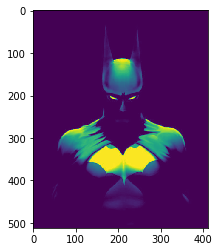

In [43]:
img = plt.imread('images/bread_pudding/1375816.jpg')
plt.imshow(img)
plt.show()

In [117]:
(X_train.shape, len(y_train)), (X_test.shape, len(y_test))

(((3030, 110, 110, 3), 3030), ((1010, 110, 110, 3), 1010))

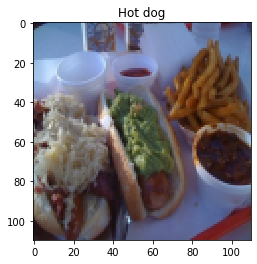

In [55]:
plt.figure(figsize=(8,4))
idx = np.random.randint(len(X_train)-1)
plt.imshow(X_train[idx])
plt.title(dict_classes_labels[lst_train[idx].split("/")[1]])
plt.show()

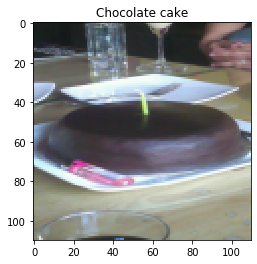

In [66]:
plt.figure(figsize=(8,4))
idx = np.random.randint(len(X_test)-1)
plt.imshow(X_test[idx])
plt.title(dict_classes_labels[lst_test[idx].split("/")[1]])
plt.show()

## 4. Data scaling & normalization

In [121]:
# !nvidia-smi
# !nvidia-settings
# !sudo apt-get install unity-session
# sudo apt-get install lightdm 


# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# print(device_name)
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [15]:
# Rescale the data
# scaler = StandardScaler()
# scaler = MinMaxScaler()

# train_data = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3])
# test_data = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3]))

# X_train_scaled = scaler.fit_transform(train_data)
# X_test_scaled = scaler.transform(test_data)

X_train = X_train/255.
X_test = X_test/255.

In [83]:
# Reshape scaled data
X_train = X_train_scaled.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3])
X_test = X_test_scaled.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], X_test.shape[3])

# X_train_norm = np.reshape(X_train_norm, (X_train.shape[0], X_train_norm.shape[0] * X_train_norm.shape[1]//10))
# X_test_norm = np.reshape(X_test_norm, (X_test.shape[0], X_test_norm.shape[0] * X_test_norm.shape[1]//10))

In [16]:
# Transform the targets t ocategorical vectors
y_train_scaled = to_categorical(y_train, num_classes=101)
y_test_scaled = to_categorical(y_test, num_classes=101)

# y_scaler = MinMaxScaler()
# y_train_scaled = y_scaler.fit_transform(np.array([y_train]).reshape(-1, 1))
# y_test_scaled = y_scaler.transform(np.array([y_test]).reshape(-1, 1))

In [32]:
y_train_scaled[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## 5. Build & training LetNet-5 model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

def lenet5(X):
  model = Sequential()

  # Layer C1
  model.add(Conv2D(filters=32, name='C1', kernel_size=(3,3), activation='relu', input_shape=(X.shape[1:])))
  # Layer S2
  model.add(MaxPool2D(pool_size=(2,2), name='S2'))
  # Layer C3
  model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
  # Layer S4
  model.add(MaxPool2D(pool_size=(2,2), name='S4'))
  # Before going into layer C5, we flatten our units
  model.add(Flatten())
  # Layer C5
  model.add(Dense(units=120, activation='relu', name='C5'))
  # Layer F6
  model.add(Dense(units=84, activation='relu', name='F6'))
  # Output layer
  model.add(Dense(units=101, activation='softmax'))

  return model

Compile and fit model on training data. This a multiclass classification, the loss is <i>categorical_crossentropy</i>.

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# model = lenet5(X_train_norm.reshape(X_train_norm.shape[0], 110, 110, 3))
model = lenet5(X_train)

model.compile(optimizer="adam", 
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Define callbacks
# callbacks = [EarlyStopping(monitor="val_loss", patience=10),
#              TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)]

callbacks = [EarlyStopping(monitor="val_loss", patience=10)]


# Finally fit the model
model.fit(x=X_train, 
          y=y_train_scaled, validation_data=(X_test, y_test_scaled), 
          epochs=100, batch_size=128, 
          callbacks=callbacks)
# model.fit(x=X_train_norm.reshape(10, 110, 110, 3), 
#           y=y_train_cat, validation_data=(X_test_norm.reshape(X_train_norm.shape[0], 110, 110, 3), y_test_cat), 
#           epochs=100, batch_size=128, 
#           callbacks=callbacks)

Train on 8079 samples, validate on 2020 samples
Epoch 1/100
8079/8079 [==============================] - 24s 3ms/sample - loss: 4.6089 - accuracy: 0.0144 - val_loss: 4.5581 - val_accuracy: 0.0203
Epoch 2/100
8079/8079 [==============================] - 23s 3ms/sample - loss: 4.5044 - accuracy: 0.0251 - val_loss: 4.4538 - val_accuracy: 0.0342
Epoch 3/100
8079/8079 [==============================] - 23s 3ms/sample - loss: 4.3371 - accuracy: 0.0551 - val_loss: 4.3963 - val_accuracy: 0.0480
Epoch 4/100
8079/8079 [==============================] - 23s 3ms/sample - loss: 4.0505 - accuracy: 0.0973 - val_loss: 4.3311 - val_accuracy: 0.0559
Epoch 5/100
8079/8079 [==============================] - 23s 3ms/sample - loss: 3.6200 - accuracy: 0.1721 - val_loss: 4.4957 - val_accuracy: 0.0574
Epoch 6/100
8079/8079 [==============================] - 23s 3ms/sample - loss: 2.9883 - accuracy: 0.2915 - val_loss: 5.0567 - val_accuracy: 0.0515
Epoch 7/100
8079/8079 [==============================] - 23s 3ms

In [0]:
model.save_weights("sa_c101_n2020_r100x100x3.h5")

## 6. Compute the accuracy

In [129]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train).argmax(axis=1)
y_pred_test = model.predict(X_test).argmax(axis=1)

print('accuracy on train with NN:', accuracy_score(y_pred_train, y_train))
print('accuracy on test with NN:', accuracy_score(y_pred_test, y_test))

accuracy on train with NN: 1.0
accuracy on test with NN: 0.03861386138613861


## 7. Regularization & ImageDataGenerator

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

# Calcul les quantités requises pour featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)

datagen.fit(X_train)

In [0]:
X_train.shape

(30298, 110, 110, 3)

In [0]:
np.unique(y_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [0]:
model = lenet5(X_train)

model.compile(optimizer="adam", 
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [0]:
# fits the model on batches with real-time data augmentation:
train_generator = datagen.flow(X_train, y_train_cat, batch_size=32)
validation_generator = datagen.flow(X_test, y_test_cat, batch_size=32)

In [0]:
#  model.fit_generator(train_generator,
#                     validation_data=validation_generator,
#                     #steps_per_epoch=len(X_train)/1, 
#                     steps_per_epoch=5, 
#                     epochs=300)
 
 model.fit_generator(
    train_generator, 
    steps_per_epoch=2000, # batch_size
    epochs=10,
    validation_data=validation_generator,
    validation_steps=800 # batch_size 
)

Epoch 1/10
2000/2000 [==============================] - 415s 208ms/step - loss: 4.4391 - accuracy: 0.0347 - val_loss: 4.2289 - val_accuracy: 0.0590
Epoch 2/10
2000/2000 [==============================] - 414s 207ms/step - loss: 3.9744 - accuracy: 0.0984 - val_loss: 4.1914 - val_accuracy: 0.0775
Epoch 3/10
2000/2000 [==============================] - 414s 207ms/step - loss: 3.1590 - accuracy: 0.2378 - val_loss: 4.8414 - val_accuracy: 0.0813
Epoch 4/10
2000/2000 [==============================] - 414s 207ms/step - loss: 2.0180 - accuracy: 0.4778 - val_loss: 6.9389 - val_accuracy: 0.0675
Epoch 5/10
2000/2000 [==============================] - 416s 208ms/step - loss: 1.0867 - accuracy: 0.7049 - val_loss: 9.2095 - val_accuracy: 0.0623
Epoch 6/10
2000/2000 [==============================] - 414s 207ms/step - loss: 0.5681 - accuracy: 0.8377 - val_loss: 11.9356 - val_accuracy: 0.0608
Epoch 7/10
2000/2000 [==============================] - 416s 208ms/step - loss: 0.3617 - accuracy: 0.8934 - val

In [0]:
from sklearn.metrics import accuracy_score

y_pred_train = to_categorical(model.predict(X_train).argmax(axis=1), num_classes=101)
y_pred_test = to_categorical(model.predict(X_test).argmax(axis=1), num_classes=101)

print('accuracy on train with NN:', accuracy_score(y_pred_train, y_train))
print('accuracy on test with NN:', accuracy_score(y_pred_test, y_test))

ValueError: ignored

## 8. Test on images test


In [19]:
import os
for (dirpath, dirnames, filenames) in os.walk("images/test"):
  # print(dirpath, dirnames, filenames)
  print(type(filenames))

<class 'list'>


In [20]:
def get_key(my_dict, val): 
    for key, value in my_dict.items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"

In [0]:
! mkdir images/test

['baklava-iran-destination-min.jpg', 'pizza.jpg', 'ribs-test.jpg', 'fried-rice.jpg', 'baklava.jpg', 'salad1.jpg', 'poulet grillé.jpg', 'Bibimbap.jpg', 'Pork-Ribs-IMAGE-13.jpg']


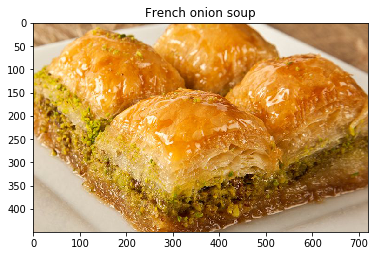

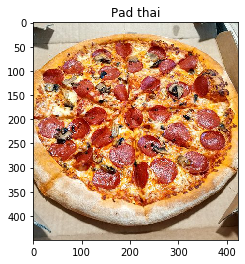

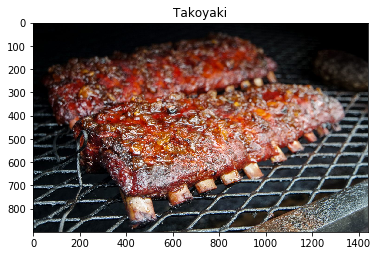

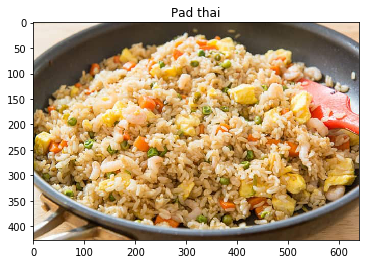

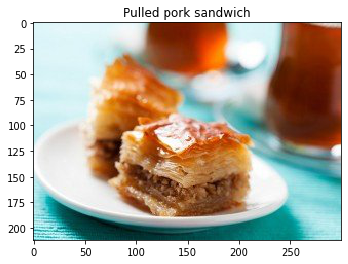

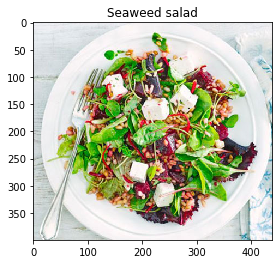

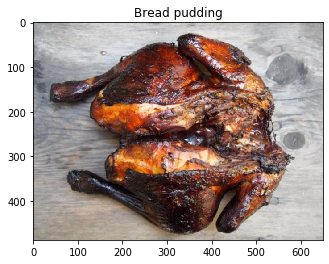

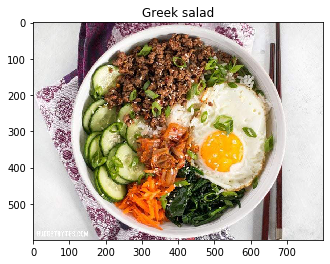

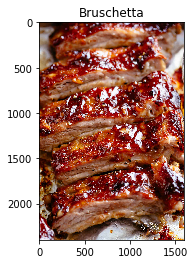

In [21]:
import os 

# Test with images test
for (dirpath, dirnames, filenames) in os.walk("images/test"):
  test_images = filenames
print(test_images)

X_validation = np.array([cv2.resize(plt.imread(f"images/test/{img_path}"), dsize=(110, 110), fx = 0.1, fy = 0.1) for img_path in test_images])

X_val_norm = X_validation/255.

y_pred_val = model.predict(X_val_norm).argmax(axis=1)

for idx, img_path in enumerate(test_images):
  val = y_pred_val[idx]
  img_val = plt.imread(f"images/test/{img_path}")
  plt.imshow(img_val)
  plt.title(dict_classes_labels[get_key(dict_classes_idx, val)])
  plt.show()  